
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>


Thank you so much for your diligence! This is a hard topic, but everything is great in your project! You can find my new comments with digit 2. I do not have any questions, so the project can be accepted. Good luck! 

    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi, I am a reviewer on this project. Congratulations on submitting numerical methods project! 🎉
    

I will be using the standard color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ✔️</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ⚠️</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ❌</b>

Issues that need to be corrected to get right results are indicated in red comments. Note that the project cannot be accepted until these issues are resolved.
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** so that it would be easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content; however, they are convenient, since you can immediately go to them.
   
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> excellent job on this project, thank you so much! You have successfully trained and compared several models and their training speed, great! However, there are several issues that need your attention. Would you take a look at my comments? 


</div>

# Car Price ML

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good introduction! 
    
</div>

In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

In [2]:
df = pd.read_csv('/datasets/car_data.csv')

## Data preparation

In [3]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [4]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

### Fill missing data

In [7]:
df = df.fillna('missing')

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Let's not drop so any rows :)     
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Yes, it's better! 
    
</div>

In [8]:
df.isna().sum()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

In [9]:
df.duplicated().sum()

262

In [10]:
df= df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good! 
    
</div>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354107 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354107 non-null  object
 1   Price              354107 non-null  int64 
 2   VehicleType        354107 non-null  object
 3   RegistrationYear   354107 non-null  int64 
 4   Gearbox            354107 non-null  object
 5   Power              354107 non-null  int64 
 6   Model              354107 non-null  object
 7   Mileage            354107 non-null  int64 
 8   RegistrationMonth  354107 non-null  int64 
 9   FuelType           354107 non-null  object
 10  Brand              354107 non-null  object
 11  NotRepaired        354107 non-null  object
 12  DateCreated        354107 non-null  object
 13  NumberOfPictures   354107 non-null  int64 
 14  PostalCode         354107 non-null  int64 
 15  LastSeen           354107 non-null  object
dtypes: int64(7), object(

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
- Please analyze distributions. For this purpose, add some charts and conclusions. 
    
    
    
- According to the `describe` output above, there are outliers. Shouldn't we drop them? Don't forget to analyze results. Running the code is not enough sometimes :)     
</div>

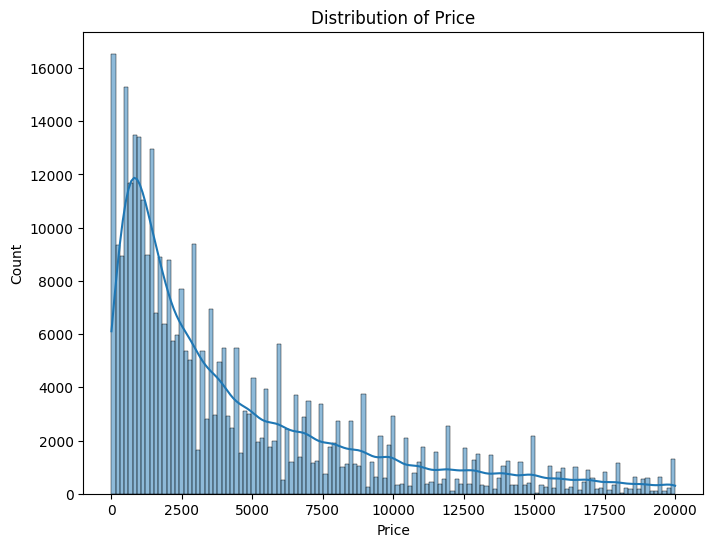

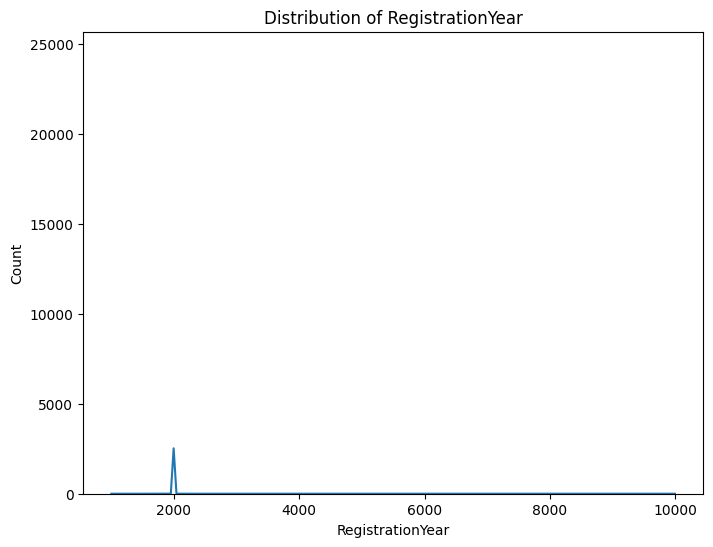

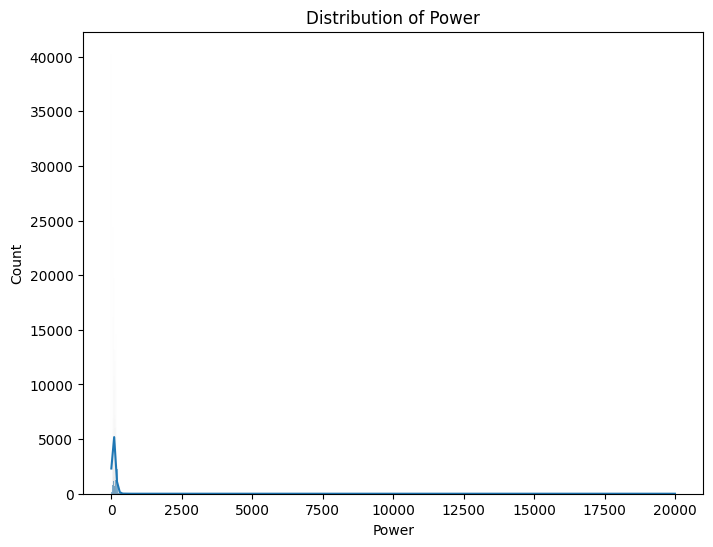

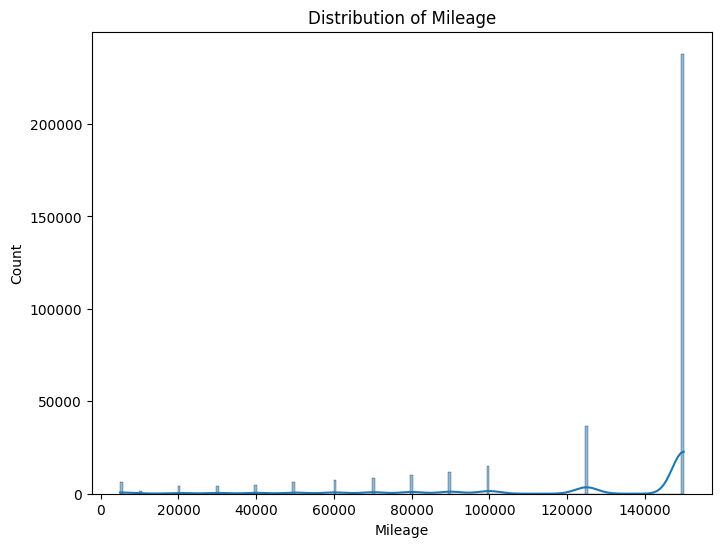

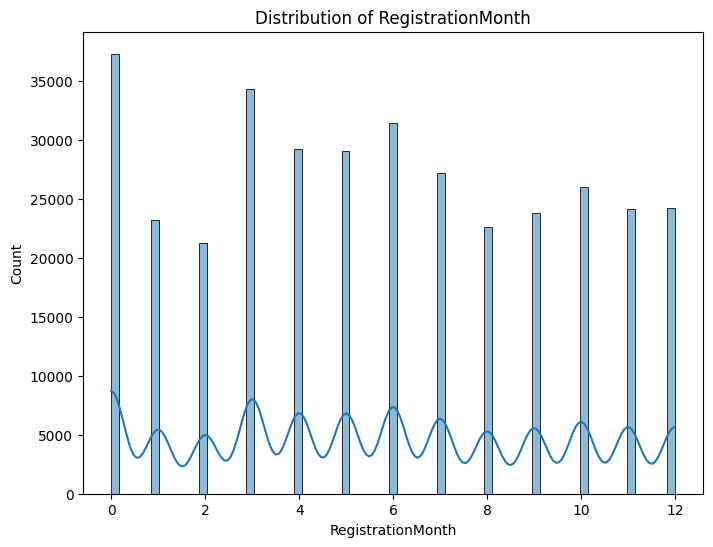

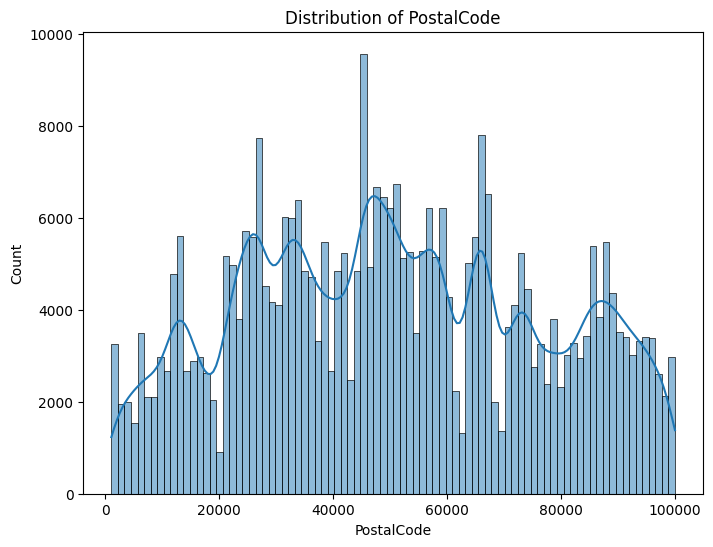

In [13]:
num_features = ['Price', 'RegistrationYear', 'Power', 'Mileage', 'RegistrationMonth', 'PostalCode']
for feature in num_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

I found outliers in the data and graphed the distributions of the numerical columns. The price column has a right-skewed distribution, indicating that most cars are priced lower, with a few high-priced outliers. The Power feature graph indicats that most cars have lower power outputs, with a few high-powered outliers. The Mileage feature has a Left-skewed distribution. It indicates that most cars have higher mileage, with few lower outliers.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2</h2>
    
Good! 
    
</div>

### Looking for & Removing Outliers

In [14]:
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)

IQR = Q3 - Q1

outliers = df[(df[num_features] < (Q1 - 1.5 * IQR)) | (df[num_features] > (Q3 + 1.5 * IQR))]

df_clean = df.drop(outliers.index)


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
Do you need it given these columns will be dropped below? </div>

### Encode categorical features

In [15]:
cat= ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
df = pd.get_dummies(df, columns=cat, drop_first=True)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2</h2>
    
Correct.
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Using `drop_first=True` may help you avoid multicollinearity.
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
- It is highly recommended that we encode data after we split it. Sometimes test sets contain one or more categories that were not included in a training set. In the future projects, please try to split the data first and then apply encoding. 
    


- `get_dummies` increases data size as it converts categorical features into multiple binary columns, which makes the training process more complex and time-consuming. Additionally, one-hot encoding loses the relationships between categories if it exists. Models such as CatBoost can handle categorical features directly without increasing the size of the feature matrix. So just try to pass categorical features to the model as categories or integers, specifying their indices using the the `cat_features` parameter.</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2</h2>
    
Good! 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
- We should not scale data before splitting it.


- Let's drop columns we don't need. 

</div>

## Model training

### data split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Price', 'DateCrawled', 'DateCreated', 'LastSeen', 'PostalCode', 'NumberOfPictures'], axis=1), df['Price'], test_size=0.2, random_state=42)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Makse sense. 
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
- `date_created` can be used to calculate the publication period. The longer an active advertisement remains published, the less likely the car is being sold, likely due to an overpriced offer.



- Do we need `PostalCode` or `NumberOfPictures`? </div>

### Linear Regression

In [17]:
%%time
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

CPU times: user 9.52 s, sys: 1.42 s, total: 10.9 s
Wall time: 10.9 s


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Don't forget to estimate metric here and in the code below.    
</div>


### Random Forest

In [18]:
%%time
rf_params = {'n_estimators': [100, 200], 'max_depth': [2, 5, 10]}

rf_model = RandomForestRegressor(random_state=12345)
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)
rf_pred = rf_grid.best_estimator_.predict(X_test)

CPU times: user 1h 21min 56s, sys: 4.38 s, total: 1h 22min
Wall time: 1h 22min 3s


### LightGBM Regression

In [19]:
%%time
lgb_params = {'num_leaves': [31, 62, 127], 'max_depth': [-1, 5, 10]}

lgb_model = lgb.LGBMRegressor()
lgb_grid = GridSearchCV(lgb_model, lgb_params, cv=5, scoring='neg_mean_squared_error')
lgb_grid.fit(X_train, y_train)
lgb_pred = lgb_grid.best_estimator_.predict(X_test)

CPU times: user 3min 41s, sys: 8.23 s, total: 3min 49s
Wall time: 3min 49s


### CatBoost

In [20]:
%%time
cb_params = {'depth': [3, 5, 10], 'learning_rate': [0.1, 0.5, 1]}

cb_model = CatBoostRegressor()
cb_grid = GridSearchCV(cb_model, cb_params, cv=5, scoring='neg_mean_squared_error')
cb_grid.fit(X_train, y_train)
cb_pred = cb_grid.best_estimator_.predict(X_test)

0:	learn: 4291.5396927	total: 70.6ms	remaining: 1m 10s
1:	learn: 4091.1593496	total: 89.8ms	remaining: 44.8s
2:	learn: 3914.7988688	total: 109ms	remaining: 36.1s
3:	learn: 3760.5500279	total: 128ms	remaining: 31.8s
4:	learn: 3627.3397806	total: 146ms	remaining: 29.1s
5:	learn: 3498.9498328	total: 166ms	remaining: 27.4s
6:	learn: 3394.2210083	total: 184ms	remaining: 26.1s
7:	learn: 3297.2545129	total: 203ms	remaining: 25.1s
8:	learn: 3213.0209900	total: 221ms	remaining: 24.4s
9:	learn: 3125.2753649	total: 240ms	remaining: 23.7s
10:	learn: 3058.7773022	total: 259ms	remaining: 23.2s
11:	learn: 3002.1512863	total: 278ms	remaining: 22.9s
12:	learn: 2940.1783757	total: 301ms	remaining: 22.8s
13:	learn: 2885.6362183	total: 319ms	remaining: 22.4s
14:	learn: 2845.2878148	total: 337ms	remaining: 22.1s
15:	learn: 2808.5439089	total: 356ms	remaining: 21.9s
16:	learn: 2761.3500584	total: 373ms	remaining: 21.6s
17:	learn: 2727.2459292	total: 392ms	remaining: 21.4s
18:	learn: 2696.6918811	total: 410m

153:	learn: 2069.9763523	total: 2.79s	remaining: 15.3s
154:	learn: 2068.5673441	total: 2.81s	remaining: 15.3s
155:	learn: 2067.9284075	total: 2.83s	remaining: 15.3s
156:	learn: 2067.1108375	total: 2.84s	remaining: 15.3s
157:	learn: 2065.7901947	total: 2.86s	remaining: 15.2s
158:	learn: 2064.8995322	total: 2.88s	remaining: 15.2s
159:	learn: 2063.7803245	total: 2.9s	remaining: 15.2s
160:	learn: 2062.9356767	total: 2.92s	remaining: 15.2s
161:	learn: 2060.7052280	total: 2.93s	remaining: 15.2s
162:	learn: 2059.5904146	total: 2.95s	remaining: 15.2s
163:	learn: 2058.7580881	total: 2.97s	remaining: 15.1s
164:	learn: 2058.1220168	total: 2.99s	remaining: 15.1s
165:	learn: 2056.8731797	total: 3.01s	remaining: 15.1s
166:	learn: 2056.2997573	total: 3.02s	remaining: 15.1s
167:	learn: 2055.4371971	total: 3.04s	remaining: 15.1s
168:	learn: 2054.6479654	total: 3.06s	remaining: 15s
169:	learn: 2053.6807514	total: 3.07s	remaining: 15s
170:	learn: 2052.8906609	total: 3.1s	remaining: 15s
171:	learn: 2052.3

309:	learn: 1973.2769161	total: 5.52s	remaining: 12.3s
310:	learn: 1972.9708353	total: 5.54s	remaining: 12.3s
311:	learn: 1972.7186520	total: 5.55s	remaining: 12.2s
312:	learn: 1972.4122393	total: 5.57s	remaining: 12.2s
313:	learn: 1972.0298348	total: 5.59s	remaining: 12.2s
314:	learn: 1971.5798838	total: 5.6s	remaining: 12.2s
315:	learn: 1971.3116049	total: 5.62s	remaining: 12.2s
316:	learn: 1971.0599526	total: 5.64s	remaining: 12.1s
317:	learn: 1970.7690285	total: 5.65s	remaining: 12.1s
318:	learn: 1970.5189029	total: 5.67s	remaining: 12.1s
319:	learn: 1969.9523815	total: 5.69s	remaining: 12.1s
320:	learn: 1969.6413944	total: 5.7s	remaining: 12.1s
321:	learn: 1969.2351415	total: 5.72s	remaining: 12s
322:	learn: 1968.8301965	total: 5.74s	remaining: 12s
323:	learn: 1968.5875640	total: 5.76s	remaining: 12s
324:	learn: 1968.1953587	total: 5.78s	remaining: 12s
325:	learn: 1967.6886439	total: 5.8s	remaining: 12s
326:	learn: 1967.0855876	total: 5.81s	remaining: 12s
327:	learn: 1966.6810895	

465:	learn: 1926.3419870	total: 8.22s	remaining: 9.42s
466:	learn: 1926.0719535	total: 8.24s	remaining: 9.4s
467:	learn: 1925.7012981	total: 8.26s	remaining: 9.39s
468:	learn: 1925.5270257	total: 8.28s	remaining: 9.37s
469:	learn: 1925.2638498	total: 8.29s	remaining: 9.35s
470:	learn: 1925.1017967	total: 8.31s	remaining: 9.33s
471:	learn: 1924.9061483	total: 8.33s	remaining: 9.31s
472:	learn: 1924.7174817	total: 8.34s	remaining: 9.29s
473:	learn: 1924.4756323	total: 8.36s	remaining: 9.28s
474:	learn: 1924.2737026	total: 8.38s	remaining: 9.26s
475:	learn: 1924.1039353	total: 8.39s	remaining: 9.24s
476:	learn: 1923.9975047	total: 8.41s	remaining: 9.22s
477:	learn: 1923.8532753	total: 8.42s	remaining: 9.2s
478:	learn: 1923.6280917	total: 8.44s	remaining: 9.18s
479:	learn: 1923.3574226	total: 8.46s	remaining: 9.17s
480:	learn: 1923.1223722	total: 8.48s	remaining: 9.15s
481:	learn: 1922.9412673	total: 8.5s	remaining: 9.13s
482:	learn: 1922.7555596	total: 8.51s	remaining: 9.11s
483:	learn: 1

621:	learn: 1895.9936568	total: 10.9s	remaining: 6.63s
622:	learn: 1895.7011011	total: 10.9s	remaining: 6.61s
623:	learn: 1895.5885608	total: 10.9s	remaining: 6.59s
624:	learn: 1895.4432391	total: 11s	remaining: 6.57s
625:	learn: 1895.2477547	total: 11s	remaining: 6.56s
626:	learn: 1895.1381033	total: 11s	remaining: 6.54s
627:	learn: 1895.0701146	total: 11s	remaining: 6.52s
628:	learn: 1894.8631058	total: 11s	remaining: 6.5s
629:	learn: 1894.6918702	total: 11s	remaining: 6.48s
630:	learn: 1894.4275527	total: 11.1s	remaining: 6.47s
631:	learn: 1894.2168991	total: 11.1s	remaining: 6.45s
632:	learn: 1894.0072841	total: 11.1s	remaining: 6.43s
633:	learn: 1893.8100487	total: 11.1s	remaining: 6.41s
634:	learn: 1893.7397599	total: 11.1s	remaining: 6.4s
635:	learn: 1893.5914946	total: 11.1s	remaining: 6.38s
636:	learn: 1893.4998866	total: 11.2s	remaining: 6.36s
637:	learn: 1893.3702502	total: 11.2s	remaining: 6.34s
638:	learn: 1893.2610567	total: 11.2s	remaining: 6.32s
639:	learn: 1893.1342798

777:	learn: 1874.0087686	total: 13.6s	remaining: 3.88s
778:	learn: 1873.8587006	total: 13.6s	remaining: 3.86s
779:	learn: 1873.7815968	total: 13.6s	remaining: 3.85s
780:	learn: 1873.6799622	total: 13.7s	remaining: 3.83s
781:	learn: 1873.5422509	total: 13.7s	remaining: 3.81s
782:	learn: 1873.4553034	total: 13.7s	remaining: 3.79s
783:	learn: 1873.3198262	total: 13.7s	remaining: 3.78s
784:	learn: 1873.2335415	total: 13.7s	remaining: 3.76s
785:	learn: 1873.1514127	total: 13.7s	remaining: 3.74s
786:	learn: 1873.0285520	total: 13.8s	remaining: 3.72s
787:	learn: 1872.8998199	total: 13.8s	remaining: 3.71s
788:	learn: 1872.7875569	total: 13.8s	remaining: 3.69s
789:	learn: 1872.6351269	total: 13.8s	remaining: 3.67s
790:	learn: 1872.4856798	total: 13.8s	remaining: 3.65s
791:	learn: 1872.3275426	total: 13.8s	remaining: 3.64s
792:	learn: 1872.2172939	total: 13.9s	remaining: 3.62s
793:	learn: 1872.0551400	total: 13.9s	remaining: 3.6s
794:	learn: 1871.9315723	total: 13.9s	remaining: 3.58s
795:	learn:

933:	learn: 1856.2686926	total: 16.3s	remaining: 1.15s
934:	learn: 1856.1670266	total: 16.3s	remaining: 1.14s
935:	learn: 1856.0744548	total: 16.3s	remaining: 1.12s
936:	learn: 1855.9796120	total: 16.4s	remaining: 1.1s
937:	learn: 1855.8924829	total: 16.4s	remaining: 1.08s
938:	learn: 1855.7848159	total: 16.4s	remaining: 1.06s
939:	learn: 1855.7383517	total: 16.4s	remaining: 1.05s
940:	learn: 1855.5556284	total: 16.4s	remaining: 1.03s
941:	learn: 1855.5140462	total: 16.4s	remaining: 1.01s
942:	learn: 1855.4347143	total: 16.5s	remaining: 995ms
943:	learn: 1855.3574721	total: 16.5s	remaining: 978ms
944:	learn: 1855.2532201	total: 16.5s	remaining: 960ms
945:	learn: 1855.1652052	total: 16.5s	remaining: 943ms
946:	learn: 1855.0497827	total: 16.5s	remaining: 925ms
947:	learn: 1854.9106686	total: 16.6s	remaining: 908ms
948:	learn: 1854.8579345	total: 16.6s	remaining: 890ms
949:	learn: 1854.7651053	total: 16.6s	remaining: 873ms
950:	learn: 1854.6622054	total: 16.6s	remaining: 856ms
951:	learn:

94:	learn: 2158.2925457	total: 1.73s	remaining: 16.5s
95:	learn: 2156.7909662	total: 1.74s	remaining: 16.4s
96:	learn: 2155.2924415	total: 1.76s	remaining: 16.4s
97:	learn: 2153.5399111	total: 1.78s	remaining: 16.4s
98:	learn: 2152.1722857	total: 1.79s	remaining: 16.3s
99:	learn: 2150.6419878	total: 1.81s	remaining: 16.3s
100:	learn: 2149.0587408	total: 1.83s	remaining: 16.3s
101:	learn: 2146.2124853	total: 1.84s	remaining: 16.3s
102:	learn: 2143.7036732	total: 1.86s	remaining: 16.2s
103:	learn: 2141.5783816	total: 1.88s	remaining: 16.2s
104:	learn: 2139.7044212	total: 1.9s	remaining: 16.2s
105:	learn: 2138.2909779	total: 1.92s	remaining: 16.2s
106:	learn: 2136.0467863	total: 1.93s	remaining: 16.1s
107:	learn: 2134.8947055	total: 1.95s	remaining: 16.1s
108:	learn: 2133.4196231	total: 1.97s	remaining: 16.1s
109:	learn: 2130.8391968	total: 1.99s	remaining: 16.1s
110:	learn: 2129.2002621	total: 2s	remaining: 16.1s
111:	learn: 2127.7487060	total: 2.02s	remaining: 16.1s
112:	learn: 2126.412

250:	learn: 2005.0392531	total: 4.45s	remaining: 13.3s
251:	learn: 2004.2134900	total: 4.47s	remaining: 13.3s
252:	learn: 2003.7124821	total: 4.49s	remaining: 13.2s
253:	learn: 2003.0586848	total: 4.5s	remaining: 13.2s
254:	learn: 2002.6251114	total: 4.53s	remaining: 13.2s
255:	learn: 2001.9613670	total: 4.54s	remaining: 13.2s
256:	learn: 2001.6591087	total: 4.56s	remaining: 13.2s
257:	learn: 2001.0896297	total: 4.58s	remaining: 13.2s
258:	learn: 2000.7204210	total: 4.59s	remaining: 13.1s
259:	learn: 2000.3109949	total: 4.61s	remaining: 13.1s
260:	learn: 1999.6657551	total: 4.63s	remaining: 13.1s
261:	learn: 1998.9900730	total: 4.65s	remaining: 13.1s
262:	learn: 1998.4243395	total: 4.67s	remaining: 13.1s
263:	learn: 1997.8890508	total: 4.68s	remaining: 13.1s
264:	learn: 1997.6115867	total: 4.7s	remaining: 13s
265:	learn: 1997.1034157	total: 4.72s	remaining: 13s
266:	learn: 1996.6680689	total: 4.74s	remaining: 13s
267:	learn: 1996.0714343	total: 4.75s	remaining: 13s
268:	learn: 1995.375

405:	learn: 1948.0655808	total: 7.17s	remaining: 10.5s
406:	learn: 1947.7080195	total: 7.2s	remaining: 10.5s
407:	learn: 1947.3205172	total: 7.21s	remaining: 10.5s
408:	learn: 1947.1139220	total: 7.23s	remaining: 10.4s
409:	learn: 1946.8928678	total: 7.25s	remaining: 10.4s
410:	learn: 1946.7582858	total: 7.27s	remaining: 10.4s
411:	learn: 1946.6034455	total: 7.28s	remaining: 10.4s
412:	learn: 1946.1842040	total: 7.3s	remaining: 10.4s
413:	learn: 1946.0139816	total: 7.32s	remaining: 10.4s
414:	learn: 1945.8803247	total: 7.34s	remaining: 10.3s
415:	learn: 1945.4737447	total: 7.35s	remaining: 10.3s
416:	learn: 1945.2978048	total: 7.37s	remaining: 10.3s
417:	learn: 1945.0483817	total: 7.39s	remaining: 10.3s
418:	learn: 1944.9225688	total: 7.41s	remaining: 10.3s
419:	learn: 1944.8120002	total: 7.42s	remaining: 10.3s
420:	learn: 1944.5407562	total: 7.44s	remaining: 10.2s
421:	learn: 1944.2722696	total: 7.46s	remaining: 10.2s
422:	learn: 1944.0707182	total: 7.48s	remaining: 10.2s
423:	learn: 

558:	learn: 1912.9333391	total: 9.94s	remaining: 7.84s
559:	learn: 1912.6896773	total: 9.96s	remaining: 7.82s
560:	learn: 1912.5502179	total: 9.98s	remaining: 7.81s
561:	learn: 1912.3449546	total: 10s	remaining: 7.79s
562:	learn: 1912.1858924	total: 10s	remaining: 7.77s
563:	learn: 1912.0311747	total: 10s	remaining: 7.75s
564:	learn: 1911.8321618	total: 10.1s	remaining: 7.74s
565:	learn: 1911.6459725	total: 10.1s	remaining: 7.72s
566:	learn: 1911.5663266	total: 10.1s	remaining: 7.7s
567:	learn: 1911.4197530	total: 10.1s	remaining: 7.68s
568:	learn: 1911.0279105	total: 10.1s	remaining: 7.67s
569:	learn: 1910.8371814	total: 10.1s	remaining: 7.65s
570:	learn: 1910.4995548	total: 10.2s	remaining: 7.63s
571:	learn: 1910.3239411	total: 10.2s	remaining: 7.61s
572:	learn: 1909.8282632	total: 10.2s	remaining: 7.6s
573:	learn: 1909.6235192	total: 10.2s	remaining: 7.58s
574:	learn: 1909.4756390	total: 10.2s	remaining: 7.56s
575:	learn: 1909.3810003	total: 10.2s	remaining: 7.54s
576:	learn: 1909.0

718:	learn: 1887.1716606	total: 12.8s	remaining: 5.01s
719:	learn: 1886.9027007	total: 12.8s	remaining: 4.99s
720:	learn: 1886.8126419	total: 12.8s	remaining: 4.97s
721:	learn: 1886.6955079	total: 12.9s	remaining: 4.96s
722:	learn: 1886.5878455	total: 12.9s	remaining: 4.94s
723:	learn: 1886.5191673	total: 12.9s	remaining: 4.92s
724:	learn: 1886.3831530	total: 12.9s	remaining: 4.9s
725:	learn: 1886.2177698	total: 12.9s	remaining: 4.88s
726:	learn: 1886.1163319	total: 13s	remaining: 4.87s
727:	learn: 1885.9853270	total: 13s	remaining: 4.85s
728:	learn: 1885.7855647	total: 13s	remaining: 4.83s
729:	learn: 1885.6731072	total: 13s	remaining: 4.81s
730:	learn: 1885.5784550	total: 13s	remaining: 4.79s
731:	learn: 1885.5196543	total: 13s	remaining: 4.78s
732:	learn: 1885.3289816	total: 13.1s	remaining: 4.76s
733:	learn: 1885.1793501	total: 13.1s	remaining: 4.74s
734:	learn: 1885.0772967	total: 13.1s	remaining: 4.72s
735:	learn: 1884.9762475	total: 13.1s	remaining: 4.71s
736:	learn: 1884.480320

878:	learn: 1867.9215743	total: 15.7s	remaining: 2.16s
879:	learn: 1867.7863787	total: 15.7s	remaining: 2.15s
880:	learn: 1867.6937532	total: 15.8s	remaining: 2.13s
881:	learn: 1867.6172151	total: 15.8s	remaining: 2.11s
882:	learn: 1867.4112654	total: 15.8s	remaining: 2.09s
883:	learn: 1867.3589006	total: 15.8s	remaining: 2.07s
884:	learn: 1867.2445620	total: 15.8s	remaining: 2.06s
885:	learn: 1867.2026654	total: 15.8s	remaining: 2.04s
886:	learn: 1867.0802838	total: 15.9s	remaining: 2.02s
887:	learn: 1866.9995631	total: 15.9s	remaining: 2s
888:	learn: 1866.8175351	total: 15.9s	remaining: 1.99s
889:	learn: 1866.7324385	total: 15.9s	remaining: 1.97s
890:	learn: 1866.6433532	total: 15.9s	remaining: 1.95s
891:	learn: 1866.5645223	total: 16s	remaining: 1.93s
892:	learn: 1866.4375337	total: 16s	remaining: 1.91s
893:	learn: 1866.2670983	total: 16s	remaining: 1.9s
894:	learn: 1866.1232517	total: 16s	remaining: 1.88s
895:	learn: 1866.0474181	total: 16s	remaining: 1.86s
896:	learn: 1865.9514850

33:	learn: 2432.6253264	total: 648ms	remaining: 18.4s
34:	learn: 2422.1800047	total: 666ms	remaining: 18.4s
35:	learn: 2408.2749404	total: 685ms	remaining: 18.3s
36:	learn: 2399.2217931	total: 707ms	remaining: 18.4s
37:	learn: 2390.6662825	total: 725ms	remaining: 18.4s
38:	learn: 2381.1817451	total: 744ms	remaining: 18.3s
39:	learn: 2373.8702348	total: 762ms	remaining: 18.3s
40:	learn: 2366.0884387	total: 780ms	remaining: 18.3s
41:	learn: 2359.2838176	total: 798ms	remaining: 18.2s
42:	learn: 2352.8185583	total: 816ms	remaining: 18.2s
43:	learn: 2345.6976005	total: 836ms	remaining: 18.2s
44:	learn: 2337.8421743	total: 856ms	remaining: 18.2s
45:	learn: 2330.5445386	total: 875ms	remaining: 18.1s
46:	learn: 2325.0449122	total: 897ms	remaining: 18.2s
47:	learn: 2319.7146200	total: 914ms	remaining: 18.1s
48:	learn: 2314.4095636	total: 932ms	remaining: 18.1s
49:	learn: 2308.9806205	total: 951ms	remaining: 18.1s
50:	learn: 2299.1473637	total: 969ms	remaining: 18s
51:	learn: 2292.9363158	total:

188:	learn: 2034.8460198	total: 3.5s	remaining: 15s
189:	learn: 2034.1529800	total: 3.52s	remaining: 15s
190:	learn: 2033.4749069	total: 3.53s	remaining: 15s
191:	learn: 2032.3725722	total: 3.55s	remaining: 15s
192:	learn: 2031.5738178	total: 3.58s	remaining: 14.9s
193:	learn: 2031.0847604	total: 3.59s	remaining: 14.9s
194:	learn: 2030.5624179	total: 3.61s	remaining: 14.9s
195:	learn: 2029.6204065	total: 3.63s	remaining: 14.9s
196:	learn: 2028.9620907	total: 3.64s	remaining: 14.9s
197:	learn: 2028.3740565	total: 3.66s	remaining: 14.8s
198:	learn: 2027.0626787	total: 3.68s	remaining: 14.8s
199:	learn: 2026.3786866	total: 3.7s	remaining: 14.8s
200:	learn: 2025.5677961	total: 3.71s	remaining: 14.8s
201:	learn: 2024.4424551	total: 3.73s	remaining: 14.8s
202:	learn: 2023.7644974	total: 3.75s	remaining: 14.7s
203:	learn: 2023.0164068	total: 3.77s	remaining: 14.7s
204:	learn: 2022.0564034	total: 3.79s	remaining: 14.7s
205:	learn: 2021.4971709	total: 3.81s	remaining: 14.7s
206:	learn: 2020.484

343:	learn: 1956.8029870	total: 6.23s	remaining: 11.9s
344:	learn: 1956.6131942	total: 6.25s	remaining: 11.9s
345:	learn: 1956.2126109	total: 6.27s	remaining: 11.9s
346:	learn: 1955.9286807	total: 6.29s	remaining: 11.8s
347:	learn: 1955.6479784	total: 6.3s	remaining: 11.8s
348:	learn: 1955.4529270	total: 6.32s	remaining: 11.8s
349:	learn: 1955.2882181	total: 6.33s	remaining: 11.8s
350:	learn: 1955.0983724	total: 6.35s	remaining: 11.7s
351:	learn: 1954.7429219	total: 6.37s	remaining: 11.7s
352:	learn: 1954.4550787	total: 6.38s	remaining: 11.7s
353:	learn: 1954.1242546	total: 6.4s	remaining: 11.7s
354:	learn: 1953.8318230	total: 6.42s	remaining: 11.7s
355:	learn: 1953.4958271	total: 6.44s	remaining: 11.6s
356:	learn: 1953.2607742	total: 6.45s	remaining: 11.6s
357:	learn: 1952.9244298	total: 6.47s	remaining: 11.6s
358:	learn: 1952.5226082	total: 6.49s	remaining: 11.6s
359:	learn: 1952.3317836	total: 6.5s	remaining: 11.6s
360:	learn: 1952.1568221	total: 6.52s	remaining: 11.5s
361:	learn: 1

499:	learn: 1916.6349812	total: 8.92s	remaining: 8.92s
500:	learn: 1916.0627265	total: 8.94s	remaining: 8.91s
501:	learn: 1915.8701000	total: 8.96s	remaining: 8.89s
502:	learn: 1915.5216385	total: 8.98s	remaining: 8.87s
503:	learn: 1915.3389689	total: 8.99s	remaining: 8.85s
504:	learn: 1915.1163726	total: 9.01s	remaining: 8.83s
505:	learn: 1915.0094980	total: 9.03s	remaining: 8.81s
506:	learn: 1914.7486629	total: 9.05s	remaining: 8.8s
507:	learn: 1914.5380047	total: 9.06s	remaining: 8.78s
508:	learn: 1914.4169348	total: 9.08s	remaining: 8.76s
509:	learn: 1914.1596979	total: 9.1s	remaining: 8.74s
510:	learn: 1914.0308625	total: 9.11s	remaining: 8.72s
511:	learn: 1913.9186292	total: 9.13s	remaining: 8.7s
512:	learn: 1913.4554146	total: 9.15s	remaining: 8.68s
513:	learn: 1913.2858369	total: 9.16s	remaining: 8.67s
514:	learn: 1913.1002012	total: 9.18s	remaining: 8.65s
515:	learn: 1912.8519279	total: 9.2s	remaining: 8.63s
516:	learn: 1912.4672788	total: 9.22s	remaining: 8.61s
517:	learn: 19

655:	learn: 1888.5005586	total: 11.6s	remaining: 6.09s
656:	learn: 1888.2886207	total: 11.6s	remaining: 6.08s
657:	learn: 1888.1382220	total: 11.7s	remaining: 6.06s
658:	learn: 1888.0002073	total: 11.7s	remaining: 6.04s
659:	learn: 1887.8756479	total: 11.7s	remaining: 6.02s
660:	learn: 1887.7188979	total: 11.7s	remaining: 6s
661:	learn: 1887.5549183	total: 11.7s	remaining: 5.99s
662:	learn: 1887.4139258	total: 11.7s	remaining: 5.97s
663:	learn: 1887.2654509	total: 11.8s	remaining: 5.95s
664:	learn: 1887.0902866	total: 11.8s	remaining: 5.93s
665:	learn: 1886.9000186	total: 11.8s	remaining: 5.92s
666:	learn: 1886.7108739	total: 11.8s	remaining: 5.9s
667:	learn: 1886.5759751	total: 11.8s	remaining: 5.88s
668:	learn: 1886.5179360	total: 11.8s	remaining: 5.86s
669:	learn: 1886.3472285	total: 11.9s	remaining: 5.84s
670:	learn: 1886.2318506	total: 11.9s	remaining: 5.82s
671:	learn: 1885.9606669	total: 11.9s	remaining: 5.81s
672:	learn: 1885.8822376	total: 11.9s	remaining: 5.79s
673:	learn: 18

811:	learn: 1868.0417611	total: 14.3s	remaining: 3.31s
812:	learn: 1867.9340425	total: 14.3s	remaining: 3.3s
813:	learn: 1867.7839397	total: 14.4s	remaining: 3.28s
814:	learn: 1867.5146637	total: 14.4s	remaining: 3.26s
815:	learn: 1867.2975422	total: 14.4s	remaining: 3.24s
816:	learn: 1867.2027147	total: 14.4s	remaining: 3.23s
817:	learn: 1867.0820910	total: 14.4s	remaining: 3.21s
818:	learn: 1867.0441877	total: 14.4s	remaining: 3.19s
819:	learn: 1866.9104495	total: 14.5s	remaining: 3.17s
820:	learn: 1866.8000565	total: 14.5s	remaining: 3.15s
821:	learn: 1866.7118461	total: 14.5s	remaining: 3.14s
822:	learn: 1866.4837942	total: 14.5s	remaining: 3.12s
823:	learn: 1866.3767429	total: 14.5s	remaining: 3.1s
824:	learn: 1866.2445408	total: 14.5s	remaining: 3.08s
825:	learn: 1866.1804951	total: 14.6s	remaining: 3.07s
826:	learn: 1866.0675715	total: 14.6s	remaining: 3.05s
827:	learn: 1865.9463632	total: 14.6s	remaining: 3.03s
828:	learn: 1865.8380598	total: 14.6s	remaining: 3.02s
829:	learn: 

967:	learn: 1851.5533187	total: 17s	remaining: 563ms
968:	learn: 1851.4720529	total: 17.1s	remaining: 546ms
969:	learn: 1851.3975482	total: 17.1s	remaining: 528ms
970:	learn: 1851.3188218	total: 17.1s	remaining: 510ms
971:	learn: 1851.2203147	total: 17.1s	remaining: 493ms
972:	learn: 1851.1298000	total: 17.1s	remaining: 475ms
973:	learn: 1851.0123176	total: 17.1s	remaining: 458ms
974:	learn: 1850.9678198	total: 17.2s	remaining: 440ms
975:	learn: 1850.8955535	total: 17.2s	remaining: 422ms
976:	learn: 1850.7995250	total: 17.2s	remaining: 405ms
977:	learn: 1850.4331515	total: 17.2s	remaining: 387ms
978:	learn: 1850.3424080	total: 17.2s	remaining: 370ms
979:	learn: 1850.2766048	total: 17.2s	remaining: 352ms
980:	learn: 1850.2114966	total: 17.3s	remaining: 334ms
981:	learn: 1850.1639641	total: 17.3s	remaining: 317ms
982:	learn: 1850.0773157	total: 17.3s	remaining: 299ms
983:	learn: 1849.9731146	total: 17.3s	remaining: 282ms
984:	learn: 1849.9114344	total: 17.3s	remaining: 264ms
985:	learn: 

129:	learn: 2093.4702066	total: 2.33s	remaining: 15.6s
130:	learn: 2092.1071775	total: 2.35s	remaining: 15.6s
131:	learn: 2091.1027249	total: 2.37s	remaining: 15.6s
132:	learn: 2090.1876107	total: 2.39s	remaining: 15.6s
133:	learn: 2089.3150151	total: 2.4s	remaining: 15.5s
134:	learn: 2088.2040559	total: 2.42s	remaining: 15.5s
135:	learn: 2086.9918518	total: 2.44s	remaining: 15.5s
136:	learn: 2085.7349771	total: 2.46s	remaining: 15.5s
137:	learn: 2083.9640871	total: 2.47s	remaining: 15.4s
138:	learn: 2083.2847664	total: 2.49s	remaining: 15.4s
139:	learn: 2082.3829853	total: 2.5s	remaining: 15.4s
140:	learn: 2080.7019430	total: 2.52s	remaining: 15.4s
141:	learn: 2079.7748865	total: 2.54s	remaining: 15.3s
142:	learn: 2078.9808479	total: 2.56s	remaining: 15.3s
143:	learn: 2078.1217895	total: 2.57s	remaining: 15.3s
144:	learn: 2076.7040646	total: 2.59s	remaining: 15.3s
145:	learn: 2075.7825760	total: 2.61s	remaining: 15.3s
146:	learn: 2074.7981073	total: 2.62s	remaining: 15.2s
147:	learn: 

285:	learn: 1981.9385359	total: 5.03s	remaining: 12.5s
286:	learn: 1981.6039882	total: 5.04s	remaining: 12.5s
287:	learn: 1981.2561323	total: 5.06s	remaining: 12.5s
288:	learn: 1980.7540732	total: 5.08s	remaining: 12.5s
289:	learn: 1980.2837109	total: 5.1s	remaining: 12.5s
290:	learn: 1980.0203932	total: 5.12s	remaining: 12.5s
291:	learn: 1979.6308765	total: 5.13s	remaining: 12.4s
292:	learn: 1979.4149337	total: 5.15s	remaining: 12.4s
293:	learn: 1979.0061720	total: 5.17s	remaining: 12.4s
294:	learn: 1978.7790937	total: 5.18s	remaining: 12.4s
295:	learn: 1978.3023533	total: 5.2s	remaining: 12.4s
296:	learn: 1978.0599654	total: 5.22s	remaining: 12.3s
297:	learn: 1977.6484774	total: 5.23s	remaining: 12.3s
298:	learn: 1977.1182868	total: 5.25s	remaining: 12.3s
299:	learn: 1976.0603514	total: 5.27s	remaining: 12.3s
300:	learn: 1975.8280024	total: 5.29s	remaining: 12.3s
301:	learn: 1975.2110072	total: 5.31s	remaining: 12.3s
302:	learn: 1974.9908663	total: 5.32s	remaining: 12.2s
303:	learn: 

441:	learn: 1931.9554253	total: 7.74s	remaining: 9.77s
442:	learn: 1931.7546382	total: 7.76s	remaining: 9.76s
443:	learn: 1931.4977561	total: 7.78s	remaining: 9.74s
444:	learn: 1931.2827017	total: 7.8s	remaining: 9.72s
445:	learn: 1931.0203351	total: 7.82s	remaining: 9.71s
446:	learn: 1930.7807259	total: 7.83s	remaining: 9.69s
447:	learn: 1930.4501894	total: 7.85s	remaining: 9.67s
448:	learn: 1930.1659897	total: 7.87s	remaining: 9.65s
449:	learn: 1929.9889633	total: 7.88s	remaining: 9.64s
450:	learn: 1929.7960615	total: 7.9s	remaining: 9.62s
451:	learn: 1929.6481295	total: 7.92s	remaining: 9.6s
452:	learn: 1929.3320693	total: 7.93s	remaining: 9.58s
453:	learn: 1929.1641349	total: 7.95s	remaining: 9.56s
454:	learn: 1929.0339011	total: 7.97s	remaining: 9.54s
455:	learn: 1928.8124893	total: 7.98s	remaining: 9.53s
456:	learn: 1928.5154886	total: 8s	remaining: 9.51s
457:	learn: 1928.3461645	total: 8.02s	remaining: 9.49s
458:	learn: 1928.1272900	total: 8.03s	remaining: 9.47s
459:	learn: 1927

597:	learn: 1901.1432731	total: 10.4s	remaining: 7.02s
598:	learn: 1900.9708198	total: 10.5s	remaining: 7.01s
599:	learn: 1900.7782242	total: 10.5s	remaining: 6.99s
600:	learn: 1900.3855673	total: 10.5s	remaining: 6.97s
601:	learn: 1900.2196422	total: 10.5s	remaining: 6.95s
602:	learn: 1900.0617368	total: 10.5s	remaining: 6.94s
603:	learn: 1899.9187782	total: 10.6s	remaining: 6.92s
604:	learn: 1899.6867843	total: 10.6s	remaining: 6.9s
605:	learn: 1899.5966154	total: 10.6s	remaining: 6.88s
606:	learn: 1899.4899921	total: 10.6s	remaining: 6.86s
607:	learn: 1899.2192886	total: 10.6s	remaining: 6.85s
608:	learn: 1899.1244287	total: 10.6s	remaining: 6.83s
609:	learn: 1898.9902752	total: 10.7s	remaining: 6.81s
610:	learn: 1898.7760004	total: 10.7s	remaining: 6.8s
611:	learn: 1898.5843157	total: 10.7s	remaining: 6.78s
612:	learn: 1898.5182950	total: 10.7s	remaining: 6.76s
613:	learn: 1898.3044725	total: 10.7s	remaining: 6.74s
614:	learn: 1898.0437216	total: 10.7s	remaining: 6.73s
615:	learn: 

753:	learn: 1878.0700629	total: 13.2s	remaining: 4.29s
754:	learn: 1877.8684708	total: 13.2s	remaining: 4.28s
755:	learn: 1877.6877305	total: 13.2s	remaining: 4.26s
756:	learn: 1877.6408405	total: 13.2s	remaining: 4.24s
757:	learn: 1877.5530453	total: 13.2s	remaining: 4.23s
758:	learn: 1877.4134133	total: 13.3s	remaining: 4.21s
759:	learn: 1877.2963556	total: 13.3s	remaining: 4.19s
760:	learn: 1877.2271327	total: 13.3s	remaining: 4.17s
761:	learn: 1877.0476907	total: 13.3s	remaining: 4.16s
762:	learn: 1876.9978634	total: 13.3s	remaining: 4.14s
763:	learn: 1876.8942672	total: 13.3s	remaining: 4.12s
764:	learn: 1876.7647170	total: 13.4s	remaining: 4.1s
765:	learn: 1876.5547275	total: 13.4s	remaining: 4.08s
766:	learn: 1876.4118062	total: 13.4s	remaining: 4.07s
767:	learn: 1876.2202715	total: 13.4s	remaining: 4.05s
768:	learn: 1876.0854524	total: 13.4s	remaining: 4.03s
769:	learn: 1875.9899152	total: 13.4s	remaining: 4.01s
770:	learn: 1875.8785181	total: 13.5s	remaining: 4s
771:	learn: 18

909:	learn: 1859.9510476	total: 15.9s	remaining: 1.57s
910:	learn: 1859.8665331	total: 15.9s	remaining: 1.55s
911:	learn: 1859.8316662	total: 15.9s	remaining: 1.54s
912:	learn: 1859.7621244	total: 15.9s	remaining: 1.52s
913:	learn: 1859.7074241	total: 16s	remaining: 1.5s
914:	learn: 1859.5932769	total: 16s	remaining: 1.48s
915:	learn: 1859.5197930	total: 16s	remaining: 1.47s
916:	learn: 1859.4505986	total: 16s	remaining: 1.45s
917:	learn: 1859.3895114	total: 16s	remaining: 1.43s
918:	learn: 1859.2942384	total: 16s	remaining: 1.41s
919:	learn: 1859.1772214	total: 16.1s	remaining: 1.4s
920:	learn: 1859.0977335	total: 16.1s	remaining: 1.38s
921:	learn: 1858.9730683	total: 16.1s	remaining: 1.36s
922:	learn: 1858.8971886	total: 16.1s	remaining: 1.34s
923:	learn: 1858.7975396	total: 16.1s	remaining: 1.33s
924:	learn: 1858.7247758	total: 16.1s	remaining: 1.31s
925:	learn: 1858.6231991	total: 16.2s	remaining: 1.29s
926:	learn: 1858.5432319	total: 16.2s	remaining: 1.27s
927:	learn: 1858.4404694

70:	learn: 2219.6009747	total: 1.28s	remaining: 16.8s
71:	learn: 2216.4936387	total: 1.3s	remaining: 16.8s
72:	learn: 2212.5473709	total: 1.32s	remaining: 16.7s
73:	learn: 2209.4376043	total: 1.33s	remaining: 16.7s
74:	learn: 2206.8811642	total: 1.35s	remaining: 16.7s
75:	learn: 2201.8585723	total: 1.37s	remaining: 16.6s
76:	learn: 2199.2308858	total: 1.39s	remaining: 16.6s
77:	learn: 2196.8849650	total: 1.4s	remaining: 16.6s
78:	learn: 2194.2202300	total: 1.42s	remaining: 16.5s
79:	learn: 2191.8236176	total: 1.44s	remaining: 16.5s
80:	learn: 2188.5533000	total: 1.45s	remaining: 16.5s
81:	learn: 2186.2746313	total: 1.47s	remaining: 16.5s
82:	learn: 2184.1722558	total: 1.49s	remaining: 16.5s
83:	learn: 2182.3086057	total: 1.51s	remaining: 16.4s
84:	learn: 2178.7018813	total: 1.52s	remaining: 16.4s
85:	learn: 2176.6833786	total: 1.54s	remaining: 16.4s
86:	learn: 2174.4745117	total: 1.56s	remaining: 16.4s
87:	learn: 2171.2668510	total: 1.58s	remaining: 16.4s
88:	learn: 2169.3462412	total:

224:	learn: 2014.2615286	total: 3.98s	remaining: 13.7s
225:	learn: 2013.8584052	total: 4s	remaining: 13.7s
226:	learn: 2013.1512688	total: 4.02s	remaining: 13.7s
227:	learn: 2012.7081114	total: 4.04s	remaining: 13.7s
228:	learn: 2012.0225271	total: 4.05s	remaining: 13.7s
229:	learn: 2011.0552729	total: 4.08s	remaining: 13.6s
230:	learn: 2010.6310986	total: 4.09s	remaining: 13.6s
231:	learn: 2010.1264567	total: 4.11s	remaining: 13.6s
232:	learn: 2009.7969051	total: 4.13s	remaining: 13.6s
233:	learn: 2008.9277783	total: 4.14s	remaining: 13.6s
234:	learn: 2008.4959180	total: 4.16s	remaining: 13.5s
235:	learn: 2007.8980862	total: 4.18s	remaining: 13.5s
236:	learn: 2007.3486721	total: 4.19s	remaining: 13.5s
237:	learn: 2006.9299632	total: 4.21s	remaining: 13.5s
238:	learn: 2006.2382766	total: 4.23s	remaining: 13.5s
239:	learn: 2005.4881367	total: 4.25s	remaining: 13.4s
240:	learn: 2004.7502017	total: 4.26s	remaining: 13.4s
241:	learn: 2004.1365182	total: 4.28s	remaining: 13.4s
242:	learn: 2

380:	learn: 1950.4062448	total: 6.69s	remaining: 10.9s
381:	learn: 1950.1273750	total: 6.72s	remaining: 10.9s
382:	learn: 1949.7853010	total: 6.74s	remaining: 10.9s
383:	learn: 1949.4309166	total: 6.75s	remaining: 10.8s
384:	learn: 1949.1115395	total: 6.77s	remaining: 10.8s
385:	learn: 1948.9068046	total: 6.79s	remaining: 10.8s
386:	learn: 1948.6760098	total: 6.8s	remaining: 10.8s
387:	learn: 1948.3528045	total: 6.82s	remaining: 10.8s
388:	learn: 1948.1561403	total: 6.84s	remaining: 10.7s
389:	learn: 1947.7066422	total: 6.86s	remaining: 10.7s
390:	learn: 1947.4046649	total: 6.87s	remaining: 10.7s
391:	learn: 1947.0620300	total: 6.89s	remaining: 10.7s
392:	learn: 1946.7948056	total: 6.91s	remaining: 10.7s
393:	learn: 1946.5824104	total: 6.93s	remaining: 10.7s
394:	learn: 1946.2885171	total: 6.95s	remaining: 10.6s
395:	learn: 1946.1336663	total: 6.96s	remaining: 10.6s
396:	learn: 1945.7414462	total: 6.98s	remaining: 10.6s
397:	learn: 1945.4675982	total: 7s	remaining: 10.6s
398:	learn: 19

537:	learn: 1912.5409252	total: 9.41s	remaining: 8.08s
538:	learn: 1912.3938523	total: 9.42s	remaining: 8.06s
539:	learn: 1912.2605924	total: 9.44s	remaining: 8.04s
540:	learn: 1911.8720093	total: 9.46s	remaining: 8.02s
541:	learn: 1911.5854553	total: 9.47s	remaining: 8.01s
542:	learn: 1911.3617160	total: 9.49s	remaining: 7.99s
543:	learn: 1911.1277154	total: 9.51s	remaining: 7.97s
544:	learn: 1910.9118884	total: 9.53s	remaining: 7.96s
545:	learn: 1910.6816329	total: 9.55s	remaining: 7.94s
546:	learn: 1910.5114991	total: 9.56s	remaining: 7.92s
547:	learn: 1910.2605170	total: 9.58s	remaining: 7.9s
548:	learn: 1910.1094778	total: 9.6s	remaining: 7.88s
549:	learn: 1910.0259012	total: 9.62s	remaining: 7.87s
550:	learn: 1909.8064541	total: 9.63s	remaining: 7.85s
551:	learn: 1909.6490194	total: 9.65s	remaining: 7.83s
552:	learn: 1909.4886222	total: 9.67s	remaining: 7.81s
553:	learn: 1909.3310344	total: 9.68s	remaining: 7.8s
554:	learn: 1909.1173670	total: 9.7s	remaining: 7.78s
555:	learn: 19

693:	learn: 1886.5227476	total: 12.1s	remaining: 5.33s
694:	learn: 1886.3862766	total: 12.1s	remaining: 5.32s
695:	learn: 1886.2560415	total: 12.1s	remaining: 5.3s
696:	learn: 1886.1223940	total: 12.1s	remaining: 5.28s
697:	learn: 1885.9956038	total: 12.2s	remaining: 5.26s
698:	learn: 1885.9236205	total: 12.2s	remaining: 5.25s
699:	learn: 1885.7673107	total: 12.2s	remaining: 5.23s
700:	learn: 1885.7014265	total: 12.2s	remaining: 5.21s
701:	learn: 1885.5296342	total: 12.2s	remaining: 5.19s
702:	learn: 1885.3873025	total: 12.2s	remaining: 5.17s
703:	learn: 1885.1883725	total: 12.3s	remaining: 5.16s
704:	learn: 1885.1083233	total: 12.3s	remaining: 5.14s
705:	learn: 1884.9426492	total: 12.3s	remaining: 5.12s
706:	learn: 1884.7962320	total: 12.3s	remaining: 5.11s
707:	learn: 1884.6868264	total: 12.3s	remaining: 5.09s
708:	learn: 1884.2528759	total: 12.4s	remaining: 5.07s
709:	learn: 1884.1305600	total: 12.4s	remaining: 5.05s
710:	learn: 1884.0117767	total: 12.4s	remaining: 5.04s
711:	learn:

849:	learn: 1866.7889580	total: 14.8s	remaining: 2.61s
850:	learn: 1866.6815305	total: 14.8s	remaining: 2.59s
851:	learn: 1866.5582734	total: 14.8s	remaining: 2.57s
852:	learn: 1866.3650773	total: 14.8s	remaining: 2.56s
853:	learn: 1866.3217639	total: 14.9s	remaining: 2.54s
854:	learn: 1866.1898998	total: 14.9s	remaining: 2.52s
855:	learn: 1866.0651258	total: 14.9s	remaining: 2.5s
856:	learn: 1865.8647050	total: 14.9s	remaining: 2.49s
857:	learn: 1865.8137533	total: 14.9s	remaining: 2.47s
858:	learn: 1865.7075999	total: 14.9s	remaining: 2.45s
859:	learn: 1865.6392064	total: 15s	remaining: 2.44s
860:	learn: 1865.5659244	total: 15s	remaining: 2.42s
861:	learn: 1865.4764487	total: 15s	remaining: 2.4s
862:	learn: 1865.3642730	total: 15s	remaining: 2.38s
863:	learn: 1865.2763698	total: 15s	remaining: 2.37s
864:	learn: 1865.1962361	total: 15s	remaining: 2.35s
865:	learn: 1865.1040758	total: 15.1s	remaining: 2.33s
866:	learn: 1864.9747386	total: 15.1s	remaining: 2.31s
867:	learn: 1864.8161779

0:	learn: 3540.3633108	total: 18.4ms	remaining: 18.4s
1:	learn: 3061.3188867	total: 36.9ms	remaining: 18.4s
2:	learn: 2798.5037434	total: 55.2ms	remaining: 18.4s
3:	learn: 2643.5868245	total: 73.3ms	remaining: 18.3s
4:	learn: 2549.3020292	total: 91.6ms	remaining: 18.2s
5:	learn: 2486.0811215	total: 108ms	remaining: 17.9s
6:	learn: 2446.7340695	total: 126ms	remaining: 17.8s
7:	learn: 2414.0678646	total: 144ms	remaining: 17.8s
8:	learn: 2384.2167148	total: 161ms	remaining: 17.7s
9:	learn: 2345.3317723	total: 178ms	remaining: 17.7s
10:	learn: 2328.2045812	total: 196ms	remaining: 17.7s
11:	learn: 2311.5310960	total: 215ms	remaining: 17.7s
12:	learn: 2297.4383258	total: 232ms	remaining: 17.6s
13:	learn: 2273.6548040	total: 251ms	remaining: 17.7s
14:	learn: 2260.1864709	total: 268ms	remaining: 17.6s
15:	learn: 2243.2740655	total: 287ms	remaining: 17.6s
16:	learn: 2227.1962733	total: 305ms	remaining: 17.6s
17:	learn: 2213.1011298	total: 322ms	remaining: 17.6s
18:	learn: 2198.3564305	total: 34

156:	learn: 1888.2861516	total: 2.76s	remaining: 14.8s
157:	learn: 1887.7298751	total: 2.78s	remaining: 14.8s
158:	learn: 1886.9355637	total: 2.8s	remaining: 14.8s
159:	learn: 1886.2532599	total: 2.81s	remaining: 14.8s
160:	learn: 1885.9016201	total: 2.83s	remaining: 14.8s
161:	learn: 1884.9713176	total: 2.85s	remaining: 14.8s
162:	learn: 1884.4113694	total: 2.87s	remaining: 14.7s
163:	learn: 1883.9069238	total: 2.88s	remaining: 14.7s
164:	learn: 1882.9180268	total: 2.9s	remaining: 14.7s
165:	learn: 1881.9943981	total: 2.92s	remaining: 14.7s
166:	learn: 1881.4747199	total: 2.94s	remaining: 14.7s
167:	learn: 1881.0124203	total: 2.96s	remaining: 14.6s
168:	learn: 1880.3053849	total: 2.98s	remaining: 14.6s
169:	learn: 1879.8371054	total: 2.99s	remaining: 14.6s
170:	learn: 1879.3086787	total: 3.01s	remaining: 14.6s
171:	learn: 1877.2172109	total: 3.03s	remaining: 14.6s
172:	learn: 1875.9088647	total: 3.05s	remaining: 14.6s
173:	learn: 1875.2833003	total: 3.07s	remaining: 14.6s
174:	learn: 

311:	learn: 1812.1051391	total: 5.51s	remaining: 12.1s
312:	learn: 1811.8167776	total: 5.53s	remaining: 12.1s
313:	learn: 1811.7760812	total: 5.55s	remaining: 12.1s
314:	learn: 1811.5889447	total: 5.56s	remaining: 12.1s
315:	learn: 1810.9326006	total: 5.58s	remaining: 12.1s
316:	learn: 1810.3841055	total: 5.6s	remaining: 12.1s
317:	learn: 1810.2701511	total: 5.62s	remaining: 12s
318:	learn: 1810.0115214	total: 5.63s	remaining: 12s
319:	learn: 1809.6895575	total: 5.65s	remaining: 12s
320:	learn: 1809.4418195	total: 5.67s	remaining: 12s
321:	learn: 1809.2012602	total: 5.68s	remaining: 12s
322:	learn: 1809.1183627	total: 5.7s	remaining: 11.9s
323:	learn: 1808.9046336	total: 5.72s	remaining: 11.9s
324:	learn: 1808.6039841	total: 5.74s	remaining: 11.9s
325:	learn: 1808.3695519	total: 5.75s	remaining: 11.9s
326:	learn: 1808.1795220	total: 5.77s	remaining: 11.9s
327:	learn: 1807.8048211	total: 5.79s	remaining: 11.9s
328:	learn: 1807.6151042	total: 5.8s	remaining: 11.8s
329:	learn: 1807.448215

467:	learn: 1772.0107361	total: 8.24s	remaining: 9.37s
468:	learn: 1771.9223753	total: 8.26s	remaining: 9.35s
469:	learn: 1771.7341749	total: 8.28s	remaining: 9.34s
470:	learn: 1771.5715441	total: 8.29s	remaining: 9.32s
471:	learn: 1771.3910836	total: 8.32s	remaining: 9.3s
472:	learn: 1771.2629263	total: 8.34s	remaining: 9.29s
473:	learn: 1771.1457050	total: 8.35s	remaining: 9.27s
474:	learn: 1771.0193893	total: 8.37s	remaining: 9.25s
475:	learn: 1770.8083921	total: 8.39s	remaining: 9.23s
476:	learn: 1770.6924170	total: 8.4s	remaining: 9.21s
477:	learn: 1770.6496392	total: 8.42s	remaining: 9.2s
478:	learn: 1770.4336230	total: 8.44s	remaining: 9.18s
479:	learn: 1770.2751347	total: 8.46s	remaining: 9.16s
480:	learn: 1770.0239731	total: 8.47s	remaining: 9.14s
481:	learn: 1769.8736984	total: 8.49s	remaining: 9.12s
482:	learn: 1769.7475628	total: 8.51s	remaining: 9.11s
483:	learn: 1769.5195483	total: 8.53s	remaining: 9.09s
484:	learn: 1769.2196162	total: 8.55s	remaining: 9.07s
485:	learn: 1

620:	learn: 1746.1931067	total: 11s	remaining: 6.7s
621:	learn: 1745.9911359	total: 11s	remaining: 6.68s
622:	learn: 1745.8093639	total: 11s	remaining: 6.66s
623:	learn: 1745.7051745	total: 11s	remaining: 6.64s
624:	learn: 1745.5849091	total: 11s	remaining: 6.63s
625:	learn: 1745.3468871	total: 11.1s	remaining: 6.61s
626:	learn: 1745.2329093	total: 11.1s	remaining: 6.59s
627:	learn: 1745.0744102	total: 11.1s	remaining: 6.57s
628:	learn: 1744.8675361	total: 11.1s	remaining: 6.55s
629:	learn: 1744.7761926	total: 11.1s	remaining: 6.54s
630:	learn: 1744.6982913	total: 11.1s	remaining: 6.52s
631:	learn: 1744.3578193	total: 11.2s	remaining: 6.5s
632:	learn: 1743.9829933	total: 11.2s	remaining: 6.49s
633:	learn: 1743.9237185	total: 11.2s	remaining: 6.47s
634:	learn: 1743.8014386	total: 11.2s	remaining: 6.45s
635:	learn: 1743.5420080	total: 11.2s	remaining: 6.43s
636:	learn: 1743.3457358	total: 11.3s	remaining: 6.41s
637:	learn: 1743.2119146	total: 11.3s	remaining: 6.4s
638:	learn: 1742.970503

775:	learn: 1725.8914571	total: 13.7s	remaining: 3.95s
776:	learn: 1725.6728181	total: 13.7s	remaining: 3.94s
777:	learn: 1725.3897965	total: 13.7s	remaining: 3.92s
778:	learn: 1725.2377519	total: 13.7s	remaining: 3.9s
779:	learn: 1725.1427227	total: 13.8s	remaining: 3.88s
780:	learn: 1725.0417057	total: 13.8s	remaining: 3.87s
781:	learn: 1724.9455466	total: 13.8s	remaining: 3.85s
782:	learn: 1724.8335118	total: 13.8s	remaining: 3.83s
783:	learn: 1724.7789868	total: 13.8s	remaining: 3.81s
784:	learn: 1724.5193663	total: 13.9s	remaining: 3.79s
785:	learn: 1724.4948775	total: 13.9s	remaining: 3.78s
786:	learn: 1724.4173004	total: 13.9s	remaining: 3.76s
787:	learn: 1724.2833844	total: 13.9s	remaining: 3.74s
788:	learn: 1724.2070849	total: 13.9s	remaining: 3.72s
789:	learn: 1724.1372720	total: 13.9s	remaining: 3.71s
790:	learn: 1724.0506544	total: 14s	remaining: 3.69s
791:	learn: 1723.9590810	total: 14s	remaining: 3.67s
792:	learn: 1723.7393975	total: 14s	remaining: 3.65s
793:	learn: 1723.

931:	learn: 1708.7317285	total: 16.4s	remaining: 1.2s
932:	learn: 1708.5748832	total: 16.5s	remaining: 1.18s
933:	learn: 1708.4890842	total: 16.5s	remaining: 1.16s
934:	learn: 1708.3386124	total: 16.5s	remaining: 1.15s
935:	learn: 1708.2346381	total: 16.5s	remaining: 1.13s
936:	learn: 1707.9278217	total: 16.5s	remaining: 1.11s
937:	learn: 1707.8247776	total: 16.6s	remaining: 1.09s
938:	learn: 1707.6318371	total: 16.6s	remaining: 1.08s
939:	learn: 1707.5609436	total: 16.6s	remaining: 1.06s
940:	learn: 1707.4488925	total: 16.6s	remaining: 1.04s
941:	learn: 1707.3803655	total: 16.6s	remaining: 1.02s
942:	learn: 1707.3346193	total: 16.6s	remaining: 1s
943:	learn: 1707.2090530	total: 16.7s	remaining: 988ms
944:	learn: 1707.1385303	total: 16.7s	remaining: 970ms
945:	learn: 1707.0391988	total: 16.7s	remaining: 953ms
946:	learn: 1706.8416593	total: 16.7s	remaining: 935ms
947:	learn: 1706.7711922	total: 16.7s	remaining: 917ms
948:	learn: 1706.5842818	total: 16.7s	remaining: 900ms
949:	learn: 17

84:	learn: 1969.6615288	total: 1.5s	remaining: 16.1s
85:	learn: 1969.0165206	total: 1.51s	remaining: 16.1s
86:	learn: 1967.9848315	total: 1.53s	remaining: 16.1s
87:	learn: 1967.3091159	total: 1.55s	remaining: 16.1s
88:	learn: 1964.2508084	total: 1.57s	remaining: 16s
89:	learn: 1963.0768065	total: 1.58s	remaining: 16s
90:	learn: 1961.0246874	total: 1.6s	remaining: 16s
91:	learn: 1960.4692339	total: 1.62s	remaining: 16s
92:	learn: 1959.3330704	total: 1.63s	remaining: 15.9s
93:	learn: 1957.9937289	total: 1.65s	remaining: 15.9s
94:	learn: 1956.9897866	total: 1.67s	remaining: 15.9s
95:	learn: 1955.8579207	total: 1.69s	remaining: 15.9s
96:	learn: 1954.7137840	total: 1.71s	remaining: 15.9s
97:	learn: 1953.4007978	total: 1.72s	remaining: 15.9s
98:	learn: 1951.6975721	total: 1.74s	remaining: 15.8s
99:	learn: 1950.4763111	total: 1.76s	remaining: 15.8s
100:	learn: 1948.7218410	total: 1.78s	remaining: 15.8s
101:	learn: 1947.6673328	total: 1.8s	remaining: 15.8s
102:	learn: 1946.7231586	total: 1.81s

239:	learn: 1847.3432831	total: 4.24s	remaining: 13.4s
240:	learn: 1847.0343417	total: 4.26s	remaining: 13.4s
241:	learn: 1846.5120381	total: 4.28s	remaining: 13.4s
242:	learn: 1846.1074129	total: 4.3s	remaining: 13.4s
243:	learn: 1845.7934094	total: 4.32s	remaining: 13.4s
244:	learn: 1845.3437690	total: 4.33s	remaining: 13.4s
245:	learn: 1844.7071417	total: 4.35s	remaining: 13.3s
246:	learn: 1844.6283633	total: 4.37s	remaining: 13.3s
247:	learn: 1844.1668121	total: 4.38s	remaining: 13.3s
248:	learn: 1843.9229010	total: 4.4s	remaining: 13.3s
249:	learn: 1843.6169451	total: 4.42s	remaining: 13.2s
250:	learn: 1843.2801209	total: 4.43s	remaining: 13.2s
251:	learn: 1843.1117680	total: 4.46s	remaining: 13.2s
252:	learn: 1842.8657377	total: 4.47s	remaining: 13.2s
253:	learn: 1842.6424989	total: 4.49s	remaining: 13.2s
254:	learn: 1842.2786305	total: 4.51s	remaining: 13.2s
255:	learn: 1841.8854534	total: 4.52s	remaining: 13.1s
256:	learn: 1841.3682465	total: 4.54s	remaining: 13.1s
257:	learn: 

395:	learn: 1798.2034329	total: 6.99s	remaining: 10.7s
396:	learn: 1798.0072842	total: 7.01s	remaining: 10.7s
397:	learn: 1797.8238352	total: 7.03s	remaining: 10.6s
398:	learn: 1797.4892832	total: 7.04s	remaining: 10.6s
399:	learn: 1797.2081381	total: 7.06s	remaining: 10.6s
400:	learn: 1797.0703030	total: 7.08s	remaining: 10.6s
401:	learn: 1796.8351165	total: 7.1s	remaining: 10.6s
402:	learn: 1796.6584399	total: 7.11s	remaining: 10.5s
403:	learn: 1796.4903972	total: 7.13s	remaining: 10.5s
404:	learn: 1796.4029267	total: 7.15s	remaining: 10.5s
405:	learn: 1796.1487146	total: 7.17s	remaining: 10.5s
406:	learn: 1795.8565946	total: 7.18s	remaining: 10.5s
407:	learn: 1795.6808640	total: 7.2s	remaining: 10.4s
408:	learn: 1795.4910312	total: 7.22s	remaining: 10.4s
409:	learn: 1795.1029055	total: 7.23s	remaining: 10.4s
410:	learn: 1794.9365146	total: 7.25s	remaining: 10.4s
411:	learn: 1794.8020223	total: 7.27s	remaining: 10.4s
412:	learn: 1794.3148282	total: 7.29s	remaining: 10.4s
413:	learn: 

550:	learn: 1764.1282243	total: 9.73s	remaining: 7.93s
551:	learn: 1763.9800175	total: 9.75s	remaining: 7.91s
552:	learn: 1763.8328022	total: 9.77s	remaining: 7.89s
553:	learn: 1763.6895186	total: 9.78s	remaining: 7.88s
554:	learn: 1763.5151694	total: 9.8s	remaining: 7.86s
555:	learn: 1763.2848483	total: 9.82s	remaining: 7.84s
556:	learn: 1763.0285273	total: 9.84s	remaining: 7.82s
557:	learn: 1762.8532193	total: 9.85s	remaining: 7.8s
558:	learn: 1762.7248139	total: 9.87s	remaining: 7.79s
559:	learn: 1762.5448696	total: 9.89s	remaining: 7.77s
560:	learn: 1762.3937241	total: 9.9s	remaining: 7.75s
561:	learn: 1762.2628492	total: 9.92s	remaining: 7.73s
562:	learn: 1762.1304351	total: 9.94s	remaining: 7.71s
563:	learn: 1761.8932788	total: 9.96s	remaining: 7.7s
564:	learn: 1761.8164811	total: 9.97s	remaining: 7.68s
565:	learn: 1761.6435571	total: 9.99s	remaining: 7.66s
566:	learn: 1761.5178608	total: 10s	remaining: 7.64s
567:	learn: 1761.4512583	total: 10s	remaining: 7.63s
568:	learn: 1761.3

706:	learn: 1739.5548332	total: 12.5s	remaining: 5.16s
707:	learn: 1739.4630905	total: 12.5s	remaining: 5.14s
708:	learn: 1739.4094846	total: 12.5s	remaining: 5.13s
709:	learn: 1739.3556293	total: 12.5s	remaining: 5.11s
710:	learn: 1739.2550724	total: 12.5s	remaining: 5.09s
711:	learn: 1739.1644539	total: 12.5s	remaining: 5.08s
712:	learn: 1739.0508138	total: 12.6s	remaining: 5.06s
713:	learn: 1738.8666215	total: 12.6s	remaining: 5.04s
714:	learn: 1738.6629130	total: 12.6s	remaining: 5.02s
715:	learn: 1738.5286834	total: 12.6s	remaining: 5s
716:	learn: 1738.4323422	total: 12.6s	remaining: 4.99s
717:	learn: 1738.3263695	total: 12.7s	remaining: 4.97s
718:	learn: 1738.2510687	total: 12.7s	remaining: 4.95s
719:	learn: 1738.1923217	total: 12.7s	remaining: 4.93s
720:	learn: 1738.0514355	total: 12.7s	remaining: 4.92s
721:	learn: 1737.8302576	total: 12.7s	remaining: 4.9s
722:	learn: 1737.6706146	total: 12.7s	remaining: 4.88s
723:	learn: 1737.6056986	total: 12.8s	remaining: 4.86s
724:	learn: 17

862:	learn: 1722.9089471	total: 15.2s	remaining: 2.41s
863:	learn: 1722.7261632	total: 15.2s	remaining: 2.39s
864:	learn: 1722.4516205	total: 15.2s	remaining: 2.38s
865:	learn: 1722.3146119	total: 15.2s	remaining: 2.36s
866:	learn: 1722.0918698	total: 15.3s	remaining: 2.34s
867:	learn: 1721.8233607	total: 15.3s	remaining: 2.32s
868:	learn: 1721.7142444	total: 15.3s	remaining: 2.31s
869:	learn: 1721.2553223	total: 15.3s	remaining: 2.29s
870:	learn: 1721.1419563	total: 15.3s	remaining: 2.27s
871:	learn: 1721.0956778	total: 15.3s	remaining: 2.25s
872:	learn: 1720.9942805	total: 15.4s	remaining: 2.23s
873:	learn: 1720.9571422	total: 15.4s	remaining: 2.22s
874:	learn: 1720.8816921	total: 15.4s	remaining: 2.2s
875:	learn: 1720.6959032	total: 15.4s	remaining: 2.18s
876:	learn: 1720.6235183	total: 15.4s	remaining: 2.17s
877:	learn: 1720.5567729	total: 15.5s	remaining: 2.15s
878:	learn: 1720.4257133	total: 15.5s	remaining: 2.13s
879:	learn: 1720.3618841	total: 15.5s	remaining: 2.11s
880:	learn:

22:	learn: 2145.8333885	total: 436ms	remaining: 18.5s
23:	learn: 2134.9041513	total: 459ms	remaining: 18.7s
24:	learn: 2127.7751422	total: 477ms	remaining: 18.6s
25:	learn: 2119.4359761	total: 495ms	remaining: 18.6s
26:	learn: 2111.5194115	total: 513ms	remaining: 18.5s
27:	learn: 2105.2309281	total: 532ms	remaining: 18.5s
28:	learn: 2097.3293302	total: 551ms	remaining: 18.5s
29:	learn: 2092.1777948	total: 569ms	remaining: 18.4s
30:	learn: 2088.4488277	total: 586ms	remaining: 18.3s
31:	learn: 2083.8273739	total: 604ms	remaining: 18.3s
32:	learn: 2079.4302090	total: 621ms	remaining: 18.2s
33:	learn: 2075.1359216	total: 641ms	remaining: 18.2s
34:	learn: 2072.1247869	total: 658ms	remaining: 18.2s
35:	learn: 2068.0748857	total: 676ms	remaining: 18.1s
36:	learn: 2063.9836903	total: 694ms	remaining: 18.1s
37:	learn: 2061.3160464	total: 711ms	remaining: 18s
38:	learn: 2057.8227466	total: 729ms	remaining: 18s
39:	learn: 2054.4618659	total: 747ms	remaining: 17.9s
40:	learn: 2052.2288662	total: 7

179:	learn: 1873.5963013	total: 3.31s	remaining: 15.1s
180:	learn: 1873.1233021	total: 3.33s	remaining: 15.1s
181:	learn: 1872.3686952	total: 3.35s	remaining: 15s
182:	learn: 1871.8798620	total: 3.36s	remaining: 15s
183:	learn: 1871.1966875	total: 3.38s	remaining: 15s
184:	learn: 1870.8849073	total: 3.4s	remaining: 15s
185:	learn: 1869.9809523	total: 3.42s	remaining: 15s
186:	learn: 1869.2800907	total: 3.43s	remaining: 14.9s
187:	learn: 1868.7877078	total: 3.45s	remaining: 14.9s
188:	learn: 1868.3010171	total: 3.47s	remaining: 14.9s
189:	learn: 1867.4955373	total: 3.49s	remaining: 14.9s
190:	learn: 1866.9334973	total: 3.51s	remaining: 14.8s
191:	learn: 1866.3127358	total: 3.52s	remaining: 14.8s
192:	learn: 1866.1933498	total: 3.54s	remaining: 14.8s
193:	learn: 1865.7794238	total: 3.56s	remaining: 14.8s
194:	learn: 1865.0955506	total: 3.58s	remaining: 14.8s
195:	learn: 1864.8481619	total: 3.59s	remaining: 14.7s
196:	learn: 1864.5313995	total: 3.61s	remaining: 14.7s
197:	learn: 1863.7407

339:	learn: 1809.7508377	total: 6.23s	remaining: 12.1s
340:	learn: 1809.6311151	total: 6.25s	remaining: 12.1s
341:	learn: 1809.4594827	total: 6.27s	remaining: 12.1s
342:	learn: 1808.9352811	total: 6.29s	remaining: 12s
343:	learn: 1808.7068812	total: 6.3s	remaining: 12s
344:	learn: 1808.3832280	total: 6.32s	remaining: 12s
345:	learn: 1807.6931221	total: 6.34s	remaining: 12s
346:	learn: 1807.4468517	total: 6.36s	remaining: 12s
347:	learn: 1807.2617993	total: 6.38s	remaining: 11.9s
348:	learn: 1807.0482316	total: 6.39s	remaining: 11.9s
349:	learn: 1806.8424838	total: 6.41s	remaining: 11.9s
350:	learn: 1806.5800221	total: 6.43s	remaining: 11.9s
351:	learn: 1806.0593122	total: 6.45s	remaining: 11.9s
352:	learn: 1805.6454598	total: 6.47s	remaining: 11.9s
353:	learn: 1805.3658534	total: 6.49s	remaining: 11.8s
354:	learn: 1805.1055550	total: 6.51s	remaining: 11.8s
355:	learn: 1804.7864643	total: 6.53s	remaining: 11.8s
356:	learn: 1804.3547100	total: 6.54s	remaining: 11.8s
357:	learn: 1804.0906

499:	learn: 1766.1810362	total: 9.14s	remaining: 9.14s
500:	learn: 1765.9752732	total: 9.16s	remaining: 9.12s
501:	learn: 1765.8855195	total: 9.18s	remaining: 9.1s
502:	learn: 1765.6319038	total: 9.2s	remaining: 9.09s
503:	learn: 1765.4984580	total: 9.22s	remaining: 9.08s
504:	learn: 1765.4465999	total: 9.24s	remaining: 9.06s
505:	learn: 1765.3992652	total: 9.26s	remaining: 9.04s
506:	learn: 1765.2769712	total: 9.27s	remaining: 9.02s
507:	learn: 1765.2033864	total: 9.29s	remaining: 9s
508:	learn: 1765.0641163	total: 9.31s	remaining: 8.98s
509:	learn: 1764.8652018	total: 9.33s	remaining: 8.96s
510:	learn: 1764.8015653	total: 9.35s	remaining: 8.94s
511:	learn: 1764.6603443	total: 9.36s	remaining: 8.92s
512:	learn: 1764.3763886	total: 9.38s	remaining: 8.91s
513:	learn: 1764.3158543	total: 9.4s	remaining: 8.89s
514:	learn: 1764.2222179	total: 9.42s	remaining: 8.87s
515:	learn: 1764.1259185	total: 9.44s	remaining: 8.85s
516:	learn: 1763.8252681	total: 9.45s	remaining: 8.83s
517:	learn: 1763

657:	learn: 1740.4826368	total: 12s	remaining: 6.25s
658:	learn: 1740.3104030	total: 12s	remaining: 6.23s
659:	learn: 1740.2455632	total: 12.1s	remaining: 6.21s
660:	learn: 1740.1489395	total: 12.1s	remaining: 6.2s
661:	learn: 1740.0322806	total: 12.1s	remaining: 6.18s
662:	learn: 1739.8830086	total: 12.1s	remaining: 6.16s
663:	learn: 1739.6980403	total: 12.1s	remaining: 6.14s
664:	learn: 1739.4870919	total: 12.2s	remaining: 6.12s
665:	learn: 1739.3509541	total: 12.2s	remaining: 6.11s
666:	learn: 1739.2136374	total: 12.2s	remaining: 6.09s
667:	learn: 1739.1483199	total: 12.2s	remaining: 6.07s
668:	learn: 1739.0748380	total: 12.2s	remaining: 6.05s
669:	learn: 1738.9805185	total: 12.2s	remaining: 6.03s
670:	learn: 1738.8994993	total: 12.3s	remaining: 6.01s
671:	learn: 1738.7870361	total: 12.3s	remaining: 6s
672:	learn: 1738.6209404	total: 12.3s	remaining: 5.98s
673:	learn: 1738.4691581	total: 12.3s	remaining: 5.96s
674:	learn: 1738.3500179	total: 12.3s	remaining: 5.94s
675:	learn: 1738.0

814:	learn: 1720.5398297	total: 14.9s	remaining: 3.39s
815:	learn: 1720.2774538	total: 14.9s	remaining: 3.37s
816:	learn: 1720.1792893	total: 15s	remaining: 3.35s
817:	learn: 1720.1152747	total: 15s	remaining: 3.33s
818:	learn: 1720.0451973	total: 15s	remaining: 3.31s
819:	learn: 1719.9865760	total: 15s	remaining: 3.29s
820:	learn: 1719.9190438	total: 15s	remaining: 3.28s
821:	learn: 1719.8174743	total: 15s	remaining: 3.26s
822:	learn: 1719.7703405	total: 15.1s	remaining: 3.24s
823:	learn: 1719.6570988	total: 15.1s	remaining: 3.22s
824:	learn: 1719.5301701	total: 15.1s	remaining: 3.2s
825:	learn: 1719.4713618	total: 15.1s	remaining: 3.19s
826:	learn: 1719.3862980	total: 15.1s	remaining: 3.17s
827:	learn: 1719.2920444	total: 15.2s	remaining: 3.15s
828:	learn: 1719.1572343	total: 15.2s	remaining: 3.13s
829:	learn: 1719.0598582	total: 15.2s	remaining: 3.11s
830:	learn: 1718.9487767	total: 15.2s	remaining: 3.1s
831:	learn: 1718.8540998	total: 15.2s	remaining: 3.08s
832:	learn: 1718.8303856

967:	learn: 1703.8740276	total: 17.7s	remaining: 584ms
968:	learn: 1703.7325285	total: 17.7s	remaining: 565ms
969:	learn: 1703.6797169	total: 17.7s	remaining: 547ms
970:	learn: 1703.5889312	total: 17.7s	remaining: 529ms
971:	learn: 1703.5368623	total: 17.7s	remaining: 511ms
972:	learn: 1703.3904756	total: 17.7s	remaining: 492ms
973:	learn: 1703.1668152	total: 17.8s	remaining: 474ms
974:	learn: 1702.9356734	total: 17.8s	remaining: 456ms
975:	learn: 1702.8521176	total: 17.8s	remaining: 438ms
976:	learn: 1702.8152415	total: 17.8s	remaining: 419ms
977:	learn: 1702.7563712	total: 17.8s	remaining: 401ms
978:	learn: 1702.6972283	total: 17.8s	remaining: 383ms
979:	learn: 1702.5483164	total: 17.9s	remaining: 365ms
980:	learn: 1702.4347566	total: 17.9s	remaining: 346ms
981:	learn: 1702.2896495	total: 17.9s	remaining: 328ms
982:	learn: 1702.1984978	total: 17.9s	remaining: 310ms
983:	learn: 1702.1532315	total: 17.9s	remaining: 292ms
984:	learn: 1702.0967386	total: 18s	remaining: 273ms
985:	learn: 

119:	learn: 1917.8831513	total: 2.12s	remaining: 15.5s
120:	learn: 1917.3388156	total: 2.14s	remaining: 15.5s
121:	learn: 1916.7476735	total: 2.15s	remaining: 15.5s
122:	learn: 1915.5855712	total: 2.18s	remaining: 15.5s
123:	learn: 1914.7987387	total: 2.19s	remaining: 15.5s
124:	learn: 1913.4339274	total: 2.21s	remaining: 15.5s
125:	learn: 1912.9464735	total: 2.23s	remaining: 15.5s
126:	learn: 1912.2334836	total: 2.24s	remaining: 15.4s
127:	learn: 1911.6311504	total: 2.26s	remaining: 15.4s
128:	learn: 1909.4398080	total: 2.28s	remaining: 15.4s
129:	learn: 1908.8869359	total: 2.29s	remaining: 15.4s
130:	learn: 1908.5665377	total: 2.31s	remaining: 15.3s
131:	learn: 1908.2451210	total: 2.33s	remaining: 15.3s
132:	learn: 1907.3539876	total: 2.35s	remaining: 15.3s
133:	learn: 1906.8115553	total: 2.37s	remaining: 15.3s
134:	learn: 1906.5498135	total: 2.38s	remaining: 15.3s
135:	learn: 1905.4995241	total: 2.4s	remaining: 15.2s
136:	learn: 1904.5661702	total: 2.42s	remaining: 15.2s
137:	learn:

275:	learn: 1826.8325369	total: 4.84s	remaining: 12.7s
276:	learn: 1826.4588507	total: 4.87s	remaining: 12.7s
277:	learn: 1826.2432081	total: 4.88s	remaining: 12.7s
278:	learn: 1825.8395002	total: 4.9s	remaining: 12.7s
279:	learn: 1825.6057777	total: 4.92s	remaining: 12.6s
280:	learn: 1825.2307044	total: 4.93s	remaining: 12.6s
281:	learn: 1824.9696502	total: 4.95s	remaining: 12.6s
282:	learn: 1824.6946931	total: 4.97s	remaining: 12.6s
283:	learn: 1824.3578679	total: 4.99s	remaining: 12.6s
284:	learn: 1824.1153273	total: 5s	remaining: 12.6s
285:	learn: 1823.8415072	total: 5.02s	remaining: 12.5s
286:	learn: 1823.5044771	total: 5.04s	remaining: 12.5s
287:	learn: 1823.2197120	total: 5.06s	remaining: 12.5s
288:	learn: 1822.7522836	total: 5.08s	remaining: 12.5s
289:	learn: 1822.4514687	total: 5.09s	remaining: 12.5s
290:	learn: 1821.8563648	total: 5.11s	remaining: 12.5s
291:	learn: 1821.5868951	total: 5.13s	remaining: 12.4s
292:	learn: 1820.9962897	total: 5.15s	remaining: 12.4s
293:	learn: 18

431:	learn: 1782.4358626	total: 7.59s	remaining: 9.98s
432:	learn: 1782.3086091	total: 7.61s	remaining: 9.96s
433:	learn: 1782.1436222	total: 7.62s	remaining: 9.94s
434:	learn: 1781.9897346	total: 7.64s	remaining: 9.92s
435:	learn: 1781.8428573	total: 7.66s	remaining: 9.9s
436:	learn: 1781.4908546	total: 7.67s	remaining: 9.89s
437:	learn: 1781.3689840	total: 7.69s	remaining: 9.87s
438:	learn: 1780.9997157	total: 7.71s	remaining: 9.85s
439:	learn: 1780.7854314	total: 7.73s	remaining: 9.84s
440:	learn: 1780.4126136	total: 7.75s	remaining: 9.82s
441:	learn: 1780.1811617	total: 7.76s	remaining: 9.8s
442:	learn: 1780.0618466	total: 7.78s	remaining: 9.78s
443:	learn: 1779.7886828	total: 7.8s	remaining: 9.77s
444:	learn: 1779.5649372	total: 7.82s	remaining: 9.75s
445:	learn: 1779.3066994	total: 7.84s	remaining: 9.73s
446:	learn: 1779.1831350	total: 7.86s	remaining: 9.72s
447:	learn: 1778.9285145	total: 7.87s	remaining: 9.7s
448:	learn: 1778.7417245	total: 7.89s	remaining: 9.68s
449:	learn: 17

587:	learn: 1756.3224562	total: 10.3s	remaining: 7.24s
588:	learn: 1756.0584779	total: 10.3s	remaining: 7.22s
589:	learn: 1755.9848951	total: 10.4s	remaining: 7.2s
590:	learn: 1755.7283031	total: 10.4s	remaining: 7.18s
591:	learn: 1755.5665186	total: 10.4s	remaining: 7.17s
592:	learn: 1755.3723059	total: 10.4s	remaining: 7.15s
593:	learn: 1755.2663512	total: 10.4s	remaining: 7.13s
594:	learn: 1754.7466237	total: 10.5s	remaining: 7.11s
595:	learn: 1754.5289640	total: 10.5s	remaining: 7.1s
596:	learn: 1754.3011587	total: 10.5s	remaining: 7.08s
597:	learn: 1754.2065630	total: 10.5s	remaining: 7.06s
598:	learn: 1754.0767975	total: 10.5s	remaining: 7.04s
599:	learn: 1753.8757567	total: 10.5s	remaining: 7.03s
600:	learn: 1753.7758801	total: 10.6s	remaining: 7.01s
601:	learn: 1753.6881313	total: 10.6s	remaining: 6.99s
602:	learn: 1753.5735975	total: 10.6s	remaining: 6.97s
603:	learn: 1753.4490330	total: 10.6s	remaining: 6.95s
604:	learn: 1753.3277103	total: 10.6s	remaining: 6.93s
605:	learn: 

743:	learn: 1734.4069229	total: 13.1s	remaining: 4.49s
744:	learn: 1734.3187499	total: 13.1s	remaining: 4.48s
745:	learn: 1734.1407581	total: 13.1s	remaining: 4.46s
746:	learn: 1734.0601929	total: 13.1s	remaining: 4.44s
747:	learn: 1733.8852865	total: 13.1s	remaining: 4.42s
748:	learn: 1733.8043187	total: 13.2s	remaining: 4.41s
749:	learn: 1733.6990540	total: 13.2s	remaining: 4.39s
750:	learn: 1733.6062159	total: 13.2s	remaining: 4.37s
751:	learn: 1733.5318676	total: 13.2s	remaining: 4.35s
752:	learn: 1733.4247452	total: 13.2s	remaining: 4.34s
753:	learn: 1733.3652812	total: 13.2s	remaining: 4.32s
754:	learn: 1733.2809596	total: 13.3s	remaining: 4.3s
755:	learn: 1733.1303556	total: 13.3s	remaining: 4.28s
756:	learn: 1733.0583506	total: 13.3s	remaining: 4.26s
757:	learn: 1732.9154349	total: 13.3s	remaining: 4.25s
758:	learn: 1732.8500736	total: 13.3s	remaining: 4.23s
759:	learn: 1732.7307911	total: 13.3s	remaining: 4.21s
760:	learn: 1732.6563001	total: 13.4s	remaining: 4.2s
761:	learn: 

898:	learn: 1718.2597802	total: 15.8s	remaining: 1.77s
899:	learn: 1718.1291582	total: 15.8s	remaining: 1.76s
900:	learn: 1718.0643123	total: 15.8s	remaining: 1.74s
901:	learn: 1717.9800894	total: 15.8s	remaining: 1.72s
902:	learn: 1717.7448387	total: 15.9s	remaining: 1.7s
903:	learn: 1717.6751937	total: 15.9s	remaining: 1.69s
904:	learn: 1717.5157986	total: 15.9s	remaining: 1.67s
905:	learn: 1717.4638479	total: 15.9s	remaining: 1.65s
906:	learn: 1717.2308884	total: 15.9s	remaining: 1.63s
907:	learn: 1717.1925417	total: 15.9s	remaining: 1.61s
908:	learn: 1717.0823335	total: 16s	remaining: 1.6s
909:	learn: 1716.9469110	total: 16s	remaining: 1.58s
910:	learn: 1716.8544701	total: 16s	remaining: 1.56s
911:	learn: 1716.7563994	total: 16s	remaining: 1.54s
912:	learn: 1716.7299613	total: 16s	remaining: 1.53s
913:	learn: 1716.6003997	total: 16s	remaining: 1.51s
914:	learn: 1716.4475152	total: 16.1s	remaining: 1.49s
915:	learn: 1716.3607006	total: 16.1s	remaining: 1.48s
916:	learn: 1716.3121540

59:	learn: 2009.3539229	total: 1.06s	remaining: 16.7s
60:	learn: 2005.6050514	total: 1.09s	remaining: 16.7s
61:	learn: 2004.3883590	total: 1.1s	remaining: 16.7s
62:	learn: 2002.1369108	total: 1.12s	remaining: 16.7s
63:	learn: 1998.6941537	total: 1.14s	remaining: 16.7s
64:	learn: 1995.2975940	total: 1.16s	remaining: 16.6s
65:	learn: 1991.7210487	total: 1.18s	remaining: 16.6s
66:	learn: 1990.4893618	total: 1.19s	remaining: 16.6s
67:	learn: 1988.3409573	total: 1.21s	remaining: 16.6s
68:	learn: 1986.2273834	total: 1.23s	remaining: 16.6s
69:	learn: 1985.3547582	total: 1.24s	remaining: 16.5s
70:	learn: 1983.7591646	total: 1.26s	remaining: 16.5s
71:	learn: 1981.9972423	total: 1.28s	remaining: 16.5s
72:	learn: 1980.1205255	total: 1.3s	remaining: 16.5s
73:	learn: 1979.2197728	total: 1.31s	remaining: 16.5s
74:	learn: 1977.4743608	total: 1.33s	remaining: 16.4s
75:	learn: 1976.2193755	total: 1.35s	remaining: 16.4s
76:	learn: 1975.3593959	total: 1.37s	remaining: 16.4s
77:	learn: 1973.9645387	total:

215:	learn: 1856.4937416	total: 3.8s	remaining: 13.8s
216:	learn: 1856.1934571	total: 3.82s	remaining: 13.8s
217:	learn: 1855.7556834	total: 3.83s	remaining: 13.8s
218:	learn: 1855.0810767	total: 3.85s	remaining: 13.7s
219:	learn: 1854.7442900	total: 3.87s	remaining: 13.7s
220:	learn: 1853.9012142	total: 3.89s	remaining: 13.7s
221:	learn: 1853.4779801	total: 3.9s	remaining: 13.7s
222:	learn: 1852.7140729	total: 3.92s	remaining: 13.7s
223:	learn: 1852.3452921	total: 3.94s	remaining: 13.6s
224:	learn: 1851.7964724	total: 3.96s	remaining: 13.6s
225:	learn: 1851.3931231	total: 3.97s	remaining: 13.6s
226:	learn: 1850.9977956	total: 3.99s	remaining: 13.6s
227:	learn: 1850.4972065	total: 4.01s	remaining: 13.6s
228:	learn: 1849.7491146	total: 4.03s	remaining: 13.6s
229:	learn: 1849.2495481	total: 4.04s	remaining: 13.5s
230:	learn: 1849.0389713	total: 4.06s	remaining: 13.5s
231:	learn: 1848.7802769	total: 4.08s	remaining: 13.5s
232:	learn: 1848.3115276	total: 4.1s	remaining: 13.5s
233:	learn: 1

370:	learn: 1805.9220927	total: 6.51s	remaining: 11s
371:	learn: 1805.7752287	total: 6.53s	remaining: 11s
372:	learn: 1805.7103650	total: 6.55s	remaining: 11s
373:	learn: 1805.4260394	total: 6.57s	remaining: 11s
374:	learn: 1805.2632845	total: 6.59s	remaining: 11s
375:	learn: 1804.8291108	total: 6.6s	remaining: 11s
376:	learn: 1804.5939670	total: 6.62s	remaining: 10.9s
377:	learn: 1804.3813320	total: 6.64s	remaining: 10.9s
378:	learn: 1804.1328320	total: 6.66s	remaining: 10.9s
379:	learn: 1803.9290702	total: 6.67s	remaining: 10.9s
380:	learn: 1803.6594433	total: 6.69s	remaining: 10.9s
381:	learn: 1803.5219389	total: 6.71s	remaining: 10.9s
382:	learn: 1803.3786719	total: 6.73s	remaining: 10.8s
383:	learn: 1802.9689033	total: 6.74s	remaining: 10.8s
384:	learn: 1802.6916886	total: 6.77s	remaining: 10.8s
385:	learn: 1802.2150606	total: 6.78s	remaining: 10.8s
386:	learn: 1801.4025735	total: 6.8s	remaining: 10.8s
387:	learn: 1801.1110308	total: 6.82s	remaining: 10.8s
388:	learn: 1800.7557827

526:	learn: 1774.0349969	total: 9.25s	remaining: 8.3s
527:	learn: 1773.8268917	total: 9.27s	remaining: 8.28s
528:	learn: 1773.5980320	total: 9.29s	remaining: 8.27s
529:	learn: 1773.2136111	total: 9.3s	remaining: 8.25s
530:	learn: 1773.1377516	total: 9.32s	remaining: 8.23s
531:	learn: 1772.9153742	total: 9.34s	remaining: 8.22s
532:	learn: 1772.8089850	total: 9.36s	remaining: 8.2s
533:	learn: 1772.6698079	total: 9.38s	remaining: 8.18s
534:	learn: 1772.2193843	total: 9.39s	remaining: 8.16s
535:	learn: 1771.9864268	total: 9.41s	remaining: 8.15s
536:	learn: 1771.8496600	total: 9.43s	remaining: 8.13s
537:	learn: 1771.3492161	total: 9.45s	remaining: 8.11s
538:	learn: 1771.2204741	total: 9.46s	remaining: 8.09s
539:	learn: 1771.0763050	total: 9.48s	remaining: 8.07s
540:	learn: 1770.9244582	total: 9.5s	remaining: 8.06s
541:	learn: 1770.6991023	total: 9.51s	remaining: 8.04s
542:	learn: 1770.6078665	total: 9.53s	remaining: 8.02s
543:	learn: 1770.3834990	total: 9.55s	remaining: 8.01s
544:	learn: 17

681:	learn: 1749.3222321	total: 12s	remaining: 5.59s
682:	learn: 1749.1974561	total: 12s	remaining: 5.58s
683:	learn: 1749.1506405	total: 12s	remaining: 5.56s
684:	learn: 1749.0426901	total: 12.1s	remaining: 5.54s
685:	learn: 1748.9534668	total: 12.1s	remaining: 5.53s
686:	learn: 1748.7432195	total: 12.1s	remaining: 5.51s
687:	learn: 1748.6483659	total: 12.1s	remaining: 5.49s
688:	learn: 1748.3416191	total: 12.1s	remaining: 5.47s
689:	learn: 1748.1079883	total: 12.1s	remaining: 5.46s
690:	learn: 1747.9126077	total: 12.2s	remaining: 5.44s
691:	learn: 1747.7030703	total: 12.2s	remaining: 5.42s
692:	learn: 1747.6226921	total: 12.2s	remaining: 5.4s
693:	learn: 1747.5200830	total: 12.2s	remaining: 5.38s
694:	learn: 1747.3526686	total: 12.2s	remaining: 5.37s
695:	learn: 1747.2956666	total: 12.2s	remaining: 5.35s
696:	learn: 1747.2394508	total: 12.3s	remaining: 5.33s
697:	learn: 1747.0309344	total: 12.3s	remaining: 5.31s
698:	learn: 1746.9024507	total: 12.3s	remaining: 5.3s
699:	learn: 1746.8

837:	learn: 1728.6179465	total: 14.7s	remaining: 2.85s
838:	learn: 1728.5104600	total: 14.7s	remaining: 2.83s
839:	learn: 1728.4020955	total: 14.8s	remaining: 2.81s
840:	learn: 1728.3099007	total: 14.8s	remaining: 2.79s
841:	learn: 1728.2262932	total: 14.8s	remaining: 2.78s
842:	learn: 1728.1457410	total: 14.8s	remaining: 2.76s
843:	learn: 1728.0335021	total: 14.8s	remaining: 2.74s
844:	learn: 1727.8827512	total: 14.8s	remaining: 2.72s
845:	learn: 1727.8123316	total: 14.9s	remaining: 2.71s
846:	learn: 1727.5796842	total: 14.9s	remaining: 2.69s
847:	learn: 1727.4985198	total: 14.9s	remaining: 2.67s
848:	learn: 1727.3725756	total: 14.9s	remaining: 2.65s
849:	learn: 1727.3370932	total: 14.9s	remaining: 2.63s
850:	learn: 1727.3022235	total: 15s	remaining: 2.62s
851:	learn: 1727.2239229	total: 15s	remaining: 2.6s
852:	learn: 1727.1577401	total: 15s	remaining: 2.58s
853:	learn: 1726.9297818	total: 15s	remaining: 2.57s
854:	learn: 1726.7415229	total: 15s	remaining: 2.55s
855:	learn: 1726.6529

992:	learn: 1713.7183527	total: 17.4s	remaining: 123ms
993:	learn: 1713.5805185	total: 17.5s	remaining: 105ms
994:	learn: 1713.4776337	total: 17.5s	remaining: 87.9ms
995:	learn: 1713.4153045	total: 17.5s	remaining: 70.3ms
996:	learn: 1713.3785200	total: 17.5s	remaining: 52.7ms
997:	learn: 1713.3018417	total: 17.5s	remaining: 35.1ms
998:	learn: 1713.2613592	total: 17.6s	remaining: 17.6ms
999:	learn: 1713.1895327	total: 17.6s	remaining: 0us
0:	learn: 3147.5194633	total: 18.5ms	remaining: 18.4s
1:	learn: 2844.8428154	total: 35ms	remaining: 17.5s
2:	learn: 2708.0088760	total: 53.1ms	remaining: 17.6s
3:	learn: 2595.4173954	total: 71.1ms	remaining: 17.7s
4:	learn: 2525.4161274	total: 87.5ms	remaining: 17.4s
5:	learn: 2446.2377244	total: 106ms	remaining: 17.6s
6:	learn: 2417.3790440	total: 124ms	remaining: 17.6s
7:	learn: 2379.1782178	total: 142ms	remaining: 17.6s
8:	learn: 2344.0436701	total: 161ms	remaining: 17.7s
9:	learn: 2325.2789561	total: 178ms	remaining: 17.6s
10:	learn: 2300.3855038	

155:	learn: 1863.8620206	total: 2.71s	remaining: 14.7s
156:	learn: 1863.0966584	total: 2.73s	remaining: 14.7s
157:	learn: 1862.5321334	total: 2.75s	remaining: 14.6s
158:	learn: 1861.9292427	total: 2.77s	remaining: 14.6s
159:	learn: 1860.8059766	total: 2.78s	remaining: 14.6s
160:	learn: 1859.8756396	total: 2.8s	remaining: 14.6s
161:	learn: 1858.5068945	total: 2.82s	remaining: 14.6s
162:	learn: 1858.3073457	total: 2.84s	remaining: 14.6s
163:	learn: 1857.9770217	total: 2.85s	remaining: 14.5s
164:	learn: 1857.5130407	total: 2.87s	remaining: 14.5s
165:	learn: 1855.7967949	total: 2.89s	remaining: 14.5s
166:	learn: 1853.4140932	total: 2.9s	remaining: 14.5s
167:	learn: 1852.6261169	total: 2.92s	remaining: 14.5s
168:	learn: 1851.7153373	total: 2.94s	remaining: 14.4s
169:	learn: 1850.0852031	total: 2.96s	remaining: 14.4s
170:	learn: 1849.7195291	total: 2.97s	remaining: 14.4s
171:	learn: 1848.9984375	total: 2.99s	remaining: 14.4s
172:	learn: 1848.2390459	total: 3.01s	remaining: 14.4s
173:	learn: 

312:	learn: 1777.7989863	total: 5.44s	remaining: 11.9s
313:	learn: 1777.4896539	total: 5.46s	remaining: 11.9s
314:	learn: 1777.1369295	total: 5.48s	remaining: 11.9s
315:	learn: 1776.9464242	total: 5.49s	remaining: 11.9s
316:	learn: 1776.5339133	total: 5.51s	remaining: 11.9s
317:	learn: 1776.2521692	total: 5.53s	remaining: 11.9s
318:	learn: 1775.9156422	total: 5.54s	remaining: 11.8s
319:	learn: 1775.5703437	total: 5.56s	remaining: 11.8s
320:	learn: 1775.3515327	total: 5.58s	remaining: 11.8s
321:	learn: 1774.9060124	total: 5.59s	remaining: 11.8s
322:	learn: 1774.5353442	total: 5.61s	remaining: 11.8s
323:	learn: 1774.2550011	total: 5.63s	remaining: 11.7s
324:	learn: 1773.8311950	total: 5.64s	remaining: 11.7s
325:	learn: 1773.1825223	total: 5.66s	remaining: 11.7s
326:	learn: 1772.9484814	total: 5.68s	remaining: 11.7s
327:	learn: 1772.3998789	total: 5.7s	remaining: 11.7s
328:	learn: 1771.9908048	total: 5.72s	remaining: 11.7s
329:	learn: 1771.9164266	total: 5.73s	remaining: 11.6s
330:	learn:

468:	learn: 1733.7814303	total: 8.19s	remaining: 9.27s
469:	learn: 1733.4933242	total: 8.21s	remaining: 9.25s
470:	learn: 1733.3460418	total: 8.22s	remaining: 9.24s
471:	learn: 1733.0856653	total: 8.24s	remaining: 9.22s
472:	learn: 1732.5735080	total: 8.26s	remaining: 9.2s
473:	learn: 1732.3458711	total: 8.28s	remaining: 9.19s
474:	learn: 1732.0460643	total: 8.3s	remaining: 9.17s
475:	learn: 1731.8784658	total: 8.31s	remaining: 9.15s
476:	learn: 1731.4349590	total: 8.33s	remaining: 9.13s
477:	learn: 1731.2881291	total: 8.35s	remaining: 9.12s
478:	learn: 1731.0863307	total: 8.36s	remaining: 9.1s
479:	learn: 1730.9021230	total: 8.38s	remaining: 9.08s
480:	learn: 1730.6235172	total: 8.4s	remaining: 9.06s
481:	learn: 1730.5139850	total: 8.42s	remaining: 9.04s
482:	learn: 1730.3023646	total: 8.43s	remaining: 9.03s
483:	learn: 1730.1116512	total: 8.45s	remaining: 9.01s
484:	learn: 1729.8506370	total: 8.47s	remaining: 8.99s
485:	learn: 1729.7268876	total: 8.49s	remaining: 8.98s
486:	learn: 17

623:	learn: 1703.1296276	total: 10.9s	remaining: 6.58s
624:	learn: 1702.9472696	total: 10.9s	remaining: 6.56s
625:	learn: 1702.7042758	total: 11s	remaining: 6.55s
626:	learn: 1702.5990056	total: 11s	remaining: 6.53s
627:	learn: 1702.4964172	total: 11s	remaining: 6.51s
628:	learn: 1702.2217083	total: 11s	remaining: 6.49s
629:	learn: 1702.0908482	total: 11s	remaining: 6.48s
630:	learn: 1701.9858372	total: 11s	remaining: 6.46s
631:	learn: 1701.8115021	total: 11.1s	remaining: 6.44s
632:	learn: 1701.5115377	total: 11.1s	remaining: 6.42s
633:	learn: 1701.2313580	total: 11.1s	remaining: 6.4s
634:	learn: 1701.0603731	total: 11.1s	remaining: 6.39s
635:	learn: 1700.9253880	total: 11.1s	remaining: 6.37s
636:	learn: 1700.8086705	total: 11.1s	remaining: 6.35s
637:	learn: 1700.6908324	total: 11.2s	remaining: 6.34s
638:	learn: 1700.5597324	total: 11.2s	remaining: 6.32s
639:	learn: 1700.4797136	total: 11.2s	remaining: 6.3s
640:	learn: 1700.3707113	total: 11.2s	remaining: 6.28s
641:	learn: 1700.2588699

779:	learn: 1679.9441872	total: 13.7s	remaining: 3.85s
780:	learn: 1679.7506527	total: 13.7s	remaining: 3.83s
781:	learn: 1679.6789054	total: 13.7s	remaining: 3.82s
782:	learn: 1679.3897789	total: 13.7s	remaining: 3.8s
783:	learn: 1679.2276710	total: 13.7s	remaining: 3.78s
784:	learn: 1678.9592220	total: 13.7s	remaining: 3.76s
785:	learn: 1678.8017216	total: 13.8s	remaining: 3.75s
786:	learn: 1678.7560015	total: 13.8s	remaining: 3.73s
787:	learn: 1678.6302291	total: 13.8s	remaining: 3.71s
788:	learn: 1678.5259317	total: 13.8s	remaining: 3.69s
789:	learn: 1678.3891226	total: 13.8s	remaining: 3.68s
790:	learn: 1678.2855122	total: 13.8s	remaining: 3.66s
791:	learn: 1678.2078530	total: 13.9s	remaining: 3.64s
792:	learn: 1678.0314445	total: 13.9s	remaining: 3.62s
793:	learn: 1677.8744914	total: 13.9s	remaining: 3.61s
794:	learn: 1677.6864659	total: 13.9s	remaining: 3.59s
795:	learn: 1677.5629896	total: 13.9s	remaining: 3.57s
796:	learn: 1677.4597550	total: 14s	remaining: 3.56s
797:	learn: 1

935:	learn: 1658.6472415	total: 16.4s	remaining: 1.12s
936:	learn: 1658.5462730	total: 16.4s	remaining: 1.1s
937:	learn: 1658.3126377	total: 16.4s	remaining: 1.09s
938:	learn: 1658.2499892	total: 16.5s	remaining: 1.07s
939:	learn: 1658.1368589	total: 16.5s	remaining: 1.05s
940:	learn: 1658.0537313	total: 16.5s	remaining: 1.03s
941:	learn: 1657.9294198	total: 16.5s	remaining: 1.02s
942:	learn: 1657.7927770	total: 16.5s	remaining: 999ms
943:	learn: 1657.6403194	total: 16.6s	remaining: 982ms
944:	learn: 1657.4059549	total: 16.6s	remaining: 964ms
945:	learn: 1657.3438193	total: 16.6s	remaining: 947ms
946:	learn: 1657.2838709	total: 16.6s	remaining: 929ms
947:	learn: 1657.0944191	total: 16.6s	remaining: 912ms
948:	learn: 1657.0133280	total: 16.6s	remaining: 894ms
949:	learn: 1656.9850678	total: 16.7s	remaining: 877ms
950:	learn: 1656.9131981	total: 16.7s	remaining: 859ms
951:	learn: 1656.8427289	total: 16.7s	remaining: 842ms
952:	learn: 1656.6654533	total: 16.7s	remaining: 824ms
953:	learn:

95:	learn: 1930.1211385	total: 1.69s	remaining: 15.9s
96:	learn: 1928.2501950	total: 1.71s	remaining: 15.9s
97:	learn: 1924.3242926	total: 1.72s	remaining: 15.9s
98:	learn: 1922.4503148	total: 1.74s	remaining: 15.8s
99:	learn: 1920.5176670	total: 1.76s	remaining: 15.9s
100:	learn: 1919.3688455	total: 1.78s	remaining: 15.9s
101:	learn: 1917.3894605	total: 1.8s	remaining: 15.9s
102:	learn: 1916.2987410	total: 1.82s	remaining: 15.8s
103:	learn: 1914.6242988	total: 1.83s	remaining: 15.8s
104:	learn: 1913.1046865	total: 1.85s	remaining: 15.8s
105:	learn: 1912.2607675	total: 1.87s	remaining: 15.8s
106:	learn: 1911.8205183	total: 1.89s	remaining: 15.7s
107:	learn: 1911.3288614	total: 1.9s	remaining: 15.7s
108:	learn: 1910.6165879	total: 1.92s	remaining: 15.7s
109:	learn: 1909.7273182	total: 1.94s	remaining: 15.7s
110:	learn: 1908.9017866	total: 1.95s	remaining: 15.6s
111:	learn: 1908.5239161	total: 1.97s	remaining: 15.6s
112:	learn: 1907.7570363	total: 1.99s	remaining: 15.6s
113:	learn: 1907.

250:	learn: 1808.0117459	total: 4.42s	remaining: 13.2s
251:	learn: 1807.4592816	total: 4.43s	remaining: 13.2s
252:	learn: 1807.0375715	total: 4.45s	remaining: 13.2s
253:	learn: 1806.6786367	total: 4.47s	remaining: 13.1s
254:	learn: 1806.2384020	total: 4.49s	remaining: 13.1s
255:	learn: 1805.1481168	total: 4.51s	remaining: 13.1s
256:	learn: 1804.6663107	total: 4.53s	remaining: 13.1s
257:	learn: 1804.2935942	total: 4.54s	remaining: 13.1s
258:	learn: 1804.1314649	total: 4.56s	remaining: 13.1s
259:	learn: 1803.7254981	total: 4.58s	remaining: 13s
260:	learn: 1803.2573672	total: 4.6s	remaining: 13s
261:	learn: 1801.5379297	total: 4.61s	remaining: 13s
262:	learn: 1801.1031965	total: 4.63s	remaining: 13s
263:	learn: 1800.7123890	total: 4.65s	remaining: 13s
264:	learn: 1800.3120663	total: 4.67s	remaining: 12.9s
265:	learn: 1800.1002609	total: 4.69s	remaining: 12.9s
266:	learn: 1799.8615376	total: 4.7s	remaining: 12.9s
267:	learn: 1799.5392752	total: 4.72s	remaining: 12.9s
268:	learn: 1798.76109

405:	learn: 1751.2091439	total: 7.14s	remaining: 10.4s
406:	learn: 1750.9990466	total: 7.16s	remaining: 10.4s
407:	learn: 1750.7155340	total: 7.17s	remaining: 10.4s
408:	learn: 1750.2991598	total: 7.19s	remaining: 10.4s
409:	learn: 1750.1869757	total: 7.21s	remaining: 10.4s
410:	learn: 1749.8765402	total: 7.23s	remaining: 10.4s
411:	learn: 1749.6281656	total: 7.25s	remaining: 10.3s
412:	learn: 1749.3467902	total: 7.26s	remaining: 10.3s
413:	learn: 1749.2133814	total: 7.28s	remaining: 10.3s
414:	learn: 1748.8329243	total: 7.3s	remaining: 10.3s
415:	learn: 1748.6621839	total: 7.31s	remaining: 10.3s
416:	learn: 1748.4787202	total: 7.33s	remaining: 10.2s
417:	learn: 1748.3052027	total: 7.35s	remaining: 10.2s
418:	learn: 1748.1679529	total: 7.36s	remaining: 10.2s
419:	learn: 1747.9825865	total: 7.38s	remaining: 10.2s
420:	learn: 1747.5588126	total: 7.4s	remaining: 10.2s
421:	learn: 1747.2731905	total: 7.42s	remaining: 10.2s
422:	learn: 1747.1449169	total: 7.44s	remaining: 10.1s
423:	learn: 

561:	learn: 1716.5218818	total: 9.88s	remaining: 7.7s
562:	learn: 1716.4033783	total: 9.89s	remaining: 7.68s
563:	learn: 1716.2813592	total: 9.91s	remaining: 7.66s
564:	learn: 1716.1603311	total: 9.93s	remaining: 7.64s
565:	learn: 1715.8922566	total: 9.94s	remaining: 7.62s
566:	learn: 1715.7410883	total: 9.96s	remaining: 7.61s
567:	learn: 1715.6626402	total: 9.98s	remaining: 7.59s
568:	learn: 1715.4366020	total: 9.99s	remaining: 7.57s
569:	learn: 1715.3491068	total: 10s	remaining: 7.55s
570:	learn: 1715.2998976	total: 10s	remaining: 7.53s
571:	learn: 1715.0069364	total: 10s	remaining: 7.52s
572:	learn: 1714.8118907	total: 10.1s	remaining: 7.5s
573:	learn: 1714.6103051	total: 10.1s	remaining: 7.48s
574:	learn: 1714.5170858	total: 10.1s	remaining: 7.46s
575:	learn: 1714.3953629	total: 10.1s	remaining: 7.45s
576:	learn: 1713.8378420	total: 10.1s	remaining: 7.43s
577:	learn: 1713.7137530	total: 10.2s	remaining: 7.41s
578:	learn: 1713.5247403	total: 10.2s	remaining: 7.39s
579:	learn: 1713.4

717:	learn: 1690.7399100	total: 12.6s	remaining: 4.96s
718:	learn: 1690.5748059	total: 12.6s	remaining: 4.94s
719:	learn: 1690.2558677	total: 12.7s	remaining: 4.92s
720:	learn: 1690.0860957	total: 12.7s	remaining: 4.91s
721:	learn: 1689.7499958	total: 12.7s	remaining: 4.89s
722:	learn: 1689.6164353	total: 12.7s	remaining: 4.87s
723:	learn: 1689.4955226	total: 12.7s	remaining: 4.85s
724:	learn: 1689.3994037	total: 12.8s	remaining: 4.84s
725:	learn: 1689.1657655	total: 12.8s	remaining: 4.82s
726:	learn: 1689.0704118	total: 12.8s	remaining: 4.8s
727:	learn: 1688.9379359	total: 12.8s	remaining: 4.79s
728:	learn: 1688.8704976	total: 12.8s	remaining: 4.77s
729:	learn: 1688.6703796	total: 12.8s	remaining: 4.75s
730:	learn: 1688.5177414	total: 12.9s	remaining: 4.73s
731:	learn: 1688.3118362	total: 12.9s	remaining: 4.72s
732:	learn: 1688.1757775	total: 12.9s	remaining: 4.7s
733:	learn: 1687.9913404	total: 12.9s	remaining: 4.68s
734:	learn: 1687.8639505	total: 12.9s	remaining: 4.67s
735:	learn: 

868:	learn: 1670.1677595	total: 15.4s	remaining: 2.31s
869:	learn: 1670.0931720	total: 15.4s	remaining: 2.3s
870:	learn: 1669.9763453	total: 15.4s	remaining: 2.28s
871:	learn: 1669.7819949	total: 15.4s	remaining: 2.26s
872:	learn: 1669.5759246	total: 15.4s	remaining: 2.25s
873:	learn: 1669.4467390	total: 15.4s	remaining: 2.23s
874:	learn: 1669.4074242	total: 15.5s	remaining: 2.21s
875:	learn: 1669.2259197	total: 15.5s	remaining: 2.19s
876:	learn: 1669.1476280	total: 15.5s	remaining: 2.17s
877:	learn: 1669.0754474	total: 15.5s	remaining: 2.16s
878:	learn: 1669.0207579	total: 15.5s	remaining: 2.14s
879:	learn: 1668.9574945	total: 15.6s	remaining: 2.12s
880:	learn: 1668.7755040	total: 15.6s	remaining: 2.1s
881:	learn: 1668.7212398	total: 15.6s	remaining: 2.08s
882:	learn: 1668.6653197	total: 15.6s	remaining: 2.07s
883:	learn: 1668.5966950	total: 15.6s	remaining: 2.05s
884:	learn: 1668.4865919	total: 15.6s	remaining: 2.03s
885:	learn: 1668.3531167	total: 15.7s	remaining: 2.02s
886:	learn: 

24:	learn: 2105.0178540	total: 431ms	remaining: 16.8s
25:	learn: 2100.8444260	total: 448ms	remaining: 16.8s
26:	learn: 2093.4777818	total: 470ms	remaining: 16.9s
27:	learn: 2090.2074216	total: 486ms	remaining: 16.9s
28:	learn: 2084.4519134	total: 503ms	remaining: 16.8s
29:	learn: 2075.5368945	total: 521ms	remaining: 16.8s
30:	learn: 2068.0553750	total: 539ms	remaining: 16.8s
31:	learn: 2064.7059810	total: 556ms	remaining: 16.8s
32:	learn: 2061.9502858	total: 573ms	remaining: 16.8s
33:	learn: 2058.9939477	total: 589ms	remaining: 16.7s
34:	learn: 2052.6563118	total: 606ms	remaining: 16.7s
35:	learn: 2049.0466267	total: 624ms	remaining: 16.7s
36:	learn: 2045.5532824	total: 641ms	remaining: 16.7s
37:	learn: 2041.5465858	total: 657ms	remaining: 16.6s
38:	learn: 2039.1393709	total: 673ms	remaining: 16.6s
39:	learn: 2036.6946295	total: 689ms	remaining: 16.5s
40:	learn: 2033.8889884	total: 707ms	remaining: 16.5s
41:	learn: 2029.1669114	total: 725ms	remaining: 16.5s
42:	learn: 2020.6256529	tota

180:	learn: 1834.0586100	total: 3.15s	remaining: 14.2s
181:	learn: 1833.2565948	total: 3.17s	remaining: 14.3s
182:	learn: 1832.5236567	total: 3.19s	remaining: 14.2s
183:	learn: 1831.8725321	total: 3.21s	remaining: 14.2s
184:	learn: 1831.4432700	total: 3.22s	remaining: 14.2s
185:	learn: 1830.1378527	total: 3.24s	remaining: 14.2s
186:	learn: 1829.3795143	total: 3.25s	remaining: 14.2s
187:	learn: 1829.0615024	total: 3.27s	remaining: 14.1s
188:	learn: 1828.1394777	total: 3.29s	remaining: 14.1s
189:	learn: 1827.6996807	total: 3.31s	remaining: 14.1s
190:	learn: 1827.1584573	total: 3.33s	remaining: 14.1s
191:	learn: 1826.4612136	total: 3.34s	remaining: 14.1s
192:	learn: 1825.1066580	total: 3.36s	remaining: 14.1s
193:	learn: 1824.3327017	total: 3.38s	remaining: 14.1s
194:	learn: 1823.5320868	total: 3.4s	remaining: 14s
195:	learn: 1822.8062236	total: 3.42s	remaining: 14s
196:	learn: 1822.2008723	total: 3.43s	remaining: 14s
197:	learn: 1822.0073890	total: 3.45s	remaining: 14s
198:	learn: 1821.66

337:	learn: 1765.4867067	total: 5.88s	remaining: 11.5s
338:	learn: 1765.1115453	total: 5.9s	remaining: 11.5s
339:	learn: 1764.8046834	total: 5.91s	remaining: 11.5s
340:	learn: 1764.2097253	total: 5.93s	remaining: 11.5s
341:	learn: 1763.9833389	total: 5.95s	remaining: 11.5s
342:	learn: 1763.4889623	total: 5.97s	remaining: 11.4s
343:	learn: 1762.9824040	total: 5.99s	remaining: 11.4s
344:	learn: 1762.7879351	total: 6.01s	remaining: 11.4s
345:	learn: 1762.1179803	total: 6.02s	remaining: 11.4s
346:	learn: 1761.8611044	total: 6.04s	remaining: 11.4s
347:	learn: 1761.6713376	total: 6.06s	remaining: 11.3s
348:	learn: 1761.3748107	total: 6.08s	remaining: 11.3s
349:	learn: 1761.1572582	total: 6.09s	remaining: 11.3s
350:	learn: 1760.9675044	total: 6.11s	remaining: 11.3s
351:	learn: 1760.5877825	total: 6.13s	remaining: 11.3s
352:	learn: 1760.3849975	total: 6.14s	remaining: 11.3s
353:	learn: 1760.2490669	total: 6.16s	remaining: 11.2s
354:	learn: 1760.0612846	total: 6.18s	remaining: 11.2s
355:	learn:

492:	learn: 1725.7370286	total: 8.61s	remaining: 8.85s
493:	learn: 1725.5159405	total: 8.62s	remaining: 8.83s
494:	learn: 1725.4137663	total: 8.64s	remaining: 8.81s
495:	learn: 1725.2426464	total: 8.66s	remaining: 8.8s
496:	learn: 1725.0488117	total: 8.68s	remaining: 8.78s
497:	learn: 1724.9197738	total: 8.69s	remaining: 8.76s
498:	learn: 1724.8222804	total: 8.71s	remaining: 8.74s
499:	learn: 1724.8139529	total: 8.73s	remaining: 8.73s
500:	learn: 1724.7064649	total: 8.74s	remaining: 8.71s
501:	learn: 1724.4493251	total: 8.76s	remaining: 8.69s
502:	learn: 1724.3095873	total: 8.78s	remaining: 8.67s
503:	learn: 1724.0044737	total: 8.79s	remaining: 8.66s
504:	learn: 1723.7945655	total: 8.81s	remaining: 8.64s
505:	learn: 1723.4551659	total: 8.84s	remaining: 8.63s
506:	learn: 1723.3071724	total: 8.86s	remaining: 8.61s
507:	learn: 1722.9821160	total: 8.87s	remaining: 8.59s
508:	learn: 1722.7330962	total: 8.89s	remaining: 8.57s
509:	learn: 1722.6424657	total: 8.91s	remaining: 8.56s
510:	learn:

644:	learn: 1698.8898684	total: 11.3s	remaining: 6.22s
645:	learn: 1698.7560537	total: 11.3s	remaining: 6.2s
646:	learn: 1698.5847191	total: 11.3s	remaining: 6.18s
647:	learn: 1698.3936779	total: 11.4s	remaining: 6.17s
648:	learn: 1698.3039323	total: 11.4s	remaining: 6.15s
649:	learn: 1698.2438167	total: 11.4s	remaining: 6.13s
650:	learn: 1698.1051475	total: 11.4s	remaining: 6.11s
651:	learn: 1697.8832850	total: 11.4s	remaining: 6.1s
652:	learn: 1697.8617260	total: 11.4s	remaining: 6.08s
653:	learn: 1697.6576671	total: 11.5s	remaining: 6.06s
654:	learn: 1697.4250511	total: 11.5s	remaining: 6.04s
655:	learn: 1697.0890261	total: 11.5s	remaining: 6.03s
656:	learn: 1697.0514277	total: 11.5s	remaining: 6.01s
657:	learn: 1696.8147805	total: 11.5s	remaining: 5.99s
658:	learn: 1696.4435368	total: 11.6s	remaining: 5.98s
659:	learn: 1696.3262301	total: 11.6s	remaining: 5.96s
660:	learn: 1696.0754336	total: 11.6s	remaining: 5.94s
661:	learn: 1696.0014948	total: 11.6s	remaining: 5.92s
662:	learn: 

802:	learn: 1675.4717340	total: 14.2s	remaining: 3.48s
803:	learn: 1675.1825026	total: 14.2s	remaining: 3.46s
804:	learn: 1675.1244430	total: 14.2s	remaining: 3.44s
805:	learn: 1675.0074086	total: 14.2s	remaining: 3.42s
806:	learn: 1674.9460080	total: 14.2s	remaining: 3.41s
807:	learn: 1674.8413930	total: 14.3s	remaining: 3.39s
808:	learn: 1674.7643386	total: 14.3s	remaining: 3.37s
809:	learn: 1674.6830939	total: 14.3s	remaining: 3.35s
810:	learn: 1674.4814977	total: 14.3s	remaining: 3.34s
811:	learn: 1674.2120442	total: 14.3s	remaining: 3.32s
812:	learn: 1674.0451243	total: 14.4s	remaining: 3.3s
813:	learn: 1673.4534578	total: 14.4s	remaining: 3.28s
814:	learn: 1673.3828852	total: 14.4s	remaining: 3.27s
815:	learn: 1673.2411842	total: 14.4s	remaining: 3.25s
816:	learn: 1673.1287941	total: 14.4s	remaining: 3.23s
817:	learn: 1672.9553958	total: 14.4s	remaining: 3.21s
818:	learn: 1672.8637318	total: 14.5s	remaining: 3.2s
819:	learn: 1672.7205188	total: 14.5s	remaining: 3.18s
820:	learn: 

961:	learn: 1655.8027176	total: 17.1s	remaining: 674ms
962:	learn: 1655.6726806	total: 17.1s	remaining: 657ms
963:	learn: 1655.5913570	total: 17.1s	remaining: 639ms
964:	learn: 1655.3165662	total: 17.1s	remaining: 621ms
965:	learn: 1655.2079987	total: 17.1s	remaining: 603ms
966:	learn: 1655.1522878	total: 17.2s	remaining: 586ms
967:	learn: 1655.1497399	total: 17.2s	remaining: 568ms
968:	learn: 1654.9408866	total: 17.2s	remaining: 550ms
969:	learn: 1654.8246673	total: 17.2s	remaining: 532ms
970:	learn: 1654.7118999	total: 17.2s	remaining: 515ms
971:	learn: 1654.5921072	total: 17.2s	remaining: 497ms
972:	learn: 1654.4458290	total: 17.3s	remaining: 479ms
973:	learn: 1654.3419770	total: 17.3s	remaining: 461ms
974:	learn: 1654.2380527	total: 17.3s	remaining: 444ms
975:	learn: 1654.1559186	total: 17.3s	remaining: 426ms
976:	learn: 1654.0410689	total: 17.3s	remaining: 408ms
977:	learn: 1653.9650596	total: 17.4s	remaining: 390ms
978:	learn: 1653.7040648	total: 17.4s	remaining: 373ms
979:	learn

115:	learn: 1892.4110334	total: 2.1s	remaining: 16s
116:	learn: 1891.3690421	total: 2.12s	remaining: 16s
117:	learn: 1890.5460363	total: 2.14s	remaining: 16s
118:	learn: 1889.5423165	total: 2.16s	remaining: 16s
119:	learn: 1887.9599623	total: 2.18s	remaining: 16s
120:	learn: 1887.6552804	total: 2.19s	remaining: 15.9s
121:	learn: 1887.1803298	total: 2.21s	remaining: 15.9s
122:	learn: 1886.2729237	total: 2.23s	remaining: 15.9s
123:	learn: 1885.2215016	total: 2.25s	remaining: 15.9s
124:	learn: 1884.2969695	total: 2.26s	remaining: 15.8s
125:	learn: 1883.0202758	total: 2.28s	remaining: 15.8s
126:	learn: 1880.7861579	total: 2.3s	remaining: 15.8s
127:	learn: 1880.0465420	total: 2.32s	remaining: 15.8s
128:	learn: 1879.1815860	total: 2.33s	remaining: 15.8s
129:	learn: 1878.8996431	total: 2.35s	remaining: 15.7s
130:	learn: 1878.2589448	total: 2.37s	remaining: 15.7s
131:	learn: 1877.5001716	total: 2.39s	remaining: 15.7s
132:	learn: 1876.8753991	total: 2.4s	remaining: 15.7s
133:	learn: 1876.224912

275:	learn: 1791.2212705	total: 5s	remaining: 13.1s
276:	learn: 1790.9289829	total: 5.02s	remaining: 13.1s
277:	learn: 1790.7346917	total: 5.04s	remaining: 13.1s
278:	learn: 1790.4138085	total: 5.06s	remaining: 13.1s
279:	learn: 1789.9891874	total: 5.08s	remaining: 13.1s
280:	learn: 1789.7837368	total: 5.09s	remaining: 13s
281:	learn: 1789.6076499	total: 5.11s	remaining: 13s
282:	learn: 1789.4728661	total: 5.13s	remaining: 13s
283:	learn: 1789.2263816	total: 5.14s	remaining: 13s
284:	learn: 1789.0457426	total: 5.16s	remaining: 12.9s
285:	learn: 1788.5373769	total: 5.18s	remaining: 12.9s
286:	learn: 1788.0316288	total: 5.2s	remaining: 12.9s
287:	learn: 1787.6180569	total: 5.22s	remaining: 12.9s
288:	learn: 1787.3945150	total: 5.24s	remaining: 12.9s
289:	learn: 1787.1165220	total: 5.25s	remaining: 12.9s
290:	learn: 1786.8432177	total: 5.27s	remaining: 12.8s
291:	learn: 1786.6193032	total: 5.29s	remaining: 12.8s
292:	learn: 1786.3408932	total: 5.31s	remaining: 12.8s
293:	learn: 1786.09437

425:	learn: 1747.2028150	total: 7.72s	remaining: 10.4s
426:	learn: 1747.0144482	total: 7.74s	remaining: 10.4s
427:	learn: 1746.7448592	total: 7.75s	remaining: 10.4s
428:	learn: 1745.4923048	total: 7.77s	remaining: 10.3s
429:	learn: 1745.4711586	total: 7.79s	remaining: 10.3s
430:	learn: 1745.1710140	total: 7.8s	remaining: 10.3s
431:	learn: 1744.9744366	total: 7.82s	remaining: 10.3s
432:	learn: 1744.6972740	total: 7.84s	remaining: 10.3s
433:	learn: 1744.5719499	total: 7.86s	remaining: 10.2s
434:	learn: 1744.3078206	total: 7.87s	remaining: 10.2s
435:	learn: 1744.1722604	total: 7.89s	remaining: 10.2s
436:	learn: 1743.9279636	total: 7.91s	remaining: 10.2s
437:	learn: 1743.7018786	total: 7.92s	remaining: 10.2s
438:	learn: 1743.5409031	total: 7.94s	remaining: 10.2s
439:	learn: 1743.3791304	total: 7.96s	remaining: 10.1s
440:	learn: 1743.1220416	total: 7.98s	remaining: 10.1s
441:	learn: 1742.9627974	total: 8s	remaining: 10.1s
442:	learn: 1742.7122564	total: 8.02s	remaining: 10.1s
443:	learn: 17

580:	learn: 1713.7087391	total: 10.4s	remaining: 7.52s
581:	learn: 1713.3671095	total: 10.5s	remaining: 7.51s
582:	learn: 1713.2383853	total: 10.5s	remaining: 7.49s
583:	learn: 1713.1597867	total: 10.5s	remaining: 7.47s
584:	learn: 1713.0370952	total: 10.5s	remaining: 7.46s
585:	learn: 1712.9279464	total: 10.5s	remaining: 7.43s
586:	learn: 1712.7209908	total: 10.5s	remaining: 7.42s
587:	learn: 1712.5825709	total: 10.6s	remaining: 7.4s
588:	learn: 1712.4387385	total: 10.6s	remaining: 7.38s
589:	learn: 1712.1177766	total: 10.6s	remaining: 7.36s
590:	learn: 1711.9847834	total: 10.6s	remaining: 7.34s
591:	learn: 1711.6818016	total: 10.6s	remaining: 7.32s
592:	learn: 1711.6196639	total: 10.6s	remaining: 7.3s
593:	learn: 1711.4726247	total: 10.7s	remaining: 7.29s
594:	learn: 1711.3584751	total: 10.7s	remaining: 7.27s
595:	learn: 1711.2195777	total: 10.7s	remaining: 7.25s
596:	learn: 1711.1153004	total: 10.7s	remaining: 7.23s
597:	learn: 1711.0193324	total: 10.7s	remaining: 7.21s
598:	learn: 

736:	learn: 1688.8941562	total: 13.2s	remaining: 4.7s
737:	learn: 1688.7371211	total: 13.2s	remaining: 4.68s
738:	learn: 1688.6252357	total: 13.2s	remaining: 4.66s
739:	learn: 1688.5667336	total: 13.2s	remaining: 4.64s
740:	learn: 1688.4745198	total: 13.2s	remaining: 4.63s
741:	learn: 1688.3721465	total: 13.3s	remaining: 4.61s
742:	learn: 1688.2870457	total: 13.3s	remaining: 4.59s
743:	learn: 1688.0245003	total: 13.3s	remaining: 4.57s
744:	learn: 1687.9217398	total: 13.3s	remaining: 4.55s
745:	learn: 1687.8341802	total: 13.3s	remaining: 4.54s
746:	learn: 1687.6035000	total: 13.3s	remaining: 4.52s
747:	learn: 1687.5016788	total: 13.4s	remaining: 4.5s
748:	learn: 1687.4551064	total: 13.4s	remaining: 4.48s
749:	learn: 1687.4102824	total: 13.4s	remaining: 4.46s
750:	learn: 1687.3068985	total: 13.4s	remaining: 4.45s
751:	learn: 1687.0637860	total: 13.4s	remaining: 4.43s
752:	learn: 1686.9224945	total: 13.4s	remaining: 4.41s
753:	learn: 1686.8276164	total: 13.5s	remaining: 4.39s
754:	learn: 

892:	learn: 1668.4898554	total: 15.9s	remaining: 1.91s
893:	learn: 1668.4467708	total: 15.9s	remaining: 1.89s
894:	learn: 1668.3778301	total: 15.9s	remaining: 1.87s
895:	learn: 1668.3171303	total: 16s	remaining: 1.85s
896:	learn: 1668.2186689	total: 16s	remaining: 1.83s
897:	learn: 1667.9219439	total: 16s	remaining: 1.82s
898:	learn: 1667.8138600	total: 16s	remaining: 1.8s
899:	learn: 1667.6482809	total: 16s	remaining: 1.78s
900:	learn: 1667.5079644	total: 16s	remaining: 1.76s
901:	learn: 1667.3969525	total: 16.1s	remaining: 1.74s
902:	learn: 1667.3386729	total: 16.1s	remaining: 1.73s
903:	learn: 1667.3083304	total: 16.1s	remaining: 1.71s
904:	learn: 1667.3013198	total: 16.1s	remaining: 1.69s
905:	learn: 1667.2155913	total: 16.1s	remaining: 1.67s
906:	learn: 1667.0614910	total: 16.1s	remaining: 1.66s
907:	learn: 1666.9277172	total: 16.2s	remaining: 1.64s
908:	learn: 1666.8819433	total: 16.2s	remaining: 1.62s
909:	learn: 1666.8238005	total: 16.2s	remaining: 1.6s
910:	learn: 1666.7658002

47:	learn: 2016.2703513	total: 840ms	remaining: 16.7s
48:	learn: 2012.3654276	total: 861ms	remaining: 16.7s
49:	learn: 2010.6868461	total: 877ms	remaining: 16.7s
50:	learn: 2007.7413974	total: 894ms	remaining: 16.6s
51:	learn: 2005.8448249	total: 911ms	remaining: 16.6s
52:	learn: 2003.0207581	total: 927ms	remaining: 16.6s
53:	learn: 1999.5788356	total: 944ms	remaining: 16.5s
54:	learn: 1996.9884772	total: 961ms	remaining: 16.5s
55:	learn: 1995.5756488	total: 977ms	remaining: 16.5s
56:	learn: 1990.7816111	total: 996ms	remaining: 16.5s
57:	learn: 1989.4268120	total: 1.01s	remaining: 16.4s
58:	learn: 1987.9334136	total: 1.03s	remaining: 16.4s
59:	learn: 1984.9303877	total: 1.05s	remaining: 16.4s
60:	learn: 1982.5878730	total: 1.07s	remaining: 16.4s
61:	learn: 1978.0315933	total: 1.08s	remaining: 16.4s
62:	learn: 1976.8763290	total: 1.1s	remaining: 16.4s
63:	learn: 1975.8847154	total: 1.12s	remaining: 16.3s
64:	learn: 1974.8321302	total: 1.13s	remaining: 16.3s
65:	learn: 1970.7176546	total

203:	learn: 1829.6428171	total: 3.55s	remaining: 13.8s
204:	learn: 1828.7241750	total: 3.56s	remaining: 13.8s
205:	learn: 1828.2545906	total: 3.58s	remaining: 13.8s
206:	learn: 1827.1844923	total: 3.6s	remaining: 13.8s
207:	learn: 1826.7556859	total: 3.62s	remaining: 13.8s
208:	learn: 1826.1409648	total: 3.63s	remaining: 13.7s
209:	learn: 1825.9825559	total: 3.65s	remaining: 13.7s
210:	learn: 1825.6596090	total: 3.66s	remaining: 13.7s
211:	learn: 1825.2474031	total: 3.68s	remaining: 13.7s
212:	learn: 1824.7929223	total: 3.7s	remaining: 13.7s
213:	learn: 1824.2388371	total: 3.71s	remaining: 13.6s
214:	learn: 1823.9307604	total: 3.73s	remaining: 13.6s
215:	learn: 1823.5340760	total: 3.75s	remaining: 13.6s
216:	learn: 1823.2283297	total: 3.76s	remaining: 13.6s
217:	learn: 1822.7409330	total: 3.78s	remaining: 13.6s
218:	learn: 1822.1669416	total: 3.8s	remaining: 13.5s
219:	learn: 1821.4392313	total: 3.81s	remaining: 13.5s
220:	learn: 1820.9585282	total: 3.83s	remaining: 13.5s
221:	learn: 1

359:	learn: 1769.5411098	total: 6.27s	remaining: 11.1s
360:	learn: 1769.3728275	total: 6.28s	remaining: 11.1s
361:	learn: 1768.7649649	total: 6.3s	remaining: 11.1s
362:	learn: 1768.3018761	total: 6.32s	remaining: 11.1s
363:	learn: 1768.1557927	total: 6.34s	remaining: 11.1s
364:	learn: 1767.9742314	total: 6.36s	remaining: 11.1s
365:	learn: 1767.7336974	total: 6.38s	remaining: 11s
366:	learn: 1767.5339753	total: 6.39s	remaining: 11s
367:	learn: 1767.4124477	total: 6.41s	remaining: 11s
368:	learn: 1767.0761100	total: 6.43s	remaining: 11s
369:	learn: 1766.5041643	total: 6.44s	remaining: 11s
370:	learn: 1766.4042326	total: 6.46s	remaining: 11s
371:	learn: 1766.1227999	total: 6.48s	remaining: 10.9s
372:	learn: 1765.9337415	total: 6.49s	remaining: 10.9s
373:	learn: 1765.6695852	total: 6.51s	remaining: 10.9s
374:	learn: 1765.1924754	total: 6.53s	remaining: 10.9s
375:	learn: 1764.9761252	total: 6.55s	remaining: 10.9s
376:	learn: 1764.4930904	total: 6.57s	remaining: 10.9s
377:	learn: 1764.214831

515:	learn: 1727.8792131	total: 8.99s	remaining: 8.44s
516:	learn: 1727.7355759	total: 9.02s	remaining: 8.42s
517:	learn: 1727.5322724	total: 9.03s	remaining: 8.4s
518:	learn: 1727.3732925	total: 9.05s	remaining: 8.39s
519:	learn: 1727.2466606	total: 9.07s	remaining: 8.37s
520:	learn: 1727.0786372	total: 9.08s	remaining: 8.35s
521:	learn: 1726.8704982	total: 9.1s	remaining: 8.33s
522:	learn: 1726.5363116	total: 9.12s	remaining: 8.32s
523:	learn: 1726.1543299	total: 9.14s	remaining: 8.3s
524:	learn: 1725.8374687	total: 9.16s	remaining: 8.29s
525:	learn: 1725.6594777	total: 9.17s	remaining: 8.27s
526:	learn: 1725.4698847	total: 9.19s	remaining: 8.25s
527:	learn: 1725.2773874	total: 9.21s	remaining: 8.23s
528:	learn: 1725.0985746	total: 9.22s	remaining: 8.21s
529:	learn: 1724.9758300	total: 9.24s	remaining: 8.2s
530:	learn: 1724.6602727	total: 9.26s	remaining: 8.18s
531:	learn: 1724.4409854	total: 9.27s	remaining: 8.16s
532:	learn: 1724.3496072	total: 9.29s	remaining: 8.14s
533:	learn: 17

671:	learn: 1699.3763117	total: 11.7s	remaining: 5.72s
672:	learn: 1699.2708758	total: 11.7s	remaining: 5.71s
673:	learn: 1699.1096611	total: 11.8s	remaining: 5.69s
674:	learn: 1698.9979134	total: 11.8s	remaining: 5.67s
675:	learn: 1698.8899973	total: 11.8s	remaining: 5.65s
676:	learn: 1698.8114126	total: 11.8s	remaining: 5.63s
677:	learn: 1698.6850494	total: 11.8s	remaining: 5.62s
678:	learn: 1698.4738062	total: 11.8s	remaining: 5.6s
679:	learn: 1698.1951373	total: 11.9s	remaining: 5.58s
680:	learn: 1697.9386186	total: 11.9s	remaining: 5.57s
681:	learn: 1697.7892206	total: 11.9s	remaining: 5.55s
682:	learn: 1697.6621449	total: 11.9s	remaining: 5.53s
683:	learn: 1697.4930679	total: 11.9s	remaining: 5.51s
684:	learn: 1697.3207223	total: 12s	remaining: 5.5s
685:	learn: 1697.1591707	total: 12s	remaining: 5.48s
686:	learn: 1697.0409773	total: 12s	remaining: 5.46s
687:	learn: 1696.8917249	total: 12s	remaining: 5.45s
688:	learn: 1696.6909097	total: 12s	remaining: 5.43s
689:	learn: 1696.53878

827:	learn: 1676.1252867	total: 14.5s	remaining: 3.01s
828:	learn: 1675.9039368	total: 14.5s	remaining: 2.99s
829:	learn: 1675.7838833	total: 14.5s	remaining: 2.97s
830:	learn: 1675.6039519	total: 14.5s	remaining: 2.96s
831:	learn: 1675.3889101	total: 14.6s	remaining: 2.94s
832:	learn: 1675.3067101	total: 14.6s	remaining: 2.92s
833:	learn: 1675.2258640	total: 14.6s	remaining: 2.9s
834:	learn: 1675.1076465	total: 14.6s	remaining: 2.89s
835:	learn: 1675.0139888	total: 14.6s	remaining: 2.87s
836:	learn: 1674.9590816	total: 14.6s	remaining: 2.85s
837:	learn: 1674.7581258	total: 14.7s	remaining: 2.83s
838:	learn: 1674.6317409	total: 14.7s	remaining: 2.82s
839:	learn: 1674.3495301	total: 14.7s	remaining: 2.8s
840:	learn: 1674.2268354	total: 14.7s	remaining: 2.78s
841:	learn: 1674.0352226	total: 14.7s	remaining: 2.76s
842:	learn: 1673.9856878	total: 14.7s	remaining: 2.75s
843:	learn: 1673.9139118	total: 14.8s	remaining: 2.73s
844:	learn: 1673.8747012	total: 14.8s	remaining: 2.71s
845:	learn: 

983:	learn: 1657.9218916	total: 17.2s	remaining: 280ms
984:	learn: 1657.8376338	total: 17.2s	remaining: 263ms
985:	learn: 1657.6579905	total: 17.3s	remaining: 245ms
986:	learn: 1657.6051411	total: 17.3s	remaining: 228ms
987:	learn: 1657.5618511	total: 17.3s	remaining: 210ms
988:	learn: 1657.4632572	total: 17.3s	remaining: 193ms
989:	learn: 1657.3346550	total: 17.3s	remaining: 175ms
990:	learn: 1657.1550831	total: 17.3s	remaining: 158ms
991:	learn: 1656.9771916	total: 17.4s	remaining: 140ms
992:	learn: 1656.8803161	total: 17.4s	remaining: 123ms
993:	learn: 1656.7412372	total: 17.4s	remaining: 105ms
994:	learn: 1656.6138798	total: 17.4s	remaining: 87.5ms
995:	learn: 1656.5283275	total: 17.4s	remaining: 70ms
996:	learn: 1656.4579090	total: 17.5s	remaining: 52.5ms
997:	learn: 1656.3270809	total: 17.5s	remaining: 35ms
998:	learn: 1656.2288562	total: 17.5s	remaining: 17.5ms
999:	learn: 1656.1207732	total: 17.5s	remaining: 0us
0:	learn: 4255.7889313	total: 22.1ms	remaining: 22.1s
1:	learn: 40

140:	learn: 1951.3800917	total: 2.94s	remaining: 17.9s
141:	learn: 1950.7824538	total: 2.96s	remaining: 17.9s
142:	learn: 1950.0423156	total: 2.98s	remaining: 17.9s
143:	learn: 1948.9832619	total: 3s	remaining: 17.8s
144:	learn: 1948.4766074	total: 3.02s	remaining: 17.8s
145:	learn: 1947.2029139	total: 3.04s	remaining: 17.8s
146:	learn: 1946.3998789	total: 3.07s	remaining: 17.8s
147:	learn: 1945.2473620	total: 3.09s	remaining: 17.8s
148:	learn: 1944.4980698	total: 3.1s	remaining: 17.7s
149:	learn: 1943.3015798	total: 3.13s	remaining: 17.7s
150:	learn: 1942.6800258	total: 3.15s	remaining: 17.7s
151:	learn: 1941.9059197	total: 3.17s	remaining: 17.7s
152:	learn: 1940.9792421	total: 3.19s	remaining: 17.6s
153:	learn: 1940.1401848	total: 3.21s	remaining: 17.6s
154:	learn: 1939.1672014	total: 3.23s	remaining: 17.6s
155:	learn: 1938.5940493	total: 3.25s	remaining: 17.6s
156:	learn: 1937.7865162	total: 3.27s	remaining: 17.5s
157:	learn: 1937.0467392	total: 3.29s	remaining: 17.5s
158:	learn: 19

296:	learn: 1856.9255613	total: 6.1s	remaining: 14.4s
297:	learn: 1856.3058315	total: 6.13s	remaining: 14.4s
298:	learn: 1855.8811628	total: 6.15s	remaining: 14.4s
299:	learn: 1855.6510945	total: 6.17s	remaining: 14.4s
300:	learn: 1855.3337712	total: 6.19s	remaining: 14.4s
301:	learn: 1854.8988336	total: 6.21s	remaining: 14.3s
302:	learn: 1854.5236266	total: 6.23s	remaining: 14.3s
303:	learn: 1854.3004681	total: 6.25s	remaining: 14.3s
304:	learn: 1853.7910742	total: 6.27s	remaining: 14.3s
305:	learn: 1853.4125688	total: 6.29s	remaining: 14.3s
306:	learn: 1852.6487779	total: 6.31s	remaining: 14.2s
307:	learn: 1852.2780590	total: 6.33s	remaining: 14.2s
308:	learn: 1851.8805036	total: 6.35s	remaining: 14.2s
309:	learn: 1851.4268939	total: 6.37s	remaining: 14.2s
310:	learn: 1850.9389098	total: 6.39s	remaining: 14.1s
311:	learn: 1850.4004281	total: 6.41s	remaining: 14.1s
312:	learn: 1849.9290879	total: 6.43s	remaining: 14.1s
313:	learn: 1849.4482768	total: 6.45s	remaining: 14.1s
314:	learn:

455:	learn: 1809.1769541	total: 9.28s	remaining: 11.1s
456:	learn: 1808.9699065	total: 9.29s	remaining: 11s
457:	learn: 1808.7041190	total: 9.31s	remaining: 11s
458:	learn: 1808.5060662	total: 9.34s	remaining: 11s
459:	learn: 1808.3614090	total: 9.35s	remaining: 11s
460:	learn: 1807.9981112	total: 9.37s	remaining: 11s
461:	learn: 1807.6454042	total: 9.39s	remaining: 10.9s
462:	learn: 1807.4109735	total: 9.41s	remaining: 10.9s
463:	learn: 1807.2393543	total: 9.43s	remaining: 10.9s
464:	learn: 1807.0847334	total: 9.45s	remaining: 10.9s
465:	learn: 1806.9455779	total: 9.47s	remaining: 10.9s
466:	learn: 1806.8080675	total: 9.49s	remaining: 10.8s
467:	learn: 1806.5939668	total: 9.51s	remaining: 10.8s
468:	learn: 1806.4061077	total: 9.53s	remaining: 10.8s
469:	learn: 1806.2497702	total: 9.55s	remaining: 10.8s
470:	learn: 1806.0277385	total: 9.57s	remaining: 10.8s
471:	learn: 1805.6036917	total: 9.59s	remaining: 10.7s
472:	learn: 1805.3817238	total: 9.61s	remaining: 10.7s
473:	learn: 1805.205

608:	learn: 1776.0843583	total: 12.4s	remaining: 7.93s
609:	learn: 1775.9610183	total: 12.4s	remaining: 7.91s
610:	learn: 1775.8686029	total: 12.4s	remaining: 7.89s
611:	learn: 1775.6167903	total: 12.4s	remaining: 7.87s
612:	learn: 1775.4970596	total: 12.4s	remaining: 7.85s
613:	learn: 1775.2677854	total: 12.5s	remaining: 7.83s
614:	learn: 1775.1508720	total: 12.5s	remaining: 7.81s
615:	learn: 1774.8291668	total: 12.5s	remaining: 7.79s
616:	learn: 1774.7463366	total: 12.5s	remaining: 7.77s
617:	learn: 1774.6013257	total: 12.5s	remaining: 7.75s
618:	learn: 1774.4161182	total: 12.6s	remaining: 7.73s
619:	learn: 1774.1932736	total: 12.6s	remaining: 7.71s
620:	learn: 1774.1059344	total: 12.6s	remaining: 7.68s
621:	learn: 1773.8871085	total: 12.6s	remaining: 7.66s
622:	learn: 1773.7133057	total: 12.6s	remaining: 7.64s
623:	learn: 1773.5012763	total: 12.7s	remaining: 7.62s
624:	learn: 1773.3919667	total: 12.7s	remaining: 7.6s
625:	learn: 1773.1924861	total: 12.7s	remaining: 7.58s
626:	learn:

766:	learn: 1750.6044014	total: 15.5s	remaining: 4.71s
767:	learn: 1750.4692312	total: 15.5s	remaining: 4.69s
768:	learn: 1750.2766661	total: 15.5s	remaining: 4.67s
769:	learn: 1750.0766905	total: 15.6s	remaining: 4.65s
770:	learn: 1749.9804664	total: 15.6s	remaining: 4.63s
771:	learn: 1749.8735107	total: 15.6s	remaining: 4.61s
772:	learn: 1749.7192195	total: 15.6s	remaining: 4.59s
773:	learn: 1749.6056908	total: 15.7s	remaining: 4.57s
774:	learn: 1749.4480452	total: 15.7s	remaining: 4.55s
775:	learn: 1749.2466440	total: 15.7s	remaining: 4.53s
776:	learn: 1749.1145051	total: 15.7s	remaining: 4.51s
777:	learn: 1748.9082078	total: 15.7s	remaining: 4.49s
778:	learn: 1748.7567373	total: 15.8s	remaining: 4.47s
779:	learn: 1748.6695504	total: 15.8s	remaining: 4.45s
780:	learn: 1748.5422197	total: 15.8s	remaining: 4.43s
781:	learn: 1748.4806414	total: 15.8s	remaining: 4.41s
782:	learn: 1748.3274282	total: 15.8s	remaining: 4.39s
783:	learn: 1748.1896906	total: 15.9s	remaining: 4.37s
784:	learn

923:	learn: 1730.8022939	total: 18.7s	remaining: 1.53s
924:	learn: 1730.6839168	total: 18.7s	remaining: 1.51s
925:	learn: 1730.5658489	total: 18.7s	remaining: 1.49s
926:	learn: 1730.4056913	total: 18.7s	remaining: 1.47s
927:	learn: 1730.3541838	total: 18.7s	remaining: 1.45s
928:	learn: 1730.2034233	total: 18.8s	remaining: 1.43s
929:	learn: 1730.1417083	total: 18.8s	remaining: 1.41s
930:	learn: 1730.0073697	total: 18.8s	remaining: 1.39s
931:	learn: 1729.8718291	total: 18.8s	remaining: 1.37s
932:	learn: 1729.8305139	total: 18.8s	remaining: 1.35s
933:	learn: 1729.6974986	total: 18.9s	remaining: 1.33s
934:	learn: 1729.6241017	total: 18.9s	remaining: 1.31s
935:	learn: 1729.5175147	total: 18.9s	remaining: 1.29s
936:	learn: 1729.3851433	total: 18.9s	remaining: 1.27s
937:	learn: 1729.1629587	total: 18.9s	remaining: 1.25s
938:	learn: 1729.0424606	total: 19s	remaining: 1.23s
939:	learn: 1728.8467880	total: 19s	remaining: 1.21s
940:	learn: 1728.8200918	total: 19s	remaining: 1.19s
941:	learn: 1728

79:	learn: 2038.4966755	total: 1.69s	remaining: 19.4s
80:	learn: 2037.1426990	total: 1.71s	remaining: 19.4s
81:	learn: 2035.7851007	total: 1.73s	remaining: 19.3s
82:	learn: 2034.5506768	total: 1.75s	remaining: 19.3s
83:	learn: 2033.0345090	total: 1.76s	remaining: 19.2s
84:	learn: 2031.6606223	total: 1.78s	remaining: 19.2s
85:	learn: 2030.5417735	total: 1.8s	remaining: 19.1s
86:	learn: 2029.1546725	total: 1.82s	remaining: 19.1s
87:	learn: 2027.5639669	total: 1.84s	remaining: 19.1s
88:	learn: 2026.3097756	total: 1.86s	remaining: 19s
89:	learn: 2023.3977463	total: 1.88s	remaining: 19s
90:	learn: 2021.5895590	total: 1.9s	remaining: 19s
91:	learn: 2020.4992075	total: 1.92s	remaining: 18.9s
92:	learn: 2018.6662008	total: 1.94s	remaining: 18.9s
93:	learn: 2016.8029827	total: 1.97s	remaining: 18.9s
94:	learn: 2015.5477252	total: 1.99s	remaining: 18.9s
95:	learn: 2014.5365789	total: 2s	remaining: 18.9s
96:	learn: 2012.6282458	total: 2.02s	remaining: 18.9s
97:	learn: 2010.9443364	total: 2.05s	re

234:	learn: 1895.2708610	total: 4.81s	remaining: 15.7s
235:	learn: 1894.7111394	total: 4.83s	remaining: 15.7s
236:	learn: 1894.4075380	total: 4.85s	remaining: 15.6s
237:	learn: 1893.9806299	total: 4.88s	remaining: 15.6s
238:	learn: 1893.4889534	total: 4.89s	remaining: 15.6s
239:	learn: 1892.9453105	total: 4.91s	remaining: 15.6s
240:	learn: 1892.3153603	total: 4.93s	remaining: 15.5s
241:	learn: 1891.8212986	total: 4.95s	remaining: 15.5s
242:	learn: 1891.0234111	total: 4.97s	remaining: 15.5s
243:	learn: 1890.5989969	total: 4.99s	remaining: 15.5s
244:	learn: 1890.2952786	total: 5.01s	remaining: 15.4s
245:	learn: 1889.8809950	total: 5.04s	remaining: 15.4s
246:	learn: 1889.4739159	total: 5.05s	remaining: 15.4s
247:	learn: 1889.1538707	total: 5.08s	remaining: 15.4s
248:	learn: 1888.5525962	total: 5.09s	remaining: 15.4s
249:	learn: 1887.4362200	total: 5.12s	remaining: 15.3s
250:	learn: 1886.9689574	total: 5.14s	remaining: 15.3s
251:	learn: 1886.4969513	total: 5.16s	remaining: 15.3s
252:	learn

392:	learn: 1837.2527535	total: 7.96s	remaining: 12.3s
393:	learn: 1836.9436048	total: 7.97s	remaining: 12.3s
394:	learn: 1836.5980081	total: 8s	remaining: 12.2s
395:	learn: 1836.4235446	total: 8.02s	remaining: 12.2s
396:	learn: 1836.2694917	total: 8.04s	remaining: 12.2s
397:	learn: 1835.9159401	total: 8.06s	remaining: 12.2s
398:	learn: 1835.7336447	total: 8.08s	remaining: 12.2s
399:	learn: 1835.4870578	total: 8.1s	remaining: 12.1s
400:	learn: 1835.0832442	total: 8.12s	remaining: 12.1s
401:	learn: 1834.6777073	total: 8.14s	remaining: 12.1s
402:	learn: 1834.4268394	total: 8.16s	remaining: 12.1s
403:	learn: 1834.2198574	total: 8.17s	remaining: 12.1s
404:	learn: 1833.9325608	total: 8.19s	remaining: 12s
405:	learn: 1833.8197492	total: 8.21s	remaining: 12s
406:	learn: 1833.6299482	total: 8.23s	remaining: 12s
407:	learn: 1833.3597037	total: 8.25s	remaining: 12s
408:	learn: 1833.2234466	total: 8.27s	remaining: 12s
409:	learn: 1832.3858942	total: 8.29s	remaining: 11.9s
410:	learn: 1832.1352401

549:	learn: 1798.7027739	total: 11.1s	remaining: 9.08s
550:	learn: 1798.5016685	total: 11.1s	remaining: 9.06s
551:	learn: 1798.1563175	total: 11.1s	remaining: 9.04s
552:	learn: 1797.9859580	total: 11.2s	remaining: 9.02s
553:	learn: 1797.7756534	total: 11.2s	remaining: 9s
554:	learn: 1797.7191861	total: 11.2s	remaining: 8.97s
555:	learn: 1797.5358002	total: 11.2s	remaining: 8.95s
556:	learn: 1797.4558998	total: 11.2s	remaining: 8.93s
557:	learn: 1797.1375737	total: 11.3s	remaining: 8.91s
558:	learn: 1796.8743020	total: 11.3s	remaining: 8.89s
559:	learn: 1796.7497148	total: 11.3s	remaining: 8.87s
560:	learn: 1796.4892109	total: 11.3s	remaining: 8.85s
561:	learn: 1796.2995265	total: 11.3s	remaining: 8.83s
562:	learn: 1796.0721509	total: 11.3s	remaining: 8.81s
563:	learn: 1795.9016122	total: 11.4s	remaining: 8.79s
564:	learn: 1795.7378560	total: 11.4s	remaining: 8.77s
565:	learn: 1795.4680113	total: 11.4s	remaining: 8.75s
566:	learn: 1795.2736662	total: 11.4s	remaining: 8.73s
567:	learn: 1

706:	learn: 1771.0418907	total: 14.3s	remaining: 5.91s
707:	learn: 1770.8497511	total: 14.3s	remaining: 5.89s
708:	learn: 1770.6745914	total: 14.3s	remaining: 5.87s
709:	learn: 1770.5724165	total: 14.3s	remaining: 5.85s
710:	learn: 1770.4920571	total: 14.3s	remaining: 5.83s
711:	learn: 1770.2641247	total: 14.4s	remaining: 5.81s
712:	learn: 1770.1856054	total: 14.4s	remaining: 5.79s
713:	learn: 1769.9357381	total: 14.4s	remaining: 5.77s
714:	learn: 1769.6860744	total: 14.4s	remaining: 5.75s
715:	learn: 1769.3267362	total: 14.4s	remaining: 5.73s
716:	learn: 1769.2362971	total: 14.5s	remaining: 5.71s
717:	learn: 1769.0690476	total: 14.5s	remaining: 5.69s
718:	learn: 1768.9747538	total: 14.5s	remaining: 5.67s
719:	learn: 1768.9078614	total: 14.5s	remaining: 5.65s
720:	learn: 1768.7812222	total: 14.5s	remaining: 5.63s
721:	learn: 1768.6275560	total: 14.6s	remaining: 5.61s
722:	learn: 1768.5394477	total: 14.6s	remaining: 5.59s
723:	learn: 1768.4717515	total: 14.6s	remaining: 5.57s
724:	learn

863:	learn: 1748.6517536	total: 17.4s	remaining: 2.74s
864:	learn: 1748.5774128	total: 17.4s	remaining: 2.72s
865:	learn: 1748.4713599	total: 17.4s	remaining: 2.7s
866:	learn: 1748.4305348	total: 17.5s	remaining: 2.68s
867:	learn: 1748.2834119	total: 17.5s	remaining: 2.66s
868:	learn: 1748.1519436	total: 17.5s	remaining: 2.64s
869:	learn: 1748.0312463	total: 17.5s	remaining: 2.62s
870:	learn: 1747.9484835	total: 17.5s	remaining: 2.6s
871:	learn: 1747.8265102	total: 17.6s	remaining: 2.58s
872:	learn: 1747.6225277	total: 17.6s	remaining: 2.56s
873:	learn: 1747.5689689	total: 17.6s	remaining: 2.54s
874:	learn: 1747.4454842	total: 17.6s	remaining: 2.52s
875:	learn: 1747.3080909	total: 17.6s	remaining: 2.5s
876:	learn: 1747.2235894	total: 17.7s	remaining: 2.48s
877:	learn: 1747.0855021	total: 17.7s	remaining: 2.46s
878:	learn: 1746.9525536	total: 17.7s	remaining: 2.44s
879:	learn: 1746.8045070	total: 17.7s	remaining: 2.42s
880:	learn: 1746.7498325	total: 17.7s	remaining: 2.4s
881:	learn: 17

18:	learn: 2487.2613593	total: 428ms	remaining: 22.1s
19:	learn: 2455.4867084	total: 449ms	remaining: 22s
20:	learn: 2430.0154592	total: 475ms	remaining: 22.1s
21:	learn: 2406.9744637	total: 497ms	remaining: 22.1s
22:	learn: 2386.2970392	total: 518ms	remaining: 22s
23:	learn: 2366.8502327	total: 539ms	remaining: 21.9s
24:	learn: 2349.7134333	total: 559ms	remaining: 21.8s
25:	learn: 2332.7537005	total: 581ms	remaining: 21.8s
26:	learn: 2317.9071704	total: 601ms	remaining: 21.7s
27:	learn: 2305.0251601	total: 622ms	remaining: 21.6s
28:	learn: 2293.0954366	total: 643ms	remaining: 21.5s
29:	learn: 2281.0827660	total: 668ms	remaining: 21.6s
30:	learn: 2265.3962462	total: 689ms	remaining: 21.6s
31:	learn: 2254.9489939	total: 710ms	remaining: 21.5s
32:	learn: 2243.9842107	total: 731ms	remaining: 21.4s
33:	learn: 2235.8454538	total: 752ms	remaining: 21.4s
34:	learn: 2228.2086231	total: 772ms	remaining: 21.3s
35:	learn: 2217.9852381	total: 793ms	remaining: 21.2s
36:	learn: 2210.1421232	total: 8

170:	learn: 1922.1048157	total: 3.57s	remaining: 17.3s
171:	learn: 1921.3239860	total: 3.59s	remaining: 17.3s
172:	learn: 1920.5526782	total: 3.61s	remaining: 17.2s
173:	learn: 1920.0182310	total: 3.63s	remaining: 17.2s
174:	learn: 1919.4749214	total: 3.64s	remaining: 17.2s
175:	learn: 1918.9118520	total: 3.66s	remaining: 17.2s
176:	learn: 1918.4894846	total: 3.68s	remaining: 17.1s
177:	learn: 1918.0105786	total: 3.7s	remaining: 17.1s
178:	learn: 1917.0907995	total: 3.72s	remaining: 17.1s
179:	learn: 1916.4896521	total: 3.74s	remaining: 17s
180:	learn: 1915.7074911	total: 3.76s	remaining: 17s
181:	learn: 1915.0961583	total: 3.78s	remaining: 17s
182:	learn: 1914.4807243	total: 3.8s	remaining: 17s
183:	learn: 1913.8422523	total: 3.82s	remaining: 16.9s
184:	learn: 1913.2537898	total: 3.84s	remaining: 16.9s
185:	learn: 1912.1837392	total: 3.86s	remaining: 16.9s
186:	learn: 1911.6804012	total: 3.88s	remaining: 16.9s
187:	learn: 1910.9229077	total: 3.9s	remaining: 16.9s
188:	learn: 1910.1757

327:	learn: 1849.2955694	total: 6.7s	remaining: 13.7s
328:	learn: 1848.8703165	total: 6.72s	remaining: 13.7s
329:	learn: 1848.3844827	total: 6.74s	remaining: 13.7s
330:	learn: 1848.0735034	total: 6.76s	remaining: 13.7s
331:	learn: 1847.7988664	total: 6.78s	remaining: 13.6s
332:	learn: 1847.1733223	total: 6.8s	remaining: 13.6s
333:	learn: 1846.8055497	total: 6.83s	remaining: 13.6s
334:	learn: 1846.4711104	total: 6.84s	remaining: 13.6s
335:	learn: 1846.1311866	total: 6.86s	remaining: 13.6s
336:	learn: 1845.8150241	total: 6.88s	remaining: 13.5s
337:	learn: 1845.5458190	total: 6.9s	remaining: 13.5s
338:	learn: 1845.0853685	total: 6.92s	remaining: 13.5s
339:	learn: 1844.6502596	total: 6.94s	remaining: 13.5s
340:	learn: 1844.4248440	total: 6.96s	remaining: 13.5s
341:	learn: 1844.1116433	total: 6.98s	remaining: 13.4s
342:	learn: 1843.6527062	total: 7s	remaining: 13.4s
343:	learn: 1843.4440154	total: 7.02s	remaining: 13.4s
344:	learn: 1843.1914900	total: 7.04s	remaining: 13.4s
345:	learn: 1842

485:	learn: 1803.8505831	total: 9.86s	remaining: 10.4s
486:	learn: 1803.5625213	total: 9.88s	remaining: 10.4s
487:	learn: 1803.4054853	total: 9.89s	remaining: 10.4s
488:	learn: 1803.1598844	total: 9.92s	remaining: 10.4s
489:	learn: 1802.8342851	total: 9.94s	remaining: 10.3s
490:	learn: 1802.6206966	total: 9.96s	remaining: 10.3s
491:	learn: 1802.4412237	total: 9.98s	remaining: 10.3s
492:	learn: 1802.2777481	total: 10s	remaining: 10.3s
493:	learn: 1802.0662863	total: 10s	remaining: 10.3s
494:	learn: 1801.8928332	total: 10s	remaining: 10.2s
495:	learn: 1801.6694778	total: 10.1s	remaining: 10.2s
496:	learn: 1801.4100848	total: 10.1s	remaining: 10.2s
497:	learn: 1801.2090909	total: 10.1s	remaining: 10.2s
498:	learn: 1801.0875061	total: 10.1s	remaining: 10.2s
499:	learn: 1800.7378394	total: 10.1s	remaining: 10.1s
500:	learn: 1800.3173032	total: 10.2s	remaining: 10.1s
501:	learn: 1800.1510586	total: 10.2s	remaining: 10.1s
502:	learn: 1800.0652982	total: 10.2s	remaining: 10.1s
503:	learn: 1799

642:	learn: 1773.2160259	total: 13s	remaining: 7.22s
643:	learn: 1773.0666634	total: 13s	remaining: 7.2s
644:	learn: 1772.8649029	total: 13s	remaining: 7.18s
645:	learn: 1772.7043849	total: 13.1s	remaining: 7.16s
646:	learn: 1772.5725073	total: 13.1s	remaining: 7.14s
647:	learn: 1772.3483496	total: 13.1s	remaining: 7.12s
648:	learn: 1772.1865663	total: 13.1s	remaining: 7.1s
649:	learn: 1772.0479495	total: 13.2s	remaining: 7.08s
650:	learn: 1771.8553624	total: 13.2s	remaining: 7.06s
651:	learn: 1771.7243049	total: 13.2s	remaining: 7.04s
652:	learn: 1771.6481434	total: 13.2s	remaining: 7.02s
653:	learn: 1771.5263794	total: 13.2s	remaining: 7s
654:	learn: 1771.3805810	total: 13.2s	remaining: 6.98s
655:	learn: 1771.2510377	total: 13.3s	remaining: 6.96s
656:	learn: 1771.0727572	total: 13.3s	remaining: 6.93s
657:	learn: 1770.9963781	total: 13.3s	remaining: 6.92s
658:	learn: 1770.8308619	total: 13.3s	remaining: 6.9s
659:	learn: 1770.5551676	total: 13.4s	remaining: 6.88s
660:	learn: 1770.39101

794:	learn: 1750.3904764	total: 16.1s	remaining: 4.16s
795:	learn: 1750.2629018	total: 16.2s	remaining: 4.14s
796:	learn: 1750.1439079	total: 16.2s	remaining: 4.12s
797:	learn: 1749.9576495	total: 16.2s	remaining: 4.1s
798:	learn: 1749.8537937	total: 16.2s	remaining: 4.08s
799:	learn: 1749.6617809	total: 16.2s	remaining: 4.06s
800:	learn: 1749.5087669	total: 16.3s	remaining: 4.04s
801:	learn: 1749.3841585	total: 16.3s	remaining: 4.02s
802:	learn: 1749.2614528	total: 16.3s	remaining: 4s
803:	learn: 1749.0653484	total: 16.3s	remaining: 3.98s
804:	learn: 1748.9182052	total: 16.3s	remaining: 3.96s
805:	learn: 1748.8416762	total: 16.4s	remaining: 3.94s
806:	learn: 1748.7373380	total: 16.4s	remaining: 3.92s
807:	learn: 1748.6655081	total: 16.4s	remaining: 3.9s
808:	learn: 1748.5163240	total: 16.4s	remaining: 3.88s
809:	learn: 1748.4270850	total: 16.4s	remaining: 3.86s
810:	learn: 1748.2761893	total: 16.5s	remaining: 3.84s
811:	learn: 1748.1893362	total: 16.5s	remaining: 3.82s
812:	learn: 174

944:	learn: 1731.6742727	total: 19.2s	remaining: 1.12s
945:	learn: 1731.5546342	total: 19.3s	remaining: 1.1s
946:	learn: 1731.4304313	total: 19.3s	remaining: 1.08s
947:	learn: 1731.3240018	total: 19.3s	remaining: 1.06s
948:	learn: 1731.1657309	total: 19.3s	remaining: 1.04s
949:	learn: 1731.0974303	total: 19.3s	remaining: 1.02s
950:	learn: 1730.9992348	total: 19.4s	remaining: 998ms
951:	learn: 1730.8337387	total: 19.4s	remaining: 978ms
952:	learn: 1730.7514559	total: 19.4s	remaining: 957ms
953:	learn: 1730.6044686	total: 19.4s	remaining: 937ms
954:	learn: 1730.4976503	total: 19.4s	remaining: 916ms
955:	learn: 1730.3657893	total: 19.5s	remaining: 896ms
956:	learn: 1730.2738103	total: 19.5s	remaining: 876ms
957:	learn: 1730.1269225	total: 19.5s	remaining: 855ms
958:	learn: 1730.0184548	total: 19.5s	remaining: 835ms
959:	learn: 1729.9158038	total: 19.6s	remaining: 815ms
960:	learn: 1729.8020034	total: 19.6s	remaining: 794ms
961:	learn: 1729.6479680	total: 19.6s	remaining: 774ms
962:	learn:

96:	learn: 2006.9709066	total: 2.12s	remaining: 19.8s
97:	learn: 2005.1194897	total: 2.14s	remaining: 19.7s
98:	learn: 2003.1298601	total: 2.17s	remaining: 19.7s
99:	learn: 2001.7374241	total: 2.19s	remaining: 19.7s
100:	learn: 2000.4805940	total: 2.21s	remaining: 19.6s
101:	learn: 1997.8224009	total: 2.23s	remaining: 19.6s
102:	learn: 1995.8062448	total: 2.25s	remaining: 19.6s
103:	learn: 1994.9247902	total: 2.27s	remaining: 19.5s
104:	learn: 1993.6902039	total: 2.29s	remaining: 19.5s
105:	learn: 1992.4200476	total: 2.31s	remaining: 19.5s
106:	learn: 1990.8647258	total: 2.33s	remaining: 19.4s
107:	learn: 1989.4694477	total: 2.35s	remaining: 19.4s
108:	learn: 1988.4520514	total: 2.37s	remaining: 19.4s
109:	learn: 1986.9651406	total: 2.39s	remaining: 19.4s
110:	learn: 1986.0543396	total: 2.41s	remaining: 19.3s
111:	learn: 1985.1756669	total: 2.43s	remaining: 19.3s
112:	learn: 1984.3696408	total: 2.45s	remaining: 19.3s
113:	learn: 1983.4757001	total: 2.47s	remaining: 19.2s
114:	learn: 19

246:	learn: 1882.8549302	total: 5.24s	remaining: 16s
247:	learn: 1882.4963065	total: 5.26s	remaining: 15.9s
248:	learn: 1882.1336553	total: 5.28s	remaining: 15.9s
249:	learn: 1881.6847463	total: 5.3s	remaining: 15.9s
250:	learn: 1881.2606205	total: 5.32s	remaining: 15.9s
251:	learn: 1880.9363633	total: 5.34s	remaining: 15.9s
252:	learn: 1880.4185966	total: 5.36s	remaining: 15.8s
253:	learn: 1880.1788910	total: 5.38s	remaining: 15.8s
254:	learn: 1879.8583214	total: 5.4s	remaining: 15.8s
255:	learn: 1879.5453303	total: 5.42s	remaining: 15.8s
256:	learn: 1879.1097253	total: 5.44s	remaining: 15.7s
257:	learn: 1878.5869173	total: 5.46s	remaining: 15.7s
258:	learn: 1878.2228819	total: 5.48s	remaining: 15.7s
259:	learn: 1877.7357045	total: 5.51s	remaining: 15.7s
260:	learn: 1877.2886845	total: 5.53s	remaining: 15.7s
261:	learn: 1876.9774369	total: 5.55s	remaining: 15.6s
262:	learn: 1876.5227995	total: 5.57s	remaining: 15.6s
263:	learn: 1876.2351054	total: 5.59s	remaining: 15.6s
264:	learn: 18

396:	learn: 1832.8863240	total: 8.36s	remaining: 12.7s
397:	learn: 1832.4898626	total: 8.38s	remaining: 12.7s
398:	learn: 1832.2844130	total: 8.4s	remaining: 12.7s
399:	learn: 1832.0700900	total: 8.42s	remaining: 12.6s
400:	learn: 1831.6795004	total: 8.44s	remaining: 12.6s
401:	learn: 1831.4738597	total: 8.46s	remaining: 12.6s
402:	learn: 1831.3147735	total: 8.48s	remaining: 12.6s
403:	learn: 1831.1017474	total: 8.5s	remaining: 12.5s
404:	learn: 1830.7889423	total: 8.52s	remaining: 12.5s
405:	learn: 1830.5065872	total: 8.54s	remaining: 12.5s
406:	learn: 1830.2077283	total: 8.56s	remaining: 12.5s
407:	learn: 1829.9735031	total: 8.59s	remaining: 12.5s
408:	learn: 1829.6192625	total: 8.61s	remaining: 12.4s
409:	learn: 1829.3104902	total: 8.63s	remaining: 12.4s
410:	learn: 1829.1465460	total: 8.65s	remaining: 12.4s
411:	learn: 1828.7941442	total: 8.67s	remaining: 12.4s
412:	learn: 1828.5465094	total: 8.69s	remaining: 12.4s
413:	learn: 1828.3352190	total: 8.71s	remaining: 12.3s
414:	learn: 

546:	learn: 1798.2965839	total: 11.5s	remaining: 9.52s
547:	learn: 1798.1277681	total: 11.5s	remaining: 9.49s
548:	learn: 1798.0118519	total: 11.5s	remaining: 9.47s
549:	learn: 1797.7531964	total: 11.6s	remaining: 9.45s
550:	learn: 1797.6252237	total: 11.6s	remaining: 9.43s
551:	learn: 1797.5013786	total: 11.6s	remaining: 9.41s
552:	learn: 1797.3703075	total: 11.6s	remaining: 9.39s
553:	learn: 1797.1847688	total: 11.6s	remaining: 9.37s
554:	learn: 1796.9857396	total: 11.7s	remaining: 9.35s
555:	learn: 1796.7851387	total: 11.7s	remaining: 9.32s
556:	learn: 1796.5085695	total: 11.7s	remaining: 9.3s
557:	learn: 1796.3187697	total: 11.7s	remaining: 9.28s
558:	learn: 1796.0937707	total: 11.7s	remaining: 9.26s
559:	learn: 1795.8200235	total: 11.8s	remaining: 9.24s
560:	learn: 1795.6413311	total: 11.8s	remaining: 9.22s
561:	learn: 1795.4065452	total: 11.8s	remaining: 9.2s
562:	learn: 1795.2182416	total: 11.8s	remaining: 9.18s
563:	learn: 1795.1361955	total: 11.8s	remaining: 9.16s
564:	learn: 

702:	learn: 1769.4669768	total: 14.6s	remaining: 6.18s
703:	learn: 1769.2506616	total: 14.7s	remaining: 6.16s
704:	learn: 1769.1437086	total: 14.7s	remaining: 6.14s
705:	learn: 1768.9766505	total: 14.7s	remaining: 6.12s
706:	learn: 1768.7763353	total: 14.7s	remaining: 6.1s
707:	learn: 1768.6116952	total: 14.7s	remaining: 6.08s
708:	learn: 1768.4518627	total: 14.8s	remaining: 6.06s
709:	learn: 1768.3024521	total: 14.8s	remaining: 6.04s
710:	learn: 1768.2052423	total: 14.8s	remaining: 6.01s
711:	learn: 1768.0649277	total: 14.8s	remaining: 5.99s
712:	learn: 1767.9163229	total: 14.8s	remaining: 5.97s
713:	learn: 1767.7326338	total: 14.9s	remaining: 5.95s
714:	learn: 1767.5882005	total: 14.9s	remaining: 5.93s
715:	learn: 1767.4474344	total: 14.9s	remaining: 5.91s
716:	learn: 1767.3087402	total: 14.9s	remaining: 5.89s
717:	learn: 1767.1821381	total: 14.9s	remaining: 5.87s
718:	learn: 1767.0516103	total: 15s	remaining: 5.85s
719:	learn: 1766.8335441	total: 15s	remaining: 5.83s
720:	learn: 176

857:	learn: 1747.4015302	total: 17.8s	remaining: 2.94s
858:	learn: 1747.2924902	total: 17.8s	remaining: 2.92s
859:	learn: 1747.0934524	total: 17.8s	remaining: 2.9s
860:	learn: 1746.9415654	total: 17.8s	remaining: 2.88s
861:	learn: 1746.7462134	total: 17.8s	remaining: 2.86s
862:	learn: 1746.6154677	total: 17.9s	remaining: 2.83s
863:	learn: 1746.4794605	total: 17.9s	remaining: 2.81s
864:	learn: 1746.4254664	total: 17.9s	remaining: 2.79s
865:	learn: 1746.3075290	total: 17.9s	remaining: 2.77s
866:	learn: 1746.1890890	total: 17.9s	remaining: 2.75s
867:	learn: 1745.9783918	total: 18s	remaining: 2.73s
868:	learn: 1745.8790691	total: 18s	remaining: 2.71s
869:	learn: 1745.7532542	total: 18s	remaining: 2.69s
870:	learn: 1745.6407466	total: 18s	remaining: 2.67s
871:	learn: 1745.5521642	total: 18s	remaining: 2.65s
872:	learn: 1745.3821274	total: 18.1s	remaining: 2.63s
873:	learn: 1745.2356207	total: 18.1s	remaining: 2.61s
874:	learn: 1745.0855767	total: 18.1s	remaining: 2.58s
875:	learn: 1744.9567

9:	learn: 2921.0208110	total: 224ms	remaining: 22.2s
10:	learn: 2846.2542718	total: 247ms	remaining: 22.2s
11:	learn: 2782.3064150	total: 269ms	remaining: 22.2s
12:	learn: 2726.4944315	total: 291ms	remaining: 22.1s
13:	learn: 2677.5324673	total: 314ms	remaining: 22.1s
14:	learn: 2627.9154664	total: 336ms	remaining: 22.1s
15:	learn: 2587.6801190	total: 359ms	remaining: 22s
16:	learn: 2550.3667794	total: 380ms	remaining: 22s
17:	learn: 2517.8987917	total: 403ms	remaining: 22s
18:	learn: 2485.5450832	total: 424ms	remaining: 21.9s
19:	learn: 2459.3595911	total: 446ms	remaining: 21.8s
20:	learn: 2433.7471362	total: 467ms	remaining: 21.8s
21:	learn: 2411.7884405	total: 489ms	remaining: 21.7s
22:	learn: 2390.3436237	total: 511ms	remaining: 21.7s
23:	learn: 2369.0029727	total: 532ms	remaining: 21.6s
24:	learn: 2353.0548512	total: 553ms	remaining: 21.6s
25:	learn: 2334.9804214	total: 574ms	remaining: 21.5s
26:	learn: 2319.9996393	total: 595ms	remaining: 21.4s
27:	learn: 2306.6015602	total: 616m

162:	learn: 1936.0581372	total: 3.35s	remaining: 17.2s
163:	learn: 1934.6384591	total: 3.37s	remaining: 17.2s
164:	learn: 1933.7807212	total: 3.39s	remaining: 17.2s
165:	learn: 1933.0534986	total: 3.41s	remaining: 17.2s
166:	learn: 1932.4572857	total: 3.43s	remaining: 17.1s
167:	learn: 1931.9732358	total: 3.45s	remaining: 17.1s
168:	learn: 1930.8884062	total: 3.47s	remaining: 17.1s
169:	learn: 1930.2778781	total: 3.49s	remaining: 17.1s
170:	learn: 1929.4342348	total: 3.51s	remaining: 17s
171:	learn: 1928.7758127	total: 3.53s	remaining: 17s
172:	learn: 1928.0224351	total: 3.55s	remaining: 17s
173:	learn: 1927.4180614	total: 3.57s	remaining: 16.9s
174:	learn: 1926.8470610	total: 3.59s	remaining: 16.9s
175:	learn: 1926.1133911	total: 3.61s	remaining: 16.9s
176:	learn: 1925.5664496	total: 3.63s	remaining: 16.9s
177:	learn: 1924.8104484	total: 3.65s	remaining: 16.9s
178:	learn: 1924.2497635	total: 3.67s	remaining: 16.8s
179:	learn: 1923.3689288	total: 3.69s	remaining: 16.8s
180:	learn: 1922

317:	learn: 1854.9111569	total: 6.46s	remaining: 13.9s
318:	learn: 1854.5155191	total: 6.48s	remaining: 13.8s
319:	learn: 1854.0927279	total: 6.5s	remaining: 13.8s
320:	learn: 1853.3565268	total: 6.52s	remaining: 13.8s
321:	learn: 1852.9870733	total: 6.54s	remaining: 13.8s
322:	learn: 1852.8360147	total: 6.56s	remaining: 13.8s
323:	learn: 1852.4056448	total: 6.58s	remaining: 13.7s
324:	learn: 1851.9762864	total: 6.6s	remaining: 13.7s
325:	learn: 1851.5478633	total: 6.62s	remaining: 13.7s
326:	learn: 1851.2735959	total: 6.64s	remaining: 13.7s
327:	learn: 1850.9900584	total: 6.66s	remaining: 13.6s
328:	learn: 1850.6659613	total: 6.68s	remaining: 13.6s
329:	learn: 1850.3632234	total: 6.7s	remaining: 13.6s
330:	learn: 1849.9861936	total: 6.72s	remaining: 13.6s
331:	learn: 1849.5423541	total: 6.74s	remaining: 13.6s
332:	learn: 1849.3434452	total: 6.76s	remaining: 13.5s
333:	learn: 1849.0547206	total: 6.78s	remaining: 13.5s
334:	learn: 1848.8361499	total: 6.79s	remaining: 13.5s
335:	learn: 1

467:	learn: 1811.8975628	total: 9.45s	remaining: 10.7s
468:	learn: 1811.6244158	total: 9.47s	remaining: 10.7s
469:	learn: 1811.4448081	total: 9.48s	remaining: 10.7s
470:	learn: 1811.2634386	total: 9.51s	remaining: 10.7s
471:	learn: 1811.0325491	total: 9.52s	remaining: 10.7s
472:	learn: 1810.8173039	total: 9.54s	remaining: 10.6s
473:	learn: 1810.5308121	total: 9.56s	remaining: 10.6s
474:	learn: 1810.4103740	total: 9.58s	remaining: 10.6s
475:	learn: 1809.9670448	total: 9.6s	remaining: 10.6s
476:	learn: 1809.7240685	total: 9.62s	remaining: 10.6s
477:	learn: 1809.4787374	total: 9.64s	remaining: 10.5s
478:	learn: 1809.3029866	total: 9.67s	remaining: 10.5s
479:	learn: 1809.0539749	total: 9.69s	remaining: 10.5s
480:	learn: 1808.8422847	total: 9.71s	remaining: 10.5s
481:	learn: 1808.6414220	total: 9.73s	remaining: 10.5s
482:	learn: 1808.4216448	total: 9.75s	remaining: 10.4s
483:	learn: 1808.2023317	total: 9.77s	remaining: 10.4s
484:	learn: 1808.0544485	total: 9.79s	remaining: 10.4s
485:	learn:

618:	learn: 1780.7404158	total: 12.4s	remaining: 7.66s
619:	learn: 1780.6493310	total: 12.5s	remaining: 7.64s
620:	learn: 1780.5333018	total: 12.5s	remaining: 7.62s
621:	learn: 1780.4083155	total: 12.5s	remaining: 7.6s
622:	learn: 1780.2686570	total: 12.5s	remaining: 7.58s
623:	learn: 1780.2109771	total: 12.5s	remaining: 7.56s
624:	learn: 1780.1517127	total: 12.6s	remaining: 7.54s
625:	learn: 1779.9372574	total: 12.6s	remaining: 7.52s
626:	learn: 1779.7604654	total: 12.6s	remaining: 7.5s
627:	learn: 1779.6079967	total: 12.6s	remaining: 7.47s
628:	learn: 1779.4651729	total: 12.6s	remaining: 7.46s
629:	learn: 1779.3663603	total: 12.7s	remaining: 7.43s
630:	learn: 1779.2091826	total: 12.7s	remaining: 7.42s
631:	learn: 1779.0029954	total: 12.7s	remaining: 7.39s
632:	learn: 1778.7624794	total: 12.7s	remaining: 7.38s
633:	learn: 1778.6088669	total: 12.7s	remaining: 7.36s
634:	learn: 1778.4521512	total: 12.8s	remaining: 7.34s
635:	learn: 1778.3395133	total: 12.8s	remaining: 7.32s
636:	learn: 

774:	learn: 1757.2239654	total: 15.6s	remaining: 4.51s
775:	learn: 1757.1213624	total: 15.6s	remaining: 4.49s
776:	learn: 1756.9327156	total: 15.6s	remaining: 4.47s
777:	learn: 1756.5618566	total: 15.6s	remaining: 4.45s
778:	learn: 1756.3879469	total: 15.6s	remaining: 4.44s
779:	learn: 1756.3204769	total: 15.7s	remaining: 4.42s
780:	learn: 1756.0950119	total: 15.7s	remaining: 4.39s
781:	learn: 1755.8802245	total: 15.7s	remaining: 4.38s
782:	learn: 1755.7432927	total: 15.7s	remaining: 4.36s
783:	learn: 1755.3815490	total: 15.7s	remaining: 4.33s
784:	learn: 1755.2165972	total: 15.8s	remaining: 4.32s
785:	learn: 1754.9621786	total: 15.8s	remaining: 4.29s
786:	learn: 1754.8781479	total: 15.8s	remaining: 4.27s
787:	learn: 1754.7806893	total: 15.8s	remaining: 4.25s
788:	learn: 1754.6641441	total: 15.8s	remaining: 4.24s
789:	learn: 1754.6138093	total: 15.9s	remaining: 4.21s
790:	learn: 1754.4780326	total: 15.9s	remaining: 4.19s
791:	learn: 1754.3594084	total: 15.9s	remaining: 4.17s
792:	learn

930:	learn: 1737.6379681	total: 18.7s	remaining: 1.38s
931:	learn: 1737.4715773	total: 18.7s	remaining: 1.36s
932:	learn: 1737.4145460	total: 18.7s	remaining: 1.34s
933:	learn: 1737.3217477	total: 18.7s	remaining: 1.32s
934:	learn: 1737.1109322	total: 18.8s	remaining: 1.3s
935:	learn: 1737.0595897	total: 18.8s	remaining: 1.28s
936:	learn: 1736.9475346	total: 18.8s	remaining: 1.26s
937:	learn: 1736.8717934	total: 18.8s	remaining: 1.24s
938:	learn: 1736.7777003	total: 18.8s	remaining: 1.22s
939:	learn: 1736.6546053	total: 18.9s	remaining: 1.2s
940:	learn: 1736.5257903	total: 18.9s	remaining: 1.18s
941:	learn: 1736.4530343	total: 18.9s	remaining: 1.16s
942:	learn: 1736.3466791	total: 18.9s	remaining: 1.14s
943:	learn: 1736.2051093	total: 18.9s	remaining: 1.12s
944:	learn: 1736.1460635	total: 19s	remaining: 1.1s
945:	learn: 1736.0857644	total: 19s	remaining: 1.08s
946:	learn: 1735.9241828	total: 19s	remaining: 1.06s
947:	learn: 1735.8207589	total: 19s	remaining: 1.04s
948:	learn: 1735.7465

91:	learn: 1838.3819748	total: 1.9s	remaining: 18.7s
92:	learn: 1836.8898321	total: 1.92s	remaining: 18.7s
93:	learn: 1835.2527254	total: 1.94s	remaining: 18.7s
94:	learn: 1833.4872293	total: 1.96s	remaining: 18.7s
95:	learn: 1831.5852486	total: 1.98s	remaining: 18.7s
96:	learn: 1830.8062665	total: 2s	remaining: 18.7s
97:	learn: 1829.8228484	total: 2.02s	remaining: 18.6s
98:	learn: 1828.3591320	total: 2.04s	remaining: 18.6s
99:	learn: 1827.5750614	total: 2.06s	remaining: 18.6s
100:	learn: 1826.2759665	total: 2.08s	remaining: 18.5s
101:	learn: 1825.2489088	total: 2.1s	remaining: 18.5s
102:	learn: 1823.8239827	total: 2.13s	remaining: 18.5s
103:	learn: 1822.6877072	total: 2.15s	remaining: 18.5s
104:	learn: 1820.9257482	total: 2.17s	remaining: 18.5s
105:	learn: 1819.4103301	total: 2.19s	remaining: 18.5s
106:	learn: 1818.5394237	total: 2.21s	remaining: 18.4s
107:	learn: 1817.0266325	total: 2.23s	remaining: 18.4s
108:	learn: 1815.9301744	total: 2.25s	remaining: 18.4s
109:	learn: 1814.7943600

244:	learn: 1719.5419154	total: 5.02s	remaining: 15.5s
245:	learn: 1719.1538086	total: 5.04s	remaining: 15.5s
246:	learn: 1718.1702806	total: 5.06s	remaining: 15.4s
247:	learn: 1717.8258330	total: 5.08s	remaining: 15.4s
248:	learn: 1717.1855343	total: 5.1s	remaining: 15.4s
249:	learn: 1716.6345820	total: 5.13s	remaining: 15.4s
250:	learn: 1716.2481940	total: 5.14s	remaining: 15.4s
251:	learn: 1715.5944188	total: 5.17s	remaining: 15.3s
252:	learn: 1715.1852448	total: 5.18s	remaining: 15.3s
253:	learn: 1714.8221074	total: 5.2s	remaining: 15.3s
254:	learn: 1714.7185720	total: 5.22s	remaining: 15.3s
255:	learn: 1714.3417666	total: 5.25s	remaining: 15.2s
256:	learn: 1714.1339585	total: 5.26s	remaining: 15.2s
257:	learn: 1713.5732722	total: 5.28s	remaining: 15.2s
258:	learn: 1713.2724964	total: 5.3s	remaining: 15.2s
259:	learn: 1712.8698715	total: 5.33s	remaining: 15.2s
260:	learn: 1712.3426358	total: 5.35s	remaining: 15.1s
261:	learn: 1711.9725689	total: 5.37s	remaining: 15.1s
262:	learn: 1

396:	learn: 1664.4479025	total: 8.13s	remaining: 12.3s
397:	learn: 1664.1831441	total: 8.15s	remaining: 12.3s
398:	learn: 1663.9810705	total: 8.17s	remaining: 12.3s
399:	learn: 1663.7091126	total: 8.19s	remaining: 12.3s
400:	learn: 1663.5422978	total: 8.21s	remaining: 12.3s
401:	learn: 1663.0409299	total: 8.23s	remaining: 12.2s
402:	learn: 1662.9475931	total: 8.25s	remaining: 12.2s
403:	learn: 1662.8250006	total: 8.27s	remaining: 12.2s
404:	learn: 1662.4961952	total: 8.29s	remaining: 12.2s
405:	learn: 1661.9526937	total: 8.31s	remaining: 12.2s
406:	learn: 1661.7304380	total: 8.34s	remaining: 12.1s
407:	learn: 1661.5127165	total: 8.35s	remaining: 12.1s
408:	learn: 1661.3944784	total: 8.37s	remaining: 12.1s
409:	learn: 1661.0646212	total: 8.39s	remaining: 12.1s
410:	learn: 1660.6701826	total: 8.41s	remaining: 12.1s
411:	learn: 1660.4811427	total: 8.43s	remaining: 12s
412:	learn: 1660.1635936	total: 8.45s	remaining: 12s
413:	learn: 1659.7334860	total: 8.47s	remaining: 12s
414:	learn: 1659

551:	learn: 1624.1714016	total: 11.3s	remaining: 9.15s
552:	learn: 1623.7857283	total: 11.3s	remaining: 9.13s
553:	learn: 1623.4399510	total: 11.3s	remaining: 9.11s
554:	learn: 1623.1884790	total: 11.3s	remaining: 9.09s
555:	learn: 1622.7182415	total: 11.4s	remaining: 9.07s
556:	learn: 1622.4712854	total: 11.4s	remaining: 9.05s
557:	learn: 1622.3018626	total: 11.4s	remaining: 9.03s
558:	learn: 1622.0600581	total: 11.4s	remaining: 9.01s
559:	learn: 1621.9106583	total: 11.4s	remaining: 8.98s
560:	learn: 1621.6747736	total: 11.5s	remaining: 8.96s
561:	learn: 1621.4017123	total: 11.5s	remaining: 8.94s
562:	learn: 1621.1798722	total: 11.5s	remaining: 8.93s
563:	learn: 1620.8448655	total: 11.5s	remaining: 8.9s
564:	learn: 1620.5565218	total: 11.5s	remaining: 8.88s
565:	learn: 1620.2435468	total: 11.6s	remaining: 8.86s
566:	learn: 1620.0177716	total: 11.6s	remaining: 8.84s
567:	learn: 1619.8744074	total: 11.6s	remaining: 8.82s
568:	learn: 1619.7005888	total: 11.6s	remaining: 8.8s
569:	learn: 

706:	learn: 1593.7961123	total: 14.4s	remaining: 5.97s
707:	learn: 1593.7222006	total: 14.4s	remaining: 5.95s
708:	learn: 1593.4176247	total: 14.4s	remaining: 5.93s
709:	learn: 1593.1847714	total: 14.5s	remaining: 5.91s
710:	learn: 1593.0413618	total: 14.5s	remaining: 5.89s
711:	learn: 1592.9692137	total: 14.5s	remaining: 5.87s
712:	learn: 1592.6450940	total: 14.5s	remaining: 5.85s
713:	learn: 1592.4875262	total: 14.5s	remaining: 5.83s
714:	learn: 1592.3973925	total: 14.6s	remaining: 5.81s
715:	learn: 1592.1336977	total: 14.6s	remaining: 5.79s
716:	learn: 1591.9953639	total: 14.6s	remaining: 5.77s
717:	learn: 1591.6725067	total: 14.6s	remaining: 5.75s
718:	learn: 1591.4295326	total: 14.6s	remaining: 5.72s
719:	learn: 1591.3165889	total: 14.7s	remaining: 5.71s
720:	learn: 1591.0174338	total: 14.7s	remaining: 5.69s
721:	learn: 1590.8154474	total: 14.7s	remaining: 5.67s
722:	learn: 1590.6548643	total: 14.7s	remaining: 5.64s
723:	learn: 1590.4432691	total: 14.8s	remaining: 5.62s
724:	learn

858:	learn: 1567.3958466	total: 17.5s	remaining: 2.87s
859:	learn: 1567.3113793	total: 17.5s	remaining: 2.85s
860:	learn: 1567.2622769	total: 17.5s	remaining: 2.83s
861:	learn: 1567.1851727	total: 17.6s	remaining: 2.81s
862:	learn: 1567.1011534	total: 17.6s	remaining: 2.79s
863:	learn: 1567.0405542	total: 17.6s	remaining: 2.77s
864:	learn: 1566.9180498	total: 17.6s	remaining: 2.75s
865:	learn: 1566.7656334	total: 17.6s	remaining: 2.73s
866:	learn: 1566.5788440	total: 17.7s	remaining: 2.71s
867:	learn: 1566.5766514	total: 17.7s	remaining: 2.69s
868:	learn: 1566.3532342	total: 17.7s	remaining: 2.67s
869:	learn: 1566.0947779	total: 17.7s	remaining: 2.65s
870:	learn: 1565.9317366	total: 17.7s	remaining: 2.63s
871:	learn: 1565.8201584	total: 17.8s	remaining: 2.61s
872:	learn: 1565.7143062	total: 17.8s	remaining: 2.59s
873:	learn: 1565.6582383	total: 17.8s	remaining: 2.57s
874:	learn: 1565.4555841	total: 17.8s	remaining: 2.55s
875:	learn: 1565.4234080	total: 17.8s	remaining: 2.52s
876:	learn

10:	learn: 2157.7817212	total: 235ms	remaining: 21.1s
11:	learn: 2132.3705680	total: 261ms	remaining: 21.5s
12:	learn: 2119.3894654	total: 281ms	remaining: 21.3s
13:	learn: 2102.8553790	total: 303ms	remaining: 21.3s
14:	learn: 2088.7047208	total: 324ms	remaining: 21.3s
15:	learn: 2079.5587586	total: 344ms	remaining: 21.2s
16:	learn: 2066.1500151	total: 367ms	remaining: 21.2s
17:	learn: 2058.6446176	total: 387ms	remaining: 21.1s
18:	learn: 2047.0353393	total: 408ms	remaining: 21s
19:	learn: 2041.3216128	total: 426ms	remaining: 20.9s
20:	learn: 2033.4438552	total: 452ms	remaining: 21.1s
21:	learn: 2026.4878084	total: 472ms	remaining: 21s
22:	learn: 2017.1016400	total: 493ms	remaining: 20.9s
23:	learn: 2009.9093961	total: 515ms	remaining: 20.9s
24:	learn: 2006.0365393	total: 534ms	remaining: 20.8s
25:	learn: 2001.5819821	total: 553ms	remaining: 20.7s
26:	learn: 1996.7875743	total: 576ms	remaining: 20.7s
27:	learn: 1993.3388847	total: 595ms	remaining: 20.7s
28:	learn: 1989.8496358	total: 6

162:	learn: 1773.9131635	total: 3.35s	remaining: 17.2s
163:	learn: 1773.2074478	total: 3.38s	remaining: 17.2s
164:	learn: 1772.6582864	total: 3.4s	remaining: 17.2s
165:	learn: 1772.1132461	total: 3.41s	remaining: 17.2s
166:	learn: 1771.2942361	total: 3.44s	remaining: 17.2s
167:	learn: 1770.9162830	total: 3.46s	remaining: 17.1s
168:	learn: 1770.0591477	total: 3.48s	remaining: 17.1s
169:	learn: 1768.8542018	total: 3.5s	remaining: 17.1s
170:	learn: 1768.1022690	total: 3.52s	remaining: 17.1s
171:	learn: 1767.1773297	total: 3.54s	remaining: 17.1s
172:	learn: 1766.8751315	total: 3.56s	remaining: 17s
173:	learn: 1765.7780176	total: 3.58s	remaining: 17s
174:	learn: 1765.0121458	total: 3.6s	remaining: 17s
175:	learn: 1764.2601973	total: 3.62s	remaining: 17s
176:	learn: 1763.6622515	total: 3.64s	remaining: 16.9s
177:	learn: 1762.8657790	total: 3.66s	remaining: 16.9s
178:	learn: 1762.3948733	total: 3.68s	remaining: 16.9s
179:	learn: 1762.0827898	total: 3.7s	remaining: 16.9s
180:	learn: 1761.56746

314:	learn: 1695.3064622	total: 6.47s	remaining: 14.1s
315:	learn: 1694.9725085	total: 6.49s	remaining: 14s
316:	learn: 1694.6469010	total: 6.51s	remaining: 14s
317:	learn: 1694.2227346	total: 6.53s	remaining: 14s
318:	learn: 1693.9857419	total: 6.54s	remaining: 14s
319:	learn: 1693.6593195	total: 6.56s	remaining: 13.9s
320:	learn: 1693.4584906	total: 6.58s	remaining: 13.9s
321:	learn: 1693.1356823	total: 6.6s	remaining: 13.9s
322:	learn: 1692.6600070	total: 6.62s	remaining: 13.9s
323:	learn: 1692.2257599	total: 6.64s	remaining: 13.9s
324:	learn: 1691.9480360	total: 6.66s	remaining: 13.8s
325:	learn: 1691.4601784	total: 6.68s	remaining: 13.8s
326:	learn: 1691.1721760	total: 6.7s	remaining: 13.8s
327:	learn: 1690.8665049	total: 6.73s	remaining: 13.8s
328:	learn: 1690.4963703	total: 6.75s	remaining: 13.8s
329:	learn: 1690.1681957	total: 6.77s	remaining: 13.7s
330:	learn: 1689.7773138	total: 6.79s	remaining: 13.7s
331:	learn: 1689.5993275	total: 6.81s	remaining: 13.7s
332:	learn: 1689.289

471:	learn: 1648.6205606	total: 9.64s	remaining: 10.8s
472:	learn: 1648.2870816	total: 9.66s	remaining: 10.8s
473:	learn: 1647.9238449	total: 9.68s	remaining: 10.7s
474:	learn: 1647.7075379	total: 9.7s	remaining: 10.7s
475:	learn: 1647.4587023	total: 9.72s	remaining: 10.7s
476:	learn: 1647.0571786	total: 9.74s	remaining: 10.7s
477:	learn: 1646.9525098	total: 9.76s	remaining: 10.7s
478:	learn: 1646.7429081	total: 9.78s	remaining: 10.6s
479:	learn: 1646.3625992	total: 9.8s	remaining: 10.6s
480:	learn: 1646.1346110	total: 9.82s	remaining: 10.6s
481:	learn: 1645.9095752	total: 9.84s	remaining: 10.6s
482:	learn: 1645.5765278	total: 9.86s	remaining: 10.6s
483:	learn: 1645.3866964	total: 9.88s	remaining: 10.5s
484:	learn: 1645.1875759	total: 9.9s	remaining: 10.5s
485:	learn: 1644.9230763	total: 9.92s	remaining: 10.5s
486:	learn: 1644.6022550	total: 9.94s	remaining: 10.5s
487:	learn: 1644.1992792	total: 9.96s	remaining: 10.5s
488:	learn: 1644.0932097	total: 9.98s	remaining: 10.4s
489:	learn: 1

626:	learn: 1614.2771894	total: 12.8s	remaining: 7.6s
627:	learn: 1614.1741726	total: 12.8s	remaining: 7.58s
628:	learn: 1614.0014208	total: 12.8s	remaining: 7.56s
629:	learn: 1613.8219723	total: 12.8s	remaining: 7.54s
630:	learn: 1613.7357395	total: 12.9s	remaining: 7.51s
631:	learn: 1613.6107219	total: 12.9s	remaining: 7.5s
632:	learn: 1613.4823814	total: 12.9s	remaining: 7.47s
633:	learn: 1613.4306388	total: 12.9s	remaining: 7.45s
634:	learn: 1613.2425581	total: 12.9s	remaining: 7.43s
635:	learn: 1612.9205300	total: 13s	remaining: 7.41s
636:	learn: 1612.7284122	total: 13s	remaining: 7.39s
637:	learn: 1612.5533309	total: 13s	remaining: 7.38s
638:	learn: 1612.2160937	total: 13s	remaining: 7.36s
639:	learn: 1612.1015617	total: 13s	remaining: 7.33s
640:	learn: 1611.9594191	total: 13.1s	remaining: 7.31s
641:	learn: 1611.5499512	total: 13.1s	remaining: 7.29s
642:	learn: 1611.2718951	total: 13.1s	remaining: 7.27s
643:	learn: 1610.9224351	total: 13.1s	remaining: 7.25s
644:	learn: 1610.60387

779:	learn: 1585.8578643	total: 15.9s	remaining: 4.48s
780:	learn: 1585.7317131	total: 15.9s	remaining: 4.46s
781:	learn: 1585.4709773	total: 15.9s	remaining: 4.44s
782:	learn: 1585.3809451	total: 16s	remaining: 4.42s
783:	learn: 1585.2378051	total: 16s	remaining: 4.4s
784:	learn: 1585.1205257	total: 16s	remaining: 4.38s
785:	learn: 1584.8763104	total: 16s	remaining: 4.36s
786:	learn: 1584.7004472	total: 16s	remaining: 4.34s
787:	learn: 1584.4374340	total: 16.1s	remaining: 4.32s
788:	learn: 1584.2731753	total: 16.1s	remaining: 4.3s
789:	learn: 1584.0819974	total: 16.1s	remaining: 4.28s
790:	learn: 1583.9415835	total: 16.1s	remaining: 4.26s
791:	learn: 1583.8464919	total: 16.1s	remaining: 4.24s
792:	learn: 1583.6224881	total: 16.2s	remaining: 4.22s
793:	learn: 1583.3349453	total: 16.2s	remaining: 4.2s
794:	learn: 1583.1919298	total: 16.2s	remaining: 4.18s
795:	learn: 1583.0200889	total: 16.2s	remaining: 4.16s
796:	learn: 1582.8438604	total: 16.2s	remaining: 4.14s
797:	learn: 1582.507636

931:	learn: 1561.0564742	total: 19s	remaining: 1.39s
932:	learn: 1560.8765785	total: 19s	remaining: 1.36s
933:	learn: 1560.5756826	total: 19s	remaining: 1.34s
934:	learn: 1560.5335536	total: 19.1s	remaining: 1.32s
935:	learn: 1560.4670229	total: 19.1s	remaining: 1.3s
936:	learn: 1560.4157908	total: 19.1s	remaining: 1.28s
937:	learn: 1560.3022021	total: 19.1s	remaining: 1.26s
938:	learn: 1560.1093808	total: 19.1s	remaining: 1.24s
939:	learn: 1560.0299082	total: 19.2s	remaining: 1.22s
940:	learn: 1559.9278733	total: 19.2s	remaining: 1.2s
941:	learn: 1559.6960017	total: 19.2s	remaining: 1.18s
942:	learn: 1559.5176809	total: 19.2s	remaining: 1.16s
943:	learn: 1559.4051484	total: 19.2s	remaining: 1.14s
944:	learn: 1559.2881735	total: 19.3s	remaining: 1.12s
945:	learn: 1559.1301351	total: 19.3s	remaining: 1.1s
946:	learn: 1558.9496476	total: 19.3s	remaining: 1.08s
947:	learn: 1558.7207151	total: 19.3s	remaining: 1.06s
948:	learn: 1558.5982825	total: 19.3s	remaining: 1.04s
949:	learn: 1558.51

92:	learn: 1832.3982529	total: 1.91s	remaining: 18.6s
93:	learn: 1830.9853706	total: 1.93s	remaining: 18.6s
94:	learn: 1829.0677791	total: 1.95s	remaining: 18.6s
95:	learn: 1828.0077600	total: 1.97s	remaining: 18.6s
96:	learn: 1826.5589336	total: 1.99s	remaining: 18.5s
97:	learn: 1824.7914151	total: 2.01s	remaining: 18.5s
98:	learn: 1823.9784153	total: 2.03s	remaining: 18.5s
99:	learn: 1822.8073055	total: 2.05s	remaining: 18.5s
100:	learn: 1821.1962650	total: 2.07s	remaining: 18.4s
101:	learn: 1820.3811597	total: 2.09s	remaining: 18.4s
102:	learn: 1817.4127322	total: 2.11s	remaining: 18.4s
103:	learn: 1816.7058958	total: 2.13s	remaining: 18.4s
104:	learn: 1815.5613398	total: 2.15s	remaining: 18.4s
105:	learn: 1814.6767787	total: 2.17s	remaining: 18.3s
106:	learn: 1813.6670534	total: 2.19s	remaining: 18.3s
107:	learn: 1812.6001016	total: 2.21s	remaining: 18.3s
108:	learn: 1811.5513468	total: 2.24s	remaining: 18.3s
109:	learn: 1810.6984180	total: 2.26s	remaining: 18.3s
110:	learn: 1809.9

245:	learn: 1719.1581688	total: 5.03s	remaining: 15.4s
246:	learn: 1718.5018183	total: 5.05s	remaining: 15.4s
247:	learn: 1718.0213320	total: 5.07s	remaining: 15.4s
248:	learn: 1717.6210705	total: 5.09s	remaining: 15.4s
249:	learn: 1717.0158244	total: 5.12s	remaining: 15.4s
250:	learn: 1716.5702677	total: 5.14s	remaining: 15.3s
251:	learn: 1716.3367884	total: 5.16s	remaining: 15.3s
252:	learn: 1715.2151026	total: 5.18s	remaining: 15.3s
253:	learn: 1714.6350951	total: 5.2s	remaining: 15.3s
254:	learn: 1714.3912327	total: 5.22s	remaining: 15.3s
255:	learn: 1714.2031883	total: 5.24s	remaining: 15.2s
256:	learn: 1713.8657082	total: 5.26s	remaining: 15.2s
257:	learn: 1713.3579030	total: 5.28s	remaining: 15.2s
258:	learn: 1712.8865636	total: 5.3s	remaining: 15.2s
259:	learn: 1712.3768422	total: 5.33s	remaining: 15.2s
260:	learn: 1711.4537010	total: 5.34s	remaining: 15.1s
261:	learn: 1711.0673638	total: 5.37s	remaining: 15.1s
262:	learn: 1710.5637660	total: 5.38s	remaining: 15.1s
263:	learn: 

398:	learn: 1661.4637682	total: 8.15s	remaining: 12.3s
399:	learn: 1661.1905256	total: 8.17s	remaining: 12.2s
400:	learn: 1660.9792524	total: 8.19s	remaining: 12.2s
401:	learn: 1660.4178329	total: 8.21s	remaining: 12.2s
402:	learn: 1659.9504410	total: 8.22s	remaining: 12.2s
403:	learn: 1659.7129985	total: 8.24s	remaining: 12.2s
404:	learn: 1659.5654862	total: 8.26s	remaining: 12.1s
405:	learn: 1659.3542572	total: 8.28s	remaining: 12.1s
406:	learn: 1659.0257868	total: 8.3s	remaining: 12.1s
407:	learn: 1658.6746164	total: 8.32s	remaining: 12.1s
408:	learn: 1658.2324379	total: 8.34s	remaining: 12.1s
409:	learn: 1657.9643207	total: 8.37s	remaining: 12s
410:	learn: 1657.7957638	total: 8.38s	remaining: 12s
411:	learn: 1657.4496822	total: 8.41s	remaining: 12s
412:	learn: 1657.1718288	total: 8.43s	remaining: 12s
413:	learn: 1656.8322411	total: 8.45s	remaining: 12s
414:	learn: 1656.4410373	total: 8.46s	remaining: 11.9s
415:	learn: 1656.0905041	total: 8.48s	remaining: 11.9s
416:	learn: 1655.9082

552:	learn: 1624.0029363	total: 11.3s	remaining: 9.1s
553:	learn: 1623.8707721	total: 11.3s	remaining: 9.08s
554:	learn: 1623.7742660	total: 11.3s	remaining: 9.06s
555:	learn: 1623.2986167	total: 11.3s	remaining: 9.04s
556:	learn: 1623.0512829	total: 11.3s	remaining: 9.02s
557:	learn: 1622.8291263	total: 11.4s	remaining: 8.99s
558:	learn: 1622.5472549	total: 11.4s	remaining: 8.97s
559:	learn: 1622.1908581	total: 11.4s	remaining: 8.96s
560:	learn: 1621.9243257	total: 11.4s	remaining: 8.94s
561:	learn: 1621.7210134	total: 11.4s	remaining: 8.91s
562:	learn: 1621.4261097	total: 11.5s	remaining: 8.89s
563:	learn: 1621.3444718	total: 11.5s	remaining: 8.88s
564:	learn: 1621.0673787	total: 11.5s	remaining: 8.85s
565:	learn: 1620.9005857	total: 11.5s	remaining: 8.83s
566:	learn: 1620.4490917	total: 11.5s	remaining: 8.81s
567:	learn: 1620.2021237	total: 11.6s	remaining: 8.79s
568:	learn: 1619.9651263	total: 11.6s	remaining: 8.77s
569:	learn: 1619.7282635	total: 11.6s	remaining: 8.75s
570:	learn:

705:	learn: 1593.1589611	total: 14.3s	remaining: 5.98s
706:	learn: 1592.9058229	total: 14.4s	remaining: 5.96s
707:	learn: 1592.8717721	total: 14.4s	remaining: 5.93s
708:	learn: 1592.5633035	total: 14.4s	remaining: 5.92s
709:	learn: 1592.3741939	total: 14.4s	remaining: 5.89s
710:	learn: 1592.1694648	total: 14.5s	remaining: 5.87s
711:	learn: 1591.9067620	total: 14.5s	remaining: 5.86s
712:	learn: 1591.6394516	total: 14.5s	remaining: 5.83s
713:	learn: 1591.5390515	total: 14.5s	remaining: 5.81s
714:	learn: 1591.3882510	total: 14.5s	remaining: 5.79s
715:	learn: 1591.1632008	total: 14.6s	remaining: 5.77s
716:	learn: 1591.0874640	total: 14.6s	remaining: 5.75s
717:	learn: 1590.9191582	total: 14.6s	remaining: 5.73s
718:	learn: 1590.7195789	total: 14.6s	remaining: 5.71s
719:	learn: 1590.5663352	total: 14.6s	remaining: 5.69s
720:	learn: 1590.3056309	total: 14.7s	remaining: 5.67s
721:	learn: 1590.0640891	total: 14.7s	remaining: 5.65s
722:	learn: 1589.8013310	total: 14.7s	remaining: 5.63s
723:	learn

855:	learn: 1567.6968636	total: 17.5s	remaining: 2.94s
856:	learn: 1567.5399850	total: 17.5s	remaining: 2.92s
857:	learn: 1567.3856230	total: 17.5s	remaining: 2.9s
858:	learn: 1567.2308860	total: 17.5s	remaining: 2.88s
859:	learn: 1567.1383993	total: 17.6s	remaining: 2.86s
860:	learn: 1567.1043133	total: 17.6s	remaining: 2.84s
861:	learn: 1567.0738870	total: 17.6s	remaining: 2.82s
862:	learn: 1566.9601872	total: 17.6s	remaining: 2.8s
863:	learn: 1566.8466191	total: 17.6s	remaining: 2.78s
864:	learn: 1566.6862615	total: 17.7s	remaining: 2.76s
865:	learn: 1566.6595992	total: 17.7s	remaining: 2.74s
866:	learn: 1566.5754889	total: 17.7s	remaining: 2.71s
867:	learn: 1566.4629477	total: 17.7s	remaining: 2.69s
868:	learn: 1566.3626830	total: 17.7s	remaining: 2.67s
869:	learn: 1566.1908811	total: 17.8s	remaining: 2.65s
870:	learn: 1566.0700015	total: 17.8s	remaining: 2.63s
871:	learn: 1565.9527178	total: 17.8s	remaining: 2.61s
872:	learn: 1565.8524270	total: 17.8s	remaining: 2.59s
873:	learn: 

10:	learn: 2154.6809643	total: 242ms	remaining: 21.8s
11:	learn: 2136.5258013	total: 264ms	remaining: 21.7s
12:	learn: 2115.3657434	total: 285ms	remaining: 21.7s
13:	learn: 2104.8445111	total: 310ms	remaining: 21.8s
14:	learn: 2090.6005133	total: 332ms	remaining: 21.8s
15:	learn: 2077.0120246	total: 354ms	remaining: 21.8s
16:	learn: 2065.8442905	total: 376ms	remaining: 21.7s
17:	learn: 2058.2877813	total: 397ms	remaining: 21.7s
18:	learn: 2053.6043677	total: 416ms	remaining: 21.5s
19:	learn: 2046.8220870	total: 436ms	remaining: 21.4s
20:	learn: 2038.7782750	total: 456ms	remaining: 21.3s
21:	learn: 2030.7313194	total: 478ms	remaining: 21.3s
22:	learn: 2024.7375754	total: 503ms	remaining: 21.4s
23:	learn: 2018.4565556	total: 526ms	remaining: 21.4s
24:	learn: 2008.5883667	total: 547ms	remaining: 21.3s
25:	learn: 2004.9805876	total: 566ms	remaining: 21.2s
26:	learn: 2001.5338260	total: 588ms	remaining: 21.2s
27:	learn: 1997.8674166	total: 612ms	remaining: 21.3s
28:	learn: 1993.9067329	tota

168:	learn: 1772.4505848	total: 3.67s	remaining: 18s
169:	learn: 1771.6980385	total: 3.69s	remaining: 18s
170:	learn: 1771.1715111	total: 3.71s	remaining: 18s
171:	learn: 1770.5755144	total: 3.73s	remaining: 18s
172:	learn: 1769.8756876	total: 3.75s	remaining: 17.9s
173:	learn: 1769.1111190	total: 3.77s	remaining: 17.9s
174:	learn: 1768.5715227	total: 3.79s	remaining: 17.9s
175:	learn: 1768.3188718	total: 3.81s	remaining: 17.9s
176:	learn: 1767.6513143	total: 3.83s	remaining: 17.8s
177:	learn: 1767.0707781	total: 3.85s	remaining: 17.8s
178:	learn: 1766.3606296	total: 3.87s	remaining: 17.8s
179:	learn: 1765.9019596	total: 3.89s	remaining: 17.7s
180:	learn: 1765.3474209	total: 3.91s	remaining: 17.7s
181:	learn: 1764.9954099	total: 3.93s	remaining: 17.7s
182:	learn: 1764.4174138	total: 3.95s	remaining: 17.6s
183:	learn: 1763.6549114	total: 3.97s	remaining: 17.6s
184:	learn: 1762.6549848	total: 3.99s	remaining: 17.6s
185:	learn: 1762.0838781	total: 4.01s	remaining: 17.6s
186:	learn: 1761.6

318:	learn: 1699.2965940	total: 6.79s	remaining: 14.5s
319:	learn: 1699.2477711	total: 6.81s	remaining: 14.5s
320:	learn: 1698.8637837	total: 6.83s	remaining: 14.4s
321:	learn: 1698.5949669	total: 6.85s	remaining: 14.4s
322:	learn: 1698.4797679	total: 6.87s	remaining: 14.4s
323:	learn: 1698.1518807	total: 6.89s	remaining: 14.4s
324:	learn: 1697.6663746	total: 6.92s	remaining: 14.4s
325:	learn: 1697.2250726	total: 6.94s	remaining: 14.3s
326:	learn: 1696.8431588	total: 6.96s	remaining: 14.3s
327:	learn: 1696.5162680	total: 6.98s	remaining: 14.3s
328:	learn: 1696.3390180	total: 7s	remaining: 14.3s
329:	learn: 1695.9712984	total: 7.02s	remaining: 14.3s
330:	learn: 1695.5431226	total: 7.04s	remaining: 14.2s
331:	learn: 1695.4583431	total: 7.07s	remaining: 14.2s
332:	learn: 1694.9670650	total: 7.09s	remaining: 14.2s
333:	learn: 1694.3394744	total: 7.11s	remaining: 14.2s
334:	learn: 1693.9036993	total: 7.13s	remaining: 14.2s
335:	learn: 1693.5042167	total: 7.15s	remaining: 14.1s
336:	learn: 1

468:	learn: 1653.0205369	total: 9.95s	remaining: 11.3s
469:	learn: 1652.7201452	total: 9.96s	remaining: 11.2s
470:	learn: 1652.4183758	total: 9.99s	remaining: 11.2s
471:	learn: 1652.1157071	total: 10s	remaining: 11.2s
472:	learn: 1651.9193936	total: 10s	remaining: 11.2s
473:	learn: 1651.7763059	total: 10.1s	remaining: 11.2s
474:	learn: 1651.5217741	total: 10.1s	remaining: 11.1s
475:	learn: 1651.1087510	total: 10.1s	remaining: 11.1s
476:	learn: 1651.0512477	total: 10.1s	remaining: 11.1s
477:	learn: 1650.8616895	total: 10.1s	remaining: 11.1s
478:	learn: 1650.2827660	total: 10.2s	remaining: 11s
479:	learn: 1649.8676539	total: 10.2s	remaining: 11s
480:	learn: 1649.5065924	total: 10.2s	remaining: 11s
481:	learn: 1649.4199386	total: 10.2s	remaining: 11s
482:	learn: 1649.1648862	total: 10.2s	remaining: 11s
483:	learn: 1648.9200900	total: 10.3s	remaining: 10.9s
484:	learn: 1648.7595135	total: 10.3s	remaining: 10.9s
485:	learn: 1648.4865706	total: 10.3s	remaining: 10.9s
486:	learn: 1648.3389642

622:	learn: 1618.2221138	total: 13.1s	remaining: 7.92s
623:	learn: 1618.0708685	total: 13.1s	remaining: 7.9s
624:	learn: 1617.9051633	total: 13.1s	remaining: 7.88s
625:	learn: 1617.6581350	total: 13.2s	remaining: 7.86s
626:	learn: 1617.4068538	total: 13.2s	remaining: 7.84s
627:	learn: 1617.1001986	total: 13.2s	remaining: 7.82s
628:	learn: 1617.0494340	total: 13.2s	remaining: 7.79s
629:	learn: 1616.8996711	total: 13.2s	remaining: 7.77s
630:	learn: 1616.6706683	total: 13.3s	remaining: 7.75s
631:	learn: 1615.9034251	total: 13.3s	remaining: 7.73s
632:	learn: 1615.6991409	total: 13.3s	remaining: 7.71s
633:	learn: 1615.1504933	total: 13.3s	remaining: 7.69s
634:	learn: 1615.0702194	total: 13.3s	remaining: 7.67s
635:	learn: 1614.8414879	total: 13.4s	remaining: 7.65s
636:	learn: 1614.6282847	total: 13.4s	remaining: 7.63s
637:	learn: 1614.4747884	total: 13.4s	remaining: 7.6s
638:	learn: 1614.1144099	total: 13.4s	remaining: 7.58s
639:	learn: 1613.9128207	total: 13.4s	remaining: 7.56s
640:	learn: 

777:	learn: 1588.7186552	total: 16.2s	remaining: 4.63s
778:	learn: 1588.5079228	total: 16.2s	remaining: 4.61s
779:	learn: 1588.2448781	total: 16.3s	remaining: 4.59s
780:	learn: 1588.1947154	total: 16.3s	remaining: 4.57s
781:	learn: 1588.1196699	total: 16.3s	remaining: 4.55s
782:	learn: 1588.0468296	total: 16.3s	remaining: 4.53s
783:	learn: 1587.7792519	total: 16.3s	remaining: 4.5s
784:	learn: 1587.5645633	total: 16.4s	remaining: 4.48s
785:	learn: 1587.4100638	total: 16.4s	remaining: 4.46s
786:	learn: 1587.2301801	total: 16.4s	remaining: 4.44s
787:	learn: 1587.1235661	total: 16.4s	remaining: 4.42s
788:	learn: 1586.9212907	total: 16.4s	remaining: 4.4s
789:	learn: 1586.7361781	total: 16.5s	remaining: 4.38s
790:	learn: 1586.6220279	total: 16.5s	remaining: 4.36s
791:	learn: 1586.5249175	total: 16.5s	remaining: 4.34s
792:	learn: 1586.3827908	total: 16.5s	remaining: 4.32s
793:	learn: 1586.1181208	total: 16.6s	remaining: 4.29s
794:	learn: 1585.9052716	total: 16.6s	remaining: 4.27s
795:	learn: 

930:	learn: 1567.0419672	total: 19.3s	remaining: 1.43s
931:	learn: 1566.9524059	total: 19.3s	remaining: 1.41s
932:	learn: 1566.8798821	total: 19.4s	remaining: 1.39s
933:	learn: 1566.7864593	total: 19.4s	remaining: 1.37s
934:	learn: 1566.6999677	total: 19.4s	remaining: 1.35s
935:	learn: 1566.5136365	total: 19.4s	remaining: 1.33s
936:	learn: 1566.3129621	total: 19.4s	remaining: 1.31s
937:	learn: 1566.1901454	total: 19.5s	remaining: 1.29s
938:	learn: 1565.9994282	total: 19.5s	remaining: 1.26s
939:	learn: 1565.8845987	total: 19.5s	remaining: 1.25s
940:	learn: 1565.7071174	total: 19.5s	remaining: 1.22s
941:	learn: 1565.6322986	total: 19.5s	remaining: 1.2s
942:	learn: 1565.1245530	total: 19.6s	remaining: 1.18s
943:	learn: 1564.8789727	total: 19.6s	remaining: 1.16s
944:	learn: 1564.6743768	total: 19.6s	remaining: 1.14s
945:	learn: 1564.5885064	total: 19.6s	remaining: 1.12s
946:	learn: 1564.5029738	total: 19.6s	remaining: 1.1s
947:	learn: 1564.4390795	total: 19.7s	remaining: 1.08s
948:	learn: 

90:	learn: 1843.6610810	total: 1.88s	remaining: 18.7s
91:	learn: 1842.7334767	total: 1.89s	remaining: 18.7s
92:	learn: 1841.1103807	total: 1.92s	remaining: 18.7s
93:	learn: 1838.6678745	total: 1.94s	remaining: 18.7s
94:	learn: 1837.3577407	total: 1.96s	remaining: 18.6s
95:	learn: 1835.0913758	total: 1.98s	remaining: 18.6s
96:	learn: 1833.6526847	total: 2s	remaining: 18.6s
97:	learn: 1832.7355645	total: 2.02s	remaining: 18.6s
98:	learn: 1831.2032888	total: 2.04s	remaining: 18.6s
99:	learn: 1829.6317949	total: 2.06s	remaining: 18.6s
100:	learn: 1828.9676561	total: 2.08s	remaining: 18.5s
101:	learn: 1827.3188128	total: 2.1s	remaining: 18.5s
102:	learn: 1825.9343997	total: 2.13s	remaining: 18.5s
103:	learn: 1825.1764857	total: 2.15s	remaining: 18.5s
104:	learn: 1824.0147068	total: 2.16s	remaining: 18.5s
105:	learn: 1822.8657130	total: 2.18s	remaining: 18.4s
106:	learn: 1822.1950338	total: 2.2s	remaining: 18.4s
107:	learn: 1821.0126169	total: 2.22s	remaining: 18.4s
108:	learn: 1820.0714980	

247:	learn: 1724.4740992	total: 5.05s	remaining: 15.3s
248:	learn: 1723.7675984	total: 5.07s	remaining: 15.3s
249:	learn: 1723.4479955	total: 5.09s	remaining: 15.3s
250:	learn: 1722.8808617	total: 5.11s	remaining: 15.3s
251:	learn: 1722.5661039	total: 5.13s	remaining: 15.2s
252:	learn: 1722.0747525	total: 5.15s	remaining: 15.2s
253:	learn: 1721.7739889	total: 5.17s	remaining: 15.2s
254:	learn: 1721.2942871	total: 5.19s	remaining: 15.2s
255:	learn: 1721.0400481	total: 5.21s	remaining: 15.1s
256:	learn: 1720.7148061	total: 5.23s	remaining: 15.1s
257:	learn: 1720.1286794	total: 5.25s	remaining: 15.1s
258:	learn: 1719.7757527	total: 5.27s	remaining: 15.1s
259:	learn: 1719.3836296	total: 5.29s	remaining: 15s
260:	learn: 1718.9316055	total: 5.31s	remaining: 15s
261:	learn: 1718.5189579	total: 5.33s	remaining: 15s
262:	learn: 1717.9014294	total: 5.35s	remaining: 15s
263:	learn: 1717.3842983	total: 5.37s	remaining: 15s
264:	learn: 1716.8168793	total: 5.39s	remaining: 14.9s
265:	learn: 1716.391

400:	learn: 1666.6674276	total: 8.14s	remaining: 12.2s
401:	learn: 1666.3107545	total: 8.16s	remaining: 12.1s
402:	learn: 1666.0044389	total: 8.18s	remaining: 12.1s
403:	learn: 1665.7645304	total: 8.2s	remaining: 12.1s
404:	learn: 1665.3977138	total: 8.22s	remaining: 12.1s
405:	learn: 1665.2895105	total: 8.24s	remaining: 12.1s
406:	learn: 1665.0539473	total: 8.27s	remaining: 12s
407:	learn: 1664.3390968	total: 8.29s	remaining: 12s
408:	learn: 1663.9811935	total: 8.31s	remaining: 12s
409:	learn: 1663.8402092	total: 8.33s	remaining: 12s
410:	learn: 1663.6411622	total: 8.35s	remaining: 12s
411:	learn: 1663.4291344	total: 8.37s	remaining: 11.9s
412:	learn: 1663.3061770	total: 8.39s	remaining: 11.9s
413:	learn: 1663.0486097	total: 8.41s	remaining: 11.9s
414:	learn: 1662.8409504	total: 8.43s	remaining: 11.9s
415:	learn: 1662.6179942	total: 8.44s	remaining: 11.9s
416:	learn: 1662.4024640	total: 8.46s	remaining: 11.8s
417:	learn: 1662.2222106	total: 8.48s	remaining: 11.8s
418:	learn: 1661.9685

554:	learn: 1627.5657014	total: 11.3s	remaining: 9.02s
555:	learn: 1627.3095075	total: 11.3s	remaining: 9s
556:	learn: 1627.2095299	total: 11.3s	remaining: 8.98s
557:	learn: 1627.1659897	total: 11.3s	remaining: 8.96s
558:	learn: 1627.0098517	total: 11.3s	remaining: 8.94s
559:	learn: 1626.8121242	total: 11.4s	remaining: 8.92s
560:	learn: 1626.5703537	total: 11.4s	remaining: 8.9s
561:	learn: 1626.1740867	total: 11.4s	remaining: 8.88s
562:	learn: 1625.8208561	total: 11.4s	remaining: 8.86s
563:	learn: 1625.4765554	total: 11.4s	remaining: 8.84s
564:	learn: 1625.1264442	total: 11.5s	remaining: 8.82s
565:	learn: 1624.8684794	total: 11.5s	remaining: 8.8s
566:	learn: 1624.7736549	total: 11.5s	remaining: 8.78s
567:	learn: 1624.7079394	total: 11.5s	remaining: 8.75s
568:	learn: 1624.5792713	total: 11.5s	remaining: 8.73s
569:	learn: 1624.3747229	total: 11.5s	remaining: 8.71s
570:	learn: 1624.2515855	total: 11.6s	remaining: 8.69s
571:	learn: 1623.8752346	total: 11.6s	remaining: 8.67s
572:	learn: 162

708:	learn: 1596.8592725	total: 14.4s	remaining: 5.9s
709:	learn: 1596.6274841	total: 14.4s	remaining: 5.88s
710:	learn: 1596.3101290	total: 14.4s	remaining: 5.86s
711:	learn: 1596.0852291	total: 14.4s	remaining: 5.84s
712:	learn: 1595.8238525	total: 14.5s	remaining: 5.82s
713:	learn: 1595.5606224	total: 14.5s	remaining: 5.8s
714:	learn: 1595.3830215	total: 14.5s	remaining: 5.78s
715:	learn: 1595.2318561	total: 14.5s	remaining: 5.76s
716:	learn: 1595.0496223	total: 14.5s	remaining: 5.74s
717:	learn: 1594.8990658	total: 14.6s	remaining: 5.72s
718:	learn: 1594.8051412	total: 14.6s	remaining: 5.7s
719:	learn: 1594.6483788	total: 14.6s	remaining: 5.68s
720:	learn: 1594.5556395	total: 14.6s	remaining: 5.66s
721:	learn: 1594.4447306	total: 14.6s	remaining: 5.64s
722:	learn: 1594.1919802	total: 14.7s	remaining: 5.62s
723:	learn: 1594.0635932	total: 14.7s	remaining: 5.6s
724:	learn: 1593.7271029	total: 14.7s	remaining: 5.58s
725:	learn: 1593.6492509	total: 14.7s	remaining: 5.56s
726:	learn: 15

863:	learn: 1572.3514849	total: 17.5s	remaining: 2.76s
864:	learn: 1572.2306108	total: 17.5s	remaining: 2.74s
865:	learn: 1572.1329343	total: 17.6s	remaining: 2.72s
866:	learn: 1571.9384592	total: 17.6s	remaining: 2.7s
867:	learn: 1571.7137674	total: 17.6s	remaining: 2.67s
868:	learn: 1571.6375978	total: 17.6s	remaining: 2.65s
869:	learn: 1571.5314631	total: 17.6s	remaining: 2.63s
870:	learn: 1571.4590379	total: 17.7s	remaining: 2.61s
871:	learn: 1571.0782534	total: 17.7s	remaining: 2.59s
872:	learn: 1570.9591196	total: 17.7s	remaining: 2.57s
873:	learn: 1570.8225583	total: 17.7s	remaining: 2.55s
874:	learn: 1570.7878293	total: 17.7s	remaining: 2.53s
875:	learn: 1570.6053891	total: 17.8s	remaining: 2.51s
876:	learn: 1570.3843863	total: 17.8s	remaining: 2.49s
877:	learn: 1570.2681066	total: 17.8s	remaining: 2.47s
878:	learn: 1570.1694311	total: 17.8s	remaining: 2.45s
879:	learn: 1570.1675921	total: 17.8s	remaining: 2.43s
880:	learn: 1569.9641508	total: 17.9s	remaining: 2.41s
881:	learn:

20:	learn: 2023.1228691	total: 439ms	remaining: 20.5s
21:	learn: 2019.5533802	total: 457ms	remaining: 20.3s
22:	learn: 2012.1876795	total: 482ms	remaining: 20.5s
23:	learn: 2004.8597786	total: 503ms	remaining: 20.5s
24:	learn: 1999.5475780	total: 522ms	remaining: 20.4s
25:	learn: 1990.3683036	total: 545ms	remaining: 20.4s
26:	learn: 1986.3224941	total: 564ms	remaining: 20.3s
27:	learn: 1977.4640790	total: 584ms	remaining: 20.3s
28:	learn: 1970.3593546	total: 604ms	remaining: 20.2s
29:	learn: 1963.2406624	total: 626ms	remaining: 20.2s
30:	learn: 1957.9763258	total: 646ms	remaining: 20.2s
31:	learn: 1952.2752575	total: 673ms	remaining: 20.4s
32:	learn: 1946.4824214	total: 693ms	remaining: 20.3s
33:	learn: 1940.4756811	total: 715ms	remaining: 20.3s
34:	learn: 1934.5092375	total: 734ms	remaining: 20.2s
35:	learn: 1932.3855348	total: 752ms	remaining: 20.1s
36:	learn: 1929.4017444	total: 772ms	remaining: 20.1s
37:	learn: 1927.2985199	total: 790ms	remaining: 20s
38:	learn: 1924.8958943	total:

181:	learn: 1715.8046085	total: 3.73s	remaining: 16.8s
182:	learn: 1714.5482969	total: 3.75s	remaining: 16.8s
183:	learn: 1713.6858156	total: 3.77s	remaining: 16.7s
184:	learn: 1713.2689234	total: 3.79s	remaining: 16.7s
185:	learn: 1712.7842884	total: 3.81s	remaining: 16.7s
186:	learn: 1712.1699473	total: 3.83s	remaining: 16.7s
187:	learn: 1711.4917069	total: 3.85s	remaining: 16.6s
188:	learn: 1710.3534095	total: 3.87s	remaining: 16.6s
189:	learn: 1710.0664351	total: 3.89s	remaining: 16.6s
190:	learn: 1709.6861392	total: 3.91s	remaining: 16.6s
191:	learn: 1709.3250249	total: 3.93s	remaining: 16.5s
192:	learn: 1708.6177262	total: 3.96s	remaining: 16.5s
193:	learn: 1708.0980429	total: 3.98s	remaining: 16.5s
194:	learn: 1707.7845631	total: 3.99s	remaining: 16.5s
195:	learn: 1706.9951028	total: 4.01s	remaining: 16.5s
196:	learn: 1706.3573076	total: 4.03s	remaining: 16.4s
197:	learn: 1705.9976427	total: 4.05s	remaining: 16.4s
198:	learn: 1705.0461747	total: 4.08s	remaining: 16.4s
199:	learn

334:	learn: 1637.3301302	total: 6.86s	remaining: 13.6s
335:	learn: 1636.9773691	total: 6.88s	remaining: 13.6s
336:	learn: 1636.4911713	total: 6.9s	remaining: 13.6s
337:	learn: 1636.0391642	total: 6.92s	remaining: 13.5s
338:	learn: 1635.6665332	total: 6.94s	remaining: 13.5s
339:	learn: 1635.2834226	total: 6.96s	remaining: 13.5s
340:	learn: 1635.0228951	total: 6.98s	remaining: 13.5s
341:	learn: 1634.8191489	total: 7s	remaining: 13.5s
342:	learn: 1634.5232006	total: 7.02s	remaining: 13.4s
343:	learn: 1634.3093792	total: 7.04s	remaining: 13.4s
344:	learn: 1633.8960549	total: 7.05s	remaining: 13.4s
345:	learn: 1633.6583448	total: 7.08s	remaining: 13.4s
346:	learn: 1633.1806297	total: 7.09s	remaining: 13.4s
347:	learn: 1632.7297324	total: 7.12s	remaining: 13.3s
348:	learn: 1632.4049810	total: 7.14s	remaining: 13.3s
349:	learn: 1632.2611898	total: 7.16s	remaining: 13.3s
350:	learn: 1631.9969292	total: 7.18s	remaining: 13.3s
351:	learn: 1631.5163605	total: 7.2s	remaining: 13.3s
352:	learn: 163

484:	learn: 1586.0829447	total: 9.93s	remaining: 10.5s
485:	learn: 1585.8617621	total: 9.95s	remaining: 10.5s
486:	learn: 1585.6029841	total: 9.97s	remaining: 10.5s
487:	learn: 1585.2990997	total: 9.99s	remaining: 10.5s
488:	learn: 1585.0045435	total: 10s	remaining: 10.5s
489:	learn: 1584.5727333	total: 10s	remaining: 10.4s
490:	learn: 1584.3743723	total: 10.1s	remaining: 10.4s
491:	learn: 1584.0505144	total: 10.1s	remaining: 10.4s
492:	learn: 1583.6649164	total: 10.1s	remaining: 10.4s
493:	learn: 1583.3264285	total: 10.1s	remaining: 10.4s
494:	learn: 1583.1687388	total: 10.1s	remaining: 10.3s
495:	learn: 1583.0152117	total: 10.2s	remaining: 10.3s
496:	learn: 1582.6832337	total: 10.2s	remaining: 10.3s
497:	learn: 1582.3160835	total: 10.2s	remaining: 10.3s
498:	learn: 1582.0397654	total: 10.2s	remaining: 10.3s
499:	learn: 1581.8531395	total: 10.2s	remaining: 10.2s
500:	learn: 1581.5433091	total: 10.3s	remaining: 10.2s
501:	learn: 1581.2313237	total: 10.3s	remaining: 10.2s
502:	learn: 15

634:	learn: 1545.3532478	total: 13s	remaining: 7.49s
635:	learn: 1545.2695900	total: 13s	remaining: 7.46s
636:	learn: 1545.0380413	total: 13.1s	remaining: 7.44s
637:	learn: 1544.9207417	total: 13.1s	remaining: 7.42s
638:	learn: 1544.5060308	total: 13.1s	remaining: 7.41s
639:	learn: 1544.1201589	total: 13.1s	remaining: 7.38s
640:	learn: 1543.8694479	total: 13.2s	remaining: 7.37s
641:	learn: 1543.7387033	total: 13.2s	remaining: 7.35s
642:	learn: 1543.5299885	total: 13.2s	remaining: 7.33s
643:	learn: 1543.2091337	total: 13.2s	remaining: 7.3s
644:	learn: 1542.8812045	total: 13.2s	remaining: 7.28s
645:	learn: 1542.5717474	total: 13.3s	remaining: 7.26s
646:	learn: 1542.5438585	total: 13.3s	remaining: 7.24s
647:	learn: 1542.3217115	total: 13.3s	remaining: 7.22s
648:	learn: 1542.1132004	total: 13.3s	remaining: 7.2s
649:	learn: 1541.9728233	total: 13.3s	remaining: 7.18s
650:	learn: 1541.7689584	total: 13.3s	remaining: 7.16s
651:	learn: 1541.1931699	total: 13.4s	remaining: 7.14s
652:	learn: 1540

785:	learn: 1512.1246259	total: 16.1s	remaining: 4.39s
786:	learn: 1512.0414911	total: 16.1s	remaining: 4.37s
787:	learn: 1511.9806929	total: 16.2s	remaining: 4.35s
788:	learn: 1511.7144093	total: 16.2s	remaining: 4.33s
789:	learn: 1511.4731626	total: 16.2s	remaining: 4.31s
790:	learn: 1511.2866545	total: 16.2s	remaining: 4.29s
791:	learn: 1511.2352152	total: 16.2s	remaining: 4.27s
792:	learn: 1511.1451021	total: 16.3s	remaining: 4.25s
793:	learn: 1511.0846459	total: 16.3s	remaining: 4.22s
794:	learn: 1510.9072652	total: 16.3s	remaining: 4.2s
795:	learn: 1510.5762226	total: 16.3s	remaining: 4.18s
796:	learn: 1510.4541928	total: 16.3s	remaining: 4.16s
797:	learn: 1510.3530748	total: 16.4s	remaining: 4.14s
798:	learn: 1510.1637208	total: 16.4s	remaining: 4.13s
799:	learn: 1510.0281380	total: 16.4s	remaining: 4.1s
800:	learn: 1509.9141540	total: 16.4s	remaining: 4.08s
801:	learn: 1509.7371782	total: 16.5s	remaining: 4.06s
802:	learn: 1509.5530191	total: 16.5s	remaining: 4.04s
803:	learn: 

937:	learn: 1484.9381907	total: 19.3s	remaining: 1.27s
938:	learn: 1484.7680401	total: 19.3s	remaining: 1.25s
939:	learn: 1484.5785928	total: 19.3s	remaining: 1.23s
940:	learn: 1484.3954093	total: 19.3s	remaining: 1.21s
941:	learn: 1484.3006167	total: 19.3s	remaining: 1.19s
942:	learn: 1484.0871893	total: 19.4s	remaining: 1.17s
943:	learn: 1483.8336612	total: 19.4s	remaining: 1.15s
944:	learn: 1483.6798962	total: 19.4s	remaining: 1.13s
945:	learn: 1483.5245442	total: 19.4s	remaining: 1.11s
946:	learn: 1483.4306407	total: 19.4s	remaining: 1.09s
947:	learn: 1483.2177581	total: 19.5s	remaining: 1.07s
948:	learn: 1483.1290535	total: 19.5s	remaining: 1.05s
949:	learn: 1482.9907579	total: 19.5s	remaining: 1.03s
950:	learn: 1482.9197628	total: 19.5s	remaining: 1.01s
951:	learn: 1482.6446738	total: 19.6s	remaining: 986ms
952:	learn: 1482.4222295	total: 19.6s	remaining: 965ms
953:	learn: 1482.2543822	total: 19.6s	remaining: 945ms
954:	learn: 1482.1218257	total: 19.6s	remaining: 924ms
955:	learn

92:	learn: 1802.0652368	total: 1.91s	remaining: 18.6s
93:	learn: 1800.7052218	total: 1.93s	remaining: 18.6s
94:	learn: 1799.9917090	total: 1.95s	remaining: 18.6s
95:	learn: 1798.3086650	total: 1.97s	remaining: 18.5s
96:	learn: 1796.8402910	total: 1.99s	remaining: 18.5s
97:	learn: 1796.1604904	total: 2.01s	remaining: 18.5s
98:	learn: 1795.1954576	total: 2.03s	remaining: 18.5s
99:	learn: 1794.0360128	total: 2.05s	remaining: 18.5s
100:	learn: 1792.6936867	total: 2.07s	remaining: 18.4s
101:	learn: 1791.1536177	total: 2.09s	remaining: 18.4s
102:	learn: 1789.8180880	total: 2.11s	remaining: 18.4s
103:	learn: 1787.7618727	total: 2.13s	remaining: 18.4s
104:	learn: 1786.8650054	total: 2.15s	remaining: 18.3s
105:	learn: 1785.8603218	total: 2.17s	remaining: 18.3s
106:	learn: 1784.9316014	total: 2.19s	remaining: 18.3s
107:	learn: 1783.7050459	total: 2.21s	remaining: 18.3s
108:	learn: 1782.6005407	total: 2.23s	remaining: 18.3s
109:	learn: 1781.4765349	total: 2.25s	remaining: 18.2s
110:	learn: 1779.6

246:	learn: 1680.2287466	total: 5.04s	remaining: 15.4s
247:	learn: 1680.0531844	total: 5.06s	remaining: 15.3s
248:	learn: 1679.6406588	total: 5.08s	remaining: 15.3s
249:	learn: 1679.0211474	total: 5.11s	remaining: 15.3s
250:	learn: 1678.3670665	total: 5.13s	remaining: 15.3s
251:	learn: 1677.6879583	total: 5.15s	remaining: 15.3s
252:	learn: 1677.1579271	total: 5.17s	remaining: 15.3s
253:	learn: 1676.7766385	total: 5.19s	remaining: 15.2s
254:	learn: 1676.3684271	total: 5.21s	remaining: 15.2s
255:	learn: 1675.9791245	total: 5.23s	remaining: 15.2s
256:	learn: 1675.4326228	total: 5.25s	remaining: 15.2s
257:	learn: 1675.2383994	total: 5.27s	remaining: 15.2s
258:	learn: 1674.8637259	total: 5.29s	remaining: 15.1s
259:	learn: 1674.5406393	total: 5.31s	remaining: 15.1s
260:	learn: 1674.2636155	total: 5.33s	remaining: 15.1s
261:	learn: 1673.9125533	total: 5.34s	remaining: 15.1s
262:	learn: 1673.3916418	total: 5.37s	remaining: 15s
263:	learn: 1672.3585073	total: 5.39s	remaining: 15s
264:	learn: 16

398:	learn: 1617.0119295	total: 8.14s	remaining: 12.3s
399:	learn: 1616.5725088	total: 8.16s	remaining: 12.2s
400:	learn: 1616.1749232	total: 8.19s	remaining: 12.2s
401:	learn: 1615.7831600	total: 8.21s	remaining: 12.2s
402:	learn: 1615.6435768	total: 8.22s	remaining: 12.2s
403:	learn: 1615.4527428	total: 8.24s	remaining: 12.2s
404:	learn: 1615.2930386	total: 8.26s	remaining: 12.1s
405:	learn: 1614.8785690	total: 8.28s	remaining: 12.1s
406:	learn: 1614.5692966	total: 8.3s	remaining: 12.1s
407:	learn: 1614.3749627	total: 8.32s	remaining: 12.1s
408:	learn: 1614.2230438	total: 8.34s	remaining: 12.1s
409:	learn: 1613.9484102	total: 8.36s	remaining: 12s
410:	learn: 1613.5491350	total: 8.38s	remaining: 12s
411:	learn: 1613.3567963	total: 8.4s	remaining: 12s
412:	learn: 1612.6942976	total: 8.42s	remaining: 12s
413:	learn: 1612.2935149	total: 8.45s	remaining: 12s
414:	learn: 1611.8668451	total: 8.47s	remaining: 11.9s
415:	learn: 1611.6108648	total: 8.49s	remaining: 11.9s
416:	learn: 1611.21454

551:	learn: 1571.5451079	total: 11.3s	remaining: 9.16s
552:	learn: 1571.3188530	total: 11.3s	remaining: 9.14s
553:	learn: 1571.1661663	total: 11.3s	remaining: 9.12s
554:	learn: 1570.8635027	total: 11.3s	remaining: 9.1s
555:	learn: 1570.4913364	total: 11.4s	remaining: 9.08s
556:	learn: 1570.1872369	total: 11.4s	remaining: 9.06s
557:	learn: 1570.0580586	total: 11.4s	remaining: 9.04s
558:	learn: 1569.7300907	total: 11.4s	remaining: 9.02s
559:	learn: 1569.6583605	total: 11.5s	remaining: 9s
560:	learn: 1569.4424185	total: 11.5s	remaining: 8.98s
561:	learn: 1568.9166484	total: 11.5s	remaining: 8.96s
562:	learn: 1568.6872712	total: 11.5s	remaining: 8.94s
563:	learn: 1567.7422379	total: 11.5s	remaining: 8.92s
564:	learn: 1567.4586969	total: 11.6s	remaining: 8.9s
565:	learn: 1567.2017987	total: 11.6s	remaining: 8.88s
566:	learn: 1567.0026950	total: 11.6s	remaining: 8.86s
567:	learn: 1566.4979916	total: 11.6s	remaining: 8.84s
568:	learn: 1566.3269088	total: 11.6s	remaining: 8.82s
569:	learn: 156

703:	learn: 1534.3813780	total: 14.4s	remaining: 6.07s
704:	learn: 1534.2335894	total: 14.5s	remaining: 6.05s
705:	learn: 1534.1038482	total: 14.5s	remaining: 6.03s
706:	learn: 1534.0206162	total: 14.5s	remaining: 6.01s
707:	learn: 1533.9101624	total: 14.5s	remaining: 5.99s
708:	learn: 1533.7367852	total: 14.5s	remaining: 5.97s
709:	learn: 1533.6426018	total: 14.6s	remaining: 5.95s
710:	learn: 1533.3188027	total: 14.6s	remaining: 5.92s
711:	learn: 1533.1637934	total: 14.6s	remaining: 5.9s
712:	learn: 1532.9381066	total: 14.6s	remaining: 5.88s
713:	learn: 1532.8438937	total: 14.6s	remaining: 5.86s
714:	learn: 1532.6002334	total: 14.7s	remaining: 5.84s
715:	learn: 1532.3960504	total: 14.7s	remaining: 5.82s
716:	learn: 1532.2716395	total: 14.7s	remaining: 5.8s
717:	learn: 1531.8021085	total: 14.7s	remaining: 5.78s
718:	learn: 1531.6414702	total: 14.7s	remaining: 5.76s
719:	learn: 1531.4900868	total: 14.8s	remaining: 5.74s
720:	learn: 1531.2541110	total: 14.8s	remaining: 5.72s
721:	learn: 

853:	learn: 1506.4523102	total: 17.5s	remaining: 2.99s
854:	learn: 1506.2895390	total: 17.5s	remaining: 2.97s
855:	learn: 1505.9581259	total: 17.6s	remaining: 2.95s
856:	learn: 1505.9074168	total: 17.6s	remaining: 2.93s
857:	learn: 1505.7731268	total: 17.6s	remaining: 2.91s
858:	learn: 1505.3188703	total: 17.6s	remaining: 2.89s
859:	learn: 1505.1482162	total: 17.6s	remaining: 2.87s
860:	learn: 1504.9089312	total: 17.7s	remaining: 2.85s
861:	learn: 1504.6122597	total: 17.7s	remaining: 2.83s
862:	learn: 1504.5076938	total: 17.7s	remaining: 2.81s
863:	learn: 1504.3041277	total: 17.7s	remaining: 2.79s
864:	learn: 1504.0073669	total: 17.7s	remaining: 2.77s
865:	learn: 1503.7863205	total: 17.8s	remaining: 2.75s
866:	learn: 1503.6180454	total: 17.8s	remaining: 2.73s
867:	learn: 1503.4544988	total: 17.8s	remaining: 2.71s
868:	learn: 1503.2279203	total: 17.8s	remaining: 2.69s
869:	learn: 1503.0755687	total: 17.8s	remaining: 2.67s
870:	learn: 1502.8449040	total: 17.9s	remaining: 2.65s
871:	learn

10:	learn: 2106.7574467	total: 232ms	remaining: 20.9s
11:	learn: 2093.3119373	total: 253ms	remaining: 20.8s
12:	learn: 2080.5693845	total: 273ms	remaining: 20.8s
13:	learn: 2072.8239847	total: 293ms	remaining: 20.6s
14:	learn: 2058.0118482	total: 315ms	remaining: 20.7s
15:	learn: 2040.1332143	total: 336ms	remaining: 20.7s
16:	learn: 2031.9882152	total: 355ms	remaining: 20.5s
17:	learn: 2022.7890157	total: 376ms	remaining: 20.5s
18:	learn: 2013.9721126	total: 395ms	remaining: 20.4s
19:	learn: 2006.9693034	total: 415ms	remaining: 20.3s
20:	learn: 2000.8598287	total: 433ms	remaining: 20.2s
21:	learn: 1991.6553201	total: 454ms	remaining: 20.2s
22:	learn: 1981.9336988	total: 476ms	remaining: 20.2s
23:	learn: 1975.4748713	total: 495ms	remaining: 20.1s
24:	learn: 1971.1456166	total: 514ms	remaining: 20.1s
25:	learn: 1965.6476009	total: 535ms	remaining: 20s
26:	learn: 1961.0249723	total: 556ms	remaining: 20s
27:	learn: 1957.1279153	total: 576ms	remaining: 20s
28:	learn: 1943.5177008	total: 597

163:	learn: 1725.4571807	total: 3.35s	remaining: 17.1s
164:	learn: 1724.8032838	total: 3.37s	remaining: 17.1s
165:	learn: 1723.4715670	total: 3.39s	remaining: 17s
166:	learn: 1722.5359228	total: 3.41s	remaining: 17s
167:	learn: 1721.8610623	total: 3.43s	remaining: 17s
168:	learn: 1721.3001188	total: 3.45s	remaining: 17s
169:	learn: 1720.5226563	total: 3.47s	remaining: 17s
170:	learn: 1719.6680227	total: 3.49s	remaining: 16.9s
171:	learn: 1718.9221369	total: 3.51s	remaining: 16.9s
172:	learn: 1718.4395671	total: 3.53s	remaining: 16.9s
173:	learn: 1718.1098754	total: 3.55s	remaining: 16.9s
174:	learn: 1717.4118897	total: 3.57s	remaining: 16.8s
175:	learn: 1716.2210140	total: 3.59s	remaining: 16.8s
176:	learn: 1715.7326171	total: 3.61s	remaining: 16.8s
177:	learn: 1715.0759293	total: 3.64s	remaining: 16.8s
178:	learn: 1714.1937539	total: 3.66s	remaining: 16.8s
179:	learn: 1713.0442638	total: 3.68s	remaining: 16.8s
180:	learn: 1711.8379646	total: 3.7s	remaining: 16.7s
181:	learn: 1711.1937

316:	learn: 1636.7879148	total: 6.48s	remaining: 14s
317:	learn: 1636.2904958	total: 6.5s	remaining: 13.9s
318:	learn: 1636.2373280	total: 6.52s	remaining: 13.9s
319:	learn: 1636.0210553	total: 6.54s	remaining: 13.9s
320:	learn: 1635.9087166	total: 6.56s	remaining: 13.9s
321:	learn: 1635.5234960	total: 6.58s	remaining: 13.9s
322:	learn: 1635.0754775	total: 6.6s	remaining: 13.8s
323:	learn: 1634.9114751	total: 6.62s	remaining: 13.8s
324:	learn: 1634.4805553	total: 6.64s	remaining: 13.8s
325:	learn: 1634.3022742	total: 6.66s	remaining: 13.8s
326:	learn: 1633.9845417	total: 6.68s	remaining: 13.7s
327:	learn: 1633.4604664	total: 6.7s	remaining: 13.7s
328:	learn: 1632.8958326	total: 6.72s	remaining: 13.7s
329:	learn: 1632.5984755	total: 6.74s	remaining: 13.7s
330:	learn: 1632.1031196	total: 6.76s	remaining: 13.7s
331:	learn: 1632.0007779	total: 6.78s	remaining: 13.6s
332:	learn: 1631.6835033	total: 6.8s	remaining: 13.6s
333:	learn: 1630.9332112	total: 6.82s	remaining: 13.6s
334:	learn: 1630

467:	learn: 1582.7877373	total: 9.56s	remaining: 10.9s
468:	learn: 1582.3408766	total: 9.59s	remaining: 10.9s
469:	learn: 1582.1668596	total: 9.61s	remaining: 10.8s
470:	learn: 1581.6767225	total: 9.63s	remaining: 10.8s
471:	learn: 1581.5857887	total: 9.64s	remaining: 10.8s
472:	learn: 1581.0759636	total: 9.66s	remaining: 10.8s
473:	learn: 1580.8214678	total: 9.69s	remaining: 10.8s
474:	learn: 1580.7140767	total: 9.71s	remaining: 10.7s
475:	learn: 1580.5384400	total: 9.73s	remaining: 10.7s
476:	learn: 1580.2736002	total: 9.75s	remaining: 10.7s
477:	learn: 1580.0652946	total: 9.77s	remaining: 10.7s
478:	learn: 1579.7343470	total: 9.79s	remaining: 10.6s
479:	learn: 1579.3227894	total: 9.81s	remaining: 10.6s
480:	learn: 1579.0408393	total: 9.83s	remaining: 10.6s
481:	learn: 1578.8397387	total: 9.85s	remaining: 10.6s
482:	learn: 1578.5971710	total: 9.87s	remaining: 10.6s
483:	learn: 1578.3071970	total: 9.89s	remaining: 10.5s
484:	learn: 1578.2542639	total: 9.91s	remaining: 10.5s
485:	learn

617:	learn: 1543.7648889	total: 12.6s	remaining: 7.81s
618:	learn: 1543.4754542	total: 12.7s	remaining: 7.79s
619:	learn: 1543.2947353	total: 12.7s	remaining: 7.78s
620:	learn: 1542.9302218	total: 12.7s	remaining: 7.76s
621:	learn: 1542.8300568	total: 12.7s	remaining: 7.74s
622:	learn: 1542.6214855	total: 12.8s	remaining: 7.72s
623:	learn: 1542.2907259	total: 12.8s	remaining: 7.7s
624:	learn: 1541.9616738	total: 12.8s	remaining: 7.68s
625:	learn: 1541.8433515	total: 12.8s	remaining: 7.66s
626:	learn: 1541.5941189	total: 12.8s	remaining: 7.63s
627:	learn: 1541.5185068	total: 12.9s	remaining: 7.62s
628:	learn: 1541.4548200	total: 12.9s	remaining: 7.59s
629:	learn: 1541.2197424	total: 12.9s	remaining: 7.58s
630:	learn: 1541.1180202	total: 12.9s	remaining: 7.56s
631:	learn: 1540.9073779	total: 12.9s	remaining: 7.54s
632:	learn: 1540.6928188	total: 13s	remaining: 7.52s
633:	learn: 1540.4704660	total: 13s	remaining: 7.5s
634:	learn: 1540.1640450	total: 13s	remaining: 7.48s
635:	learn: 1539.8

767:	learn: 1511.4746573	total: 15.8s	remaining: 4.78s
768:	learn: 1511.2848382	total: 15.8s	remaining: 4.76s
769:	learn: 1511.1096477	total: 15.9s	remaining: 4.74s
770:	learn: 1510.9585321	total: 15.9s	remaining: 4.72s
771:	learn: 1510.5798065	total: 15.9s	remaining: 4.7s
772:	learn: 1510.4379580	total: 15.9s	remaining: 4.68s
773:	learn: 1510.2433189	total: 16s	remaining: 4.66s
774:	learn: 1510.0325730	total: 16s	remaining: 4.64s
775:	learn: 1509.8676581	total: 16s	remaining: 4.62s
776:	learn: 1509.7915333	total: 16s	remaining: 4.6s
777:	learn: 1509.5984278	total: 16s	remaining: 4.58s
778:	learn: 1509.4828243	total: 16.1s	remaining: 4.56s
779:	learn: 1509.2023093	total: 16.1s	remaining: 4.54s
780:	learn: 1509.0049463	total: 16.1s	remaining: 4.52s
781:	learn: 1508.7684461	total: 16.1s	remaining: 4.5s
782:	learn: 1508.6181053	total: 16.1s	remaining: 4.47s
783:	learn: 1508.2379826	total: 16.2s	remaining: 4.45s
784:	learn: 1508.0804475	total: 16.2s	remaining: 4.43s
785:	learn: 1507.896825

917:	learn: 1485.6506812	total: 19s	remaining: 1.7s
918:	learn: 1485.5627000	total: 19s	remaining: 1.68s
919:	learn: 1485.5268628	total: 19s	remaining: 1.66s
920:	learn: 1485.3184806	total: 19.1s	remaining: 1.64s
921:	learn: 1485.1532222	total: 19.1s	remaining: 1.61s
922:	learn: 1484.9626924	total: 19.1s	remaining: 1.59s
923:	learn: 1484.9180547	total: 19.1s	remaining: 1.57s
924:	learn: 1484.7203761	total: 19.1s	remaining: 1.55s
925:	learn: 1484.3953930	total: 19.2s	remaining: 1.53s
926:	learn: 1484.2563707	total: 19.2s	remaining: 1.51s
927:	learn: 1484.1999846	total: 19.2s	remaining: 1.49s
928:	learn: 1483.9879419	total: 19.2s	remaining: 1.47s
929:	learn: 1483.7907254	total: 19.3s	remaining: 1.45s
930:	learn: 1483.7148301	total: 19.3s	remaining: 1.43s
931:	learn: 1483.5964321	total: 19.3s	remaining: 1.41s
932:	learn: 1483.4034501	total: 19.3s	remaining: 1.39s
933:	learn: 1483.2203326	total: 19.3s	remaining: 1.37s
934:	learn: 1483.0638646	total: 19.4s	remaining: 1.35s
935:	learn: 1482.

69:	learn: 1848.7544417	total: 1.51s	remaining: 20s
70:	learn: 1846.8192418	total: 1.53s	remaining: 20s
71:	learn: 1845.1584772	total: 1.55s	remaining: 20s
72:	learn: 1843.8408987	total: 1.57s	remaining: 20s
73:	learn: 1840.1041933	total: 1.59s	remaining: 20s
74:	learn: 1837.8110258	total: 1.62s	remaining: 19.9s
75:	learn: 1836.2961443	total: 1.64s	remaining: 19.9s
76:	learn: 1834.0925541	total: 1.66s	remaining: 19.9s
77:	learn: 1832.9113672	total: 1.68s	remaining: 19.8s
78:	learn: 1830.6520115	total: 1.7s	remaining: 19.8s
79:	learn: 1829.6206423	total: 1.72s	remaining: 19.8s
80:	learn: 1827.7620893	total: 1.74s	remaining: 19.8s
81:	learn: 1826.6898609	total: 1.76s	remaining: 19.8s
82:	learn: 1825.6210845	total: 1.78s	remaining: 19.7s
83:	learn: 1823.6714540	total: 1.8s	remaining: 19.7s
84:	learn: 1821.9283486	total: 1.83s	remaining: 19.7s
85:	learn: 1820.4276586	total: 1.85s	remaining: 19.6s
86:	learn: 1818.7244216	total: 1.87s	remaining: 19.6s
87:	learn: 1818.0382444	total: 1.89s	rem

229:	learn: 1690.0568657	total: 4.89s	remaining: 16.4s
230:	learn: 1689.5999664	total: 4.91s	remaining: 16.3s
231:	learn: 1689.1476512	total: 4.93s	remaining: 16.3s
232:	learn: 1688.7407974	total: 4.96s	remaining: 16.3s
233:	learn: 1687.8879936	total: 4.98s	remaining: 16.3s
234:	learn: 1687.1129593	total: 5s	remaining: 16.3s
235:	learn: 1686.8505155	total: 5.02s	remaining: 16.2s
236:	learn: 1686.2646309	total: 5.04s	remaining: 16.2s
237:	learn: 1685.8220948	total: 5.06s	remaining: 16.2s
238:	learn: 1685.2382123	total: 5.08s	remaining: 16.2s
239:	learn: 1684.6188163	total: 5.1s	remaining: 16.2s
240:	learn: 1684.1516148	total: 5.13s	remaining: 16.2s
241:	learn: 1683.6203462	total: 5.15s	remaining: 16.1s
242:	learn: 1683.0668359	total: 5.17s	remaining: 16.1s
243:	learn: 1682.4529076	total: 5.19s	remaining: 16.1s
244:	learn: 1682.1566493	total: 5.21s	remaining: 16.1s
245:	learn: 1681.2245174	total: 5.23s	remaining: 16s
246:	learn: 1680.7144704	total: 5.25s	remaining: 16s
247:	learn: 1680.0

379:	learn: 1623.0938813	total: 8.07s	remaining: 13.2s
380:	learn: 1622.9060712	total: 8.1s	remaining: 13.2s
381:	learn: 1622.6573354	total: 8.12s	remaining: 13.1s
382:	learn: 1622.3515150	total: 8.14s	remaining: 13.1s
383:	learn: 1621.8302682	total: 8.16s	remaining: 13.1s
384:	learn: 1621.3535188	total: 8.18s	remaining: 13.1s
385:	learn: 1620.8298680	total: 8.2s	remaining: 13s
386:	learn: 1620.4490270	total: 8.22s	remaining: 13s
387:	learn: 1620.0549889	total: 8.24s	remaining: 13s
388:	learn: 1619.5826777	total: 8.27s	remaining: 13s
389:	learn: 1619.3063252	total: 8.29s	remaining: 13s
390:	learn: 1619.0101043	total: 8.31s	remaining: 12.9s
391:	learn: 1618.8694700	total: 8.33s	remaining: 12.9s
392:	learn: 1618.6440044	total: 8.35s	remaining: 12.9s
393:	learn: 1618.0540546	total: 8.37s	remaining: 12.9s
394:	learn: 1617.2970733	total: 8.39s	remaining: 12.9s
395:	learn: 1616.8305343	total: 8.41s	remaining: 12.8s
396:	learn: 1616.5249649	total: 8.44s	remaining: 12.8s
397:	learn: 1616.33184

530:	learn: 1575.3291429	total: 11.2s	remaining: 9.9s
531:	learn: 1575.2177219	total: 11.2s	remaining: 9.88s
532:	learn: 1574.7033572	total: 11.3s	remaining: 9.86s
533:	learn: 1574.0662055	total: 11.3s	remaining: 9.84s
534:	learn: 1573.8545676	total: 11.3s	remaining: 9.82s
535:	learn: 1573.6112476	total: 11.3s	remaining: 9.8s
536:	learn: 1573.1263749	total: 11.3s	remaining: 9.78s
537:	learn: 1572.8429993	total: 11.4s	remaining: 9.76s
538:	learn: 1572.5222509	total: 11.4s	remaining: 9.73s
539:	learn: 1572.3462310	total: 11.4s	remaining: 9.71s
540:	learn: 1572.0824953	total: 11.4s	remaining: 9.69s
541:	learn: 1571.9585167	total: 11.4s	remaining: 9.67s
542:	learn: 1571.6832595	total: 11.5s	remaining: 9.64s
543:	learn: 1571.3169924	total: 11.5s	remaining: 9.62s
544:	learn: 1571.0779434	total: 11.5s	remaining: 9.6s
545:	learn: 1570.9053797	total: 11.5s	remaining: 9.58s
546:	learn: 1570.5402028	total: 11.5s	remaining: 9.56s
547:	learn: 1570.3736262	total: 11.6s	remaining: 9.54s
548:	learn: 1

687:	learn: 1538.3317005	total: 14.5s	remaining: 6.58s
688:	learn: 1538.1431560	total: 14.5s	remaining: 6.56s
689:	learn: 1537.9338209	total: 14.6s	remaining: 6.54s
690:	learn: 1537.8436513	total: 14.6s	remaining: 6.52s
691:	learn: 1537.7131094	total: 14.6s	remaining: 6.5s
692:	learn: 1537.4650732	total: 14.6s	remaining: 6.48s
693:	learn: 1537.1989431	total: 14.6s	remaining: 6.46s
694:	learn: 1536.9122385	total: 14.7s	remaining: 6.43s
695:	learn: 1536.7358773	total: 14.7s	remaining: 6.41s
696:	learn: 1536.6054501	total: 14.7s	remaining: 6.39s
697:	learn: 1536.4434101	total: 14.7s	remaining: 6.37s
698:	learn: 1536.2962625	total: 14.7s	remaining: 6.35s
699:	learn: 1536.0974939	total: 14.8s	remaining: 6.33s
700:	learn: 1535.9735514	total: 14.8s	remaining: 6.31s
701:	learn: 1535.7313746	total: 14.8s	remaining: 6.29s
702:	learn: 1535.5562390	total: 14.8s	remaining: 6.26s
703:	learn: 1535.3451422	total: 14.8s	remaining: 6.24s
704:	learn: 1535.0786404	total: 14.9s	remaining: 6.22s
705:	learn:

838:	learn: 1508.2184694	total: 17.6s	remaining: 3.38s
839:	learn: 1508.0793097	total: 17.7s	remaining: 3.36s
840:	learn: 1507.8412979	total: 17.7s	remaining: 3.34s
841:	learn: 1507.6232994	total: 17.7s	remaining: 3.32s
842:	learn: 1507.5245348	total: 17.7s	remaining: 3.3s
843:	learn: 1507.4755949	total: 17.7s	remaining: 3.28s
844:	learn: 1507.2150467	total: 17.8s	remaining: 3.26s
845:	learn: 1507.0498792	total: 17.8s	remaining: 3.23s
846:	learn: 1506.9373224	total: 17.8s	remaining: 3.21s
847:	learn: 1506.7757121	total: 17.8s	remaining: 3.19s
848:	learn: 1506.7209501	total: 17.8s	remaining: 3.17s
849:	learn: 1506.5164941	total: 17.9s	remaining: 3.15s
850:	learn: 1506.2890886	total: 17.9s	remaining: 3.13s
851:	learn: 1506.1399104	total: 17.9s	remaining: 3.11s
852:	learn: 1505.9973460	total: 17.9s	remaining: 3.09s
853:	learn: 1505.7455293	total: 17.9s	remaining: 3.07s
854:	learn: 1505.5291268	total: 18s	remaining: 3.04s
855:	learn: 1505.4045484	total: 18s	remaining: 3.02s
856:	learn: 150

989:	learn: 1481.4859495	total: 20.7s	remaining: 209ms
990:	learn: 1481.4130145	total: 20.8s	remaining: 189ms
991:	learn: 1481.1989872	total: 20.8s	remaining: 168ms
992:	learn: 1481.0308102	total: 20.8s	remaining: 147ms
993:	learn: 1480.9376759	total: 20.8s	remaining: 126ms
994:	learn: 1480.7572381	total: 20.8s	remaining: 105ms
995:	learn: 1480.6093243	total: 20.9s	remaining: 83.8ms
996:	learn: 1480.3773572	total: 20.9s	remaining: 62.8ms
997:	learn: 1480.1888767	total: 20.9s	remaining: 41.9ms
998:	learn: 1480.0652988	total: 20.9s	remaining: 20.9ms
999:	learn: 1479.7980550	total: 20.9s	remaining: 0us
0:	learn: 2883.3172978	total: 22.1ms	remaining: 22.1s
1:	learn: 2619.4720064	total: 43.7ms	remaining: 21.8s
2:	learn: 2464.7057830	total: 64.7ms	remaining: 21.5s
3:	learn: 2388.1065589	total: 86.7ms	remaining: 21.6s
4:	learn: 2333.4565801	total: 108ms	remaining: 21.4s
5:	learn: 2262.4336287	total: 130ms	remaining: 21.6s
6:	learn: 2220.7051431	total: 151ms	remaining: 21.4s
7:	learn: 2194.129

143:	learn: 1746.4675712	total: 2.93s	remaining: 17.4s
144:	learn: 1745.5839104	total: 2.95s	remaining: 17.4s
145:	learn: 1744.4720241	total: 2.97s	remaining: 17.4s
146:	learn: 1743.8697927	total: 2.99s	remaining: 17.3s
147:	learn: 1743.2053075	total: 3.01s	remaining: 17.3s
148:	learn: 1742.4985463	total: 3.03s	remaining: 17.3s
149:	learn: 1741.6680313	total: 3.05s	remaining: 17.3s
150:	learn: 1740.4136270	total: 3.07s	remaining: 17.3s
151:	learn: 1739.9953197	total: 3.09s	remaining: 17.2s
152:	learn: 1739.1535673	total: 3.11s	remaining: 17.2s
153:	learn: 1738.5068026	total: 3.13s	remaining: 17.2s
154:	learn: 1737.9034921	total: 3.15s	remaining: 17.2s
155:	learn: 1737.2643420	total: 3.17s	remaining: 17.2s
156:	learn: 1736.6378237	total: 3.19s	remaining: 17.1s
157:	learn: 1735.7869800	total: 3.21s	remaining: 17.1s
158:	learn: 1735.1820912	total: 3.23s	remaining: 17.1s
159:	learn: 1734.5146946	total: 3.25s	remaining: 17.1s
160:	learn: 1733.7677798	total: 3.27s	remaining: 17.1s
161:	learn

300:	learn: 1651.9532357	total: 6.26s	remaining: 14.5s
301:	learn: 1651.5832688	total: 6.29s	remaining: 14.5s
302:	learn: 1651.2493663	total: 6.31s	remaining: 14.5s
303:	learn: 1650.8780013	total: 6.33s	remaining: 14.5s
304:	learn: 1650.2557261	total: 6.36s	remaining: 14.5s
305:	learn: 1649.7147246	total: 6.38s	remaining: 14.5s
306:	learn: 1649.3753244	total: 6.4s	remaining: 14.4s
307:	learn: 1648.7248477	total: 6.42s	remaining: 14.4s
308:	learn: 1648.3857507	total: 6.44s	remaining: 14.4s
309:	learn: 1647.8184169	total: 6.46s	remaining: 14.4s
310:	learn: 1647.5483476	total: 6.48s	remaining: 14.4s
311:	learn: 1647.2012591	total: 6.5s	remaining: 14.3s
312:	learn: 1646.8526962	total: 6.52s	remaining: 14.3s
313:	learn: 1646.4347608	total: 6.54s	remaining: 14.3s
314:	learn: 1645.8930828	total: 6.56s	remaining: 14.3s
315:	learn: 1645.7271332	total: 6.58s	remaining: 14.2s
316:	learn: 1645.2262233	total: 6.6s	remaining: 14.2s
317:	learn: 1644.7163805	total: 6.62s	remaining: 14.2s
318:	learn: 1

450:	learn: 1597.8840531	total: 9.39s	remaining: 11.4s
451:	learn: 1597.2362578	total: 9.41s	remaining: 11.4s
452:	learn: 1596.7604360	total: 9.43s	remaining: 11.4s
453:	learn: 1596.4010818	total: 9.45s	remaining: 11.4s
454:	learn: 1595.9574680	total: 9.47s	remaining: 11.3s
455:	learn: 1595.7376361	total: 9.49s	remaining: 11.3s
456:	learn: 1595.3082060	total: 9.51s	remaining: 11.3s
457:	learn: 1594.9193826	total: 9.54s	remaining: 11.3s
458:	learn: 1594.6206816	total: 9.56s	remaining: 11.3s
459:	learn: 1594.3199426	total: 9.58s	remaining: 11.2s
460:	learn: 1594.1452489	total: 9.6s	remaining: 11.2s
461:	learn: 1593.9521504	total: 9.62s	remaining: 11.2s
462:	learn: 1593.6734543	total: 9.64s	remaining: 11.2s
463:	learn: 1593.4576845	total: 9.66s	remaining: 11.2s
464:	learn: 1593.1737707	total: 9.68s	remaining: 11.1s
465:	learn: 1592.8623528	total: 9.7s	remaining: 11.1s
466:	learn: 1592.6639986	total: 9.72s	remaining: 11.1s
467:	learn: 1592.3666247	total: 9.74s	remaining: 11.1s
468:	learn: 

601:	learn: 1556.8078046	total: 12.5s	remaining: 8.29s
602:	learn: 1556.6724152	total: 12.6s	remaining: 8.27s
603:	learn: 1556.4672802	total: 12.6s	remaining: 8.25s
604:	learn: 1556.2158668	total: 12.6s	remaining: 8.22s
605:	learn: 1556.1040853	total: 12.6s	remaining: 8.21s
606:	learn: 1555.9744631	total: 12.6s	remaining: 8.18s
607:	learn: 1555.7603891	total: 12.7s	remaining: 8.16s
608:	learn: 1555.5574670	total: 12.7s	remaining: 8.14s
609:	learn: 1555.3661045	total: 12.7s	remaining: 8.12s
610:	learn: 1555.2183110	total: 12.7s	remaining: 8.1s
611:	learn: 1555.0231434	total: 12.7s	remaining: 8.08s
612:	learn: 1554.8937778	total: 12.8s	remaining: 8.06s
613:	learn: 1554.8387920	total: 12.8s	remaining: 8.04s
614:	learn: 1554.6999683	total: 12.8s	remaining: 8.01s
615:	learn: 1554.4524682	total: 12.8s	remaining: 8s
616:	learn: 1554.2001548	total: 12.8s	remaining: 7.97s
617:	learn: 1553.8190725	total: 12.9s	remaining: 7.95s
618:	learn: 1553.5844266	total: 12.9s	remaining: 7.93s
619:	learn: 15

752:	learn: 1525.9351160	total: 15.6s	remaining: 5.13s
753:	learn: 1525.6220608	total: 15.7s	remaining: 5.11s
754:	learn: 1525.4890761	total: 15.7s	remaining: 5.09s
755:	learn: 1525.4132411	total: 15.7s	remaining: 5.07s
756:	learn: 1525.2495014	total: 15.7s	remaining: 5.04s
757:	learn: 1525.0525941	total: 15.7s	remaining: 5.02s
758:	learn: 1524.9460842	total: 15.8s	remaining: 5s
759:	learn: 1524.8227939	total: 15.8s	remaining: 4.98s
760:	learn: 1524.5185364	total: 15.8s	remaining: 4.96s
761:	learn: 1524.2991960	total: 15.8s	remaining: 4.94s
762:	learn: 1524.1313996	total: 15.8s	remaining: 4.92s
763:	learn: 1523.7590626	total: 15.9s	remaining: 4.9s
764:	learn: 1523.5279126	total: 15.9s	remaining: 4.88s
765:	learn: 1523.3150199	total: 15.9s	remaining: 4.86s
766:	learn: 1523.0737478	total: 15.9s	remaining: 4.84s
767:	learn: 1522.7918397	total: 15.9s	remaining: 4.82s
768:	learn: 1522.5173037	total: 16s	remaining: 4.79s
769:	learn: 1522.2774411	total: 16s	remaining: 4.78s
770:	learn: 1522.1

904:	learn: 1496.9910598	total: 18.8s	remaining: 1.97s
905:	learn: 1496.8209231	total: 18.8s	remaining: 1.95s
906:	learn: 1496.5511454	total: 18.8s	remaining: 1.93s
907:	learn: 1496.4901666	total: 18.8s	remaining: 1.91s
908:	learn: 1496.2472590	total: 18.8s	remaining: 1.89s
909:	learn: 1496.0830393	total: 18.9s	remaining: 1.86s
910:	learn: 1495.7309334	total: 18.9s	remaining: 1.84s
911:	learn: 1495.6149469	total: 18.9s	remaining: 1.82s
912:	learn: 1495.4486456	total: 18.9s	remaining: 1.8s
913:	learn: 1495.2420436	total: 18.9s	remaining: 1.78s
914:	learn: 1495.0863031	total: 19s	remaining: 1.76s
915:	learn: 1494.9805502	total: 19s	remaining: 1.74s
916:	learn: 1494.7083026	total: 19s	remaining: 1.72s
917:	learn: 1494.5829001	total: 19s	remaining: 1.7s
918:	learn: 1494.3825940	total: 19s	remaining: 1.68s
919:	learn: 1494.1905321	total: 19.1s	remaining: 1.66s
920:	learn: 1494.1120935	total: 19.1s	remaining: 1.64s
921:	learn: 1493.8886806	total: 19.1s	remaining: 1.62s
922:	learn: 1493.75536

56:	learn: 1913.5276820	total: 2.99s	remaining: 49.5s
57:	learn: 1910.0764156	total: 3.05s	remaining: 49.5s
58:	learn: 1907.8361519	total: 3.1s	remaining: 49.4s
59:	learn: 1904.6403251	total: 3.15s	remaining: 49.4s
60:	learn: 1902.0486070	total: 3.2s	remaining: 49.3s
61:	learn: 1897.8212891	total: 3.26s	remaining: 49.3s
62:	learn: 1894.1444111	total: 3.31s	remaining: 49.2s
63:	learn: 1892.7244386	total: 3.36s	remaining: 49.2s
64:	learn: 1890.8911513	total: 3.41s	remaining: 49.1s
65:	learn: 1888.7649557	total: 3.47s	remaining: 49.1s
66:	learn: 1886.0403016	total: 3.52s	remaining: 49s
67:	learn: 1884.2311517	total: 3.57s	remaining: 49s
68:	learn: 1881.9145552	total: 3.63s	remaining: 49s
69:	learn: 1880.4260453	total: 3.68s	remaining: 48.9s
70:	learn: 1878.1702481	total: 3.73s	remaining: 48.8s
71:	learn: 1877.0702336	total: 3.79s	remaining: 48.8s
72:	learn: 1875.3767393	total: 3.84s	remaining: 48.7s
73:	learn: 1874.1296807	total: 3.89s	remaining: 48.7s
74:	learn: 1872.3769447	total: 3.94s

208:	learn: 1732.1115509	total: 11s	remaining: 41.7s
209:	learn: 1731.5898508	total: 11.1s	remaining: 41.6s
210:	learn: 1730.9039578	total: 11.1s	remaining: 41.6s
211:	learn: 1730.5920867	total: 11.2s	remaining: 41.5s
212:	learn: 1729.9928972	total: 11.2s	remaining: 41.5s
213:	learn: 1729.2020795	total: 11.3s	remaining: 41.4s
214:	learn: 1728.3540512	total: 11.3s	remaining: 41.4s
215:	learn: 1727.5875918	total: 11.4s	remaining: 41.3s
216:	learn: 1727.0419671	total: 11.4s	remaining: 41.2s
217:	learn: 1726.3707556	total: 11.5s	remaining: 41.2s
218:	learn: 1725.6617384	total: 11.5s	remaining: 41.1s
219:	learn: 1724.9078916	total: 11.6s	remaining: 41.1s
220:	learn: 1723.9491367	total: 11.6s	remaining: 41s
221:	learn: 1723.3015945	total: 11.7s	remaining: 41s
222:	learn: 1722.6035724	total: 11.7s	remaining: 40.9s
223:	learn: 1721.8678943	total: 11.8s	remaining: 40.9s
224:	learn: 1721.4245418	total: 11.8s	remaining: 40.8s
225:	learn: 1720.9983379	total: 11.9s	remaining: 40.8s
226:	learn: 1720

360:	learn: 1656.6697030	total: 19s	remaining: 33.6s
361:	learn: 1656.3351105	total: 19.1s	remaining: 33.6s
362:	learn: 1655.5962749	total: 19.1s	remaining: 33.5s
363:	learn: 1654.9505812	total: 19.2s	remaining: 33.5s
364:	learn: 1654.3893836	total: 19.2s	remaining: 33.4s
365:	learn: 1654.0343633	total: 19.3s	remaining: 33.4s
366:	learn: 1653.7345867	total: 19.3s	remaining: 33.3s
367:	learn: 1653.5364274	total: 19.4s	remaining: 33.3s
368:	learn: 1653.2167252	total: 19.4s	remaining: 33.2s
369:	learn: 1652.7886088	total: 19.5s	remaining: 33.2s
370:	learn: 1652.5447982	total: 19.5s	remaining: 33.1s
371:	learn: 1652.3511242	total: 19.6s	remaining: 33.1s
372:	learn: 1651.7094550	total: 19.6s	remaining: 33s
373:	learn: 1651.1255625	total: 19.7s	remaining: 33s
374:	learn: 1650.7462598	total: 19.7s	remaining: 32.9s
375:	learn: 1650.3108355	total: 19.8s	remaining: 32.9s
376:	learn: 1649.9398913	total: 19.8s	remaining: 32.8s
377:	learn: 1649.5720104	total: 19.9s	remaining: 32.7s
378:	learn: 1649

512:	learn: 1603.0403809	total: 27s	remaining: 25.6s
513:	learn: 1602.7622179	total: 27s	remaining: 25.6s
514:	learn: 1602.4478605	total: 27.1s	remaining: 25.5s
515:	learn: 1602.1310979	total: 27.1s	remaining: 25.5s
516:	learn: 1601.7391379	total: 27.2s	remaining: 25.4s
517:	learn: 1601.3115027	total: 27.3s	remaining: 25.4s
518:	learn: 1600.9994992	total: 27.3s	remaining: 25.3s
519:	learn: 1600.8838851	total: 27.4s	remaining: 25.3s
520:	learn: 1600.4567254	total: 27.4s	remaining: 25.2s
521:	learn: 1600.1852441	total: 27.5s	remaining: 25.1s
522:	learn: 1599.8386374	total: 27.5s	remaining: 25.1s
523:	learn: 1599.2565895	total: 27.6s	remaining: 25s
524:	learn: 1598.8711749	total: 27.6s	remaining: 25s
525:	learn: 1598.5580267	total: 27.7s	remaining: 24.9s
526:	learn: 1598.3160788	total: 27.7s	remaining: 24.9s
527:	learn: 1597.9776974	total: 27.8s	remaining: 24.8s
528:	learn: 1597.6453346	total: 27.8s	remaining: 24.8s
529:	learn: 1597.3267107	total: 27.9s	remaining: 24.7s
530:	learn: 1597.0

664:	learn: 1560.6780138	total: 35s	remaining: 17.6s
665:	learn: 1560.3137836	total: 35s	remaining: 17.6s
666:	learn: 1560.2046250	total: 35.1s	remaining: 17.5s
667:	learn: 1560.0288595	total: 35.1s	remaining: 17.5s
668:	learn: 1559.7373580	total: 35.2s	remaining: 17.4s
669:	learn: 1559.4363232	total: 35.2s	remaining: 17.4s
670:	learn: 1559.1878448	total: 35.3s	remaining: 17.3s
671:	learn: 1558.9559521	total: 35.3s	remaining: 17.2s
672:	learn: 1558.6038789	total: 35.4s	remaining: 17.2s
673:	learn: 1558.1727573	total: 35.4s	remaining: 17.1s
674:	learn: 1557.9642810	total: 35.5s	remaining: 17.1s
675:	learn: 1557.7956034	total: 35.5s	remaining: 17s
676:	learn: 1557.6038337	total: 35.6s	remaining: 17s
677:	learn: 1557.3776435	total: 35.7s	remaining: 16.9s
678:	learn: 1557.1604222	total: 35.7s	remaining: 16.9s
679:	learn: 1556.9361727	total: 35.8s	remaining: 16.8s
680:	learn: 1556.6981938	total: 35.8s	remaining: 16.8s
681:	learn: 1556.4091198	total: 35.9s	remaining: 16.7s
682:	learn: 1556.1

816:	learn: 1526.6459470	total: 43s	remaining: 9.62s
817:	learn: 1526.5186802	total: 43s	remaining: 9.57s
818:	learn: 1526.2392990	total: 43.1s	remaining: 9.52s
819:	learn: 1526.0401340	total: 43.1s	remaining: 9.46s
820:	learn: 1525.8099707	total: 43.2s	remaining: 9.41s
821:	learn: 1525.6242874	total: 43.2s	remaining: 9.36s
822:	learn: 1525.4398525	total: 43.3s	remaining: 9.31s
823:	learn: 1525.3397239	total: 43.3s	remaining: 9.25s
824:	learn: 1525.0510225	total: 43.4s	remaining: 9.2s
825:	learn: 1524.7628819	total: 43.4s	remaining: 9.15s
826:	learn: 1524.4478884	total: 43.5s	remaining: 9.1s
827:	learn: 1524.1254739	total: 43.5s	remaining: 9.04s
828:	learn: 1524.0467902	total: 43.6s	remaining: 8.99s
829:	learn: 1523.9224040	total: 43.6s	remaining: 8.94s
830:	learn: 1523.6221250	total: 43.7s	remaining: 8.88s
831:	learn: 1523.5227776	total: 43.7s	remaining: 8.83s
832:	learn: 1523.1274578	total: 43.8s	remaining: 8.78s
833:	learn: 1523.0126247	total: 43.9s	remaining: 8.73s
834:	learn: 1522

968:	learn: 1497.7207857	total: 50.9s	remaining: 1.63s
969:	learn: 1497.6355644	total: 51s	remaining: 1.58s
970:	learn: 1497.3023841	total: 51s	remaining: 1.52s
971:	learn: 1497.0360448	total: 51.1s	remaining: 1.47s
972:	learn: 1496.9239903	total: 51.2s	remaining: 1.42s
973:	learn: 1496.7154267	total: 51.2s	remaining: 1.37s
974:	learn: 1496.5417610	total: 51.3s	remaining: 1.31s
975:	learn: 1496.3894476	total: 51.3s	remaining: 1.26s
976:	learn: 1496.3008054	total: 51.4s	remaining: 1.21s
977:	learn: 1496.0674000	total: 51.4s	remaining: 1.16s
978:	learn: 1496.0320811	total: 51.5s	remaining: 1.1s
979:	learn: 1495.8884888	total: 51.5s	remaining: 1.05s
980:	learn: 1495.8392723	total: 51.6s	remaining: 999ms
981:	learn: 1495.5133907	total: 51.6s	remaining: 946ms
982:	learn: 1495.2069186	total: 51.7s	remaining: 894ms
983:	learn: 1495.0103533	total: 51.7s	remaining: 841ms
984:	learn: 1494.8990944	total: 51.8s	remaining: 789ms
985:	learn: 1494.7810679	total: 51.8s	remaining: 736ms
986:	learn: 149

120:	learn: 1812.9494153	total: 6.43s	remaining: 46.8s
121:	learn: 1811.5074592	total: 6.49s	remaining: 46.7s
122:	learn: 1810.7840324	total: 6.54s	remaining: 46.6s
123:	learn: 1810.1244196	total: 6.59s	remaining: 46.6s
124:	learn: 1809.2435581	total: 6.65s	remaining: 46.6s
125:	learn: 1808.3252722	total: 6.7s	remaining: 46.5s
126:	learn: 1806.6794909	total: 6.75s	remaining: 46.4s
127:	learn: 1805.8618140	total: 6.81s	remaining: 46.4s
128:	learn: 1804.3177964	total: 6.86s	remaining: 46.3s
129:	learn: 1803.4350853	total: 6.91s	remaining: 46.3s
130:	learn: 1802.7626454	total: 6.97s	remaining: 46.2s
131:	learn: 1801.9969307	total: 7.02s	remaining: 46.2s
132:	learn: 1800.2499979	total: 7.07s	remaining: 46.1s
133:	learn: 1798.9504986	total: 7.13s	remaining: 46.1s
134:	learn: 1798.1863508	total: 7.18s	remaining: 46s
135:	learn: 1797.0227581	total: 7.24s	remaining: 46s
136:	learn: 1795.7779164	total: 7.29s	remaining: 45.9s
137:	learn: 1794.7960506	total: 7.34s	remaining: 45.9s
138:	learn: 179

272:	learn: 1702.1453699	total: 14.6s	remaining: 38.8s
273:	learn: 1701.2455853	total: 14.6s	remaining: 38.8s
274:	learn: 1700.7537496	total: 14.7s	remaining: 38.7s
275:	learn: 1700.0828776	total: 14.7s	remaining: 38.7s
276:	learn: 1699.4454374	total: 14.8s	remaining: 38.6s
277:	learn: 1699.1266604	total: 14.9s	remaining: 38.6s
278:	learn: 1698.5220588	total: 14.9s	remaining: 38.5s
279:	learn: 1698.0371341	total: 15s	remaining: 38.5s
280:	learn: 1697.4112680	total: 15s	remaining: 38.4s
281:	learn: 1696.8290364	total: 15.1s	remaining: 38.4s
282:	learn: 1695.9720837	total: 15.1s	remaining: 38.3s
283:	learn: 1695.6689052	total: 15.2s	remaining: 38.2s
284:	learn: 1695.0337866	total: 15.2s	remaining: 38.2s
285:	learn: 1694.5695634	total: 15.3s	remaining: 38.1s
286:	learn: 1694.2818843	total: 15.3s	remaining: 38.1s
287:	learn: 1693.9219516	total: 15.4s	remaining: 38s
288:	learn: 1693.2369802	total: 15.4s	remaining: 38s
289:	learn: 1692.7129706	total: 15.5s	remaining: 37.9s
290:	learn: 1692.2

424:	learn: 1638.7395402	total: 22.6s	remaining: 30.6s
425:	learn: 1638.4491876	total: 22.7s	remaining: 30.5s
426:	learn: 1637.9732789	total: 22.7s	remaining: 30.5s
427:	learn: 1637.6161782	total: 22.8s	remaining: 30.4s
428:	learn: 1637.3150099	total: 22.8s	remaining: 30.4s
429:	learn: 1636.8177775	total: 22.9s	remaining: 30.3s
430:	learn: 1636.4360269	total: 22.9s	remaining: 30.3s
431:	learn: 1635.8606885	total: 23s	remaining: 30.2s
432:	learn: 1635.5891337	total: 23s	remaining: 30.2s
433:	learn: 1635.4245355	total: 23.1s	remaining: 30.1s
434:	learn: 1635.0808134	total: 23.1s	remaining: 30.1s
435:	learn: 1634.7306999	total: 23.2s	remaining: 30s
436:	learn: 1634.2781958	total: 23.2s	remaining: 29.9s
437:	learn: 1633.9712200	total: 23.3s	remaining: 29.9s
438:	learn: 1633.5936253	total: 23.4s	remaining: 29.8s
439:	learn: 1632.9901462	total: 23.4s	remaining: 29.8s
440:	learn: 1632.5275995	total: 23.5s	remaining: 29.7s
441:	learn: 1632.2582000	total: 23.5s	remaining: 29.7s
442:	learn: 1632

576:	learn: 1589.3043636	total: 30.6s	remaining: 22.4s
577:	learn: 1588.9480739	total: 30.6s	remaining: 22.4s
578:	learn: 1588.6036669	total: 30.7s	remaining: 22.3s
579:	learn: 1588.4506356	total: 30.7s	remaining: 22.3s
580:	learn: 1588.2509787	total: 30.8s	remaining: 22.2s
581:	learn: 1587.9182430	total: 30.8s	remaining: 22.1s
582:	learn: 1587.5114269	total: 30.9s	remaining: 22.1s
583:	learn: 1587.1057630	total: 30.9s	remaining: 22s
584:	learn: 1586.9228780	total: 31s	remaining: 22s
585:	learn: 1586.6381939	total: 31.1s	remaining: 21.9s
586:	learn: 1586.3386428	total: 31.1s	remaining: 21.9s
587:	learn: 1586.0760353	total: 31.2s	remaining: 21.8s
588:	learn: 1585.7173806	total: 31.2s	remaining: 21.8s
589:	learn: 1585.6348057	total: 31.3s	remaining: 21.7s
590:	learn: 1585.3254177	total: 31.3s	remaining: 21.7s
591:	learn: 1584.9361840	total: 31.4s	remaining: 21.6s
592:	learn: 1584.7805303	total: 31.4s	remaining: 21.6s
593:	learn: 1584.5568369	total: 31.5s	remaining: 21.5s
594:	learn: 1584

728:	learn: 1554.3670163	total: 38.6s	remaining: 14.4s
729:	learn: 1554.2729243	total: 38.7s	remaining: 14.3s
730:	learn: 1554.0218776	total: 38.7s	remaining: 14.3s
731:	learn: 1553.7292296	total: 38.8s	remaining: 14.2s
732:	learn: 1553.5591565	total: 38.8s	remaining: 14.1s
733:	learn: 1553.4324834	total: 38.9s	remaining: 14.1s
734:	learn: 1553.3709325	total: 38.9s	remaining: 14s
735:	learn: 1553.1190119	total: 39s	remaining: 14s
736:	learn: 1553.0125809	total: 39s	remaining: 13.9s
737:	learn: 1552.7132189	total: 39.1s	remaining: 13.9s
738:	learn: 1552.4608293	total: 39.2s	remaining: 13.8s
739:	learn: 1552.2685836	total: 39.2s	remaining: 13.8s
740:	learn: 1552.0304264	total: 39.3s	remaining: 13.7s
741:	learn: 1551.8599584	total: 39.3s	remaining: 13.7s
742:	learn: 1551.6194321	total: 39.4s	remaining: 13.6s
743:	learn: 1551.4274746	total: 39.4s	remaining: 13.6s
744:	learn: 1551.1833632	total: 39.5s	remaining: 13.5s
745:	learn: 1551.0235406	total: 39.5s	remaining: 13.5s
746:	learn: 1550.6

880:	learn: 1523.2073699	total: 46.6s	remaining: 6.29s
881:	learn: 1522.8310014	total: 46.6s	remaining: 6.24s
882:	learn: 1522.5816665	total: 46.7s	remaining: 6.19s
883:	learn: 1522.3762281	total: 46.8s	remaining: 6.13s
884:	learn: 1522.1038453	total: 46.8s	remaining: 6.08s
885:	learn: 1521.9533656	total: 46.9s	remaining: 6.03s
886:	learn: 1521.7535136	total: 46.9s	remaining: 5.97s
887:	learn: 1521.5862722	total: 47s	remaining: 5.92s
888:	learn: 1521.4678582	total: 47s	remaining: 5.87s
889:	learn: 1521.1754706	total: 47.1s	remaining: 5.82s
890:	learn: 1521.1239612	total: 47.1s	remaining: 5.76s
891:	learn: 1520.8485543	total: 47.2s	remaining: 5.71s
892:	learn: 1520.5682135	total: 47.2s	remaining: 5.66s
893:	learn: 1520.5155265	total: 47.3s	remaining: 5.61s
894:	learn: 1520.3837731	total: 47.3s	remaining: 5.55s
895:	learn: 1520.2144670	total: 47.4s	remaining: 5.5s
896:	learn: 1520.0811433	total: 47.4s	remaining: 5.45s
897:	learn: 1519.9177824	total: 47.5s	remaining: 5.39s
898:	learn: 151

32:	learn: 2007.5524888	total: 1.71s	remaining: 50.1s
33:	learn: 2000.4171880	total: 1.76s	remaining: 50s
34:	learn: 1994.0220669	total: 1.81s	remaining: 50s
35:	learn: 1988.2267615	total: 1.86s	remaining: 49.9s
36:	learn: 1982.5064147	total: 1.91s	remaining: 49.8s
37:	learn: 1975.6222203	total: 1.97s	remaining: 49.9s
38:	learn: 1969.8784536	total: 2.02s	remaining: 49.8s
39:	learn: 1965.7501762	total: 2.07s	remaining: 49.8s
40:	learn: 1961.5477343	total: 2.13s	remaining: 49.7s
41:	learn: 1957.8487449	total: 2.18s	remaining: 49.7s
42:	learn: 1953.8472047	total: 2.23s	remaining: 49.7s
43:	learn: 1949.7203833	total: 2.28s	remaining: 49.6s
44:	learn: 1945.5718579	total: 2.33s	remaining: 49.6s
45:	learn: 1941.6594437	total: 2.39s	remaining: 49.5s
46:	learn: 1939.0782095	total: 2.44s	remaining: 49.5s
47:	learn: 1936.7712987	total: 2.49s	remaining: 49.4s
48:	learn: 1932.9640116	total: 2.54s	remaining: 49.3s
49:	learn: 1930.5259551	total: 2.6s	remaining: 49.4s
50:	learn: 1927.7673102	total: 2.

184:	learn: 1747.9731306	total: 9.71s	remaining: 42.8s
185:	learn: 1747.1476259	total: 9.76s	remaining: 42.7s
186:	learn: 1746.1816965	total: 9.81s	remaining: 42.7s
187:	learn: 1745.3700446	total: 9.86s	remaining: 42.6s
188:	learn: 1744.6568609	total: 9.91s	remaining: 42.5s
189:	learn: 1743.9538071	total: 9.97s	remaining: 42.5s
190:	learn: 1743.5879652	total: 10s	remaining: 42.4s
191:	learn: 1742.6551035	total: 10.1s	remaining: 42.4s
192:	learn: 1742.0100847	total: 10.1s	remaining: 42.3s
193:	learn: 1741.3016437	total: 10.2s	remaining: 42.3s
194:	learn: 1740.8357277	total: 10.2s	remaining: 42.2s
195:	learn: 1740.2469569	total: 10.3s	remaining: 42.2s
196:	learn: 1739.6638532	total: 10.3s	remaining: 42.1s
197:	learn: 1738.6314111	total: 10.4s	remaining: 42.1s
198:	learn: 1737.7173841	total: 10.4s	remaining: 42s
199:	learn: 1737.1174796	total: 10.5s	remaining: 42s
200:	learn: 1735.9551177	total: 10.5s	remaining: 41.9s
201:	learn: 1735.4886097	total: 10.6s	remaining: 41.9s
202:	learn: 1734

336:	learn: 1664.7115981	total: 17.7s	remaining: 34.9s
337:	learn: 1664.1132136	total: 17.8s	remaining: 34.8s
338:	learn: 1663.6867649	total: 17.8s	remaining: 34.7s
339:	learn: 1663.1949000	total: 17.9s	remaining: 34.7s
340:	learn: 1662.8051546	total: 17.9s	remaining: 34.6s
341:	learn: 1662.6130573	total: 18s	remaining: 34.6s
342:	learn: 1662.3671604	total: 18s	remaining: 34.5s
343:	learn: 1662.0008658	total: 18.1s	remaining: 34.5s
344:	learn: 1661.3496079	total: 18.1s	remaining: 34.4s
345:	learn: 1660.8718209	total: 18.2s	remaining: 34.4s
346:	learn: 1660.4177044	total: 18.2s	remaining: 34.3s
347:	learn: 1659.8819294	total: 18.3s	remaining: 34.3s
348:	learn: 1659.6016911	total: 18.3s	remaining: 34.2s
349:	learn: 1659.2071321	total: 18.4s	remaining: 34.2s
350:	learn: 1658.8424264	total: 18.4s	remaining: 34.1s
351:	learn: 1658.3607266	total: 18.5s	remaining: 34.1s
352:	learn: 1658.0872008	total: 18.6s	remaining: 34s
353:	learn: 1657.6899649	total: 18.6s	remaining: 34s
354:	learn: 1657.2

488:	learn: 1609.5288160	total: 25.7s	remaining: 26.9s
489:	learn: 1609.3541873	total: 25.8s	remaining: 26.8s
490:	learn: 1609.0976832	total: 25.8s	remaining: 26.8s
491:	learn: 1608.8225404	total: 25.9s	remaining: 26.7s
492:	learn: 1608.5350717	total: 25.9s	remaining: 26.7s
493:	learn: 1608.1516100	total: 26s	remaining: 26.6s
494:	learn: 1607.8791813	total: 26s	remaining: 26.5s
495:	learn: 1607.5891287	total: 26.1s	remaining: 26.5s
496:	learn: 1607.2597576	total: 26.1s	remaining: 26.4s
497:	learn: 1606.8840479	total: 26.2s	remaining: 26.4s
498:	learn: 1606.5733559	total: 26.2s	remaining: 26.3s
499:	learn: 1606.1183282	total: 26.3s	remaining: 26.3s
500:	learn: 1605.9456024	total: 26.3s	remaining: 26.2s
501:	learn: 1605.8033915	total: 26.4s	remaining: 26.2s
502:	learn: 1605.3753596	total: 26.4s	remaining: 26.1s
503:	learn: 1604.8846336	total: 26.5s	remaining: 26.1s
504:	learn: 1604.7555297	total: 26.6s	remaining: 26s
505:	learn: 1604.5739805	total: 26.6s	remaining: 26s
506:	learn: 1604.3

640:	learn: 1567.4829231	total: 33.7s	remaining: 18.9s
641:	learn: 1567.2291337	total: 33.7s	remaining: 18.8s
642:	learn: 1566.9081975	total: 33.8s	remaining: 18.8s
643:	learn: 1566.5413112	total: 33.8s	remaining: 18.7s
644:	learn: 1566.3820558	total: 33.9s	remaining: 18.7s
645:	learn: 1566.1501462	total: 33.9s	remaining: 18.6s
646:	learn: 1565.9937100	total: 34s	remaining: 18.5s
647:	learn: 1565.7111668	total: 34.1s	remaining: 18.5s
648:	learn: 1565.4521804	total: 34.1s	remaining: 18.4s
649:	learn: 1565.2085673	total: 34.2s	remaining: 18.4s
650:	learn: 1564.9635987	total: 34.2s	remaining: 18.3s
651:	learn: 1564.8207282	total: 34.3s	remaining: 18.3s
652:	learn: 1564.4612902	total: 34.3s	remaining: 18.2s
653:	learn: 1564.0430185	total: 34.4s	remaining: 18.2s
654:	learn: 1563.6905711	total: 34.4s	remaining: 18.1s
655:	learn: 1563.5671458	total: 34.5s	remaining: 18.1s
656:	learn: 1563.4498056	total: 34.5s	remaining: 18s
657:	learn: 1563.1448209	total: 34.6s	remaining: 18s
658:	learn: 1562

792:	learn: 1533.8172473	total: 41.6s	remaining: 10.9s
793:	learn: 1533.5433257	total: 41.7s	remaining: 10.8s
794:	learn: 1533.2238881	total: 41.7s	remaining: 10.8s
795:	learn: 1532.9421661	total: 41.8s	remaining: 10.7s
796:	learn: 1532.8179030	total: 41.8s	remaining: 10.7s
797:	learn: 1532.7129212	total: 41.9s	remaining: 10.6s
798:	learn: 1532.6545553	total: 42s	remaining: 10.6s
799:	learn: 1532.4819248	total: 42s	remaining: 10.5s
800:	learn: 1532.2949174	total: 42.1s	remaining: 10.4s
801:	learn: 1532.0072290	total: 42.1s	remaining: 10.4s
802:	learn: 1531.7816345	total: 42.2s	remaining: 10.3s
803:	learn: 1531.5206118	total: 42.2s	remaining: 10.3s
804:	learn: 1531.2956937	total: 42.3s	remaining: 10.2s
805:	learn: 1531.0793379	total: 42.3s	remaining: 10.2s
806:	learn: 1530.8885238	total: 42.4s	remaining: 10.1s
807:	learn: 1530.3771984	total: 42.4s	remaining: 10.1s
808:	learn: 1530.2253446	total: 42.5s	remaining: 10s
809:	learn: 1530.0543847	total: 42.5s	remaining: 9.97s
810:	learn: 1529

944:	learn: 1503.9734803	total: 49.6s	remaining: 2.89s
945:	learn: 1503.6718324	total: 49.7s	remaining: 2.83s
946:	learn: 1503.4526621	total: 49.7s	remaining: 2.78s
947:	learn: 1503.2546529	total: 49.8s	remaining: 2.73s
948:	learn: 1503.0596306	total: 49.8s	remaining: 2.68s
949:	learn: 1502.9149185	total: 49.9s	remaining: 2.62s
950:	learn: 1502.7073852	total: 49.9s	remaining: 2.57s
951:	learn: 1502.4614010	total: 50s	remaining: 2.52s
952:	learn: 1502.1889240	total: 50s	remaining: 2.47s
953:	learn: 1502.1062380	total: 50.1s	remaining: 2.41s
954:	learn: 1501.9600757	total: 50.1s	remaining: 2.36s
955:	learn: 1501.9026312	total: 50.2s	remaining: 2.31s
956:	learn: 1501.6842888	total: 50.2s	remaining: 2.26s
957:	learn: 1501.4964773	total: 50.3s	remaining: 2.2s
958:	learn: 1501.3174849	total: 50.3s	remaining: 2.15s
959:	learn: 1501.0980176	total: 50.4s	remaining: 2.1s
960:	learn: 1500.8614648	total: 50.4s	remaining: 2.05s
961:	learn: 1500.6434680	total: 50.5s	remaining: 1.99s
962:	learn: 1500

96:	learn: 1837.8452360	total: 5.17s	remaining: 48.2s
97:	learn: 1836.8637795	total: 5.23s	remaining: 48.1s
98:	learn: 1835.7697795	total: 5.28s	remaining: 48.1s
99:	learn: 1834.6163021	total: 5.33s	remaining: 48s
100:	learn: 1833.6535461	total: 5.38s	remaining: 47.9s
101:	learn: 1832.5685704	total: 5.44s	remaining: 47.9s
102:	learn: 1831.2828498	total: 5.49s	remaining: 47.8s
103:	learn: 1830.0887084	total: 5.54s	remaining: 47.8s
104:	learn: 1828.4971342	total: 5.6s	remaining: 47.7s
105:	learn: 1827.6062493	total: 5.65s	remaining: 47.6s
106:	learn: 1826.4493613	total: 5.7s	remaining: 47.6s
107:	learn: 1825.5309090	total: 5.75s	remaining: 47.5s
108:	learn: 1823.7882155	total: 5.81s	remaining: 47.5s
109:	learn: 1823.0520308	total: 5.87s	remaining: 47.5s
110:	learn: 1822.0823621	total: 5.92s	remaining: 47.4s
111:	learn: 1820.9028199	total: 5.97s	remaining: 47.3s
112:	learn: 1819.6918057	total: 6.03s	remaining: 47.3s
113:	learn: 1817.8780668	total: 6.08s	remaining: 47.3s
114:	learn: 1816.7

248:	learn: 1714.0177380	total: 13.3s	remaining: 40.2s
249:	learn: 1713.7051099	total: 13.4s	remaining: 40.1s
250:	learn: 1713.3743736	total: 13.4s	remaining: 40s
251:	learn: 1713.0158029	total: 13.5s	remaining: 40s
252:	learn: 1712.4168234	total: 13.5s	remaining: 39.9s
253:	learn: 1711.9092027	total: 13.6s	remaining: 39.9s
254:	learn: 1711.6114522	total: 13.6s	remaining: 39.8s
255:	learn: 1711.2476657	total: 13.7s	remaining: 39.8s
256:	learn: 1710.3910880	total: 13.7s	remaining: 39.7s
257:	learn: 1709.8395752	total: 13.8s	remaining: 39.7s
258:	learn: 1708.6913659	total: 13.8s	remaining: 39.6s
259:	learn: 1708.1269120	total: 13.9s	remaining: 39.6s
260:	learn: 1707.5925495	total: 14s	remaining: 39.5s
261:	learn: 1707.3272974	total: 14s	remaining: 39.5s
262:	learn: 1706.8465106	total: 14.1s	remaining: 39.4s
263:	learn: 1706.3482045	total: 14.1s	remaining: 39.4s
264:	learn: 1705.8757303	total: 14.2s	remaining: 39.3s
265:	learn: 1705.0043865	total: 14.2s	remaining: 39.3s
266:	learn: 1704.5

400:	learn: 1645.7778854	total: 21.3s	remaining: 31.8s
401:	learn: 1645.4670103	total: 21.3s	remaining: 31.7s
402:	learn: 1645.0449027	total: 21.4s	remaining: 31.7s
403:	learn: 1644.6562456	total: 21.4s	remaining: 31.6s
404:	learn: 1644.4178984	total: 21.5s	remaining: 31.6s
405:	learn: 1644.1865605	total: 21.5s	remaining: 31.5s
406:	learn: 1643.9944593	total: 21.6s	remaining: 31.5s
407:	learn: 1643.2566646	total: 21.7s	remaining: 31.4s
408:	learn: 1642.9719736	total: 21.7s	remaining: 31.4s
409:	learn: 1642.6063684	total: 21.8s	remaining: 31.3s
410:	learn: 1642.0489142	total: 21.8s	remaining: 31.3s
411:	learn: 1641.9071975	total: 21.9s	remaining: 31.2s
412:	learn: 1641.5145651	total: 21.9s	remaining: 31.2s
413:	learn: 1641.2020877	total: 22s	remaining: 31.1s
414:	learn: 1640.8089484	total: 22s	remaining: 31s
415:	learn: 1640.3860865	total: 22.1s	remaining: 31s
416:	learn: 1639.8387689	total: 22.1s	remaining: 30.9s
417:	learn: 1639.6209585	total: 22.2s	remaining: 30.9s
418:	learn: 1639.3

552:	learn: 1597.1645922	total: 29.3s	remaining: 23.7s
553:	learn: 1596.8623242	total: 29.3s	remaining: 23.6s
554:	learn: 1596.7220753	total: 29.4s	remaining: 23.6s
555:	learn: 1596.2449242	total: 29.4s	remaining: 23.5s
556:	learn: 1595.9982663	total: 29.5s	remaining: 23.5s
557:	learn: 1595.8057147	total: 29.5s	remaining: 23.4s
558:	learn: 1595.5886079	total: 29.6s	remaining: 23.3s
559:	learn: 1595.3212263	total: 29.6s	remaining: 23.3s
560:	learn: 1595.1036037	total: 29.7s	remaining: 23.2s
561:	learn: 1594.7755943	total: 29.7s	remaining: 23.2s
562:	learn: 1594.5285052	total: 29.8s	remaining: 23.1s
563:	learn: 1594.2128779	total: 29.9s	remaining: 23.1s
564:	learn: 1593.8945188	total: 29.9s	remaining: 23s
565:	learn: 1593.5926203	total: 30s	remaining: 23s
566:	learn: 1593.2286322	total: 30s	remaining: 22.9s
567:	learn: 1592.9817731	total: 30.1s	remaining: 22.9s
568:	learn: 1592.7300809	total: 30.1s	remaining: 22.8s
569:	learn: 1592.5138825	total: 30.2s	remaining: 22.8s
570:	learn: 1592.4

704:	learn: 1558.1757135	total: 37.2s	remaining: 15.6s
705:	learn: 1557.9430328	total: 37.3s	remaining: 15.5s
706:	learn: 1557.8487705	total: 37.3s	remaining: 15.5s
707:	learn: 1557.6073181	total: 37.4s	remaining: 15.4s
708:	learn: 1557.3538425	total: 37.4s	remaining: 15.4s
709:	learn: 1557.1044403	total: 37.5s	remaining: 15.3s
710:	learn: 1556.8699363	total: 37.5s	remaining: 15.3s
711:	learn: 1556.5147563	total: 37.6s	remaining: 15.2s
712:	learn: 1556.2024424	total: 37.6s	remaining: 15.1s
713:	learn: 1555.9731705	total: 37.7s	remaining: 15.1s
714:	learn: 1555.6816295	total: 37.7s	remaining: 15s
715:	learn: 1555.4187060	total: 37.8s	remaining: 15s
716:	learn: 1555.2238869	total: 37.8s	remaining: 14.9s
717:	learn: 1555.1561694	total: 37.9s	remaining: 14.9s
718:	learn: 1554.9381002	total: 37.9s	remaining: 14.8s
719:	learn: 1554.6280518	total: 38s	remaining: 14.8s
720:	learn: 1554.3874176	total: 38s	remaining: 14.7s
721:	learn: 1554.1468267	total: 38.1s	remaining: 14.7s
722:	learn: 1553.9

855:	learn: 1525.9212635	total: 45.2s	remaining: 7.61s
856:	learn: 1525.6904474	total: 45.3s	remaining: 7.55s
857:	learn: 1525.3366294	total: 45.3s	remaining: 7.5s
858:	learn: 1525.0931923	total: 45.4s	remaining: 7.45s
859:	learn: 1524.8622622	total: 45.4s	remaining: 7.39s
860:	learn: 1524.7704838	total: 45.5s	remaining: 7.34s
861:	learn: 1524.5629844	total: 45.5s	remaining: 7.29s
862:	learn: 1524.3609017	total: 45.6s	remaining: 7.24s
863:	learn: 1524.1970763	total: 45.6s	remaining: 7.18s
864:	learn: 1524.0289344	total: 45.7s	remaining: 7.13s
865:	learn: 1523.6467026	total: 45.7s	remaining: 7.08s
866:	learn: 1523.3389719	total: 45.8s	remaining: 7.03s
867:	learn: 1523.2022547	total: 45.8s	remaining: 6.97s
868:	learn: 1523.0083471	total: 45.9s	remaining: 6.92s
869:	learn: 1522.8488282	total: 46s	remaining: 6.87s
870:	learn: 1522.6609559	total: 46s	remaining: 6.81s
871:	learn: 1522.5230412	total: 46.1s	remaining: 6.76s
872:	learn: 1522.4115949	total: 46.1s	remaining: 6.71s
873:	learn: 152

8:	learn: 2790.3883066	total: 461ms	remaining: 50.7s
9:	learn: 2694.0164774	total: 512ms	remaining: 50.7s
10:	learn: 2611.4586429	total: 563ms	remaining: 50.6s
11:	learn: 2543.6521132	total: 614ms	remaining: 50.6s
12:	learn: 2480.1476828	total: 666ms	remaining: 50.5s
13:	learn: 2423.3393222	total: 721ms	remaining: 50.8s
14:	learn: 2375.0879383	total: 772ms	remaining: 50.7s
15:	learn: 2333.9363160	total: 823ms	remaining: 50.6s
16:	learn: 2293.2986396	total: 875ms	remaining: 50.6s
17:	learn: 2259.1497944	total: 930ms	remaining: 50.7s
18:	learn: 2230.2337182	total: 981ms	remaining: 50.6s
19:	learn: 2205.2534187	total: 1.03s	remaining: 50.5s
20:	learn: 2180.8302329	total: 1.08s	remaining: 50.5s
21:	learn: 2160.2670701	total: 1.14s	remaining: 50.6s
22:	learn: 2139.1904581	total: 1.19s	remaining: 50.5s
23:	learn: 2118.5072435	total: 1.24s	remaining: 50.4s
24:	learn: 2102.9233832	total: 1.29s	remaining: 50.4s
25:	learn: 2088.4552200	total: 1.34s	remaining: 50.3s
26:	learn: 2074.5134724	total:

160:	learn: 1772.3680130	total: 8.44s	remaining: 44s
161:	learn: 1771.0134411	total: 8.49s	remaining: 43.9s
162:	learn: 1770.0163921	total: 8.54s	remaining: 43.9s
163:	learn: 1768.6837407	total: 8.59s	remaining: 43.8s
164:	learn: 1768.0810832	total: 8.65s	remaining: 43.8s
165:	learn: 1767.4840155	total: 8.7s	remaining: 43.7s
166:	learn: 1766.6306007	total: 8.75s	remaining: 43.7s
167:	learn: 1765.8917732	total: 8.8s	remaining: 43.6s
168:	learn: 1765.2052373	total: 8.86s	remaining: 43.6s
169:	learn: 1764.4640620	total: 8.91s	remaining: 43.5s
170:	learn: 1763.7211111	total: 8.96s	remaining: 43.4s
171:	learn: 1763.3538106	total: 9.01s	remaining: 43.4s
172:	learn: 1762.7125231	total: 9.06s	remaining: 43.3s
173:	learn: 1761.7998495	total: 9.12s	remaining: 43.3s
174:	learn: 1760.8522447	total: 9.17s	remaining: 43.2s
175:	learn: 1760.2610008	total: 9.22s	remaining: 43.2s
176:	learn: 1759.5703167	total: 9.28s	remaining: 43.1s
177:	learn: 1759.0406424	total: 9.33s	remaining: 43.1s
178:	learn: 17

312:	learn: 1680.2543999	total: 16.4s	remaining: 36s
313:	learn: 1679.7723826	total: 16.4s	remaining: 35.9s
314:	learn: 1679.0414230	total: 16.5s	remaining: 35.8s
315:	learn: 1678.7260902	total: 16.5s	remaining: 35.8s
316:	learn: 1678.1391660	total: 16.6s	remaining: 35.7s
317:	learn: 1677.8724706	total: 16.6s	remaining: 35.7s
318:	learn: 1677.4728909	total: 16.7s	remaining: 35.6s
319:	learn: 1676.8668896	total: 16.7s	remaining: 35.6s
320:	learn: 1676.2862265	total: 16.8s	remaining: 35.5s
321:	learn: 1675.8929915	total: 16.9s	remaining: 35.5s
322:	learn: 1675.3318034	total: 16.9s	remaining: 35.4s
323:	learn: 1674.9223755	total: 17s	remaining: 35.4s
324:	learn: 1674.1257842	total: 17s	remaining: 35.3s
325:	learn: 1673.7814987	total: 17.1s	remaining: 35.3s
326:	learn: 1673.4389480	total: 17.1s	remaining: 35.2s
327:	learn: 1673.1399229	total: 17.2s	remaining: 35.2s
328:	learn: 1672.8110729	total: 17.2s	remaining: 35.1s
329:	learn: 1672.5031701	total: 17.3s	remaining: 35.1s
330:	learn: 1672

464:	learn: 1622.6250837	total: 24.3s	remaining: 28s
465:	learn: 1622.2917263	total: 24.4s	remaining: 28s
466:	learn: 1621.9780333	total: 24.4s	remaining: 27.9s
467:	learn: 1621.7618573	total: 24.5s	remaining: 27.8s
468:	learn: 1621.2420770	total: 24.5s	remaining: 27.8s
469:	learn: 1621.0374874	total: 24.6s	remaining: 27.7s
470:	learn: 1620.6611847	total: 24.7s	remaining: 27.7s
471:	learn: 1620.2426894	total: 24.7s	remaining: 27.6s
472:	learn: 1619.9649334	total: 24.8s	remaining: 27.6s
473:	learn: 1619.6093135	total: 24.8s	remaining: 27.5s
474:	learn: 1619.3321472	total: 24.9s	remaining: 27.5s
475:	learn: 1618.9961050	total: 24.9s	remaining: 27.4s
476:	learn: 1618.6188399	total: 25s	remaining: 27.4s
477:	learn: 1618.2490401	total: 25s	remaining: 27.3s
478:	learn: 1617.7933651	total: 25.1s	remaining: 27.3s
479:	learn: 1617.5195767	total: 25.1s	remaining: 27.2s
480:	learn: 1617.2605185	total: 25.2s	remaining: 27.2s
481:	learn: 1616.8713875	total: 25.2s	remaining: 27.1s
482:	learn: 1616.7

616:	learn: 1579.6063646	total: 32.3s	remaining: 20s
617:	learn: 1579.5572639	total: 32.3s	remaining: 20s
618:	learn: 1579.4368703	total: 32.4s	remaining: 19.9s
619:	learn: 1579.2577628	total: 32.4s	remaining: 19.9s
620:	learn: 1579.0033570	total: 32.5s	remaining: 19.8s
621:	learn: 1578.6814439	total: 32.5s	remaining: 19.8s
622:	learn: 1578.3372402	total: 32.6s	remaining: 19.7s
623:	learn: 1578.0772839	total: 32.7s	remaining: 19.7s
624:	learn: 1577.9569504	total: 32.7s	remaining: 19.6s
625:	learn: 1577.6208125	total: 32.8s	remaining: 19.6s
626:	learn: 1577.3348263	total: 32.8s	remaining: 19.5s
627:	learn: 1577.0798545	total: 32.9s	remaining: 19.5s
628:	learn: 1576.8732772	total: 32.9s	remaining: 19.4s
629:	learn: 1576.6131118	total: 33s	remaining: 19.4s
630:	learn: 1576.2813820	total: 33s	remaining: 19.3s
631:	learn: 1576.0656478	total: 33.1s	remaining: 19.3s
632:	learn: 1575.6933859	total: 33.1s	remaining: 19.2s
633:	learn: 1575.4291541	total: 33.2s	remaining: 19.2s
634:	learn: 1575.0

768:	learn: 1543.6424247	total: 40.2s	remaining: 12.1s
769:	learn: 1543.2982501	total: 40.3s	remaining: 12s
770:	learn: 1543.1672841	total: 40.3s	remaining: 12s
771:	learn: 1543.0013905	total: 40.4s	remaining: 11.9s
772:	learn: 1542.8511415	total: 40.5s	remaining: 11.9s
773:	learn: 1542.6120518	total: 40.5s	remaining: 11.8s
774:	learn: 1542.3065895	total: 40.6s	remaining: 11.8s
775:	learn: 1541.7813559	total: 40.6s	remaining: 11.7s
776:	learn: 1541.5493204	total: 40.7s	remaining: 11.7s
777:	learn: 1541.3796242	total: 40.7s	remaining: 11.6s
778:	learn: 1541.1945840	total: 40.8s	remaining: 11.6s
779:	learn: 1540.8844881	total: 40.8s	remaining: 11.5s
780:	learn: 1540.7568082	total: 40.9s	remaining: 11.5s
781:	learn: 1540.6092688	total: 40.9s	remaining: 11.4s
782:	learn: 1540.5322954	total: 41s	remaining: 11.4s
783:	learn: 1540.1852952	total: 41s	remaining: 11.3s
784:	learn: 1539.9738552	total: 41.1s	remaining: 11.3s
785:	learn: 1539.7722908	total: 41.1s	remaining: 11.2s
786:	learn: 1539.5

920:	learn: 1513.8156304	total: 48.2s	remaining: 4.13s
921:	learn: 1513.5325442	total: 48.2s	remaining: 4.08s
922:	learn: 1513.3337662	total: 48.3s	remaining: 4.03s
923:	learn: 1513.2182501	total: 48.3s	remaining: 3.98s
924:	learn: 1513.1181895	total: 48.4s	remaining: 3.92s
925:	learn: 1512.9606422	total: 48.4s	remaining: 3.87s
926:	learn: 1512.7322224	total: 48.5s	remaining: 3.82s
927:	learn: 1512.6009131	total: 48.5s	remaining: 3.77s
928:	learn: 1512.5402200	total: 48.6s	remaining: 3.71s
929:	learn: 1512.3570724	total: 48.6s	remaining: 3.66s
930:	learn: 1512.1602280	total: 48.7s	remaining: 3.61s
931:	learn: 1512.0282556	total: 48.8s	remaining: 3.56s
932:	learn: 1511.9074428	total: 48.8s	remaining: 3.5s
933:	learn: 1511.6721259	total: 48.9s	remaining: 3.45s
934:	learn: 1511.4897350	total: 48.9s	remaining: 3.4s
935:	learn: 1511.1978882	total: 49s	remaining: 3.35s
936:	learn: 1511.0908557	total: 49s	remaining: 3.29s
937:	learn: 1510.9737344	total: 49.1s	remaining: 3.24s
938:	learn: 1510

72:	learn: 1669.7841558	total: 3.91s	remaining: 49.7s
73:	learn: 1667.6353458	total: 3.97s	remaining: 49.7s
74:	learn: 1665.2535602	total: 4.02s	remaining: 49.6s
75:	learn: 1663.8884782	total: 4.08s	remaining: 49.6s
76:	learn: 1662.5951942	total: 4.13s	remaining: 49.5s
77:	learn: 1661.7164888	total: 4.19s	remaining: 49.5s
78:	learn: 1660.1480790	total: 4.24s	remaining: 49.5s
79:	learn: 1657.7191140	total: 4.29s	remaining: 49.4s
80:	learn: 1656.7705774	total: 4.35s	remaining: 49.3s
81:	learn: 1654.8118373	total: 4.41s	remaining: 49.3s
82:	learn: 1652.8879640	total: 4.46s	remaining: 49.3s
83:	learn: 1651.2840435	total: 4.51s	remaining: 49.2s
84:	learn: 1649.4735036	total: 4.57s	remaining: 49.2s
85:	learn: 1648.4015355	total: 4.62s	remaining: 49.1s
86:	learn: 1647.3227776	total: 4.67s	remaining: 49s
87:	learn: 1645.8395188	total: 4.72s	remaining: 49s
88:	learn: 1644.6988547	total: 4.78s	remaining: 48.9s
89:	learn: 1644.2480792	total: 4.83s	remaining: 48.8s
90:	learn: 1641.9500933	total: 4

224:	learn: 1487.9299998	total: 12.1s	remaining: 41.6s
225:	learn: 1486.9836645	total: 12.1s	remaining: 41.5s
226:	learn: 1486.6246676	total: 12.2s	remaining: 41.5s
227:	learn: 1486.1436185	total: 12.2s	remaining: 41.4s
228:	learn: 1485.5419022	total: 12.3s	remaining: 41.3s
229:	learn: 1484.4991393	total: 12.3s	remaining: 41.3s
230:	learn: 1484.1417887	total: 12.4s	remaining: 41.3s
231:	learn: 1483.5819632	total: 12.4s	remaining: 41.2s
232:	learn: 1482.0858927	total: 12.5s	remaining: 41.1s
233:	learn: 1481.0107201	total: 12.6s	remaining: 41.1s
234:	learn: 1479.5116830	total: 12.6s	remaining: 41s
235:	learn: 1479.4073704	total: 12.7s	remaining: 41s
236:	learn: 1478.0910568	total: 12.7s	remaining: 40.9s
237:	learn: 1477.3258852	total: 12.8s	remaining: 40.9s
238:	learn: 1477.0308278	total: 12.8s	remaining: 40.8s
239:	learn: 1476.6230019	total: 12.9s	remaining: 40.8s
240:	learn: 1475.2203508	total: 12.9s	remaining: 40.7s
241:	learn: 1474.3630391	total: 13s	remaining: 40.7s
242:	learn: 1473

376:	learn: 1385.2663475	total: 20.1s	remaining: 33.2s
377:	learn: 1384.4070374	total: 20.2s	remaining: 33.2s
378:	learn: 1384.2398492	total: 20.2s	remaining: 33.1s
379:	learn: 1383.8313397	total: 20.3s	remaining: 33.1s
380:	learn: 1383.2396173	total: 20.3s	remaining: 33s
381:	learn: 1383.0582248	total: 20.4s	remaining: 33s
382:	learn: 1382.6159635	total: 20.4s	remaining: 32.9s
383:	learn: 1381.9573457	total: 20.5s	remaining: 32.8s
384:	learn: 1381.1977849	total: 20.5s	remaining: 32.8s
385:	learn: 1379.7253043	total: 20.6s	remaining: 32.7s
386:	learn: 1379.0319961	total: 20.6s	remaining: 32.7s
387:	learn: 1378.6789158	total: 20.7s	remaining: 32.6s
388:	learn: 1378.3554151	total: 20.7s	remaining: 32.6s
389:	learn: 1377.5614089	total: 20.8s	remaining: 32.5s
390:	learn: 1377.0480875	total: 20.8s	remaining: 32.5s
391:	learn: 1376.7704336	total: 20.9s	remaining: 32.4s
392:	learn: 1376.3387865	total: 20.9s	remaining: 32.3s
393:	learn: 1376.0402628	total: 21s	remaining: 32.3s
394:	learn: 1375

528:	learn: 1309.6313530	total: 28.1s	remaining: 25s
529:	learn: 1309.1602226	total: 28.1s	remaining: 24.9s
530:	learn: 1308.9424532	total: 28.2s	remaining: 24.9s
531:	learn: 1308.0904866	total: 28.2s	remaining: 24.8s
532:	learn: 1307.9599574	total: 28.3s	remaining: 24.8s
533:	learn: 1307.5407054	total: 28.3s	remaining: 24.7s
534:	learn: 1307.2780285	total: 28.4s	remaining: 24.7s
535:	learn: 1307.0441526	total: 28.4s	remaining: 24.6s
536:	learn: 1306.7410584	total: 28.5s	remaining: 24.6s
537:	learn: 1306.4356576	total: 28.5s	remaining: 24.5s
538:	learn: 1305.9150102	total: 28.6s	remaining: 24.5s
539:	learn: 1305.4808476	total: 28.6s	remaining: 24.4s
540:	learn: 1305.0477577	total: 28.7s	remaining: 24.3s
541:	learn: 1304.7054492	total: 28.8s	remaining: 24.3s
542:	learn: 1304.4555057	total: 28.8s	remaining: 24.2s
543:	learn: 1304.1353732	total: 28.9s	remaining: 24.2s
544:	learn: 1303.7221411	total: 28.9s	remaining: 24.1s
545:	learn: 1303.2010605	total: 29s	remaining: 24.1s
546:	learn: 13

680:	learn: 1251.4291252	total: 36.1s	remaining: 16.9s
681:	learn: 1251.0758648	total: 36.1s	remaining: 16.8s
682:	learn: 1250.8341467	total: 36.2s	remaining: 16.8s
683:	learn: 1250.5340564	total: 36.2s	remaining: 16.7s
684:	learn: 1250.3402293	total: 36.3s	remaining: 16.7s
685:	learn: 1249.9328405	total: 36.3s	remaining: 16.6s
686:	learn: 1249.7089077	total: 36.4s	remaining: 16.6s
687:	learn: 1249.4201181	total: 36.4s	remaining: 16.5s
688:	learn: 1248.6210258	total: 36.5s	remaining: 16.5s
689:	learn: 1248.3061955	total: 36.5s	remaining: 16.4s
690:	learn: 1248.2270475	total: 36.6s	remaining: 16.4s
691:	learn: 1247.4509954	total: 36.6s	remaining: 16.3s
692:	learn: 1246.7804292	total: 36.7s	remaining: 16.3s
693:	learn: 1246.4799686	total: 36.7s	remaining: 16.2s
694:	learn: 1246.2196660	total: 36.8s	remaining: 16.1s
695:	learn: 1245.9375483	total: 36.8s	remaining: 16.1s
696:	learn: 1245.4265402	total: 36.9s	remaining: 16s
697:	learn: 1245.0645087	total: 36.9s	remaining: 16s
698:	learn: 12

832:	learn: 1204.9711985	total: 44s	remaining: 8.83s
833:	learn: 1204.7653592	total: 44.1s	remaining: 8.78s
834:	learn: 1204.6129191	total: 44.1s	remaining: 8.72s
835:	learn: 1204.5771575	total: 44.2s	remaining: 8.67s
836:	learn: 1204.3236953	total: 44.2s	remaining: 8.62s
837:	learn: 1203.8130364	total: 44.3s	remaining: 8.56s
838:	learn: 1203.7382398	total: 44.4s	remaining: 8.51s
839:	learn: 1203.2739358	total: 44.4s	remaining: 8.46s
840:	learn: 1203.1218167	total: 44.5s	remaining: 8.4s
841:	learn: 1202.9270216	total: 44.5s	remaining: 8.35s
842:	learn: 1202.6315066	total: 44.6s	remaining: 8.3s
843:	learn: 1202.4546947	total: 44.6s	remaining: 8.25s
844:	learn: 1201.9019606	total: 44.7s	remaining: 8.19s
845:	learn: 1201.3667620	total: 44.7s	remaining: 8.14s
846:	learn: 1201.2021255	total: 44.8s	remaining: 8.09s
847:	learn: 1201.0893781	total: 44.8s	remaining: 8.04s
848:	learn: 1200.8817236	total: 44.9s	remaining: 7.98s
849:	learn: 1200.6968615	total: 44.9s	remaining: 7.93s
850:	learn: 12

984:	learn: 1166.9373597	total: 52s	remaining: 792ms
985:	learn: 1166.7725085	total: 52s	remaining: 739ms
986:	learn: 1166.4936950	total: 52.1s	remaining: 686ms
987:	learn: 1166.1489676	total: 52.2s	remaining: 633ms
988:	learn: 1165.8414997	total: 52.2s	remaining: 581ms
989:	learn: 1165.4314836	total: 52.3s	remaining: 528ms
990:	learn: 1165.3263490	total: 52.3s	remaining: 475ms
991:	learn: 1165.1015331	total: 52.4s	remaining: 422ms
992:	learn: 1164.7239288	total: 52.4s	remaining: 369ms
993:	learn: 1164.6233856	total: 52.5s	remaining: 317ms
994:	learn: 1164.4832720	total: 52.5s	remaining: 264ms
995:	learn: 1164.3791346	total: 52.6s	remaining: 211ms
996:	learn: 1164.2337982	total: 52.6s	remaining: 158ms
997:	learn: 1164.0463181	total: 52.7s	remaining: 106ms
998:	learn: 1164.0129255	total: 52.7s	remaining: 52.8ms
999:	learn: 1163.6855119	total: 52.8s	remaining: 0us
0:	learn: 3143.6505454	total: 50.9ms	remaining: 50.9s
1:	learn: 2544.3275539	total: 103ms	remaining: 51.3s
2:	learn: 2292.911

139:	learn: 1582.4310849	total: 7.44s	remaining: 45.7s
140:	learn: 1580.9467339	total: 7.5s	remaining: 45.7s
141:	learn: 1579.3733537	total: 7.55s	remaining: 45.6s
142:	learn: 1578.0848948	total: 7.6s	remaining: 45.5s
143:	learn: 1577.6339659	total: 7.65s	remaining: 45.5s
144:	learn: 1576.4207051	total: 7.7s	remaining: 45.4s
145:	learn: 1575.2689326	total: 7.75s	remaining: 45.4s
146:	learn: 1574.4865106	total: 7.8s	remaining: 45.3s
147:	learn: 1573.8631691	total: 7.86s	remaining: 45.2s
148:	learn: 1573.0853275	total: 7.91s	remaining: 45.2s
149:	learn: 1572.2434472	total: 7.96s	remaining: 45.1s
150:	learn: 1571.0915740	total: 8.02s	remaining: 45.1s
151:	learn: 1570.2740536	total: 8.07s	remaining: 45s
152:	learn: 1569.2708592	total: 8.12s	remaining: 44.9s
153:	learn: 1566.6037732	total: 8.17s	remaining: 44.9s
154:	learn: 1564.9485355	total: 8.23s	remaining: 44.8s
155:	learn: 1564.1112644	total: 8.28s	remaining: 44.8s
156:	learn: 1563.3409783	total: 8.33s	remaining: 44.7s
157:	learn: 1561

291:	learn: 1445.2559592	total: 15.4s	remaining: 37.3s
292:	learn: 1444.5690378	total: 15.5s	remaining: 37.3s
293:	learn: 1443.9500716	total: 15.5s	remaining: 37.2s
294:	learn: 1443.4269001	total: 15.6s	remaining: 37.2s
295:	learn: 1443.1469446	total: 15.6s	remaining: 37.1s
296:	learn: 1442.6532165	total: 15.7s	remaining: 37.1s
297:	learn: 1441.9259660	total: 15.7s	remaining: 37s
298:	learn: 1441.3693328	total: 15.8s	remaining: 37s
299:	learn: 1440.6658848	total: 15.8s	remaining: 36.9s
300:	learn: 1440.2801677	total: 15.9s	remaining: 36.9s
301:	learn: 1439.7658062	total: 15.9s	remaining: 36.8s
302:	learn: 1439.1596841	total: 16s	remaining: 36.8s
303:	learn: 1438.5107148	total: 16s	remaining: 36.7s
304:	learn: 1438.2026485	total: 16.1s	remaining: 36.7s
305:	learn: 1437.6065795	total: 16.1s	remaining: 36.6s
306:	learn: 1436.7575625	total: 16.2s	remaining: 36.5s
307:	learn: 1436.2632690	total: 16.2s	remaining: 36.5s
308:	learn: 1435.2286959	total: 16.3s	remaining: 36.4s
309:	learn: 1434.1

443:	learn: 1357.1180536	total: 23.4s	remaining: 29.3s
444:	learn: 1356.4406613	total: 23.4s	remaining: 29.2s
445:	learn: 1355.9991577	total: 23.5s	remaining: 29.2s
446:	learn: 1355.5461536	total: 23.5s	remaining: 29.1s
447:	learn: 1355.1892686	total: 23.6s	remaining: 29.1s
448:	learn: 1354.7724609	total: 23.6s	remaining: 29s
449:	learn: 1353.8962585	total: 23.7s	remaining: 29s
450:	learn: 1353.2717355	total: 23.7s	remaining: 28.9s
451:	learn: 1352.9136773	total: 23.8s	remaining: 28.9s
452:	learn: 1352.4401585	total: 23.9s	remaining: 28.8s
453:	learn: 1352.2980549	total: 23.9s	remaining: 28.7s
454:	learn: 1352.1735736	total: 24s	remaining: 28.7s
455:	learn: 1351.8033335	total: 24s	remaining: 28.6s
456:	learn: 1351.4088990	total: 24.1s	remaining: 28.6s
457:	learn: 1351.0591983	total: 24.1s	remaining: 28.5s
458:	learn: 1350.8530862	total: 24.2s	remaining: 28.5s
459:	learn: 1350.3305431	total: 24.2s	remaining: 28.4s
460:	learn: 1350.1588135	total: 24.3s	remaining: 28.4s
461:	learn: 1348.6

595:	learn: 1292.8138247	total: 31.3s	remaining: 21.2s
596:	learn: 1292.4833953	total: 31.4s	remaining: 21.2s
597:	learn: 1292.3519091	total: 31.5s	remaining: 21.1s
598:	learn: 1291.7323107	total: 31.5s	remaining: 21.1s
599:	learn: 1291.0414938	total: 31.6s	remaining: 21s
600:	learn: 1290.6246584	total: 31.6s	remaining: 21s
601:	learn: 1290.2414452	total: 31.7s	remaining: 20.9s
602:	learn: 1289.7639358	total: 31.7s	remaining: 20.9s
603:	learn: 1289.1477662	total: 31.8s	remaining: 20.8s
604:	learn: 1288.4318155	total: 31.8s	remaining: 20.8s
605:	learn: 1288.0739920	total: 31.9s	remaining: 20.7s
606:	learn: 1287.8852890	total: 31.9s	remaining: 20.7s
607:	learn: 1287.4468967	total: 32s	remaining: 20.6s
608:	learn: 1287.1147063	total: 32s	remaining: 20.6s
609:	learn: 1286.6855549	total: 32.1s	remaining: 20.5s
610:	learn: 1286.1386970	total: 32.1s	remaining: 20.5s
611:	learn: 1285.7522404	total: 32.2s	remaining: 20.4s
612:	learn: 1285.2498472	total: 32.2s	remaining: 20.4s
613:	learn: 1284.7

747:	learn: 1240.4315547	total: 39.3s	remaining: 13.3s
748:	learn: 1239.8020178	total: 39.4s	remaining: 13.2s
749:	learn: 1239.6364208	total: 39.5s	remaining: 13.2s
750:	learn: 1239.4098973	total: 39.5s	remaining: 13.1s
751:	learn: 1239.3206317	total: 39.6s	remaining: 13s
752:	learn: 1239.3005731	total: 39.6s	remaining: 13s
753:	learn: 1239.1393367	total: 39.7s	remaining: 12.9s
754:	learn: 1238.8526962	total: 39.7s	remaining: 12.9s
755:	learn: 1238.2814415	total: 39.8s	remaining: 12.8s
756:	learn: 1238.0857196	total: 39.8s	remaining: 12.8s
757:	learn: 1237.8616215	total: 39.9s	remaining: 12.7s
758:	learn: 1237.6255947	total: 39.9s	remaining: 12.7s
759:	learn: 1237.5634904	total: 40s	remaining: 12.6s
760:	learn: 1237.3404734	total: 40s	remaining: 12.6s
761:	learn: 1237.1662179	total: 40.1s	remaining: 12.5s
762:	learn: 1236.6296025	total: 40.1s	remaining: 12.5s
763:	learn: 1236.4805920	total: 40.2s	remaining: 12.4s
764:	learn: 1236.2425840	total: 40.2s	remaining: 12.4s
765:	learn: 1235.8

899:	learn: 1195.5126463	total: 47.3s	remaining: 5.26s
900:	learn: 1195.4189823	total: 47.4s	remaining: 5.21s
901:	learn: 1194.9995591	total: 47.5s	remaining: 5.16s
902:	learn: 1194.6336166	total: 47.5s	remaining: 5.1s
903:	learn: 1194.5975246	total: 47.6s	remaining: 5.05s
904:	learn: 1194.5870334	total: 47.6s	remaining: 5s
905:	learn: 1194.3501399	total: 47.7s	remaining: 4.95s
906:	learn: 1194.0646258	total: 47.7s	remaining: 4.89s
907:	learn: 1193.9061312	total: 47.8s	remaining: 4.84s
908:	learn: 1193.4962065	total: 47.8s	remaining: 4.79s
909:	learn: 1193.1924607	total: 47.9s	remaining: 4.73s
910:	learn: 1192.7039655	total: 47.9s	remaining: 4.68s
911:	learn: 1192.2764465	total: 48s	remaining: 4.63s
912:	learn: 1192.0145384	total: 48s	remaining: 4.58s
913:	learn: 1191.7282204	total: 48.1s	remaining: 4.52s
914:	learn: 1191.4864065	total: 48.1s	remaining: 4.47s
915:	learn: 1191.2143410	total: 48.2s	remaining: 4.42s
916:	learn: 1190.9585688	total: 48.2s	remaining: 4.37s
917:	learn: 1190.6

52:	learn: 1719.9460977	total: 2.8s	remaining: 50.1s
53:	learn: 1717.0179851	total: 2.86s	remaining: 50.1s
54:	learn: 1715.1215384	total: 2.91s	remaining: 50.1s
55:	learn: 1711.3803843	total: 2.97s	remaining: 50s
56:	learn: 1709.8315195	total: 3.02s	remaining: 50s
57:	learn: 1707.7960616	total: 3.08s	remaining: 50s
58:	learn: 1705.4518891	total: 3.13s	remaining: 49.9s
59:	learn: 1702.1150341	total: 3.18s	remaining: 49.8s
60:	learn: 1699.5100267	total: 3.23s	remaining: 49.8s
61:	learn: 1697.0368630	total: 3.29s	remaining: 49.7s
62:	learn: 1695.4489474	total: 3.35s	remaining: 49.8s
63:	learn: 1693.7614227	total: 3.4s	remaining: 49.7s
64:	learn: 1690.9334937	total: 3.45s	remaining: 49.6s
65:	learn: 1686.7721476	total: 3.5s	remaining: 49.6s
66:	learn: 1683.8731896	total: 3.56s	remaining: 49.5s
67:	learn: 1681.5264102	total: 3.61s	remaining: 49.5s
68:	learn: 1678.8875262	total: 3.66s	remaining: 49.4s
69:	learn: 1676.4326666	total: 3.71s	remaining: 49.4s
70:	learn: 1674.0093150	total: 3.77s	

204:	learn: 1504.8440711	total: 10.9s	remaining: 42.3s
205:	learn: 1504.1734218	total: 11s	remaining: 42.2s
206:	learn: 1503.3837624	total: 11s	remaining: 42.2s
207:	learn: 1502.5868818	total: 11.1s	remaining: 42.1s
208:	learn: 1501.5154702	total: 11.1s	remaining: 42.1s
209:	learn: 1500.9621506	total: 11.2s	remaining: 42s
210:	learn: 1500.1761598	total: 11.2s	remaining: 42s
211:	learn: 1499.5263566	total: 11.3s	remaining: 41.9s
212:	learn: 1498.8880417	total: 11.3s	remaining: 41.9s
213:	learn: 1498.1673869	total: 11.4s	remaining: 41.8s
214:	learn: 1497.5325252	total: 11.4s	remaining: 41.8s
215:	learn: 1496.9299402	total: 11.5s	remaining: 41.7s
216:	learn: 1496.2184290	total: 11.5s	remaining: 41.7s
217:	learn: 1494.8221175	total: 11.6s	remaining: 41.6s
218:	learn: 1493.8298387	total: 11.7s	remaining: 41.6s
219:	learn: 1492.8367292	total: 11.7s	remaining: 41.5s
220:	learn: 1491.9556933	total: 11.8s	remaining: 41.5s
221:	learn: 1491.4455102	total: 11.8s	remaining: 41.4s
222:	learn: 1490.7

356:	learn: 1396.2791138	total: 18.9s	remaining: 34.1s
357:	learn: 1395.7655472	total: 19s	remaining: 34.1s
358:	learn: 1395.3894450	total: 19.1s	remaining: 34s
359:	learn: 1394.8477032	total: 19.1s	remaining: 34s
360:	learn: 1394.1937518	total: 19.2s	remaining: 33.9s
361:	learn: 1393.6431523	total: 19.2s	remaining: 33.9s
362:	learn: 1392.6324154	total: 19.3s	remaining: 33.8s
363:	learn: 1391.9547046	total: 19.3s	remaining: 33.8s
364:	learn: 1391.6937657	total: 19.4s	remaining: 33.7s
365:	learn: 1390.8102894	total: 19.4s	remaining: 33.7s
366:	learn: 1390.3703381	total: 19.5s	remaining: 33.6s
367:	learn: 1389.2648794	total: 19.5s	remaining: 33.6s
368:	learn: 1388.7157854	total: 19.6s	remaining: 33.5s
369:	learn: 1387.7409146	total: 19.6s	remaining: 33.5s
370:	learn: 1386.9302056	total: 19.7s	remaining: 33.4s
371:	learn: 1386.5460892	total: 19.8s	remaining: 33.4s
372:	learn: 1385.9265913	total: 19.8s	remaining: 33.3s
373:	learn: 1384.8502894	total: 19.9s	remaining: 33.2s
374:	learn: 1384

508:	learn: 1322.5372140	total: 27s	remaining: 26s
509:	learn: 1322.3146969	total: 27s	remaining: 26s
510:	learn: 1322.0022113	total: 27.1s	remaining: 25.9s
511:	learn: 1321.4128800	total: 27.1s	remaining: 25.9s
512:	learn: 1321.1998225	total: 27.2s	remaining: 25.8s
513:	learn: 1320.7444757	total: 27.2s	remaining: 25.8s
514:	learn: 1320.5437176	total: 27.3s	remaining: 25.7s
515:	learn: 1320.1294188	total: 27.4s	remaining: 25.7s
516:	learn: 1319.6983778	total: 27.4s	remaining: 25.6s
517:	learn: 1319.2712749	total: 27.5s	remaining: 25.6s
518:	learn: 1319.0753321	total: 27.5s	remaining: 25.5s
519:	learn: 1318.6427962	total: 27.6s	remaining: 25.4s
520:	learn: 1318.0583870	total: 27.6s	remaining: 25.4s
521:	learn: 1317.5200182	total: 27.7s	remaining: 25.3s
522:	learn: 1317.1688595	total: 27.7s	remaining: 25.3s
523:	learn: 1316.8609128	total: 27.8s	remaining: 25.2s
524:	learn: 1316.1772617	total: 27.8s	remaining: 25.2s
525:	learn: 1315.8243185	total: 27.9s	remaining: 25.1s
526:	learn: 1315.0

660:	learn: 1263.6692152	total: 35s	remaining: 17.9s
661:	learn: 1263.5114857	total: 35s	remaining: 17.9s
662:	learn: 1263.3682964	total: 35.1s	remaining: 17.8s
663:	learn: 1263.0939421	total: 35.1s	remaining: 17.8s
664:	learn: 1262.6103028	total: 35.2s	remaining: 17.7s
665:	learn: 1262.2534466	total: 35.2s	remaining: 17.7s
666:	learn: 1261.8516458	total: 35.3s	remaining: 17.6s
667:	learn: 1261.2032742	total: 35.3s	remaining: 17.6s
668:	learn: 1260.8335755	total: 35.4s	remaining: 17.5s
669:	learn: 1260.3717567	total: 35.4s	remaining: 17.5s
670:	learn: 1260.0224800	total: 35.5s	remaining: 17.4s
671:	learn: 1259.5986809	total: 35.6s	remaining: 17.4s
672:	learn: 1259.1761694	total: 35.6s	remaining: 17.3s
673:	learn: 1258.5914833	total: 35.7s	remaining: 17.2s
674:	learn: 1258.2423232	total: 35.7s	remaining: 17.2s
675:	learn: 1257.9073978	total: 35.8s	remaining: 17.1s
676:	learn: 1257.7698339	total: 35.8s	remaining: 17.1s
677:	learn: 1257.3737144	total: 35.9s	remaining: 17s
678:	learn: 1257

812:	learn: 1215.8604549	total: 42.9s	remaining: 9.87s
813:	learn: 1215.6306774	total: 43s	remaining: 9.82s
814:	learn: 1215.2948385	total: 43s	remaining: 9.77s
815:	learn: 1214.9459142	total: 43.1s	remaining: 9.71s
816:	learn: 1214.6457112	total: 43.1s	remaining: 9.66s
817:	learn: 1214.3914010	total: 43.2s	remaining: 9.61s
818:	learn: 1214.0603594	total: 43.2s	remaining: 9.55s
819:	learn: 1214.0340737	total: 43.3s	remaining: 9.5s
820:	learn: 1213.5984774	total: 43.3s	remaining: 9.45s
821:	learn: 1213.2850699	total: 43.4s	remaining: 9.39s
822:	learn: 1212.9588827	total: 43.4s	remaining: 9.34s
823:	learn: 1212.7923929	total: 43.5s	remaining: 9.29s
824:	learn: 1212.2814287	total: 43.5s	remaining: 9.23s
825:	learn: 1211.9507170	total: 43.6s	remaining: 9.18s
826:	learn: 1211.5072142	total: 43.6s	remaining: 9.13s
827:	learn: 1211.3568695	total: 43.7s	remaining: 9.08s
828:	learn: 1211.2482380	total: 43.8s	remaining: 9.02s
829:	learn: 1211.0056127	total: 43.8s	remaining: 8.97s
830:	learn: 121

964:	learn: 1176.4607220	total: 50.9s	remaining: 1.84s
965:	learn: 1176.3448474	total: 50.9s	remaining: 1.79s
966:	learn: 1176.0505748	total: 51s	remaining: 1.74s
967:	learn: 1175.8598567	total: 51s	remaining: 1.69s
968:	learn: 1175.7020323	total: 51.1s	remaining: 1.63s
969:	learn: 1175.2499423	total: 51.1s	remaining: 1.58s
970:	learn: 1175.1036650	total: 51.2s	remaining: 1.53s
971:	learn: 1175.0020523	total: 51.2s	remaining: 1.48s
972:	learn: 1174.8843168	total: 51.3s	remaining: 1.42s
973:	learn: 1174.6305782	total: 51.3s	remaining: 1.37s
974:	learn: 1174.4369955	total: 51.4s	remaining: 1.32s
975:	learn: 1174.2079555	total: 51.5s	remaining: 1.26s
976:	learn: 1174.1471255	total: 51.5s	remaining: 1.21s
977:	learn: 1173.9287144	total: 51.6s	remaining: 1.16s
978:	learn: 1173.6175641	total: 51.6s	remaining: 1.11s
979:	learn: 1173.2249507	total: 51.7s	remaining: 1.05s
980:	learn: 1172.8543180	total: 51.7s	remaining: 1s
981:	learn: 1172.4388367	total: 51.8s	remaining: 949ms
982:	learn: 1172.

116:	learn: 1606.6441448	total: 6.14s	remaining: 46.3s
117:	learn: 1605.0396120	total: 6.19s	remaining: 46.3s
118:	learn: 1603.6799447	total: 6.24s	remaining: 46.2s
119:	learn: 1602.0183510	total: 6.29s	remaining: 46.2s
120:	learn: 1601.3494076	total: 6.34s	remaining: 46.1s
121:	learn: 1600.7845055	total: 6.4s	remaining: 46s
122:	learn: 1599.3701386	total: 6.45s	remaining: 46s
123:	learn: 1597.0047252	total: 6.5s	remaining: 45.9s
124:	learn: 1595.2870819	total: 6.55s	remaining: 45.9s
125:	learn: 1593.1841467	total: 6.61s	remaining: 45.8s
126:	learn: 1591.3637362	total: 6.66s	remaining: 45.8s
127:	learn: 1590.1088929	total: 6.71s	remaining: 45.7s
128:	learn: 1588.9986143	total: 6.76s	remaining: 45.6s
129:	learn: 1588.0936046	total: 6.81s	remaining: 45.6s
130:	learn: 1586.0631543	total: 6.87s	remaining: 45.6s
131:	learn: 1584.6856766	total: 6.92s	remaining: 45.5s
132:	learn: 1583.8105921	total: 6.97s	remaining: 45.4s
133:	learn: 1582.8751750	total: 7.02s	remaining: 45.4s
134:	learn: 1581

268:	learn: 1459.6967950	total: 14.1s	remaining: 38.4s
269:	learn: 1459.1051443	total: 14.2s	remaining: 38.4s
270:	learn: 1458.6393366	total: 14.2s	remaining: 38.3s
271:	learn: 1458.2506992	total: 14.3s	remaining: 38.3s
272:	learn: 1457.7263266	total: 14.4s	remaining: 38.2s
273:	learn: 1457.2415000	total: 14.4s	remaining: 38.2s
274:	learn: 1456.4894965	total: 14.5s	remaining: 38.1s
275:	learn: 1456.4272147	total: 14.5s	remaining: 38.1s
276:	learn: 1455.5696320	total: 14.6s	remaining: 38s
277:	learn: 1454.8717128	total: 14.6s	remaining: 38s
278:	learn: 1454.3585481	total: 14.7s	remaining: 37.9s
279:	learn: 1453.0236731	total: 14.7s	remaining: 37.8s
280:	learn: 1452.3431729	total: 14.8s	remaining: 37.8s
281:	learn: 1451.5915424	total: 14.8s	remaining: 37.7s
282:	learn: 1451.1583086	total: 14.9s	remaining: 37.7s
283:	learn: 1450.7455523	total: 14.9s	remaining: 37.6s
284:	learn: 1449.9161950	total: 15s	remaining: 37.6s
285:	learn: 1448.0728986	total: 15s	remaining: 37.5s
286:	learn: 1447.6

420:	learn: 1368.4575234	total: 22.1s	remaining: 30.4s
421:	learn: 1368.0535628	total: 22.1s	remaining: 30.3s
422:	learn: 1367.5399708	total: 22.2s	remaining: 30.3s
423:	learn: 1366.7366399	total: 22.2s	remaining: 30.2s
424:	learn: 1366.2463443	total: 22.3s	remaining: 30.2s
425:	learn: 1365.8863567	total: 22.3s	remaining: 30.1s
426:	learn: 1365.5426568	total: 22.4s	remaining: 30.1s
427:	learn: 1364.8534914	total: 22.4s	remaining: 30s
428:	learn: 1364.4376542	total: 22.5s	remaining: 29.9s
429:	learn: 1363.5468551	total: 22.6s	remaining: 29.9s
430:	learn: 1363.0717287	total: 22.6s	remaining: 29.8s
431:	learn: 1362.2649893	total: 22.7s	remaining: 29.8s
432:	learn: 1361.8623992	total: 22.7s	remaining: 29.7s
433:	learn: 1361.0749332	total: 22.8s	remaining: 29.7s
434:	learn: 1360.4972741	total: 22.8s	remaining: 29.6s
435:	learn: 1360.1073719	total: 22.9s	remaining: 29.6s
436:	learn: 1359.7057746	total: 22.9s	remaining: 29.5s
437:	learn: 1359.4628638	total: 23s	remaining: 29.5s
438:	learn: 13

572:	learn: 1302.8555709	total: 30s	remaining: 22.4s
573:	learn: 1302.3379595	total: 30s	remaining: 22.3s
574:	learn: 1301.9845545	total: 30.1s	remaining: 22.2s
575:	learn: 1301.7287967	total: 30.2s	remaining: 22.2s
576:	learn: 1301.2832503	total: 30.2s	remaining: 22.1s
577:	learn: 1300.7578895	total: 30.3s	remaining: 22.1s
578:	learn: 1300.4071489	total: 30.3s	remaining: 22s
579:	learn: 1300.1747670	total: 30.4s	remaining: 22s
580:	learn: 1299.4760379	total: 30.4s	remaining: 21.9s
581:	learn: 1299.1046611	total: 30.5s	remaining: 21.9s
582:	learn: 1298.8760913	total: 30.5s	remaining: 21.8s
583:	learn: 1298.5977007	total: 30.6s	remaining: 21.8s
584:	learn: 1298.2245069	total: 30.6s	remaining: 21.7s
585:	learn: 1298.0005692	total: 30.7s	remaining: 21.7s
586:	learn: 1297.5058498	total: 30.7s	remaining: 21.6s
587:	learn: 1296.7454669	total: 30.8s	remaining: 21.6s
588:	learn: 1296.1024564	total: 30.8s	remaining: 21.5s
589:	learn: 1295.8558654	total: 30.9s	remaining: 21.5s
590:	learn: 1295.5

724:	learn: 1251.8119338	total: 38s	remaining: 14.4s
725:	learn: 1251.2977837	total: 38s	remaining: 14.3s
726:	learn: 1250.9347299	total: 38.1s	remaining: 14.3s
727:	learn: 1250.7344784	total: 38.1s	remaining: 14.2s
728:	learn: 1250.3649668	total: 38.2s	remaining: 14.2s
729:	learn: 1250.1710371	total: 38.2s	remaining: 14.1s
730:	learn: 1249.9434788	total: 38.3s	remaining: 14.1s
731:	learn: 1249.7863650	total: 38.3s	remaining: 14s
732:	learn: 1249.5023501	total: 38.4s	remaining: 14s
733:	learn: 1249.0654101	total: 38.4s	remaining: 13.9s
734:	learn: 1248.6085397	total: 38.5s	remaining: 13.9s
735:	learn: 1248.4717787	total: 38.5s	remaining: 13.8s
736:	learn: 1248.2419600	total: 38.6s	remaining: 13.8s
737:	learn: 1247.6342098	total: 38.6s	remaining: 13.7s
738:	learn: 1247.4268000	total: 38.7s	remaining: 13.7s
739:	learn: 1247.1622470	total: 38.7s	remaining: 13.6s
740:	learn: 1246.8665042	total: 38.8s	remaining: 13.6s
741:	learn: 1246.3900136	total: 38.8s	remaining: 13.5s
742:	learn: 1246.1

876:	learn: 1206.7706980	total: 45.9s	remaining: 6.44s
877:	learn: 1206.5537788	total: 45.9s	remaining: 6.38s
878:	learn: 1206.1713962	total: 46s	remaining: 6.33s
879:	learn: 1206.0183705	total: 46.1s	remaining: 6.28s
880:	learn: 1205.8375133	total: 46.1s	remaining: 6.23s
881:	learn: 1205.6342705	total: 46.2s	remaining: 6.17s
882:	learn: 1205.3996302	total: 46.2s	remaining: 6.12s
883:	learn: 1204.8636021	total: 46.3s	remaining: 6.07s
884:	learn: 1204.6394424	total: 46.3s	remaining: 6.02s
885:	learn: 1204.4341492	total: 46.4s	remaining: 5.97s
886:	learn: 1204.2390602	total: 46.4s	remaining: 5.91s
887:	learn: 1204.0460987	total: 46.5s	remaining: 5.86s
888:	learn: 1203.8568091	total: 46.5s	remaining: 5.81s
889:	learn: 1203.7012094	total: 46.6s	remaining: 5.76s
890:	learn: 1203.4504219	total: 46.6s	remaining: 5.7s
891:	learn: 1203.3058330	total: 46.7s	remaining: 5.65s
892:	learn: 1202.7623372	total: 46.7s	remaining: 5.6s
893:	learn: 1202.6002562	total: 46.8s	remaining: 5.55s
894:	learn: 12

28:	learn: 1810.7469985	total: 1.55s	remaining: 51.9s
29:	learn: 1807.0992749	total: 1.61s	remaining: 51.9s
30:	learn: 1800.9158900	total: 1.66s	remaining: 51.8s
31:	learn: 1797.3205668	total: 1.71s	remaining: 51.7s
32:	learn: 1792.0866526	total: 1.76s	remaining: 51.7s
33:	learn: 1788.7901008	total: 1.82s	remaining: 51.7s
34:	learn: 1784.3511700	total: 1.87s	remaining: 51.6s
35:	learn: 1780.2265160	total: 1.92s	remaining: 51.5s
36:	learn: 1776.2343892	total: 1.98s	remaining: 51.5s
37:	learn: 1773.8423619	total: 2.03s	remaining: 51.4s
38:	learn: 1771.2425775	total: 2.08s	remaining: 51.3s
39:	learn: 1768.5591678	total: 2.13s	remaining: 51.2s
40:	learn: 1765.9226129	total: 2.19s	remaining: 51.1s
41:	learn: 1762.4626679	total: 2.24s	remaining: 51.1s
42:	learn: 1758.6347255	total: 2.29s	remaining: 51s
43:	learn: 1753.6203157	total: 2.35s	remaining: 51s
44:	learn: 1751.3070972	total: 2.4s	remaining: 51s
45:	learn: 1747.2918676	total: 2.45s	remaining: 50.9s
46:	learn: 1743.0384551	total: 2.51

180:	learn: 1530.2181414	total: 9.63s	remaining: 43.6s
181:	learn: 1529.0357029	total: 9.69s	remaining: 43.6s
182:	learn: 1527.9114613	total: 9.74s	remaining: 43.5s
183:	learn: 1527.0733436	total: 9.79s	remaining: 43.4s
184:	learn: 1525.4555203	total: 9.85s	remaining: 43.4s
185:	learn: 1524.4107520	total: 9.9s	remaining: 43.3s
186:	learn: 1522.5048334	total: 9.95s	remaining: 43.3s
187:	learn: 1521.7631351	total: 10s	remaining: 43.2s
188:	learn: 1521.1101285	total: 10.1s	remaining: 43.1s
189:	learn: 1520.3883873	total: 10.1s	remaining: 43.1s
190:	learn: 1518.6686868	total: 10.2s	remaining: 43.1s
191:	learn: 1516.8221518	total: 10.2s	remaining: 43s
192:	learn: 1516.0302360	total: 10.3s	remaining: 42.9s
193:	learn: 1515.7184020	total: 10.3s	remaining: 42.9s
194:	learn: 1515.1784360	total: 10.4s	remaining: 42.8s
195:	learn: 1514.8309753	total: 10.4s	remaining: 42.8s
196:	learn: 1513.8761605	total: 10.5s	remaining: 42.7s
197:	learn: 1513.0313297	total: 10.5s	remaining: 42.7s
198:	learn: 151

332:	learn: 1410.2883059	total: 17.6s	remaining: 35.3s
333:	learn: 1409.9837858	total: 17.7s	remaining: 35.2s
334:	learn: 1409.4388542	total: 17.7s	remaining: 35.2s
335:	learn: 1408.7126699	total: 17.8s	remaining: 35.1s
336:	learn: 1408.4400067	total: 17.8s	remaining: 35s
337:	learn: 1408.2110724	total: 17.9s	remaining: 35s
338:	learn: 1407.6507506	total: 17.9s	remaining: 34.9s
339:	learn: 1407.0051852	total: 18s	remaining: 34.9s
340:	learn: 1406.6796559	total: 18s	remaining: 34.8s
341:	learn: 1405.6915487	total: 18.1s	remaining: 34.8s
342:	learn: 1405.3026681	total: 18.1s	remaining: 34.7s
343:	learn: 1404.8293958	total: 18.2s	remaining: 34.7s
344:	learn: 1404.1196086	total: 18.2s	remaining: 34.6s
345:	learn: 1403.7391713	total: 18.3s	remaining: 34.6s
346:	learn: 1403.0495694	total: 18.3s	remaining: 34.5s
347:	learn: 1402.8633704	total: 18.4s	remaining: 34.4s
348:	learn: 1402.0887173	total: 18.4s	remaining: 34.4s
349:	learn: 1401.8209691	total: 18.5s	remaining: 34.3s
350:	learn: 1401.5

484:	learn: 1335.6792042	total: 25.5s	remaining: 27.1s
485:	learn: 1335.0206536	total: 25.6s	remaining: 27.1s
486:	learn: 1334.5946597	total: 25.6s	remaining: 27s
487:	learn: 1334.1741725	total: 25.7s	remaining: 26.9s
488:	learn: 1333.2671826	total: 25.7s	remaining: 26.9s
489:	learn: 1332.6518041	total: 25.8s	remaining: 26.8s
490:	learn: 1332.5168526	total: 25.8s	remaining: 26.8s
491:	learn: 1331.9574707	total: 25.9s	remaining: 26.7s
492:	learn: 1331.4839960	total: 25.9s	remaining: 26.7s
493:	learn: 1331.1682965	total: 26s	remaining: 26.6s
494:	learn: 1330.8562517	total: 26s	remaining: 26.6s
495:	learn: 1330.6383572	total: 26.1s	remaining: 26.5s
496:	learn: 1330.2658059	total: 26.1s	remaining: 26.5s
497:	learn: 1330.1179376	total: 26.2s	remaining: 26.4s
498:	learn: 1329.3536264	total: 26.3s	remaining: 26.4s
499:	learn: 1328.6378843	total: 26.3s	remaining: 26.3s
500:	learn: 1328.0667138	total: 26.4s	remaining: 26.3s
501:	learn: 1327.6664096	total: 26.4s	remaining: 26.2s
502:	learn: 1326

636:	learn: 1275.6381131	total: 33.5s	remaining: 19.1s
637:	learn: 1275.4506966	total: 33.5s	remaining: 19s
638:	learn: 1275.2060962	total: 33.6s	remaining: 19s
639:	learn: 1274.7410679	total: 33.6s	remaining: 18.9s
640:	learn: 1274.2603034	total: 33.7s	remaining: 18.9s
641:	learn: 1274.0147249	total: 33.7s	remaining: 18.8s
642:	learn: 1273.9323451	total: 33.8s	remaining: 18.8s
643:	learn: 1273.6657184	total: 33.8s	remaining: 18.7s
644:	learn: 1273.0939945	total: 33.9s	remaining: 18.7s
645:	learn: 1272.8140373	total: 34s	remaining: 18.6s
646:	learn: 1272.6440203	total: 34s	remaining: 18.6s
647:	learn: 1272.4777945	total: 34.1s	remaining: 18.5s
648:	learn: 1272.2613807	total: 34.2s	remaining: 18.5s
649:	learn: 1272.0177012	total: 34.2s	remaining: 18.4s
650:	learn: 1271.7200795	total: 34.3s	remaining: 18.4s
651:	learn: 1271.2476286	total: 34.3s	remaining: 18.3s
652:	learn: 1270.8488300	total: 34.4s	remaining: 18.3s
653:	learn: 1270.5134854	total: 34.4s	remaining: 18.2s
654:	learn: 1270.2

788:	learn: 1226.3365357	total: 41.6s	remaining: 11.1s
789:	learn: 1225.8175294	total: 41.6s	remaining: 11.1s
790:	learn: 1225.3498282	total: 41.7s	remaining: 11s
791:	learn: 1224.7921528	total: 41.7s	remaining: 11s
792:	learn: 1224.2828920	total: 41.8s	remaining: 10.9s
793:	learn: 1224.0458087	total: 41.8s	remaining: 10.8s
794:	learn: 1223.9739295	total: 41.9s	remaining: 10.8s
795:	learn: 1223.6343638	total: 41.9s	remaining: 10.7s
796:	learn: 1223.4799345	total: 42s	remaining: 10.7s
797:	learn: 1223.4006207	total: 42s	remaining: 10.6s
798:	learn: 1222.7864062	total: 42.1s	remaining: 10.6s
799:	learn: 1222.5219233	total: 42.1s	remaining: 10.5s
800:	learn: 1221.9957940	total: 42.2s	remaining: 10.5s
801:	learn: 1221.4113153	total: 42.2s	remaining: 10.4s
802:	learn: 1221.2105151	total: 42.3s	remaining: 10.4s
803:	learn: 1220.7677251	total: 42.3s	remaining: 10.3s
804:	learn: 1220.4801024	total: 42.4s	remaining: 10.3s
805:	learn: 1220.3291406	total: 42.5s	remaining: 10.2s
806:	learn: 1220.0

940:	learn: 1183.1801482	total: 49.5s	remaining: 3.1s
941:	learn: 1183.1086584	total: 49.6s	remaining: 3.05s
942:	learn: 1183.0104288	total: 49.6s	remaining: 3s
943:	learn: 1182.8389055	total: 49.7s	remaining: 2.95s
944:	learn: 1182.5762880	total: 49.7s	remaining: 2.89s
945:	learn: 1182.2592491	total: 49.8s	remaining: 2.84s
946:	learn: 1182.0057141	total: 49.8s	remaining: 2.79s
947:	learn: 1181.8420238	total: 49.9s	remaining: 2.74s
948:	learn: 1181.5045451	total: 49.9s	remaining: 2.68s
949:	learn: 1181.4245473	total: 50s	remaining: 2.63s
950:	learn: 1181.1032120	total: 50s	remaining: 2.58s
951:	learn: 1181.0785235	total: 50.1s	remaining: 2.52s
952:	learn: 1180.9034027	total: 50.1s	remaining: 2.47s
953:	learn: 1180.7974888	total: 50.2s	remaining: 2.42s
954:	learn: 1180.6175037	total: 50.3s	remaining: 2.37s
955:	learn: 1180.3844519	total: 50.3s	remaining: 2.31s
956:	learn: 1180.1695859	total: 50.4s	remaining: 2.26s
957:	learn: 1180.0495060	total: 50.4s	remaining: 2.21s
958:	learn: 1179.8

92:	learn: 1575.8444890	total: 4.89s	remaining: 47.7s
93:	learn: 1573.9110530	total: 4.95s	remaining: 47.7s
94:	learn: 1572.1744438	total: 5s	remaining: 47.6s
95:	learn: 1569.6478945	total: 5.05s	remaining: 47.6s
96:	learn: 1567.1874853	total: 5.1s	remaining: 47.5s
97:	learn: 1565.8213805	total: 5.16s	remaining: 47.5s
98:	learn: 1564.1175278	total: 5.21s	remaining: 47.4s
99:	learn: 1562.3252360	total: 5.26s	remaining: 47.3s
100:	learn: 1560.8874155	total: 5.31s	remaining: 47.3s
101:	learn: 1559.8055312	total: 5.37s	remaining: 47.3s
102:	learn: 1557.2263147	total: 5.42s	remaining: 47.2s
103:	learn: 1554.7876562	total: 5.47s	remaining: 47.1s
104:	learn: 1552.0968719	total: 5.52s	remaining: 47.1s
105:	learn: 1549.5504976	total: 5.58s	remaining: 47.1s
106:	learn: 1547.0369479	total: 5.63s	remaining: 47s
107:	learn: 1546.1879719	total: 5.68s	remaining: 47s
108:	learn: 1544.6850169	total: 5.74s	remaining: 46.9s
109:	learn: 1541.7007256	total: 5.79s	remaining: 46.9s
110:	learn: 1539.9077567	t

244:	learn: 1361.7023842	total: 12.9s	remaining: 39.8s
245:	learn: 1360.9163794	total: 13s	remaining: 39.8s
246:	learn: 1360.0841789	total: 13s	remaining: 39.7s
247:	learn: 1359.2526997	total: 13.1s	remaining: 39.7s
248:	learn: 1358.7529462	total: 13.1s	remaining: 39.6s
249:	learn: 1357.9397674	total: 13.2s	remaining: 39.5s
250:	learn: 1357.1997479	total: 13.2s	remaining: 39.5s
251:	learn: 1356.8694557	total: 13.3s	remaining: 39.5s
252:	learn: 1355.7862876	total: 13.3s	remaining: 39.4s
253:	learn: 1355.1987868	total: 13.4s	remaining: 39.3s
254:	learn: 1354.3205028	total: 13.4s	remaining: 39.3s
255:	learn: 1353.8437266	total: 13.5s	remaining: 39.2s
256:	learn: 1353.1077552	total: 13.6s	remaining: 39.2s
257:	learn: 1352.0717960	total: 13.6s	remaining: 39.1s
258:	learn: 1351.0725670	total: 13.7s	remaining: 39.1s
259:	learn: 1350.2096447	total: 13.7s	remaining: 39s
260:	learn: 1349.4261748	total: 13.8s	remaining: 39s
261:	learn: 1347.9778811	total: 13.8s	remaining: 38.9s
262:	learn: 1347.2

396:	learn: 1250.9114468	total: 20.9s	remaining: 31.8s
397:	learn: 1249.7116788	total: 21s	remaining: 31.7s
398:	learn: 1248.2437742	total: 21s	remaining: 31.7s
399:	learn: 1247.3848557	total: 21.1s	remaining: 31.6s
400:	learn: 1246.8698914	total: 21.1s	remaining: 31.6s
401:	learn: 1246.1228305	total: 21.2s	remaining: 31.5s
402:	learn: 1245.5294250	total: 21.2s	remaining: 31.5s
403:	learn: 1244.6503766	total: 21.3s	remaining: 31.4s
404:	learn: 1243.7614478	total: 21.3s	remaining: 31.3s
405:	learn: 1243.0753464	total: 21.4s	remaining: 31.3s
406:	learn: 1242.3286745	total: 21.4s	remaining: 31.2s
407:	learn: 1241.6439740	total: 21.5s	remaining: 31.2s
408:	learn: 1240.9729048	total: 21.5s	remaining: 31.1s
409:	learn: 1240.4990998	total: 21.6s	remaining: 31.1s
410:	learn: 1240.1638145	total: 21.7s	remaining: 31s
411:	learn: 1239.8902939	total: 21.7s	remaining: 31s
412:	learn: 1239.4251617	total: 21.8s	remaining: 30.9s
413:	learn: 1238.5133912	total: 21.8s	remaining: 30.9s
414:	learn: 1237.9

547:	learn: 1168.1132032	total: 28.9s	remaining: 23.9s
548:	learn: 1167.5585009	total: 29s	remaining: 23.8s
549:	learn: 1167.0237648	total: 29s	remaining: 23.8s
550:	learn: 1166.5067841	total: 29.1s	remaining: 23.7s
551:	learn: 1165.9596367	total: 29.2s	remaining: 23.7s
552:	learn: 1165.4379413	total: 29.2s	remaining: 23.6s
553:	learn: 1163.9351961	total: 29.3s	remaining: 23.6s
554:	learn: 1163.4381000	total: 29.3s	remaining: 23.5s
555:	learn: 1162.9639705	total: 29.4s	remaining: 23.4s
556:	learn: 1162.6680968	total: 29.4s	remaining: 23.4s
557:	learn: 1162.4095500	total: 29.5s	remaining: 23.3s
558:	learn: 1161.9672447	total: 29.5s	remaining: 23.3s
559:	learn: 1161.8548300	total: 29.6s	remaining: 23.2s
560:	learn: 1161.4915559	total: 29.6s	remaining: 23.2s
561:	learn: 1160.8935763	total: 29.7s	remaining: 23.1s
562:	learn: 1160.4642962	total: 29.7s	remaining: 23.1s
563:	learn: 1160.1249178	total: 29.8s	remaining: 23s
564:	learn: 1159.7081352	total: 29.8s	remaining: 23s
565:	learn: 1159.4

699:	learn: 1103.6654141	total: 36.9s	remaining: 15.8s
700:	learn: 1103.3893587	total: 37s	remaining: 15.8s
701:	learn: 1103.1441742	total: 37s	remaining: 15.7s
702:	learn: 1102.8601568	total: 37.1s	remaining: 15.7s
703:	learn: 1102.5309834	total: 37.1s	remaining: 15.6s
704:	learn: 1101.7519357	total: 37.2s	remaining: 15.6s
705:	learn: 1101.4442870	total: 37.2s	remaining: 15.5s
706:	learn: 1101.0995003	total: 37.3s	remaining: 15.4s
707:	learn: 1100.6515420	total: 37.3s	remaining: 15.4s
708:	learn: 1100.2409176	total: 37.4s	remaining: 15.3s
709:	learn: 1100.0080773	total: 37.4s	remaining: 15.3s
710:	learn: 1099.6358136	total: 37.5s	remaining: 15.2s
711:	learn: 1099.3444728	total: 37.5s	remaining: 15.2s
712:	learn: 1099.0962854	total: 37.6s	remaining: 15.1s
713:	learn: 1098.7382410	total: 37.7s	remaining: 15.1s
714:	learn: 1098.2057964	total: 37.7s	remaining: 15s
715:	learn: 1097.7901983	total: 37.8s	remaining: 15s
716:	learn: 1097.3101419	total: 37.8s	remaining: 14.9s
717:	learn: 1096.6

851:	learn: 1052.8115722	total: 45.1s	remaining: 7.83s
852:	learn: 1052.5903591	total: 45.1s	remaining: 7.78s
853:	learn: 1052.2904663	total: 45.2s	remaining: 7.73s
854:	learn: 1052.1485344	total: 45.3s	remaining: 7.67s
855:	learn: 1051.8417048	total: 45.3s	remaining: 7.62s
856:	learn: 1051.6623968	total: 45.4s	remaining: 7.57s
857:	learn: 1051.3828534	total: 45.4s	remaining: 7.51s
858:	learn: 1051.1782214	total: 45.5s	remaining: 7.46s
859:	learn: 1051.0056754	total: 45.5s	remaining: 7.41s
860:	learn: 1050.8798789	total: 45.6s	remaining: 7.36s
861:	learn: 1050.4725132	total: 45.6s	remaining: 7.3s
862:	learn: 1050.2502168	total: 45.7s	remaining: 7.25s
863:	learn: 1050.1135133	total: 45.7s	remaining: 7.2s
864:	learn: 1049.5049002	total: 45.8s	remaining: 7.14s
865:	learn: 1049.1642471	total: 45.8s	remaining: 7.09s
866:	learn: 1048.7714953	total: 45.9s	remaining: 7.04s
867:	learn: 1048.3926359	total: 45.9s	remaining: 6.99s
868:	learn: 1048.1679675	total: 46s	remaining: 6.93s
869:	learn: 10

4:	learn: 2038.1153176	total: 262ms	remaining: 52.1s
5:	learn: 2014.1287994	total: 318ms	remaining: 52.7s
6:	learn: 1981.2570440	total: 371ms	remaining: 52.6s
7:	learn: 1965.5420484	total: 423ms	remaining: 52.5s
8:	learn: 1951.9357048	total: 477ms	remaining: 52.5s
9:	learn: 1943.8808635	total: 535ms	remaining: 53s
10:	learn: 1926.8280227	total: 588ms	remaining: 52.8s
11:	learn: 1917.6642280	total: 641ms	remaining: 52.8s
12:	learn: 1899.8288608	total: 694ms	remaining: 52.7s
13:	learn: 1891.0676490	total: 751ms	remaining: 52.9s
14:	learn: 1877.3722826	total: 803ms	remaining: 52.7s
15:	learn: 1866.8771791	total: 855ms	remaining: 52.6s
16:	learn: 1854.5100960	total: 912ms	remaining: 52.8s
17:	learn: 1847.2504552	total: 965ms	remaining: 52.7s
18:	learn: 1835.7045553	total: 1.02s	remaining: 52.5s
19:	learn: 1828.9831458	total: 1.07s	remaining: 52.4s
20:	learn: 1819.9192296	total: 1.12s	remaining: 52.3s
21:	learn: 1813.9801481	total: 1.18s	remaining: 52.4s
22:	learn: 1805.4365958	total: 1.23s

156:	learn: 1471.5760018	total: 8.41s	remaining: 45.1s
157:	learn: 1470.9135109	total: 8.46s	remaining: 45.1s
158:	learn: 1469.8747432	total: 8.52s	remaining: 45s
159:	learn: 1468.7479696	total: 8.57s	remaining: 45s
160:	learn: 1467.2094329	total: 8.62s	remaining: 44.9s
161:	learn: 1466.0522993	total: 8.67s	remaining: 44.9s
162:	learn: 1465.2013789	total: 8.73s	remaining: 44.8s
163:	learn: 1464.3289882	total: 8.78s	remaining: 44.8s
164:	learn: 1462.4651715	total: 8.83s	remaining: 44.7s
165:	learn: 1461.6592762	total: 8.89s	remaining: 44.7s
166:	learn: 1461.3743901	total: 8.94s	remaining: 44.6s
167:	learn: 1459.5827369	total: 9s	remaining: 44.6s
168:	learn: 1458.2184870	total: 9.05s	remaining: 44.5s
169:	learn: 1456.3185197	total: 9.1s	remaining: 44.4s
170:	learn: 1454.9630150	total: 9.15s	remaining: 44.4s
171:	learn: 1453.8239109	total: 9.21s	remaining: 44.3s
172:	learn: 1453.0671106	total: 9.26s	remaining: 44.3s
173:	learn: 1452.0025811	total: 9.31s	remaining: 44.2s
174:	learn: 1450.2

308:	learn: 1319.0974853	total: 16.5s	remaining: 36.8s
309:	learn: 1318.5568751	total: 16.5s	remaining: 36.7s
310:	learn: 1317.6296986	total: 16.6s	remaining: 36.7s
311:	learn: 1317.2393443	total: 16.6s	remaining: 36.6s
312:	learn: 1315.5417783	total: 16.7s	remaining: 36.6s
313:	learn: 1314.7735769	total: 16.7s	remaining: 36.5s
314:	learn: 1313.6282026	total: 16.8s	remaining: 36.5s
315:	learn: 1312.3932135	total: 16.8s	remaining: 36.4s
316:	learn: 1311.2521166	total: 16.9s	remaining: 36.4s
317:	learn: 1310.3682652	total: 16.9s	remaining: 36.3s
318:	learn: 1309.6229286	total: 17s	remaining: 36.2s
319:	learn: 1309.0023197	total: 17s	remaining: 36.2s
320:	learn: 1308.3387977	total: 17.1s	remaining: 36.1s
321:	learn: 1307.8109930	total: 17.1s	remaining: 36.1s
322:	learn: 1307.3991574	total: 17.2s	remaining: 36s
323:	learn: 1306.7149431	total: 17.2s	remaining: 36s
324:	learn: 1305.9219928	total: 17.3s	remaining: 35.9s
325:	learn: 1304.9140410	total: 17.3s	remaining: 35.9s
326:	learn: 1303.8

461:	learn: 1222.2780393	total: 24.5s	remaining: 28.5s
462:	learn: 1221.2923302	total: 24.5s	remaining: 28.4s
463:	learn: 1220.8741216	total: 24.6s	remaining: 28.4s
464:	learn: 1220.1233676	total: 24.6s	remaining: 28.3s
465:	learn: 1219.4106556	total: 24.7s	remaining: 28.3s
466:	learn: 1218.9547099	total: 24.7s	remaining: 28.2s
467:	learn: 1217.7372395	total: 24.8s	remaining: 28.2s
468:	learn: 1217.5008775	total: 24.8s	remaining: 28.1s
469:	learn: 1217.2563840	total: 24.9s	remaining: 28.1s
470:	learn: 1216.7445443	total: 24.9s	remaining: 28s
471:	learn: 1216.4981232	total: 25s	remaining: 28s
472:	learn: 1215.9496482	total: 25s	remaining: 27.9s
473:	learn: 1215.2807561	total: 25.1s	remaining: 27.8s
474:	learn: 1214.8066537	total: 25.1s	remaining: 27.8s
475:	learn: 1214.3167136	total: 25.2s	remaining: 27.7s
476:	learn: 1213.4988437	total: 25.3s	remaining: 27.7s
477:	learn: 1213.2137104	total: 25.3s	remaining: 27.6s
478:	learn: 1212.2601618	total: 25.4s	remaining: 27.6s
479:	learn: 1211.8

613:	learn: 1145.0678379	total: 32.4s	remaining: 20.4s
614:	learn: 1144.8314853	total: 32.5s	remaining: 20.3s
615:	learn: 1144.5338959	total: 32.5s	remaining: 20.3s
616:	learn: 1144.1668059	total: 32.6s	remaining: 20.2s
617:	learn: 1143.9774790	total: 32.6s	remaining: 20.2s
618:	learn: 1143.1844537	total: 32.7s	remaining: 20.1s
619:	learn: 1142.5768246	total: 32.7s	remaining: 20.1s
620:	learn: 1142.1675906	total: 32.8s	remaining: 20s
621:	learn: 1141.7487843	total: 32.8s	remaining: 20s
622:	learn: 1141.3888830	total: 32.9s	remaining: 19.9s
623:	learn: 1140.8946477	total: 32.9s	remaining: 19.9s
624:	learn: 1140.6063539	total: 33s	remaining: 19.8s
625:	learn: 1140.1536788	total: 33.1s	remaining: 19.7s
626:	learn: 1139.8805019	total: 33.1s	remaining: 19.7s
627:	learn: 1139.4330021	total: 33.2s	remaining: 19.6s
628:	learn: 1139.1599005	total: 33.2s	remaining: 19.6s
629:	learn: 1138.4565512	total: 33.3s	remaining: 19.5s
630:	learn: 1137.9637335	total: 33.3s	remaining: 19.5s
631:	learn: 1137

765:	learn: 1088.2425920	total: 40.4s	remaining: 12.3s
766:	learn: 1087.8582280	total: 40.5s	remaining: 12.3s
767:	learn: 1087.5683004	total: 40.5s	remaining: 12.2s
768:	learn: 1087.2581511	total: 40.6s	remaining: 12.2s
769:	learn: 1087.0461344	total: 40.6s	remaining: 12.1s
770:	learn: 1086.7181338	total: 40.7s	remaining: 12.1s
771:	learn: 1086.5327993	total: 40.7s	remaining: 12s
772:	learn: 1086.1529101	total: 40.8s	remaining: 12s
773:	learn: 1085.9170058	total: 40.8s	remaining: 11.9s
774:	learn: 1085.7190991	total: 40.9s	remaining: 11.9s
775:	learn: 1085.3627264	total: 40.9s	remaining: 11.8s
776:	learn: 1084.7662624	total: 41s	remaining: 11.8s
777:	learn: 1084.3722882	total: 41s	remaining: 11.7s
778:	learn: 1084.1608880	total: 41.1s	remaining: 11.7s
779:	learn: 1083.9064186	total: 41.1s	remaining: 11.6s
780:	learn: 1083.7200947	total: 41.2s	remaining: 11.5s
781:	learn: 1083.4823282	total: 41.2s	remaining: 11.5s
782:	learn: 1083.3844942	total: 41.3s	remaining: 11.4s
783:	learn: 1083.1

917:	learn: 1042.8117985	total: 48.5s	remaining: 4.34s
918:	learn: 1042.6854127	total: 48.6s	remaining: 4.28s
919:	learn: 1042.3361839	total: 48.7s	remaining: 4.23s
920:	learn: 1041.9794924	total: 48.7s	remaining: 4.18s
921:	learn: 1041.7143689	total: 48.8s	remaining: 4.13s
922:	learn: 1041.3583680	total: 48.8s	remaining: 4.07s
923:	learn: 1040.8848483	total: 48.9s	remaining: 4.02s
924:	learn: 1040.5690116	total: 48.9s	remaining: 3.97s
925:	learn: 1040.4244663	total: 49s	remaining: 3.91s
926:	learn: 1040.3002221	total: 49s	remaining: 3.86s
927:	learn: 1040.2262583	total: 49.1s	remaining: 3.81s
928:	learn: 1040.0828034	total: 49.1s	remaining: 3.75s
929:	learn: 1039.9188011	total: 49.2s	remaining: 3.7s
930:	learn: 1039.5247216	total: 49.2s	remaining: 3.65s
931:	learn: 1039.3086984	total: 49.3s	remaining: 3.6s
932:	learn: 1038.7397084	total: 49.3s	remaining: 3.54s
933:	learn: 1038.4367104	total: 49.4s	remaining: 3.49s
934:	learn: 1037.9448367	total: 49.4s	remaining: 3.44s
935:	learn: 1037

72:	learn: 1614.6395060	total: 3.83s	remaining: 48.6s
73:	learn: 1613.2953101	total: 3.88s	remaining: 48.6s
74:	learn: 1611.2266722	total: 3.94s	remaining: 48.6s
75:	learn: 1609.9609827	total: 3.99s	remaining: 48.5s
76:	learn: 1606.5480691	total: 4.04s	remaining: 48.4s
77:	learn: 1603.7111100	total: 4.09s	remaining: 48.4s
78:	learn: 1602.1415159	total: 4.15s	remaining: 48.3s
79:	learn: 1599.6156539	total: 4.2s	remaining: 48.3s
80:	learn: 1598.2213957	total: 4.25s	remaining: 48.2s
81:	learn: 1595.2967061	total: 4.3s	remaining: 48.2s
82:	learn: 1593.4202114	total: 4.35s	remaining: 48.1s
83:	learn: 1592.1646345	total: 4.41s	remaining: 48s
84:	learn: 1589.3103900	total: 4.46s	remaining: 48s
85:	learn: 1587.1497155	total: 4.51s	remaining: 48s
86:	learn: 1584.2675756	total: 4.57s	remaining: 47.9s
87:	learn: 1581.6222001	total: 4.62s	remaining: 47.8s
88:	learn: 1579.3927259	total: 4.67s	remaining: 47.8s
89:	learn: 1577.0741895	total: 4.72s	remaining: 47.7s
90:	learn: 1574.7354834	total: 4.77s

224:	learn: 1388.8782290	total: 11.8s	remaining: 40.6s
225:	learn: 1387.7873773	total: 11.8s	remaining: 40.6s
226:	learn: 1387.1024881	total: 11.9s	remaining: 40.5s
227:	learn: 1386.6728639	total: 12s	remaining: 40.5s
228:	learn: 1385.9724488	total: 12s	remaining: 40.4s
229:	learn: 1384.6904978	total: 12.1s	remaining: 40.4s
230:	learn: 1383.7260824	total: 12.1s	remaining: 40.3s
231:	learn: 1382.8632578	total: 12.2s	remaining: 40.3s
232:	learn: 1381.6153220	total: 12.2s	remaining: 40.2s
233:	learn: 1380.3041314	total: 12.3s	remaining: 40.1s
234:	learn: 1378.8026865	total: 12.3s	remaining: 40.1s
235:	learn: 1377.8147027	total: 12.4s	remaining: 40s
236:	learn: 1377.0968679	total: 12.4s	remaining: 40s
237:	learn: 1376.7749812	total: 12.5s	remaining: 39.9s
238:	learn: 1375.8083833	total: 12.5s	remaining: 39.9s
239:	learn: 1374.7823971	total: 12.6s	remaining: 39.8s
240:	learn: 1373.3776688	total: 12.6s	remaining: 39.8s
241:	learn: 1372.6522251	total: 12.7s	remaining: 39.7s
242:	learn: 1372.1

376:	learn: 1265.0741005	total: 19.8s	remaining: 32.7s
377:	learn: 1264.4007444	total: 19.8s	remaining: 32.6s
378:	learn: 1264.2849765	total: 19.9s	remaining: 32.6s
379:	learn: 1263.8313788	total: 19.9s	remaining: 32.5s
380:	learn: 1262.9461832	total: 20s	remaining: 32.5s
381:	learn: 1262.2403079	total: 20s	remaining: 32.4s
382:	learn: 1261.5842760	total: 20.1s	remaining: 32.4s
383:	learn: 1260.8113683	total: 20.1s	remaining: 32.3s
384:	learn: 1260.2762315	total: 20.2s	remaining: 32.3s
385:	learn: 1259.3493167	total: 20.3s	remaining: 32.2s
386:	learn: 1258.8336324	total: 20.3s	remaining: 32.2s
387:	learn: 1258.2913596	total: 20.4s	remaining: 32.1s
388:	learn: 1257.5249940	total: 20.4s	remaining: 32.1s
389:	learn: 1256.7618395	total: 20.5s	remaining: 32s
390:	learn: 1256.1944740	total: 20.5s	remaining: 31.9s
391:	learn: 1255.6515944	total: 20.6s	remaining: 31.9s
392:	learn: 1255.4356033	total: 20.6s	remaining: 31.8s
393:	learn: 1254.7871266	total: 20.7s	remaining: 31.8s
394:	learn: 1254

528:	learn: 1178.4367028	total: 27.8s	remaining: 24.7s
529:	learn: 1178.1444144	total: 27.8s	remaining: 24.7s
530:	learn: 1177.5450872	total: 27.9s	remaining: 24.6s
531:	learn: 1177.1962472	total: 27.9s	remaining: 24.6s
532:	learn: 1176.8835712	total: 28s	remaining: 24.5s
533:	learn: 1176.6745641	total: 28s	remaining: 24.4s
534:	learn: 1175.8399431	total: 28.1s	remaining: 24.4s
535:	learn: 1175.4768654	total: 28.1s	remaining: 24.3s
536:	learn: 1174.9389161	total: 28.2s	remaining: 24.3s
537:	learn: 1174.6784782	total: 28.2s	remaining: 24.2s
538:	learn: 1174.3174624	total: 28.3s	remaining: 24.2s
539:	learn: 1173.7853246	total: 28.3s	remaining: 24.1s
540:	learn: 1173.3854140	total: 28.4s	remaining: 24.1s
541:	learn: 1173.1558513	total: 28.4s	remaining: 24s
542:	learn: 1172.3814219	total: 28.5s	remaining: 24s
543:	learn: 1172.1122747	total: 28.5s	remaining: 23.9s
544:	learn: 1171.6459509	total: 28.6s	remaining: 23.9s
545:	learn: 1171.1321591	total: 28.6s	remaining: 23.8s
546:	learn: 1170.3

679:	learn: 1114.3151057	total: 35.8s	remaining: 16.8s
680:	learn: 1113.9879691	total: 35.8s	remaining: 16.8s
681:	learn: 1113.3630086	total: 35.9s	remaining: 16.7s
682:	learn: 1112.9981153	total: 35.9s	remaining: 16.7s
683:	learn: 1112.6341454	total: 36s	remaining: 16.6s
684:	learn: 1112.2328702	total: 36.1s	remaining: 16.6s
685:	learn: 1111.7869925	total: 36.1s	remaining: 16.5s
686:	learn: 1111.5412745	total: 36.2s	remaining: 16.5s
687:	learn: 1111.2722709	total: 36.2s	remaining: 16.4s
688:	learn: 1111.1989676	total: 36.3s	remaining: 16.4s
689:	learn: 1110.7129584	total: 36.3s	remaining: 16.3s
690:	learn: 1110.5380241	total: 36.4s	remaining: 16.3s
691:	learn: 1110.1909207	total: 36.4s	remaining: 16.2s
692:	learn: 1110.0358238	total: 36.5s	remaining: 16.2s
693:	learn: 1109.5327556	total: 36.5s	remaining: 16.1s
694:	learn: 1108.9721240	total: 36.6s	remaining: 16.1s
695:	learn: 1108.7697216	total: 36.6s	remaining: 16s
696:	learn: 1108.3539297	total: 36.7s	remaining: 15.9s
697:	learn: 11

831:	learn: 1062.4525226	total: 43.8s	remaining: 8.84s
832:	learn: 1062.3880236	total: 43.8s	remaining: 8.79s
833:	learn: 1061.9609752	total: 43.9s	remaining: 8.73s
834:	learn: 1061.4625962	total: 43.9s	remaining: 8.68s
835:	learn: 1060.9664085	total: 44s	remaining: 8.63s
836:	learn: 1060.7296939	total: 44s	remaining: 8.57s
837:	learn: 1060.3122086	total: 44.1s	remaining: 8.52s
838:	learn: 1060.0709214	total: 44.1s	remaining: 8.47s
839:	learn: 1059.8911345	total: 44.2s	remaining: 8.42s
840:	learn: 1059.4789940	total: 44.2s	remaining: 8.37s
841:	learn: 1059.3270536	total: 44.3s	remaining: 8.31s
842:	learn: 1059.1161032	total: 44.4s	remaining: 8.26s
843:	learn: 1058.8017443	total: 44.4s	remaining: 8.21s
844:	learn: 1058.5499687	total: 44.5s	remaining: 8.15s
845:	learn: 1058.0863469	total: 44.5s	remaining: 8.1s
846:	learn: 1057.8582277	total: 44.6s	remaining: 8.05s
847:	learn: 1057.5505049	total: 44.6s	remaining: 8s
848:	learn: 1057.3326945	total: 44.7s	remaining: 7.94s
849:	learn: 1057.0

983:	learn: 1019.0430254	total: 51.8s	remaining: 842ms
984:	learn: 1018.8934975	total: 51.8s	remaining: 789ms
985:	learn: 1018.5594990	total: 51.9s	remaining: 737ms
986:	learn: 1018.3108577	total: 51.9s	remaining: 684ms
987:	learn: 1018.1334847	total: 52s	remaining: 631ms
988:	learn: 1017.8766918	total: 52s	remaining: 579ms
989:	learn: 1017.7413071	total: 52.1s	remaining: 526ms
990:	learn: 1017.6224349	total: 52.1s	remaining: 474ms
991:	learn: 1017.4930411	total: 52.2s	remaining: 421ms
992:	learn: 1017.3345295	total: 52.3s	remaining: 368ms
993:	learn: 1016.9114265	total: 52.3s	remaining: 316ms
994:	learn: 1016.7965734	total: 52.4s	remaining: 263ms
995:	learn: 1016.5304073	total: 52.4s	remaining: 210ms
996:	learn: 1016.3339909	total: 52.5s	remaining: 158ms
997:	learn: 1016.1182951	total: 52.5s	remaining: 105ms
998:	learn: 1015.8212572	total: 52.6s	remaining: 52.6ms
999:	learn: 1015.5116980	total: 52.6s	remaining: 0us
0:	learn: 2488.7798709	total: 51.1ms	remaining: 51s
1:	learn: 2271.731

136:	learn: 1503.2643336	total: 7.28s	remaining: 45.9s
137:	learn: 1501.8832336	total: 7.34s	remaining: 45.9s
138:	learn: 1500.5152369	total: 7.39s	remaining: 45.8s
139:	learn: 1499.3526302	total: 7.45s	remaining: 45.8s
140:	learn: 1498.2490302	total: 7.5s	remaining: 45.7s
141:	learn: 1496.1311510	total: 7.55s	remaining: 45.6s
142:	learn: 1494.3720623	total: 7.61s	remaining: 45.6s
143:	learn: 1492.4347532	total: 7.66s	remaining: 45.6s
144:	learn: 1491.8497127	total: 7.71s	remaining: 45.5s
145:	learn: 1490.8297533	total: 7.77s	remaining: 45.4s
146:	learn: 1489.4774333	total: 7.82s	remaining: 45.4s
147:	learn: 1488.3857218	total: 7.87s	remaining: 45.3s
148:	learn: 1487.2001985	total: 7.92s	remaining: 45.3s
149:	learn: 1486.4079769	total: 7.97s	remaining: 45.2s
150:	learn: 1484.7608103	total: 8.03s	remaining: 45.2s
151:	learn: 1482.6212170	total: 8.08s	remaining: 45.1s
152:	learn: 1481.2100736	total: 8.13s	remaining: 45s
153:	learn: 1480.6005419	total: 8.19s	remaining: 45s
154:	learn: 147

288:	learn: 1339.5907980	total: 15.3s	remaining: 37.6s
289:	learn: 1338.2496650	total: 15.3s	remaining: 37.6s
290:	learn: 1336.9424224	total: 15.4s	remaining: 37.5s
291:	learn: 1336.3171695	total: 15.4s	remaining: 37.4s
292:	learn: 1335.8252985	total: 15.5s	remaining: 37.4s
293:	learn: 1334.8842103	total: 15.5s	remaining: 37.3s
294:	learn: 1334.4999363	total: 15.6s	remaining: 37.3s
295:	learn: 1333.8602738	total: 15.6s	remaining: 37.2s
296:	learn: 1333.1517705	total: 15.7s	remaining: 37.2s
297:	learn: 1332.3281821	total: 15.7s	remaining: 37.1s
298:	learn: 1331.4356324	total: 15.8s	remaining: 37s
299:	learn: 1330.4620077	total: 15.9s	remaining: 37s
300:	learn: 1329.8481843	total: 15.9s	remaining: 36.9s
301:	learn: 1329.2143646	total: 16s	remaining: 36.9s
302:	learn: 1328.4316414	total: 16s	remaining: 36.8s
303:	learn: 1327.3578108	total: 16.1s	remaining: 36.8s
304:	learn: 1326.0982647	total: 16.1s	remaining: 36.7s
305:	learn: 1325.4245208	total: 16.2s	remaining: 36.7s
306:	learn: 1325.0

440:	learn: 1235.9079772	total: 23.2s	remaining: 29.4s
441:	learn: 1235.1293118	total: 23.3s	remaining: 29.4s
442:	learn: 1234.7167795	total: 23.3s	remaining: 29.3s
443:	learn: 1233.8283175	total: 23.4s	remaining: 29.3s
444:	learn: 1233.4060235	total: 23.4s	remaining: 29.2s
445:	learn: 1232.7897765	total: 23.5s	remaining: 29.2s
446:	learn: 1232.3628844	total: 23.5s	remaining: 29.1s
447:	learn: 1231.8964361	total: 23.6s	remaining: 29.1s
448:	learn: 1231.5852984	total: 23.6s	remaining: 29s
449:	learn: 1231.2760953	total: 23.7s	remaining: 29s
450:	learn: 1230.8214754	total: 23.7s	remaining: 28.9s
451:	learn: 1230.4987071	total: 23.8s	remaining: 28.8s
452:	learn: 1229.8935520	total: 23.8s	remaining: 28.8s
453:	learn: 1229.3479395	total: 23.9s	remaining: 28.7s
454:	learn: 1229.0410179	total: 23.9s	remaining: 28.7s
455:	learn: 1228.3779756	total: 24s	remaining: 28.6s
456:	learn: 1227.7012660	total: 24s	remaining: 28.6s
457:	learn: 1227.4583903	total: 24.1s	remaining: 28.5s
458:	learn: 1227.1

592:	learn: 1161.0130827	total: 31.2s	remaining: 21.4s
593:	learn: 1160.1694158	total: 31.2s	remaining: 21.3s
594:	learn: 1159.7433367	total: 31.3s	remaining: 21.3s
595:	learn: 1159.4379334	total: 31.3s	remaining: 21.2s
596:	learn: 1158.9347958	total: 31.4s	remaining: 21.2s
597:	learn: 1158.6265212	total: 31.4s	remaining: 21.1s
598:	learn: 1158.2043724	total: 31.5s	remaining: 21.1s
599:	learn: 1157.6513704	total: 31.5s	remaining: 21s
600:	learn: 1157.0284933	total: 31.6s	remaining: 21s
601:	learn: 1156.4907218	total: 31.6s	remaining: 20.9s
602:	learn: 1155.9215303	total: 31.7s	remaining: 20.9s
603:	learn: 1155.4730158	total: 31.7s	remaining: 20.8s
604:	learn: 1155.3218286	total: 31.8s	remaining: 20.7s
605:	learn: 1154.7871668	total: 31.8s	remaining: 20.7s
606:	learn: 1154.4912040	total: 31.9s	remaining: 20.6s
607:	learn: 1154.0424124	total: 31.9s	remaining: 20.6s
608:	learn: 1153.5444397	total: 32s	remaining: 20.5s
609:	learn: 1153.0584706	total: 32s	remaining: 20.5s
610:	learn: 1152.6

744:	learn: 1099.9994058	total: 39.1s	remaining: 13.4s
745:	learn: 1099.5972337	total: 39.1s	remaining: 13.3s
746:	learn: 1099.3759340	total: 39.2s	remaining: 13.3s
747:	learn: 1099.0598421	total: 39.2s	remaining: 13.2s
748:	learn: 1098.7408234	total: 39.3s	remaining: 13.2s
749:	learn: 1098.0976178	total: 39.4s	remaining: 13.1s
750:	learn: 1097.7723587	total: 39.4s	remaining: 13.1s
751:	learn: 1097.2641115	total: 39.5s	remaining: 13s
752:	learn: 1096.9083393	total: 39.5s	remaining: 13s
753:	learn: 1096.5963849	total: 39.6s	remaining: 12.9s
754:	learn: 1095.8346443	total: 39.6s	remaining: 12.9s
755:	learn: 1095.7098382	total: 39.7s	remaining: 12.8s
756:	learn: 1095.3680794	total: 39.7s	remaining: 12.7s
757:	learn: 1095.0926820	total: 39.8s	remaining: 12.7s
758:	learn: 1094.8739989	total: 39.8s	remaining: 12.6s
759:	learn: 1094.7045400	total: 39.9s	remaining: 12.6s
760:	learn: 1094.4851409	total: 39.9s	remaining: 12.5s
761:	learn: 1094.0986877	total: 40s	remaining: 12.5s
762:	learn: 1094

896:	learn: 1052.1666450	total: 47s	remaining: 5.4s
897:	learn: 1051.6286387	total: 47.1s	remaining: 5.34s
898:	learn: 1051.4258084	total: 47.1s	remaining: 5.29s
899:	learn: 1051.0126370	total: 47.2s	remaining: 5.24s
900:	learn: 1050.8448208	total: 47.2s	remaining: 5.19s
901:	learn: 1050.6305650	total: 47.3s	remaining: 5.13s
902:	learn: 1050.2243276	total: 47.3s	remaining: 5.08s
903:	learn: 1050.0464638	total: 47.4s	remaining: 5.03s
904:	learn: 1049.7721192	total: 47.4s	remaining: 4.98s
905:	learn: 1049.3937136	total: 47.5s	remaining: 4.92s
906:	learn: 1049.0099126	total: 47.5s	remaining: 4.87s
907:	learn: 1048.5725053	total: 47.6s	remaining: 4.82s
908:	learn: 1048.2659162	total: 47.6s	remaining: 4.77s
909:	learn: 1047.9351915	total: 47.7s	remaining: 4.71s
910:	learn: 1047.8372361	total: 47.7s	remaining: 4.66s
911:	learn: 1047.5182202	total: 47.8s	remaining: 4.61s
912:	learn: 1047.2165953	total: 47.8s	remaining: 4.56s
913:	learn: 1046.9365685	total: 47.9s	remaining: 4.5s
914:	learn: 10

48:	learn: 1693.6967152	total: 2.58s	remaining: 50s
49:	learn: 1690.8064670	total: 2.63s	remaining: 50s
50:	learn: 1687.8506691	total: 2.68s	remaining: 49.9s
51:	learn: 1685.6296682	total: 2.73s	remaining: 49.9s
52:	learn: 1683.0757253	total: 2.79s	remaining: 49.8s
53:	learn: 1680.7568231	total: 2.84s	remaining: 49.8s
54:	learn: 1676.9923467	total: 2.89s	remaining: 49.7s
55:	learn: 1670.9008282	total: 2.94s	remaining: 49.7s
56:	learn: 1668.4942424	total: 3s	remaining: 49.6s
57:	learn: 1664.8799419	total: 3.05s	remaining: 49.6s
58:	learn: 1661.6454419	total: 3.1s	remaining: 49.5s
59:	learn: 1659.2833299	total: 3.15s	remaining: 49.4s
60:	learn: 1655.8859352	total: 3.21s	remaining: 49.4s
61:	learn: 1654.5896859	total: 3.26s	remaining: 49.4s
62:	learn: 1651.8103313	total: 3.31s	remaining: 49.3s
63:	learn: 1650.0572692	total: 3.37s	remaining: 49.2s
64:	learn: 1646.2858735	total: 3.42s	remaining: 49.2s
65:	learn: 1641.8151840	total: 3.47s	remaining: 49.2s
66:	learn: 1638.8526480	total: 3.53s

200:	learn: 1420.1377201	total: 10.5s	remaining: 41.8s
201:	learn: 1419.1902989	total: 10.6s	remaining: 41.8s
202:	learn: 1418.2561704	total: 10.6s	remaining: 41.7s
203:	learn: 1417.4320521	total: 10.7s	remaining: 41.7s
204:	learn: 1416.8882208	total: 10.7s	remaining: 41.6s
205:	learn: 1415.4527530	total: 10.8s	remaining: 41.6s
206:	learn: 1414.5416583	total: 10.8s	remaining: 41.5s
207:	learn: 1414.1612791	total: 10.9s	remaining: 41.5s
208:	learn: 1413.4082269	total: 10.9s	remaining: 41.4s
209:	learn: 1410.8521308	total: 11s	remaining: 41.4s
210:	learn: 1409.6299032	total: 11.1s	remaining: 41.3s
211:	learn: 1409.3589407	total: 11.1s	remaining: 41.3s
212:	learn: 1408.7840719	total: 11.2s	remaining: 41.2s
213:	learn: 1407.1833915	total: 11.2s	remaining: 41.2s
214:	learn: 1406.4854735	total: 11.3s	remaining: 41.1s
215:	learn: 1406.1820242	total: 11.3s	remaining: 41.1s
216:	learn: 1405.3387547	total: 11.4s	remaining: 41s
217:	learn: 1404.5780455	total: 11.4s	remaining: 40.9s
218:	learn: 14

352:	learn: 1287.6621317	total: 18.5s	remaining: 33.8s
353:	learn: 1286.9230367	total: 18.5s	remaining: 33.8s
354:	learn: 1286.5300719	total: 18.6s	remaining: 33.7s
355:	learn: 1285.7269479	total: 18.6s	remaining: 33.7s
356:	learn: 1284.9923486	total: 18.7s	remaining: 33.6s
357:	learn: 1283.8404209	total: 18.7s	remaining: 33.6s
358:	learn: 1283.3537288	total: 18.8s	remaining: 33.5s
359:	learn: 1282.3794487	total: 18.8s	remaining: 33.5s
360:	learn: 1281.4015544	total: 18.9s	remaining: 33.4s
361:	learn: 1280.6274064	total: 18.9s	remaining: 33.4s
362:	learn: 1280.2100554	total: 19s	remaining: 33.3s
363:	learn: 1278.1518079	total: 19s	remaining: 33.3s
364:	learn: 1277.2326154	total: 19.1s	remaining: 33.2s
365:	learn: 1277.1450439	total: 19.1s	remaining: 33.2s
366:	learn: 1276.5329131	total: 19.2s	remaining: 33.1s
367:	learn: 1276.0874160	total: 19.3s	remaining: 33.1s
368:	learn: 1275.3314364	total: 19.3s	remaining: 33s
369:	learn: 1274.8047876	total: 19.4s	remaining: 33s
370:	learn: 1274.5

504:	learn: 1193.5400399	total: 26.4s	remaining: 25.9s
505:	learn: 1193.0237449	total: 26.5s	remaining: 25.9s
506:	learn: 1192.4975118	total: 26.5s	remaining: 25.8s
507:	learn: 1192.0871007	total: 26.6s	remaining: 25.7s
508:	learn: 1191.4504741	total: 26.6s	remaining: 25.7s
509:	learn: 1191.0940958	total: 26.7s	remaining: 25.6s
510:	learn: 1190.2867834	total: 26.7s	remaining: 25.6s
511:	learn: 1189.2770660	total: 26.8s	remaining: 25.5s
512:	learn: 1188.6779945	total: 26.8s	remaining: 25.5s
513:	learn: 1188.1817886	total: 26.9s	remaining: 25.4s
514:	learn: 1187.6745715	total: 26.9s	remaining: 25.4s
515:	learn: 1187.2004476	total: 27s	remaining: 25.3s
516:	learn: 1186.8342775	total: 27s	remaining: 25.3s
517:	learn: 1186.0953001	total: 27.1s	remaining: 25.2s
518:	learn: 1185.8409483	total: 27.2s	remaining: 25.2s
519:	learn: 1185.5475104	total: 27.2s	remaining: 25.1s
520:	learn: 1185.2422923	total: 27.3s	remaining: 25.1s
521:	learn: 1184.7109116	total: 27.3s	remaining: 25s
522:	learn: 1184

656:	learn: 1127.0091402	total: 34.4s	remaining: 17.9s
657:	learn: 1126.5652122	total: 34.4s	remaining: 17.9s
658:	learn: 1126.2554075	total: 34.5s	remaining: 17.8s
659:	learn: 1125.9415300	total: 34.5s	remaining: 17.8s
660:	learn: 1125.6074820	total: 34.6s	remaining: 17.7s
661:	learn: 1125.1750077	total: 34.6s	remaining: 17.7s
662:	learn: 1124.8758770	total: 34.7s	remaining: 17.6s
663:	learn: 1124.5448180	total: 34.7s	remaining: 17.6s
664:	learn: 1124.2342772	total: 34.8s	remaining: 17.5s
665:	learn: 1123.8146889	total: 34.8s	remaining: 17.5s
666:	learn: 1123.4071570	total: 34.9s	remaining: 17.4s
667:	learn: 1122.9483036	total: 34.9s	remaining: 17.4s
668:	learn: 1122.3271461	total: 35s	remaining: 17.3s
669:	learn: 1121.8707180	total: 35s	remaining: 17.3s
670:	learn: 1121.4753593	total: 35.1s	remaining: 17.2s
671:	learn: 1121.1967696	total: 35.1s	remaining: 17.2s
672:	learn: 1120.8794993	total: 35.2s	remaining: 17.1s
673:	learn: 1120.4833904	total: 35.3s	remaining: 17.1s
674:	learn: 11

808:	learn: 1077.5395458	total: 42.3s	remaining: 9.99s
809:	learn: 1077.1421174	total: 42.4s	remaining: 9.94s
810:	learn: 1076.5122416	total: 42.4s	remaining: 9.88s
811:	learn: 1076.1544645	total: 42.5s	remaining: 9.83s
812:	learn: 1075.8325612	total: 42.5s	remaining: 9.78s
813:	learn: 1075.4319761	total: 42.6s	remaining: 9.73s
814:	learn: 1075.2745517	total: 42.6s	remaining: 9.68s
815:	learn: 1075.0343361	total: 42.7s	remaining: 9.62s
816:	learn: 1074.7553116	total: 42.7s	remaining: 9.57s
817:	learn: 1074.4362357	total: 42.8s	remaining: 9.52s
818:	learn: 1074.2043505	total: 42.8s	remaining: 9.47s
819:	learn: 1073.7646265	total: 42.9s	remaining: 9.41s
820:	learn: 1073.4606361	total: 42.9s	remaining: 9.36s
821:	learn: 1073.3169107	total: 43s	remaining: 9.31s
822:	learn: 1073.0552616	total: 43s	remaining: 9.26s
823:	learn: 1072.9093264	total: 43.1s	remaining: 9.2s
824:	learn: 1072.6729692	total: 43.1s	remaining: 9.15s
825:	learn: 1072.2357241	total: 43.2s	remaining: 9.1s
826:	learn: 1072

959:	learn: 1032.9386313	total: 50.4s	remaining: 2.1s
960:	learn: 1032.7527604	total: 50.4s	remaining: 2.05s
961:	learn: 1032.5233635	total: 50.5s	remaining: 1.99s
962:	learn: 1032.1885711	total: 50.5s	remaining: 1.94s
963:	learn: 1031.9842544	total: 50.6s	remaining: 1.89s
964:	learn: 1031.5234557	total: 50.6s	remaining: 1.84s
965:	learn: 1031.3375731	total: 50.7s	remaining: 1.78s
966:	learn: 1031.0952842	total: 50.7s	remaining: 1.73s
967:	learn: 1030.9535257	total: 50.8s	remaining: 1.68s
968:	learn: 1030.7314151	total: 50.9s	remaining: 1.63s
969:	learn: 1030.4932380	total: 50.9s	remaining: 1.57s
970:	learn: 1030.2442341	total: 51s	remaining: 1.52s
971:	learn: 1030.1996958	total: 51s	remaining: 1.47s
972:	learn: 1030.0518979	total: 51.1s	remaining: 1.42s
973:	learn: 1029.6449417	total: 51.1s	remaining: 1.36s
974:	learn: 1029.4773892	total: 51.2s	remaining: 1.31s
975:	learn: 1029.2516810	total: 51.2s	remaining: 1.26s
976:	learn: 1029.1179635	total: 51.3s	remaining: 1.21s
977:	learn: 102

115:	learn: 1818.5810062	total: 7.49s	remaining: 57.1s
116:	learn: 1817.7068709	total: 7.55s	remaining: 57s
117:	learn: 1816.9507738	total: 7.62s	remaining: 56.9s
118:	learn: 1816.0517102	total: 7.68s	remaining: 56.9s
119:	learn: 1814.7462200	total: 7.75s	remaining: 56.8s
120:	learn: 1813.0413469	total: 7.81s	remaining: 56.8s
121:	learn: 1812.1318355	total: 7.88s	remaining: 56.7s
122:	learn: 1811.1276395	total: 7.94s	remaining: 56.6s
123:	learn: 1810.3557183	total: 8s	remaining: 56.5s
124:	learn: 1809.4176536	total: 8.07s	remaining: 56.5s
125:	learn: 1808.6458603	total: 8.14s	remaining: 56.4s
126:	learn: 1807.6310588	total: 8.2s	remaining: 56.4s
127:	learn: 1806.7430661	total: 8.26s	remaining: 56.3s
128:	learn: 1805.5893546	total: 8.33s	remaining: 56.2s
129:	learn: 1804.8074373	total: 8.39s	remaining: 56.2s
130:	learn: 1804.0374428	total: 8.45s	remaining: 56.1s
131:	learn: 1803.0481247	total: 8.52s	remaining: 56s
132:	learn: 1801.9228216	total: 8.59s	remaining: 56s
133:	learn: 1800.921

267:	learn: 1710.0863181	total: 17.2s	remaining: 47s
268:	learn: 1709.6531189	total: 17.3s	remaining: 46.9s
269:	learn: 1708.7916767	total: 17.3s	remaining: 46.9s
270:	learn: 1708.1953067	total: 17.4s	remaining: 46.8s
271:	learn: 1707.8844448	total: 17.5s	remaining: 46.7s
272:	learn: 1707.0910713	total: 17.5s	remaining: 46.7s
273:	learn: 1706.6671482	total: 17.6s	remaining: 46.6s
274:	learn: 1706.2987534	total: 17.6s	remaining: 46.5s
275:	learn: 1705.8537940	total: 17.7s	remaining: 46.5s
276:	learn: 1705.5778577	total: 17.8s	remaining: 46.4s
277:	learn: 1705.1463885	total: 17.8s	remaining: 46.3s
278:	learn: 1704.9159933	total: 17.9s	remaining: 46.3s
279:	learn: 1704.4033564	total: 18s	remaining: 46.2s
280:	learn: 1703.8479659	total: 18s	remaining: 46.1s
281:	learn: 1703.3797880	total: 18.1s	remaining: 46.1s
282:	learn: 1702.8932546	total: 18.2s	remaining: 46s
283:	learn: 1702.3232851	total: 18.2s	remaining: 45.9s
284:	learn: 1701.6204859	total: 18.3s	remaining: 45.9s
285:	learn: 1701.2

419:	learn: 1648.7297145	total: 26.9s	remaining: 37.1s
420:	learn: 1648.4549815	total: 26.9s	remaining: 37s
421:	learn: 1647.9716348	total: 27s	remaining: 37s
422:	learn: 1647.6861930	total: 27s	remaining: 36.9s
423:	learn: 1647.4204549	total: 27.1s	remaining: 36.8s
424:	learn: 1647.1976803	total: 27.2s	remaining: 36.8s
425:	learn: 1646.7372681	total: 27.2s	remaining: 36.7s
426:	learn: 1646.6143383	total: 27.3s	remaining: 36.6s
427:	learn: 1646.2670653	total: 27.4s	remaining: 36.6s
428:	learn: 1646.0446418	total: 27.4s	remaining: 36.5s
429:	learn: 1645.7891798	total: 27.5s	remaining: 36.4s
430:	learn: 1645.6016937	total: 27.6s	remaining: 36.4s
431:	learn: 1645.0969075	total: 27.6s	remaining: 36.3s
432:	learn: 1644.8217669	total: 27.7s	remaining: 36.3s
433:	learn: 1644.6007525	total: 27.7s	remaining: 36.2s
434:	learn: 1644.3799046	total: 27.8s	remaining: 36.1s
435:	learn: 1644.1277163	total: 27.9s	remaining: 36.1s
436:	learn: 1643.6660467	total: 27.9s	remaining: 36s
437:	learn: 1643.358

571:	learn: 1603.0561754	total: 36.5s	remaining: 27.3s
572:	learn: 1602.7642340	total: 36.6s	remaining: 27.3s
573:	learn: 1602.4493687	total: 36.6s	remaining: 27.2s
574:	learn: 1602.1571098	total: 36.7s	remaining: 27.1s
575:	learn: 1601.8594837	total: 36.8s	remaining: 27.1s
576:	learn: 1601.6939913	total: 36.8s	remaining: 27s
577:	learn: 1601.4641665	total: 36.9s	remaining: 26.9s
578:	learn: 1601.2973771	total: 36.9s	remaining: 26.9s
579:	learn: 1601.1195988	total: 37s	remaining: 26.8s
580:	learn: 1600.9604389	total: 37.1s	remaining: 26.7s
581:	learn: 1600.6875929	total: 37.1s	remaining: 26.7s
582:	learn: 1600.4975937	total: 37.2s	remaining: 26.6s
583:	learn: 1600.1622680	total: 37.3s	remaining: 26.5s
584:	learn: 1599.9560080	total: 37.3s	remaining: 26.5s
585:	learn: 1599.7079341	total: 37.4s	remaining: 26.4s
586:	learn: 1599.3780818	total: 37.5s	remaining: 26.4s
587:	learn: 1599.2138724	total: 37.5s	remaining: 26.3s
588:	learn: 1598.8291762	total: 37.6s	remaining: 26.2s
589:	learn: 15

723:	learn: 1567.1972317	total: 46.1s	remaining: 17.6s
724:	learn: 1566.9078085	total: 46.2s	remaining: 17.5s
725:	learn: 1566.4491831	total: 46.2s	remaining: 17.5s
726:	learn: 1566.2856552	total: 46.3s	remaining: 17.4s
727:	learn: 1566.0065058	total: 46.4s	remaining: 17.3s
728:	learn: 1565.8671748	total: 46.4s	remaining: 17.3s
729:	learn: 1565.6904794	total: 46.5s	remaining: 17.2s
730:	learn: 1565.3685166	total: 46.6s	remaining: 17.1s
731:	learn: 1565.0910806	total: 46.6s	remaining: 17.1s
732:	learn: 1564.7874134	total: 46.7s	remaining: 17s
733:	learn: 1564.6044141	total: 46.8s	remaining: 16.9s
734:	learn: 1564.4618289	total: 46.8s	remaining: 16.9s
735:	learn: 1564.3632331	total: 46.9s	remaining: 16.8s
736:	learn: 1564.2929059	total: 46.9s	remaining: 16.8s
737:	learn: 1564.1159137	total: 47s	remaining: 16.7s
738:	learn: 1563.9956632	total: 47.1s	remaining: 16.6s
739:	learn: 1563.7273870	total: 47.1s	remaining: 16.6s
740:	learn: 1563.4459106	total: 47.2s	remaining: 16.5s
741:	learn: 15

875:	learn: 1538.6247487	total: 55.7s	remaining: 7.89s
876:	learn: 1538.3951123	total: 55.8s	remaining: 7.83s
877:	learn: 1538.3648849	total: 55.9s	remaining: 7.76s
878:	learn: 1538.3320605	total: 55.9s	remaining: 7.7s
879:	learn: 1538.1718181	total: 56s	remaining: 7.63s
880:	learn: 1538.0787534	total: 56.1s	remaining: 7.57s
881:	learn: 1537.9648379	total: 56.1s	remaining: 7.51s
882:	learn: 1537.7463635	total: 56.2s	remaining: 7.44s
883:	learn: 1537.5330812	total: 56.2s	remaining: 7.38s
884:	learn: 1537.3974368	total: 56.3s	remaining: 7.32s
885:	learn: 1537.2297842	total: 56.4s	remaining: 7.25s
886:	learn: 1537.1156338	total: 56.4s	remaining: 7.19s
887:	learn: 1536.9085176	total: 56.5s	remaining: 7.13s
888:	learn: 1536.7012627	total: 56.6s	remaining: 7.06s
889:	learn: 1536.4173411	total: 56.6s	remaining: 7s
890:	learn: 1536.1998126	total: 56.7s	remaining: 6.93s
891:	learn: 1536.0265432	total: 56.8s	remaining: 6.87s
892:	learn: 1535.8091098	total: 56.8s	remaining: 6.81s
893:	learn: 1535


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
You have successfully trained several models and tuned hyperparameters, well done! </div>

## Model analysis

### Linear Regression

In [21]:
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
print('RMSE:', lr_rmse)

RMSE: 3161.3888236375788


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2</h2>
    
Now it looks correct!     
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
Doesn't RMSE seem too low given we are predicting car price? 
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
The idea in this section is to use test subset once. The test subset (usually called hold-out subset) that is saved for the final test is used for an objective evaluation of the model's quality after training and hyperparameter tuning. in real-world tasks, we often evaluate our models on real-time data that could not have been known during the model's training process. By reserving the test set for a final evaluation, we simulate this situation. We often deal with huge datasets and heavy models, making it computationally expensive to run every model we trained on the hold-out test subset, that is why we choose one model and run the final test with this model, not with every model we train. 

</div>

### Random Forest

In [22]:
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print('RMSE:', rf_rmse)

RMSE: 2006.4487168667545


### LightGBM Regression

In [23]:
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
print('RMSE:', lgb_rmse)

RMSE: 1713.1750694334078


### CatBoost

In [24]:
cb_rmse = np.sqrt(mean_squared_error(y_test, cb_pred))
print('RMSE:', cb_rmse)

RMSE: 1666.1333703953972


## Conclusion

Based on the RMSE values, the CatBoost model performed the best, with an RMSE value of 1666 and a speed of 25 minutes to train the model. For the second best model, LightGBM came with a RMSE of 1713 but a wall time of 4 minutes. Random Forest regressor is third best model with a RMSE of 2006 and time of 82 minutes. finally as a base model Linear Regression was made, and had an RMSE of 3161 and time of 11 seconds to train. Quality vs. Speed Tradeoff leans toward LightGBM model performeing the best in terms of quality. The Linear Regression model, on the other hand, was very fast but had a higher RMSE value of 3161.

Hyperparameter tuning played a crucial role in improving the performance of the models. The Random Forest and LightGBM models performed significantly better after hyperparameter tuning using grid search. Based on the analysis, the LightGBM model is recommended for predicting car prices.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2</h2>
    
Great!     
</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The models have been trained
- [x]  The analysis of speed and quality of the models has been performed